In [20]:
#import necessary modules
import numpy as np 
import matplotlib.pyplot as plt
import os
import pandas as pd
from numpy import asarray, save, load
import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer, f1_score, recall_score, roc_auc_score, precision_score

In [21]:
# Setup a pipeline with a DT Classifier with adjusted hyperparameter settings
DT_pipe = Pipeline([
            ('reducer', PCA(n_components=2)),
            ('classifier', DecisionTreeClassifier(criterion='gini',max_depth=None,max_features=1,min_samples_leaf=595))])

# Setup a pipeline with GBC with adjusted hyperparameter settings
GBC_pipe = Pipeline([
            ('reducer', PCA(n_components=2)),
            ('classifier', GradientBoostingClassifier(subsample=1.0,n_estimators=1000,max_depth=7,learning_rate=0.1))])

# Setup a pipeline with a KNN Classifier with adjusted hyperparameter settings
KNN_pipe = Pipeline([
            ('reducer', PCA(n_components=2)),
            ('classifier', KNeighborsClassifier(weights='distance',n_neighbors=2,metric='euclidean'))])

# Setup a pipeline with a LR Classifier with adjusted hyperparameter settings
LR_pipe = Pipeline([
        ('reducer', PCA(n_components=2)),
        ('classifier', LogisticRegression(solver='lbfgs',penalty='l2',C=10,max_iter=500))])

# Setup a pipeline with a NB Classifier with adjusted hyperparameter settings
NB_pipe = Pipeline([
            ('reducer', PCA(n_components=6)),
            ('classifier', GaussianNB(var_smoothing=1e-08))])

# Setup a pipeline with a RF Classifier with adjusted hyperparameter settings
RF_pipe = Pipeline([
            ('reducer', PCA(n_components=3)),
            ('classifier', RandomForestClassifier(max_features='sqrt',n_estimators=100))])
    
# Setup a pipeline with a SVM Classifier with adjusted hyperparameter settings
SVM_pipe = Pipeline([
            ('reducer', PCA(n_components=2)),
            ('classifier', SVC(C=50,gamma='scale',kernel='rbf'))])

# Define scoring parameters that will go into cross_validate
scoring = {'accuracy': 'accuracy',
           'recall': 'recall',
           'precision': 'precision',
           'roc_auc': 'roc_auc',
           'f1_score' : make_scorer(f1_score)}

# Set up repeated k-fold cross validation parameters
# Error if 10 or 5 splits; greater than the number of members in each class; only 13 in hold out set.
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=5, random_state=1)

In [22]:
# Insert the desired path containing combined data files
path = os.path.expanduser(r"~/Documents/python/identification_modified_proteins/bin_size_0.01/")

# Change current working directory to the path given 
directory = os.chdir(path)

# Load data file 
loaded_data = np.load('all_train_data_0.01_with_2+.npy', allow_pickle=True)
df = pd.DataFrame(loaded_data)

# Create feature and target arrays
X = df.drop(101300, axis=1) 
y = df[101300].astype('int') #last column is the modified or not modified feature

# Split into training and validation datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.22, random_state=1, stratify=y)

In [5]:
#insert the desired path containing ascii files in the ''. 
path = os.path.expanduser(r"~/Documents/python/identification_modified_proteins/mod_ascii/")

#changes current working directory to the path given 
directory = os.chdir(path)

## Modified Peptide Spectra

In [3]:
#insert the desired path containing ascii files in the ''. 
path = os.path.expanduser(r"~/Documents/python/identification_modified_proteins/mod_ascii/")

#changes current working directory to the path given 
directory = os.chdir(path)

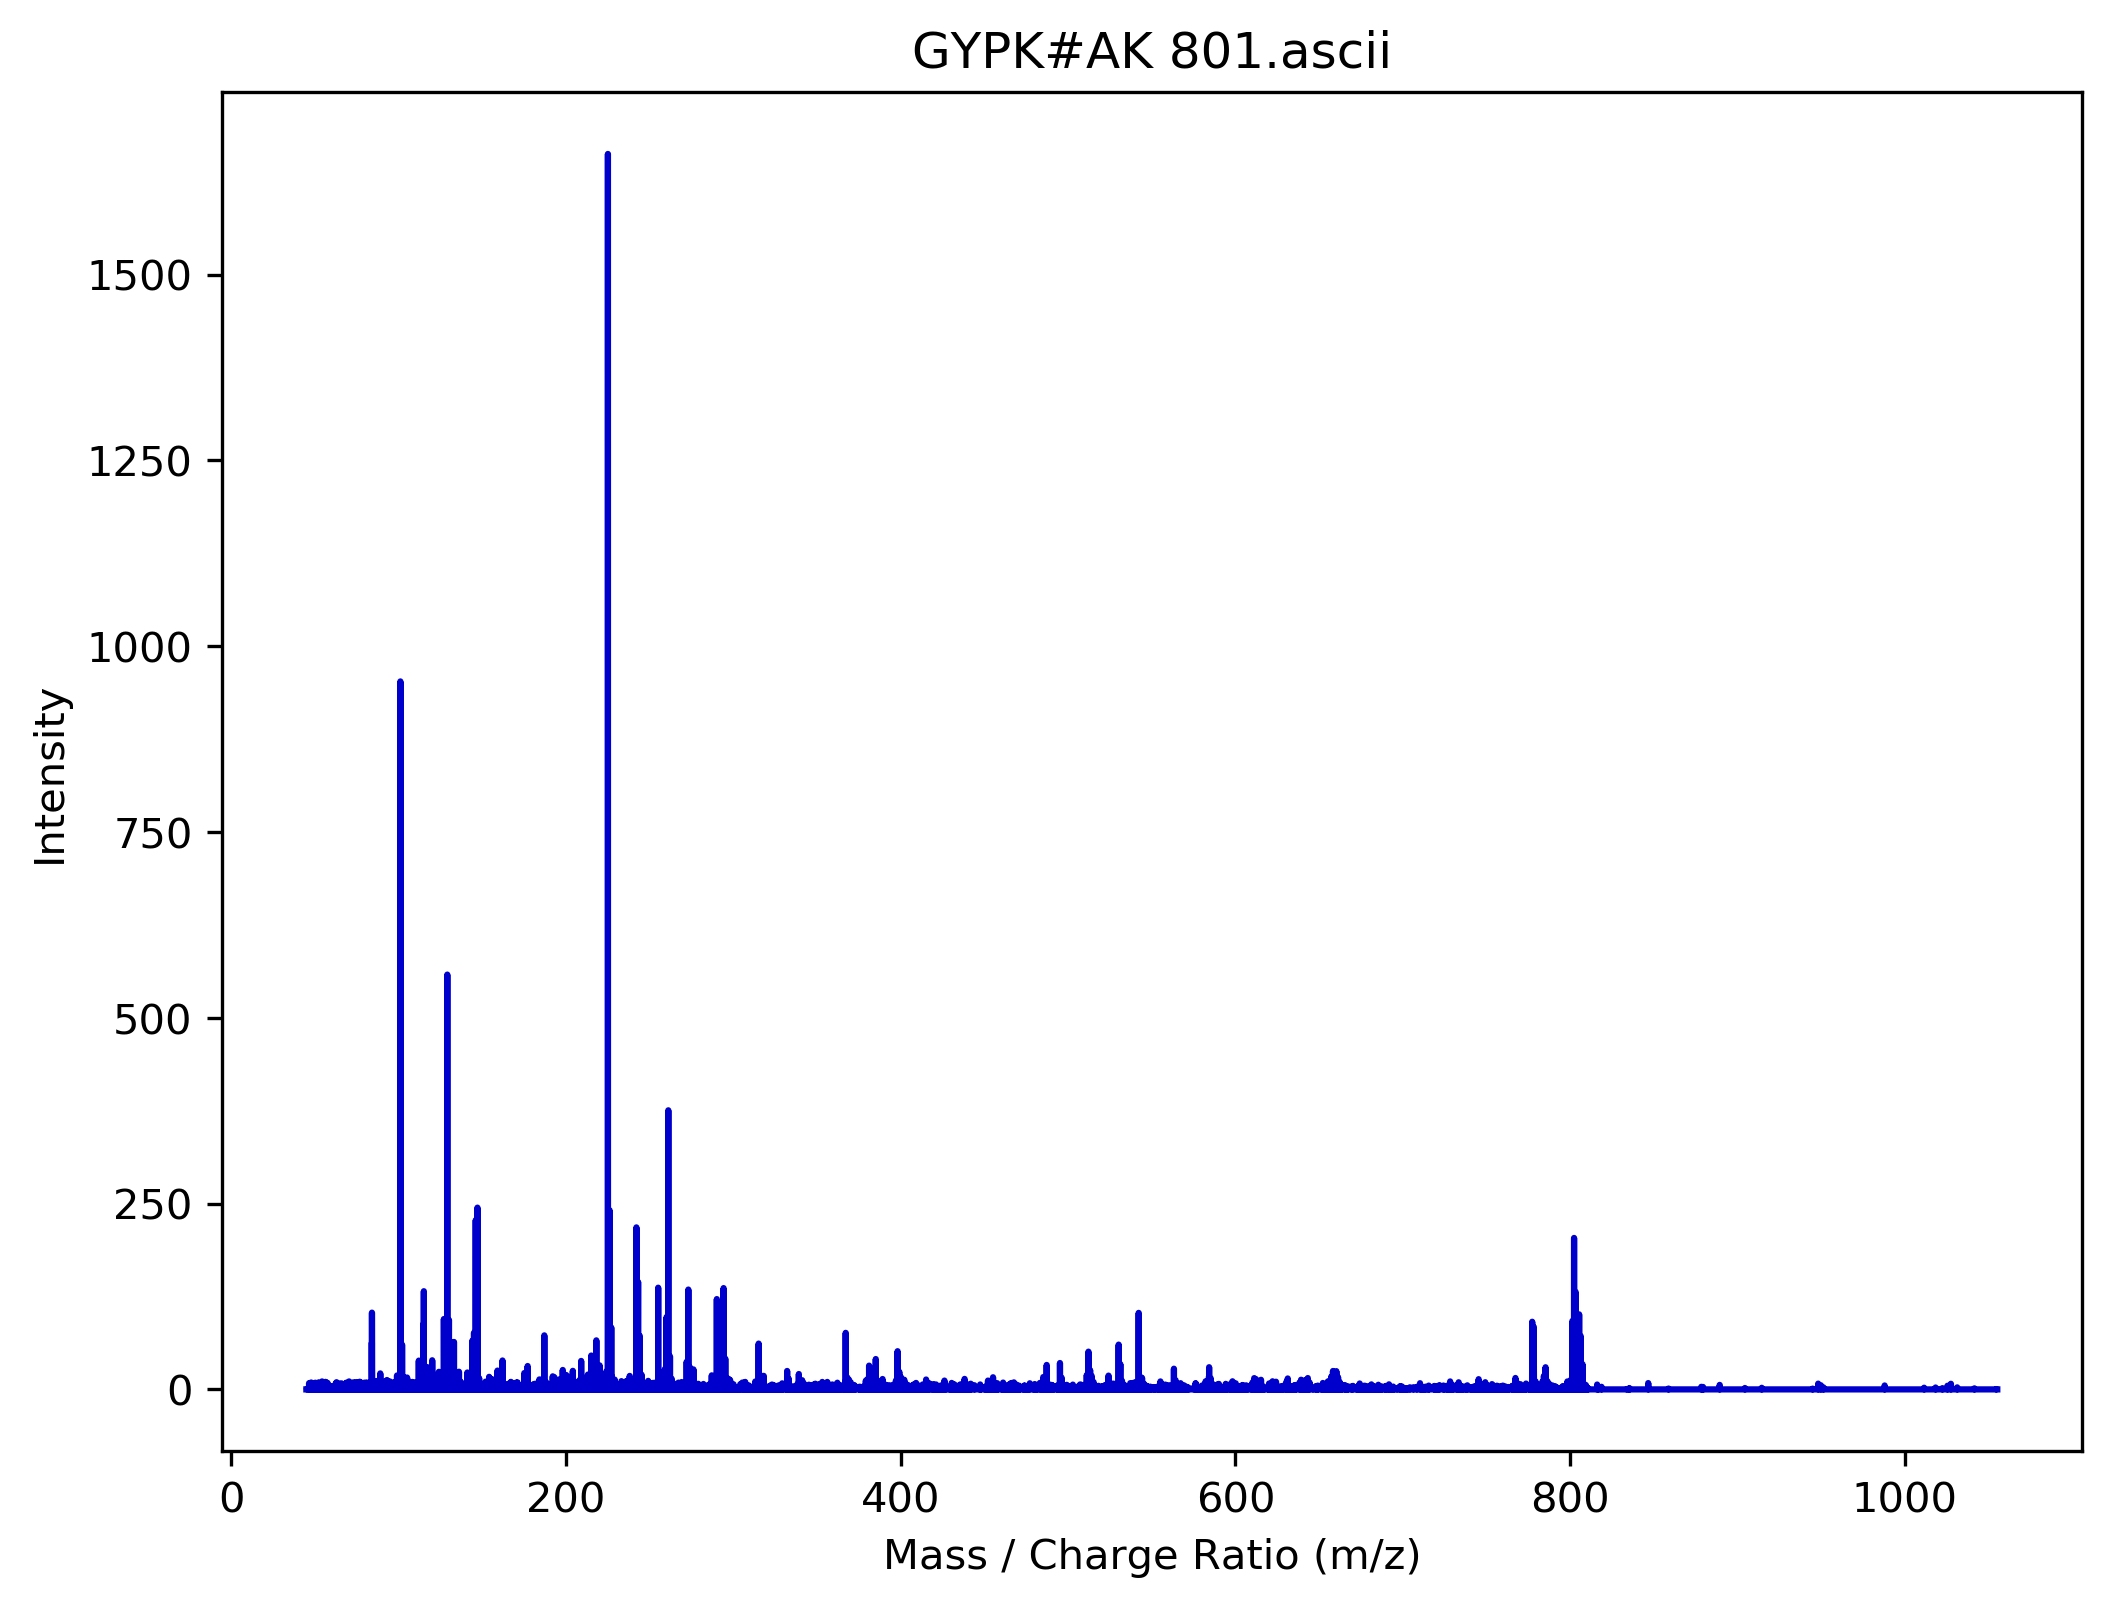

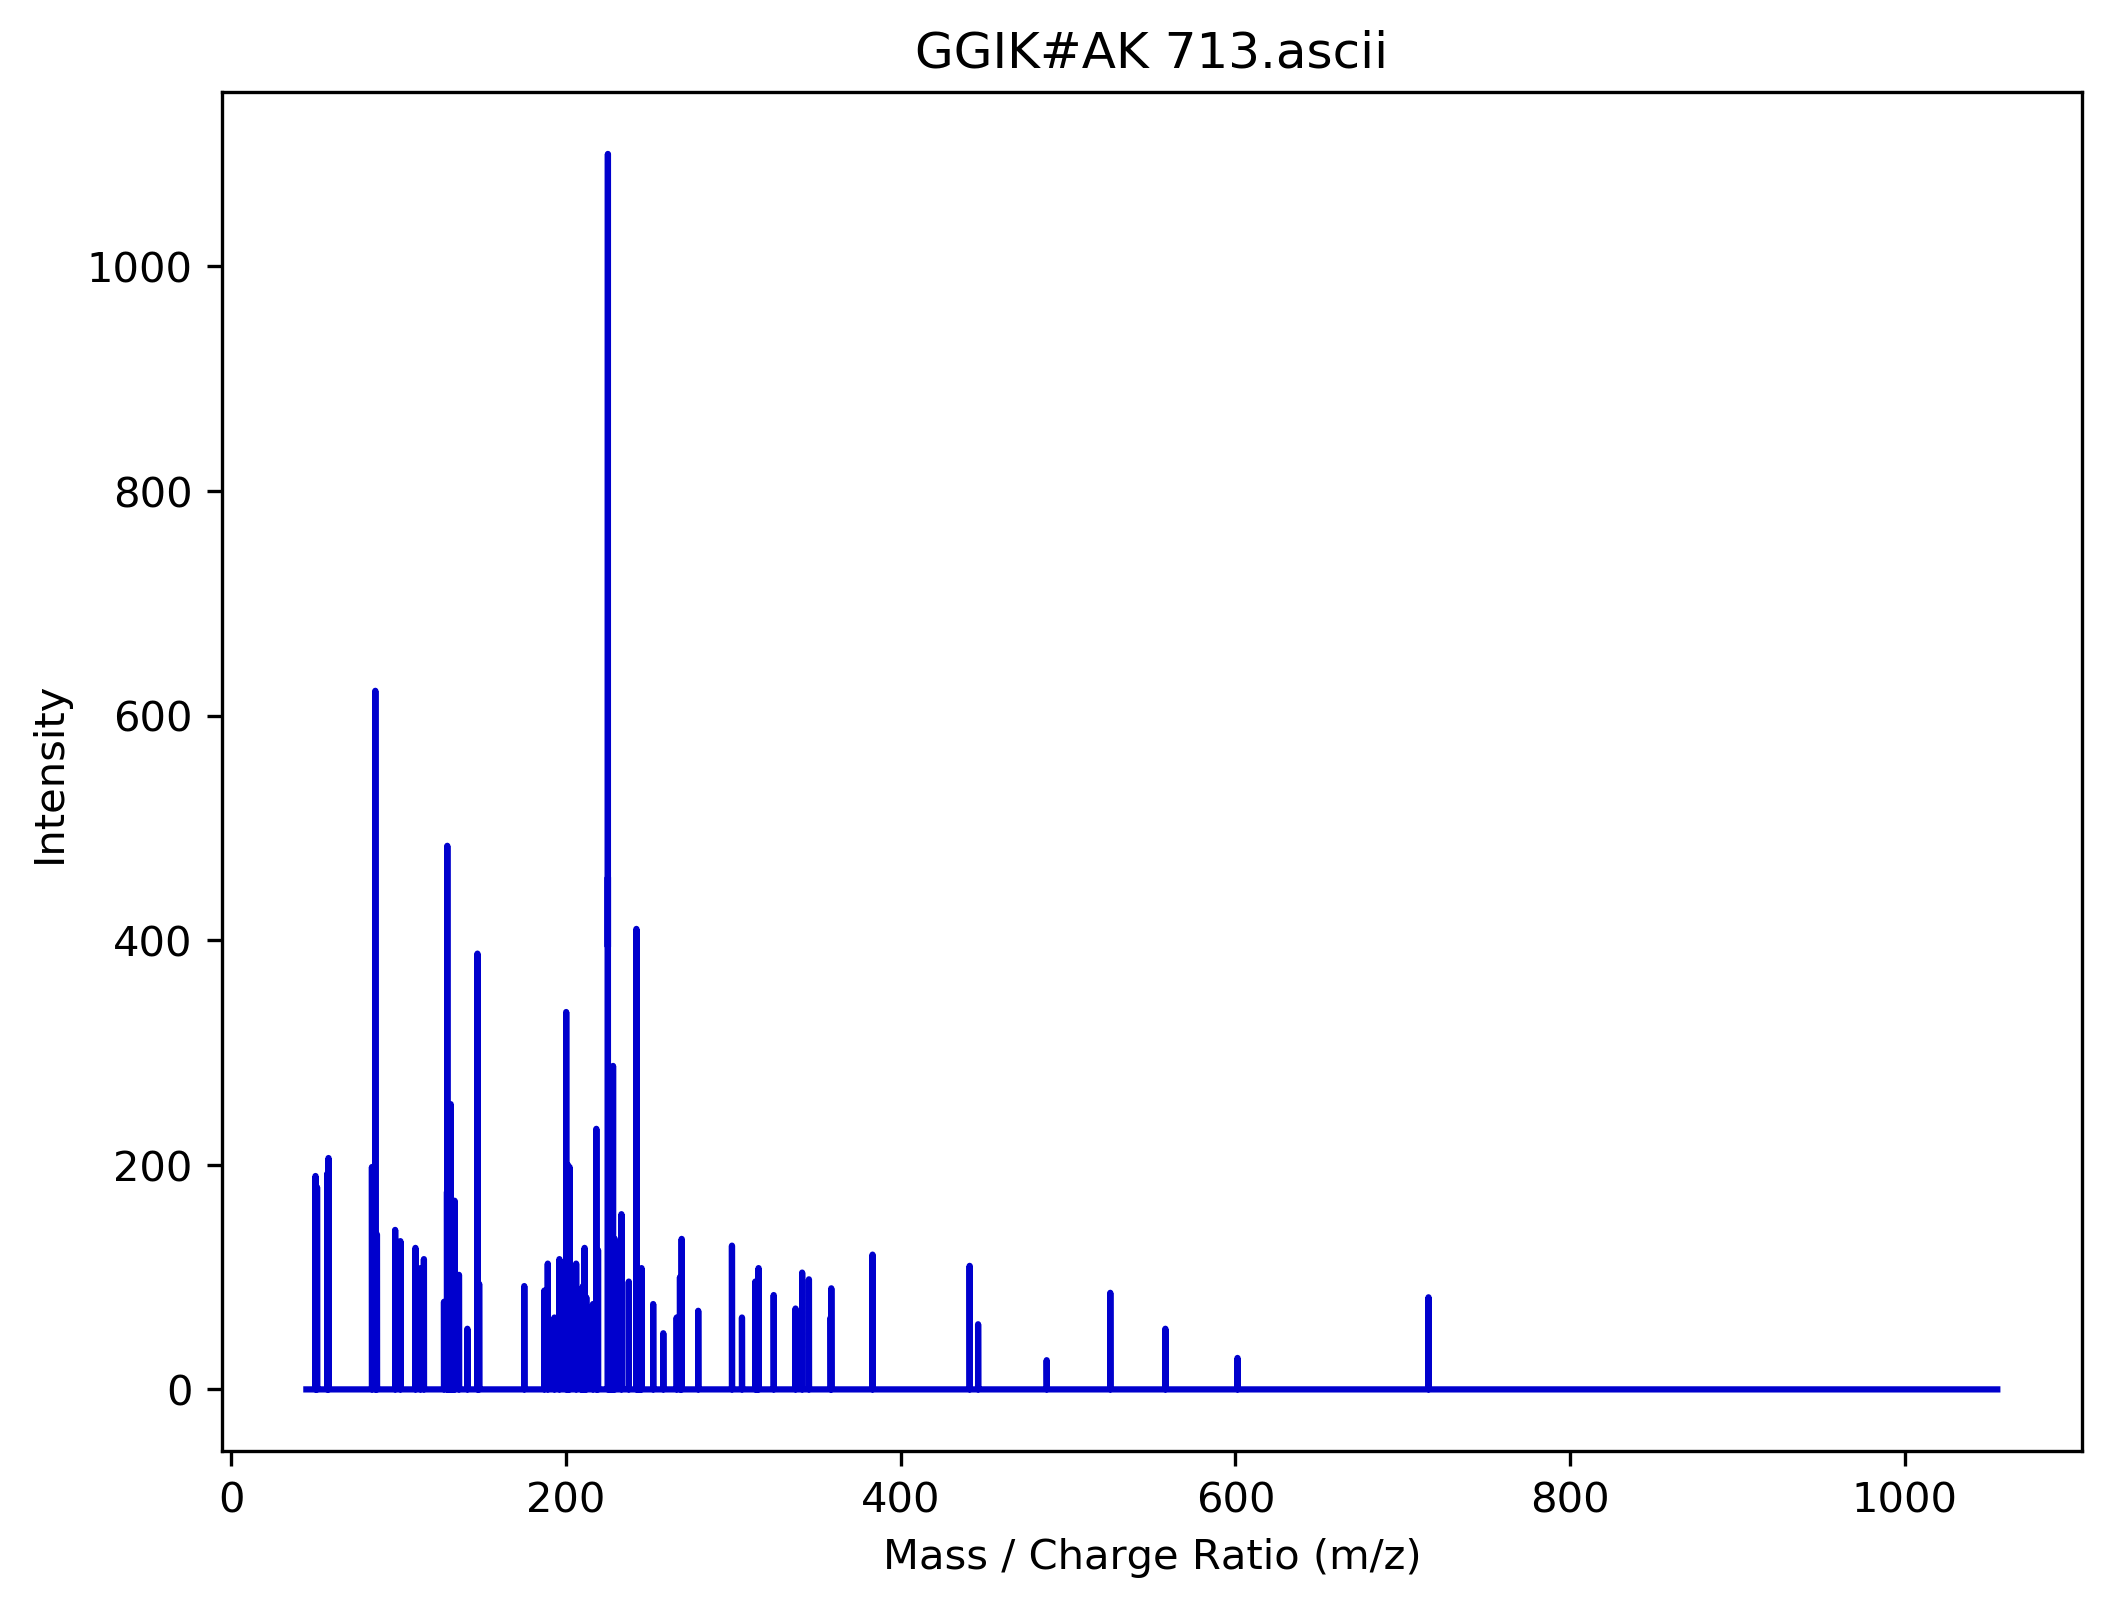

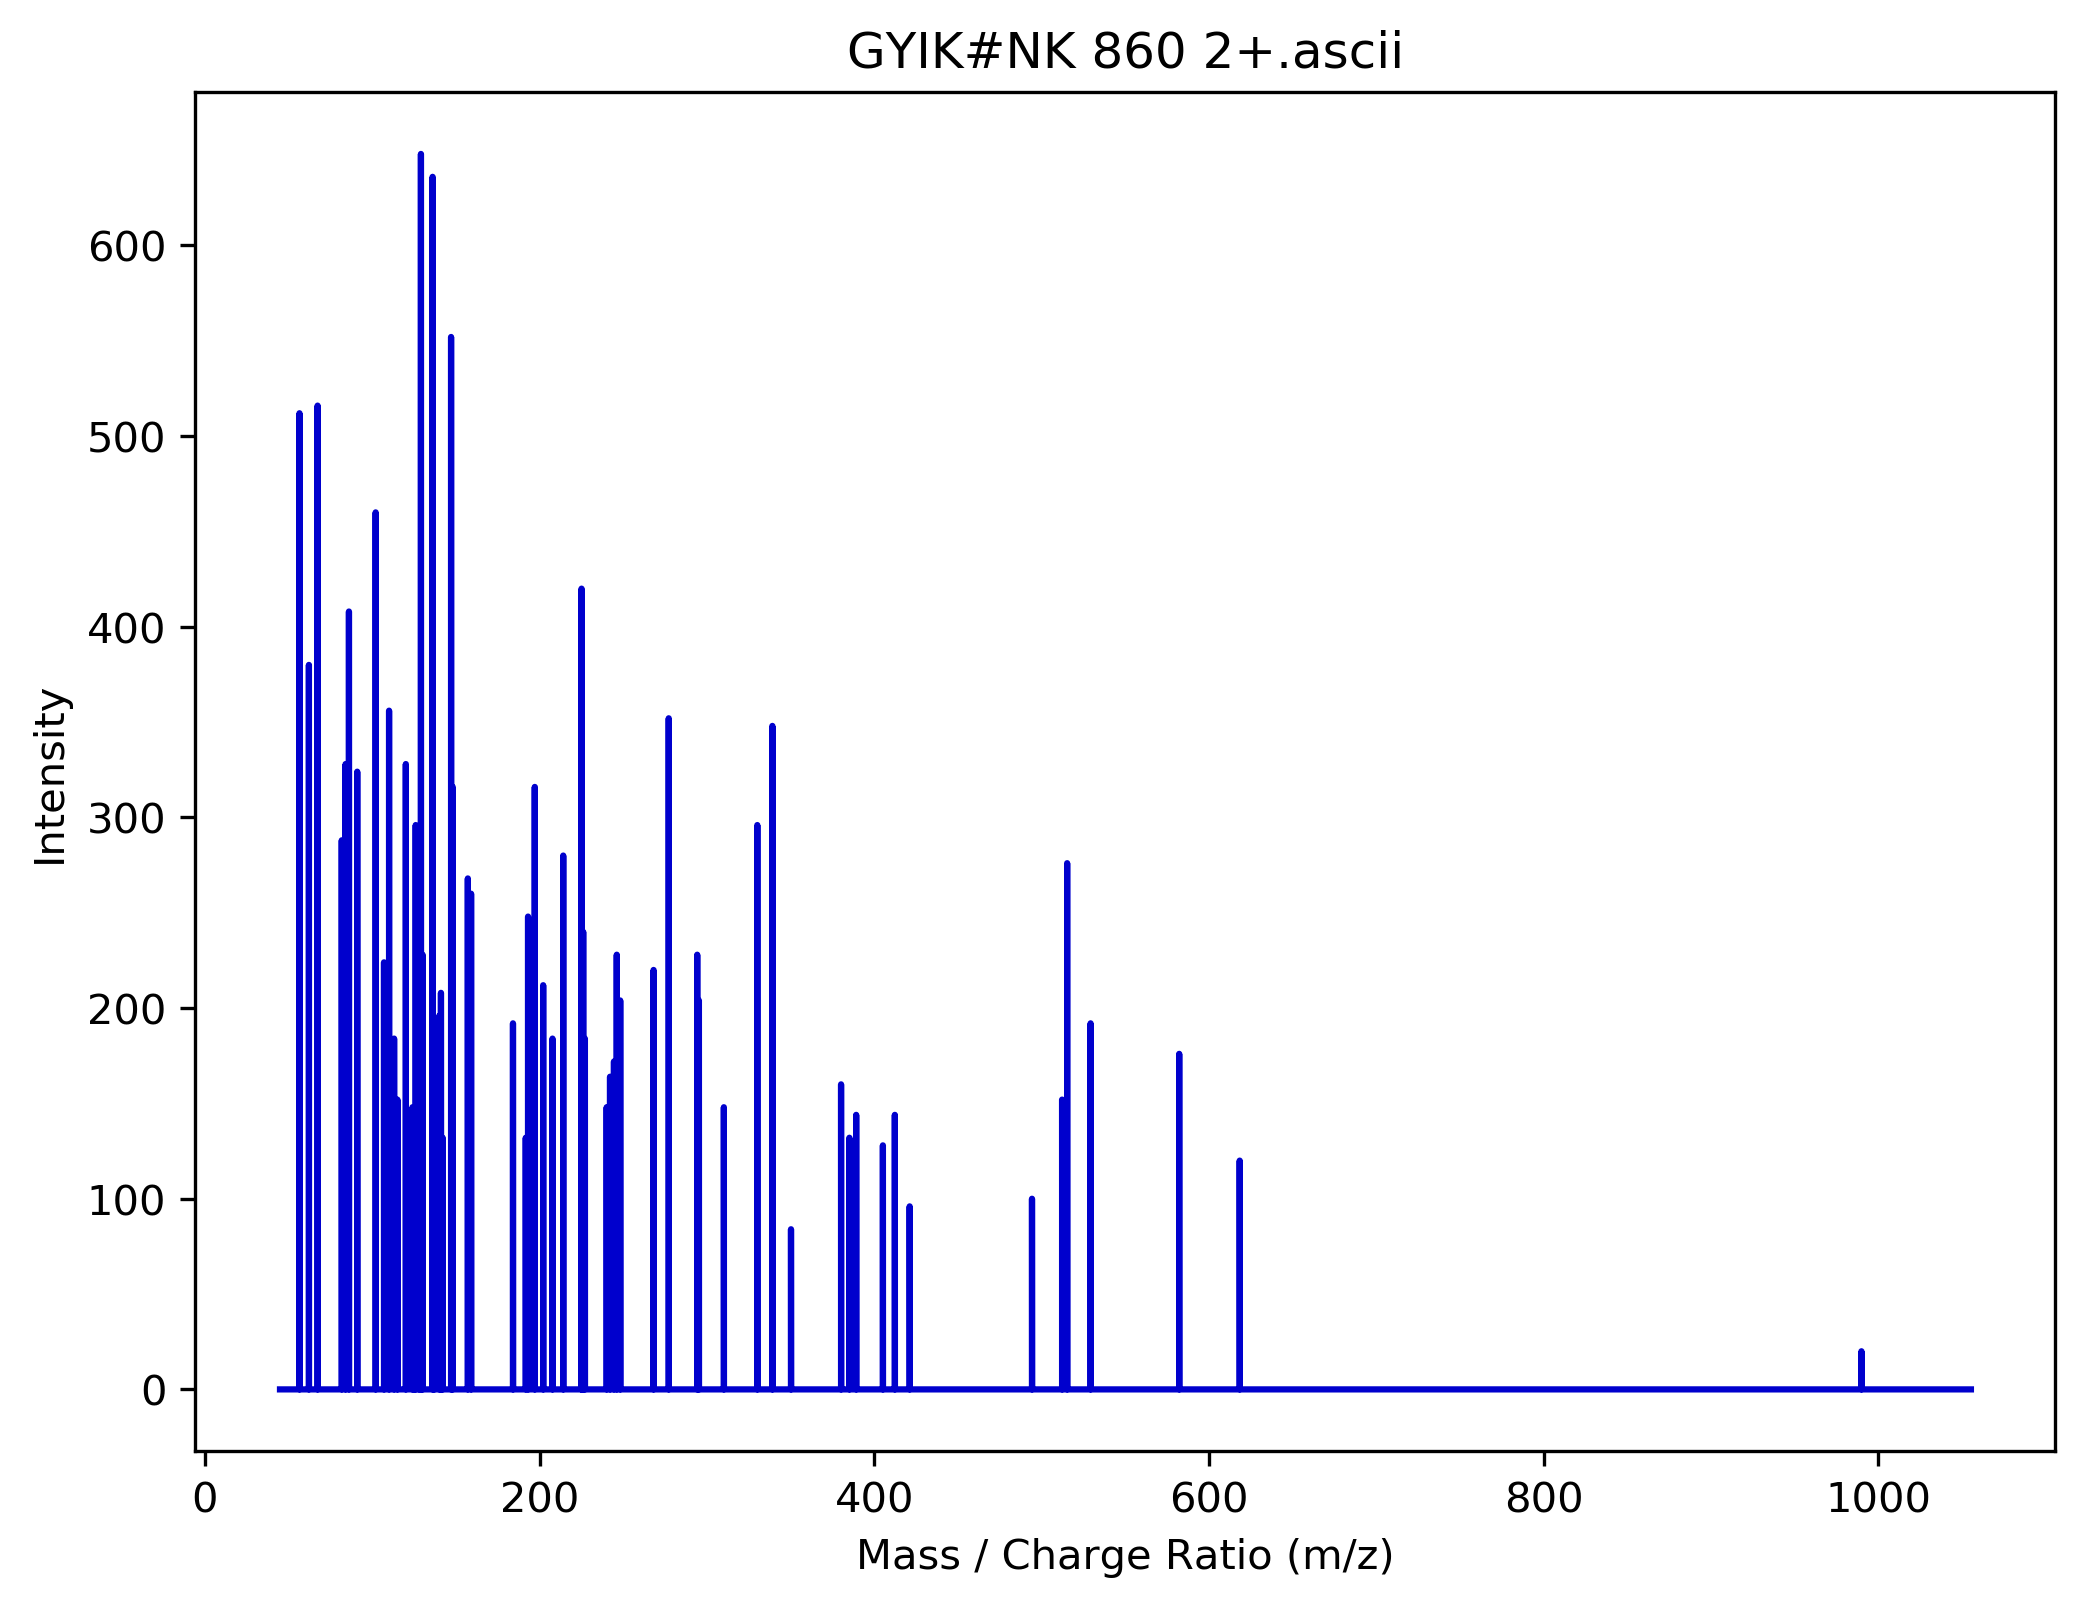

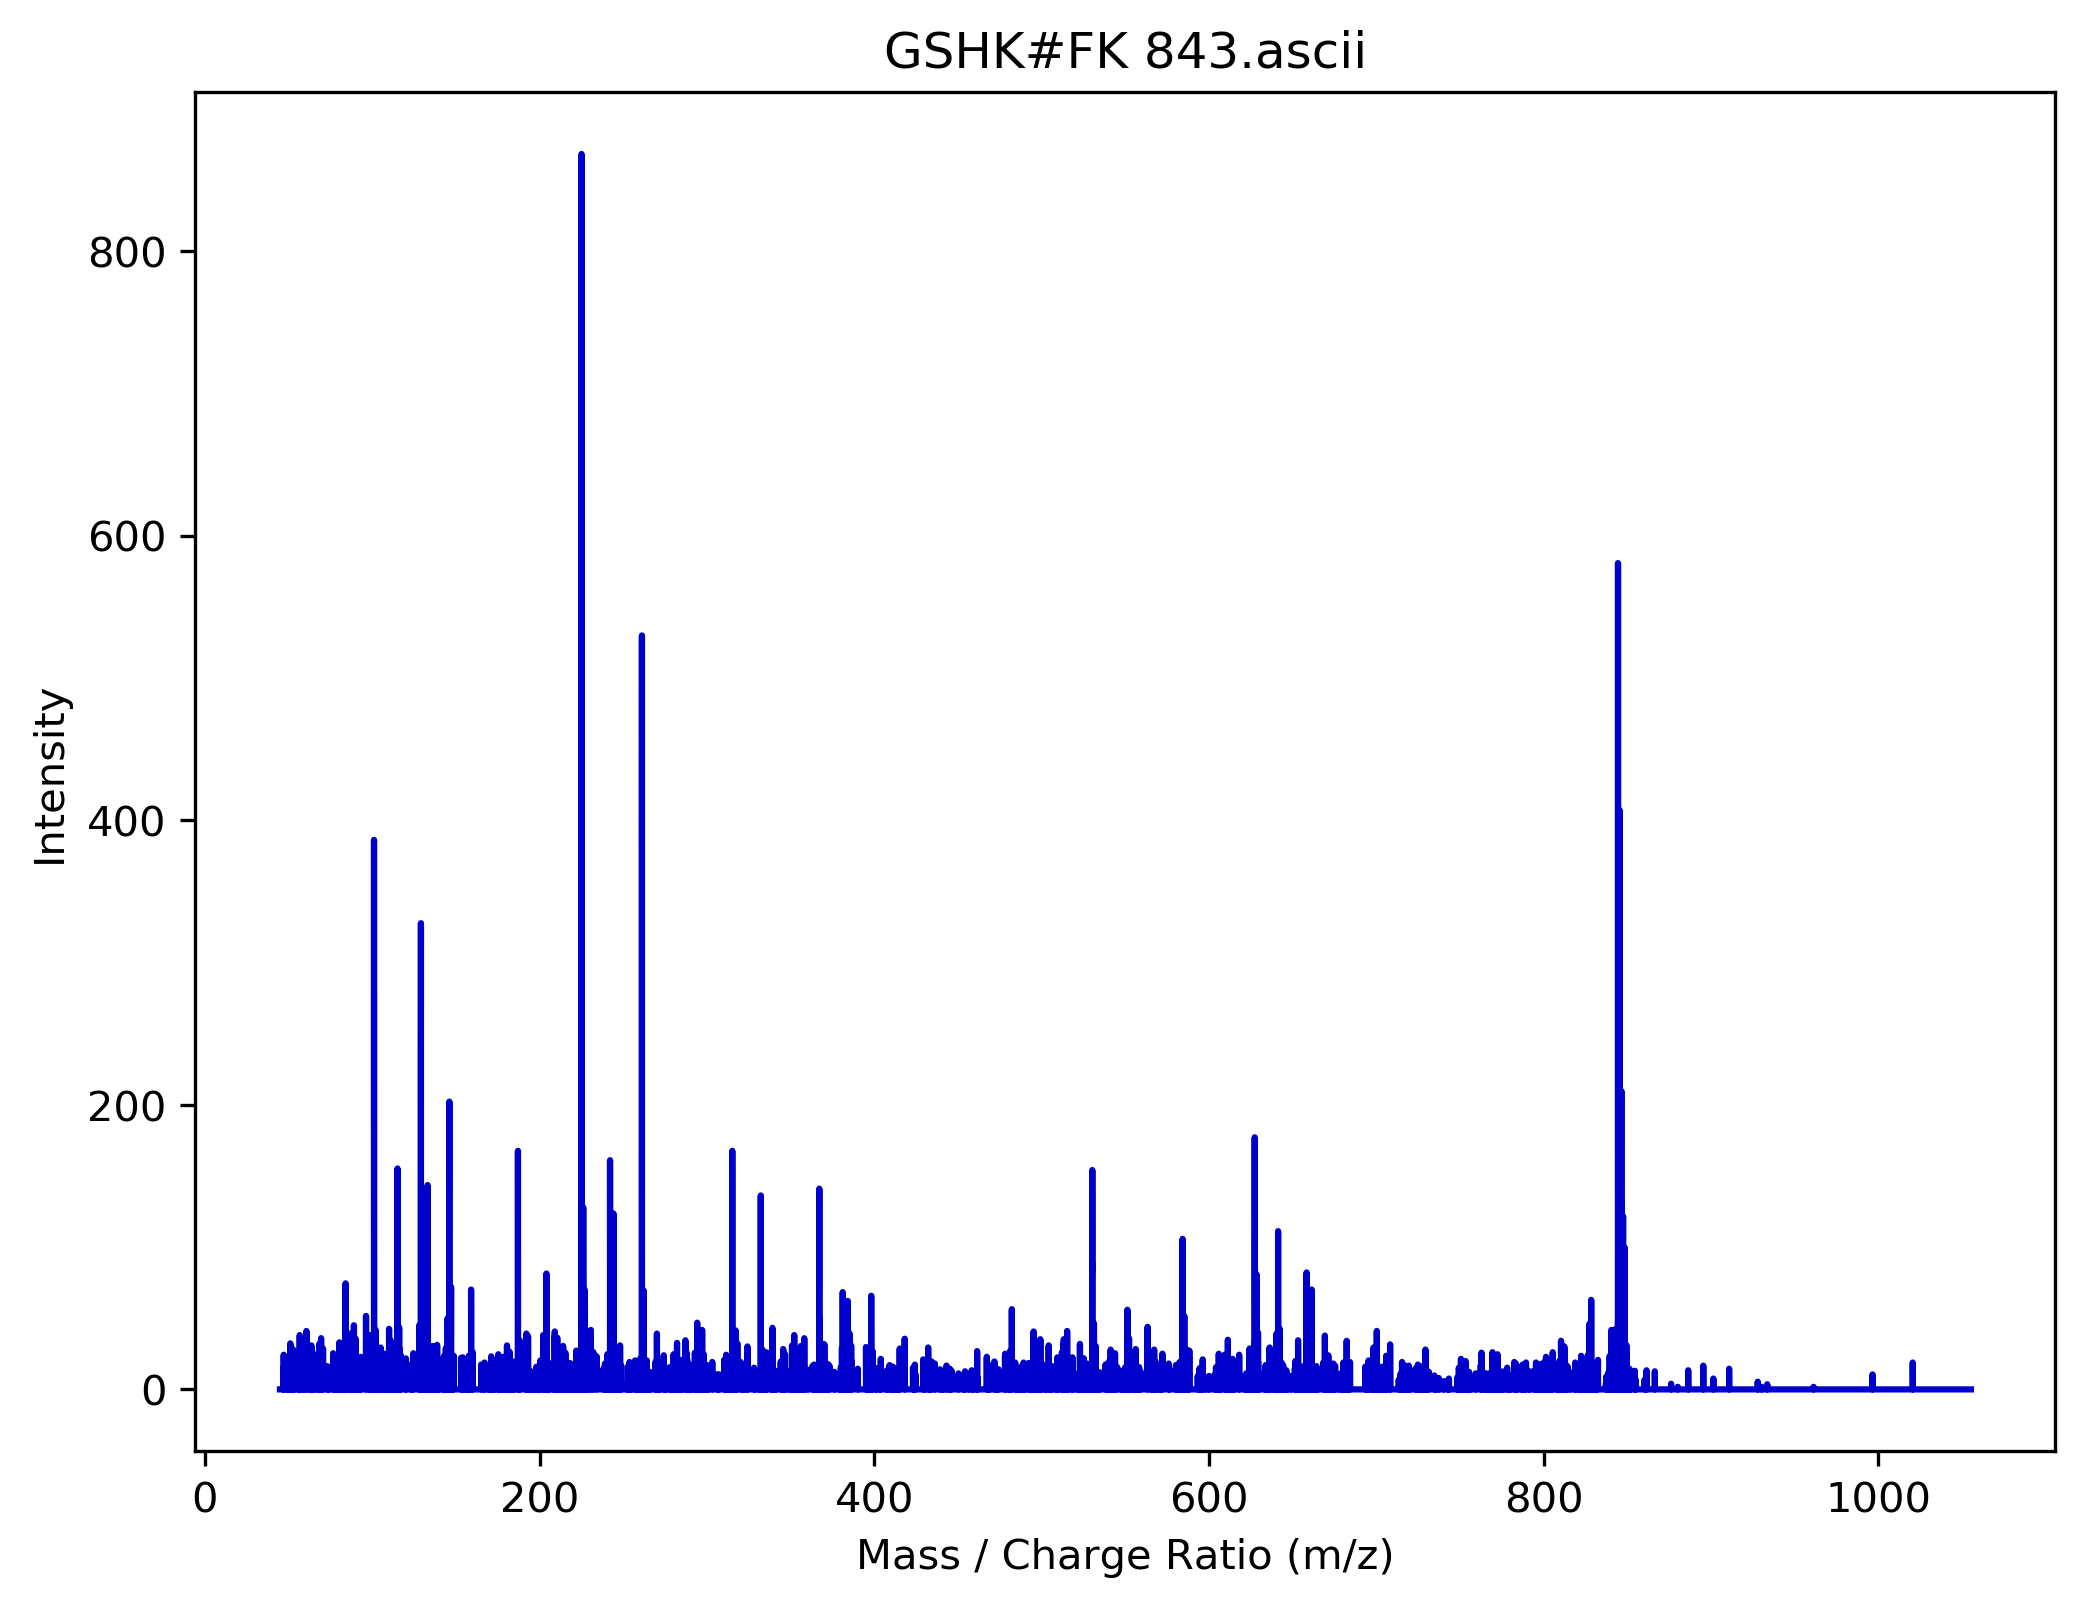

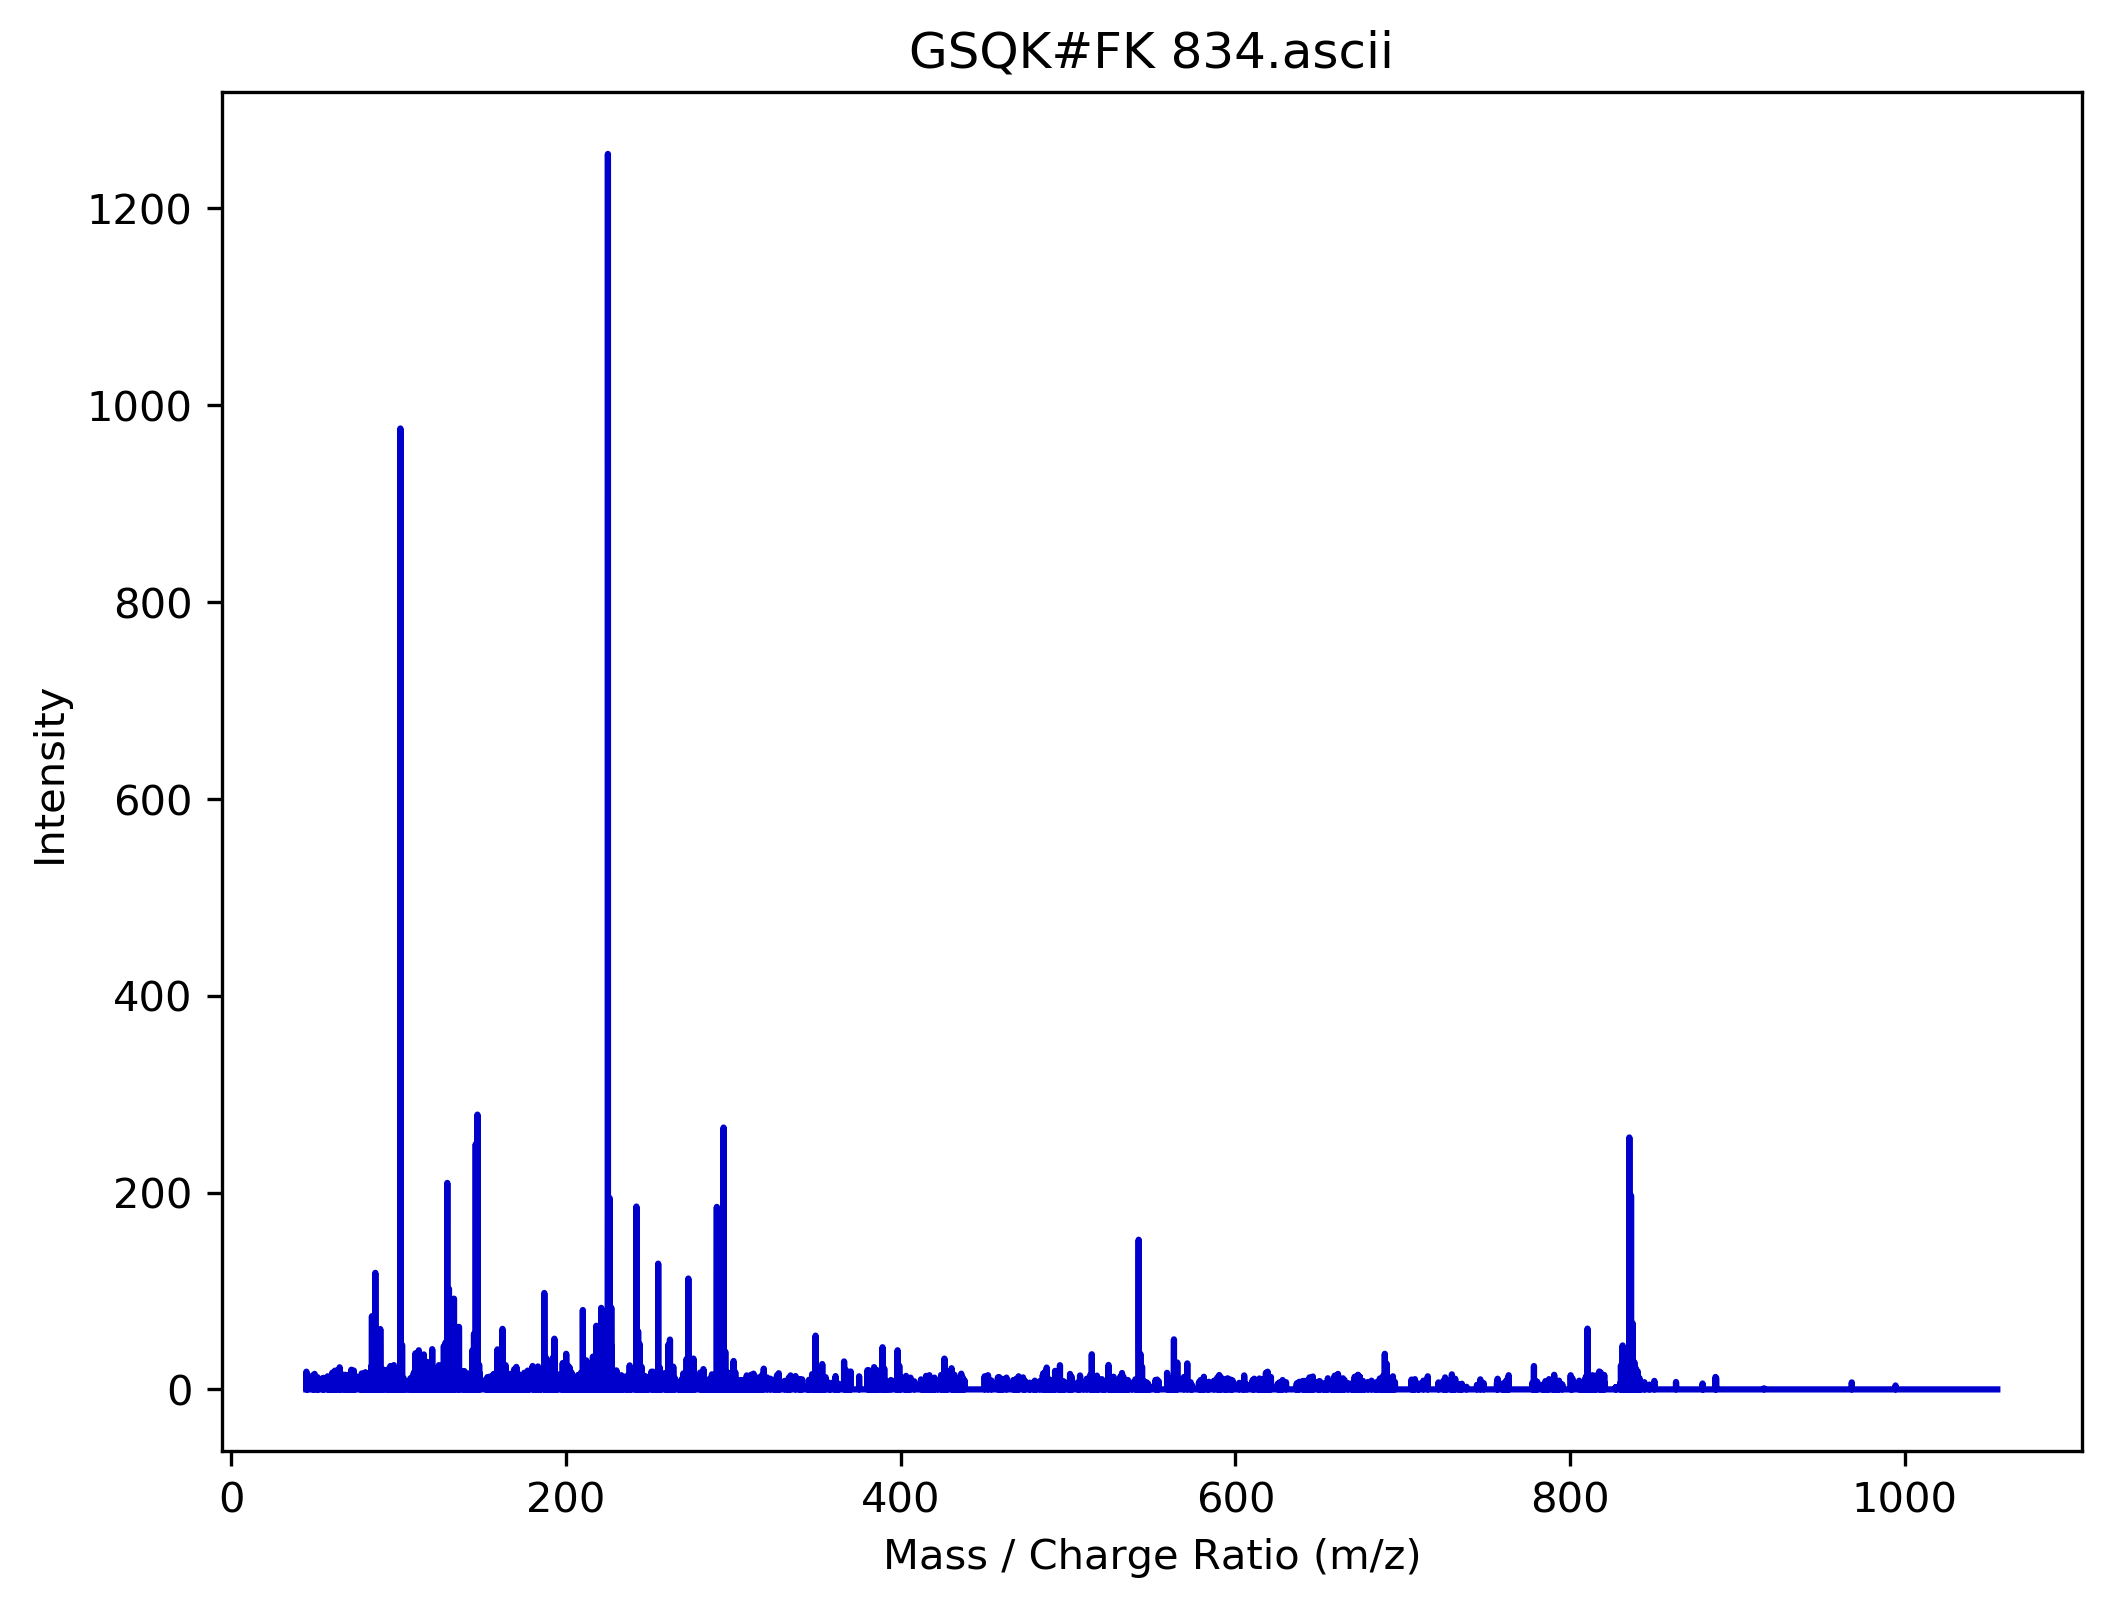

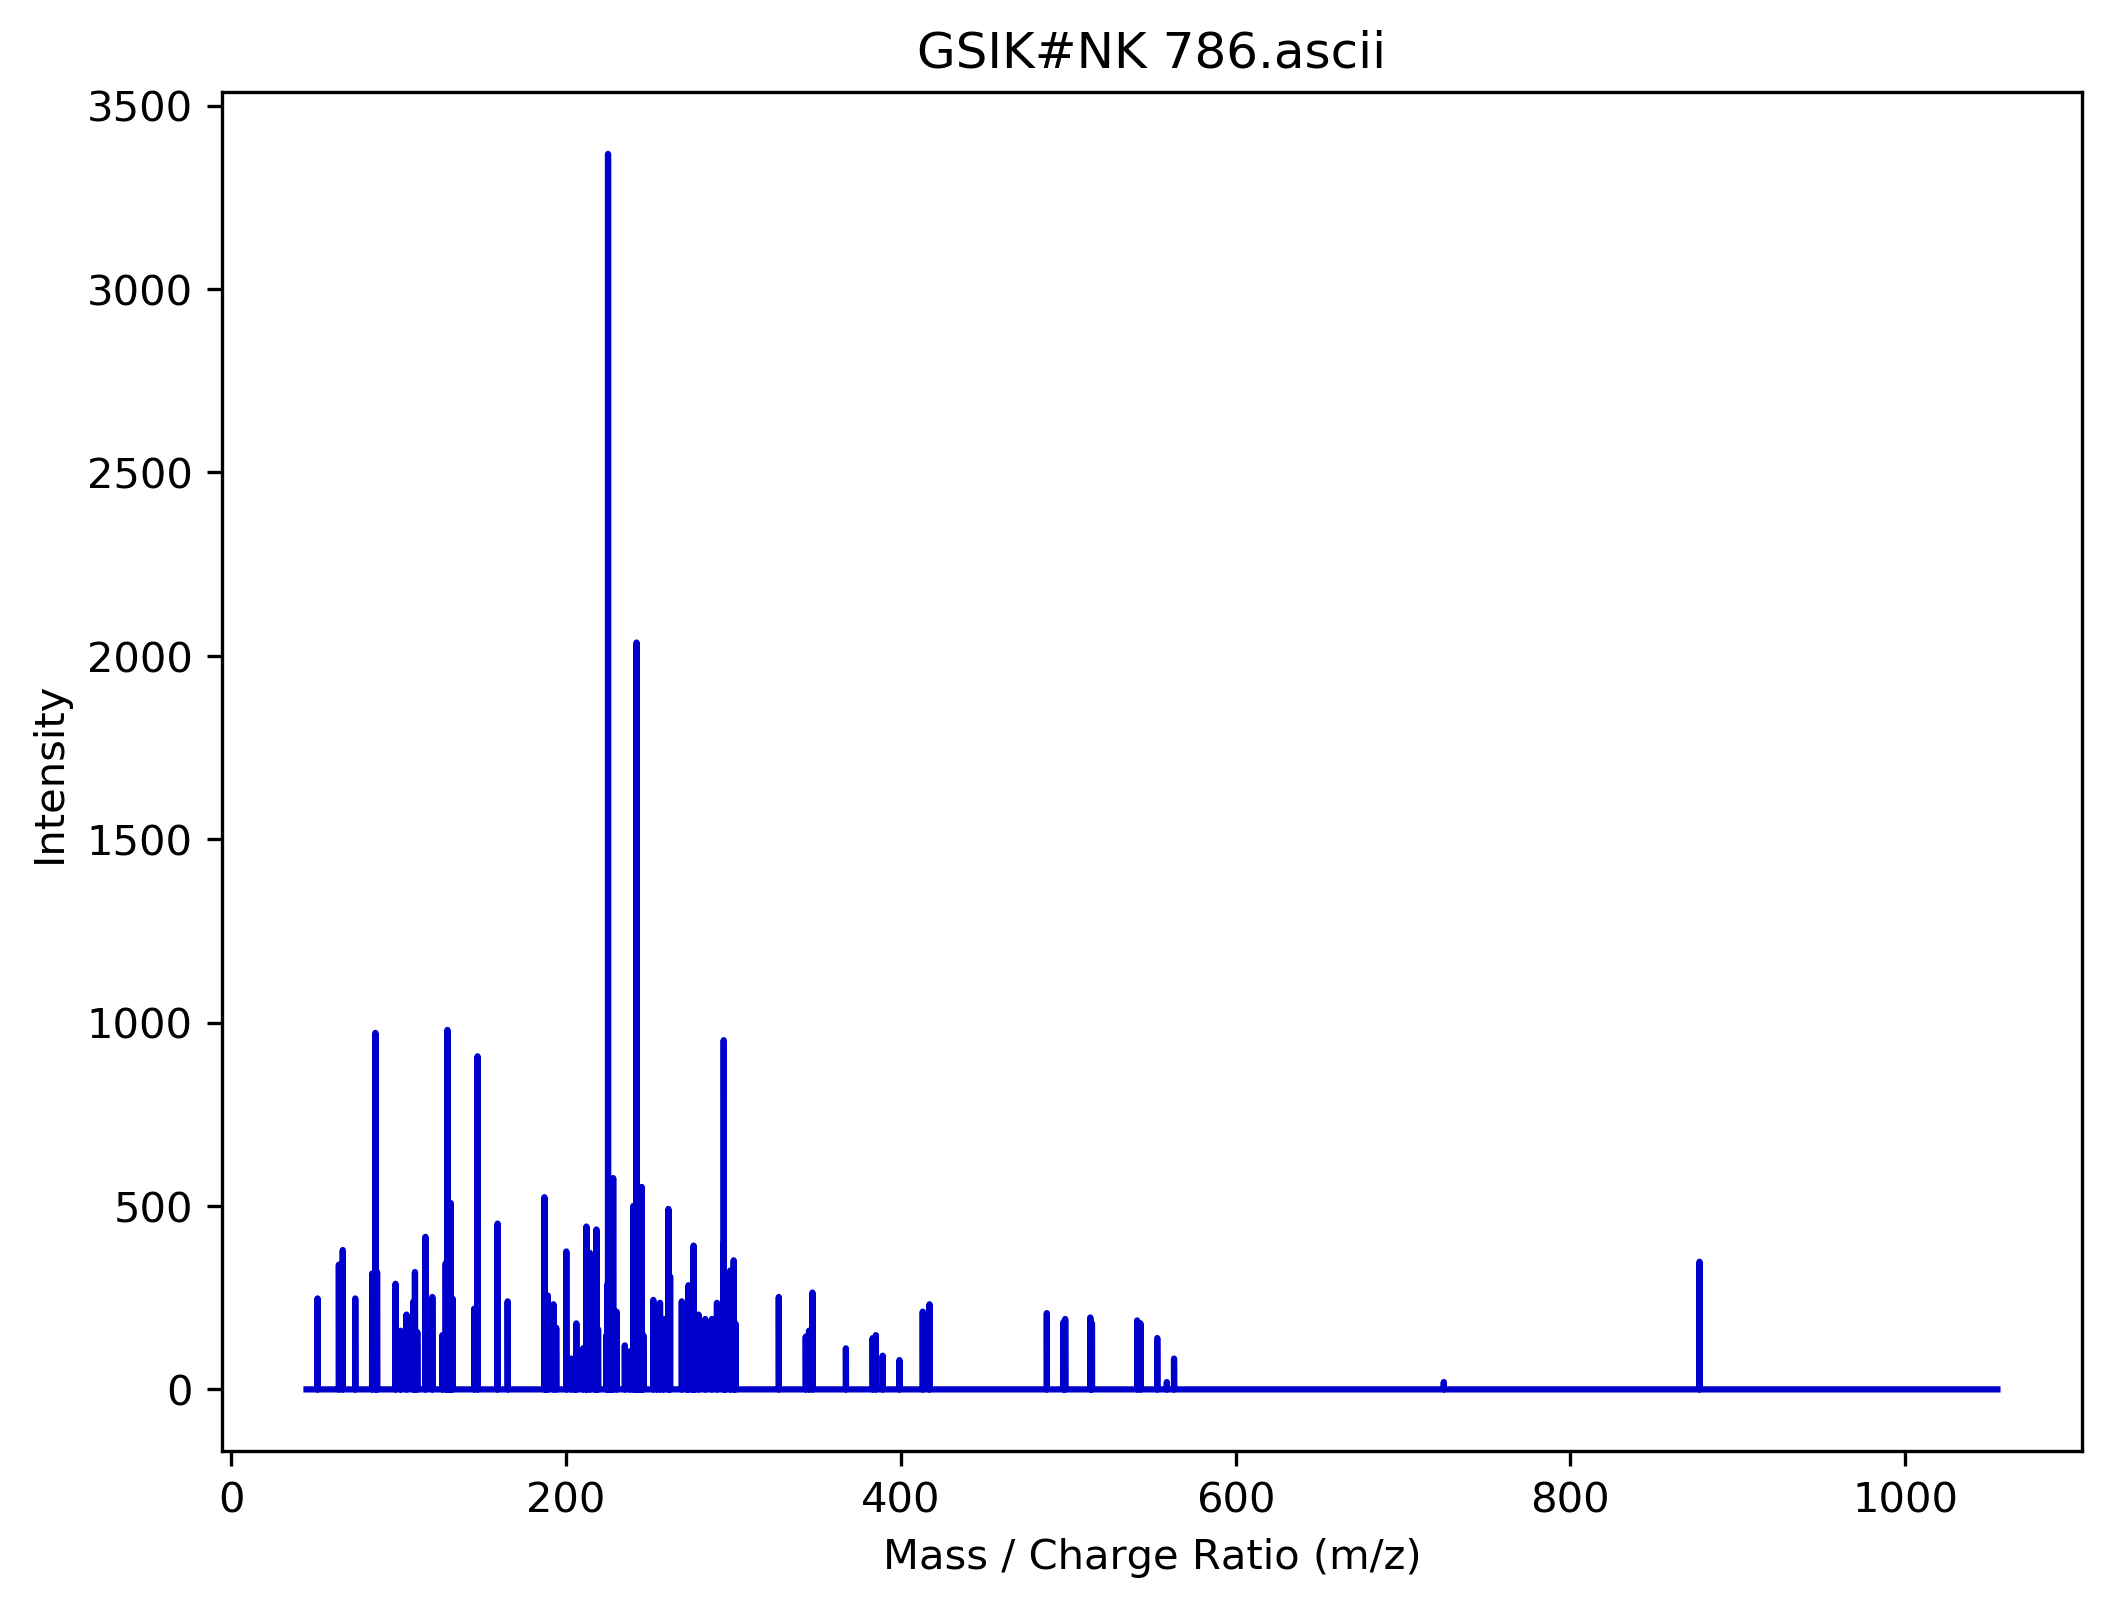

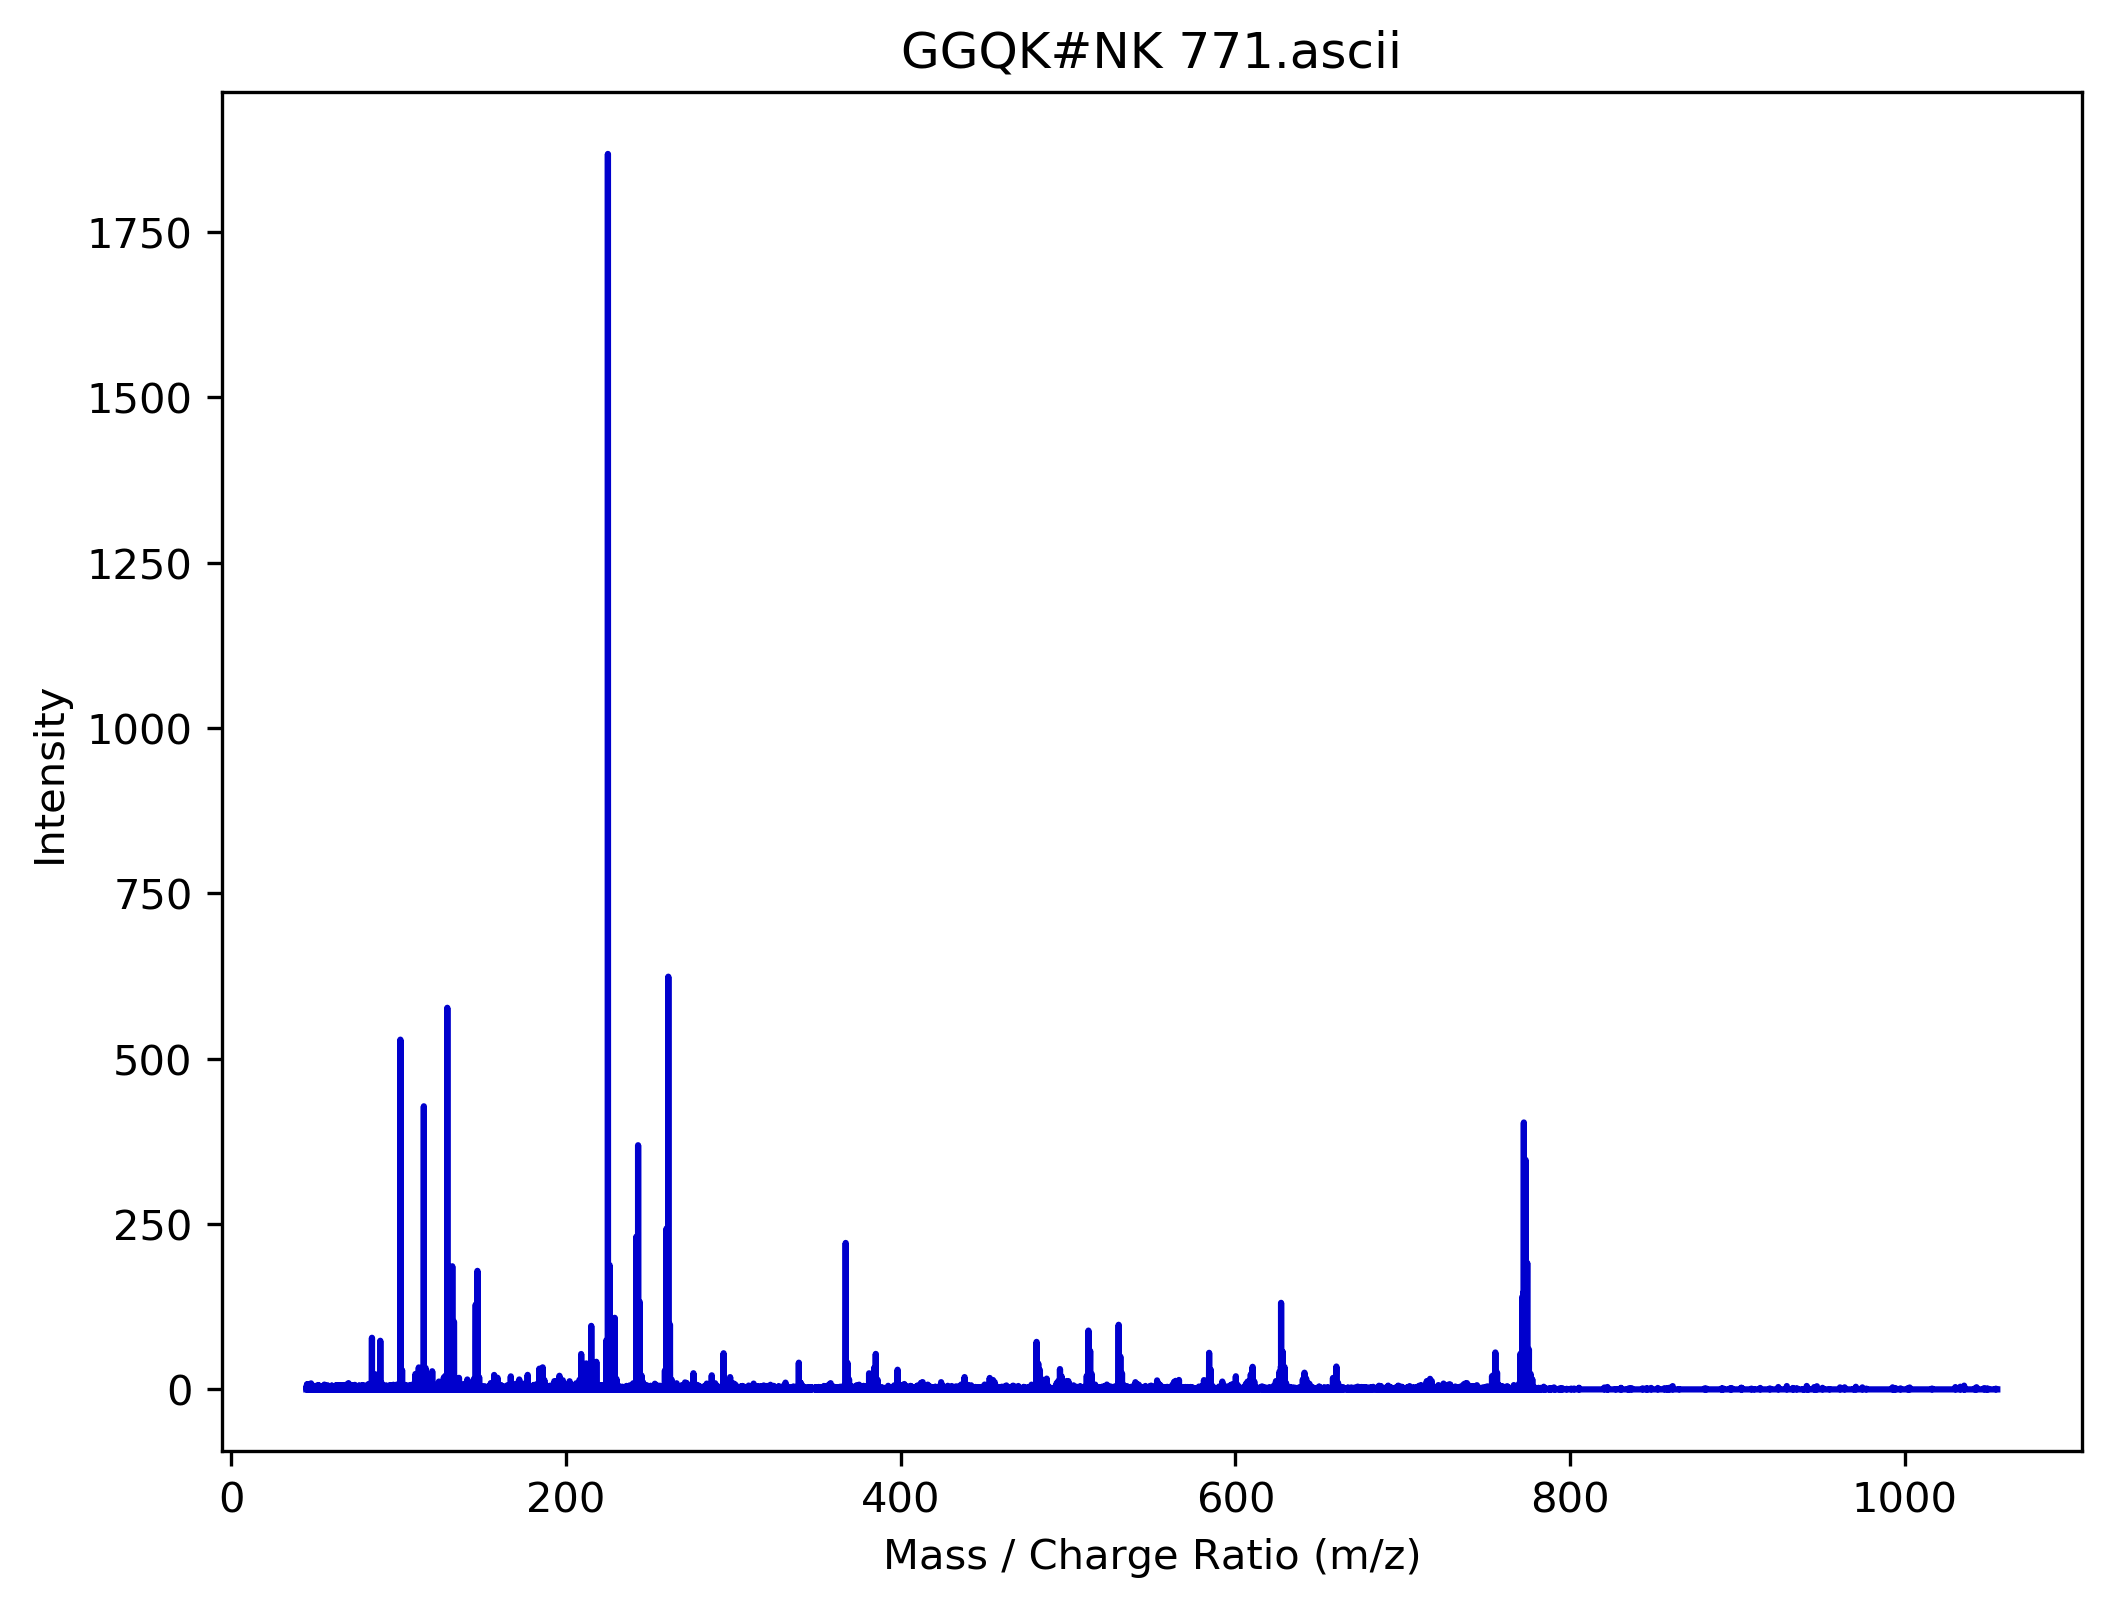

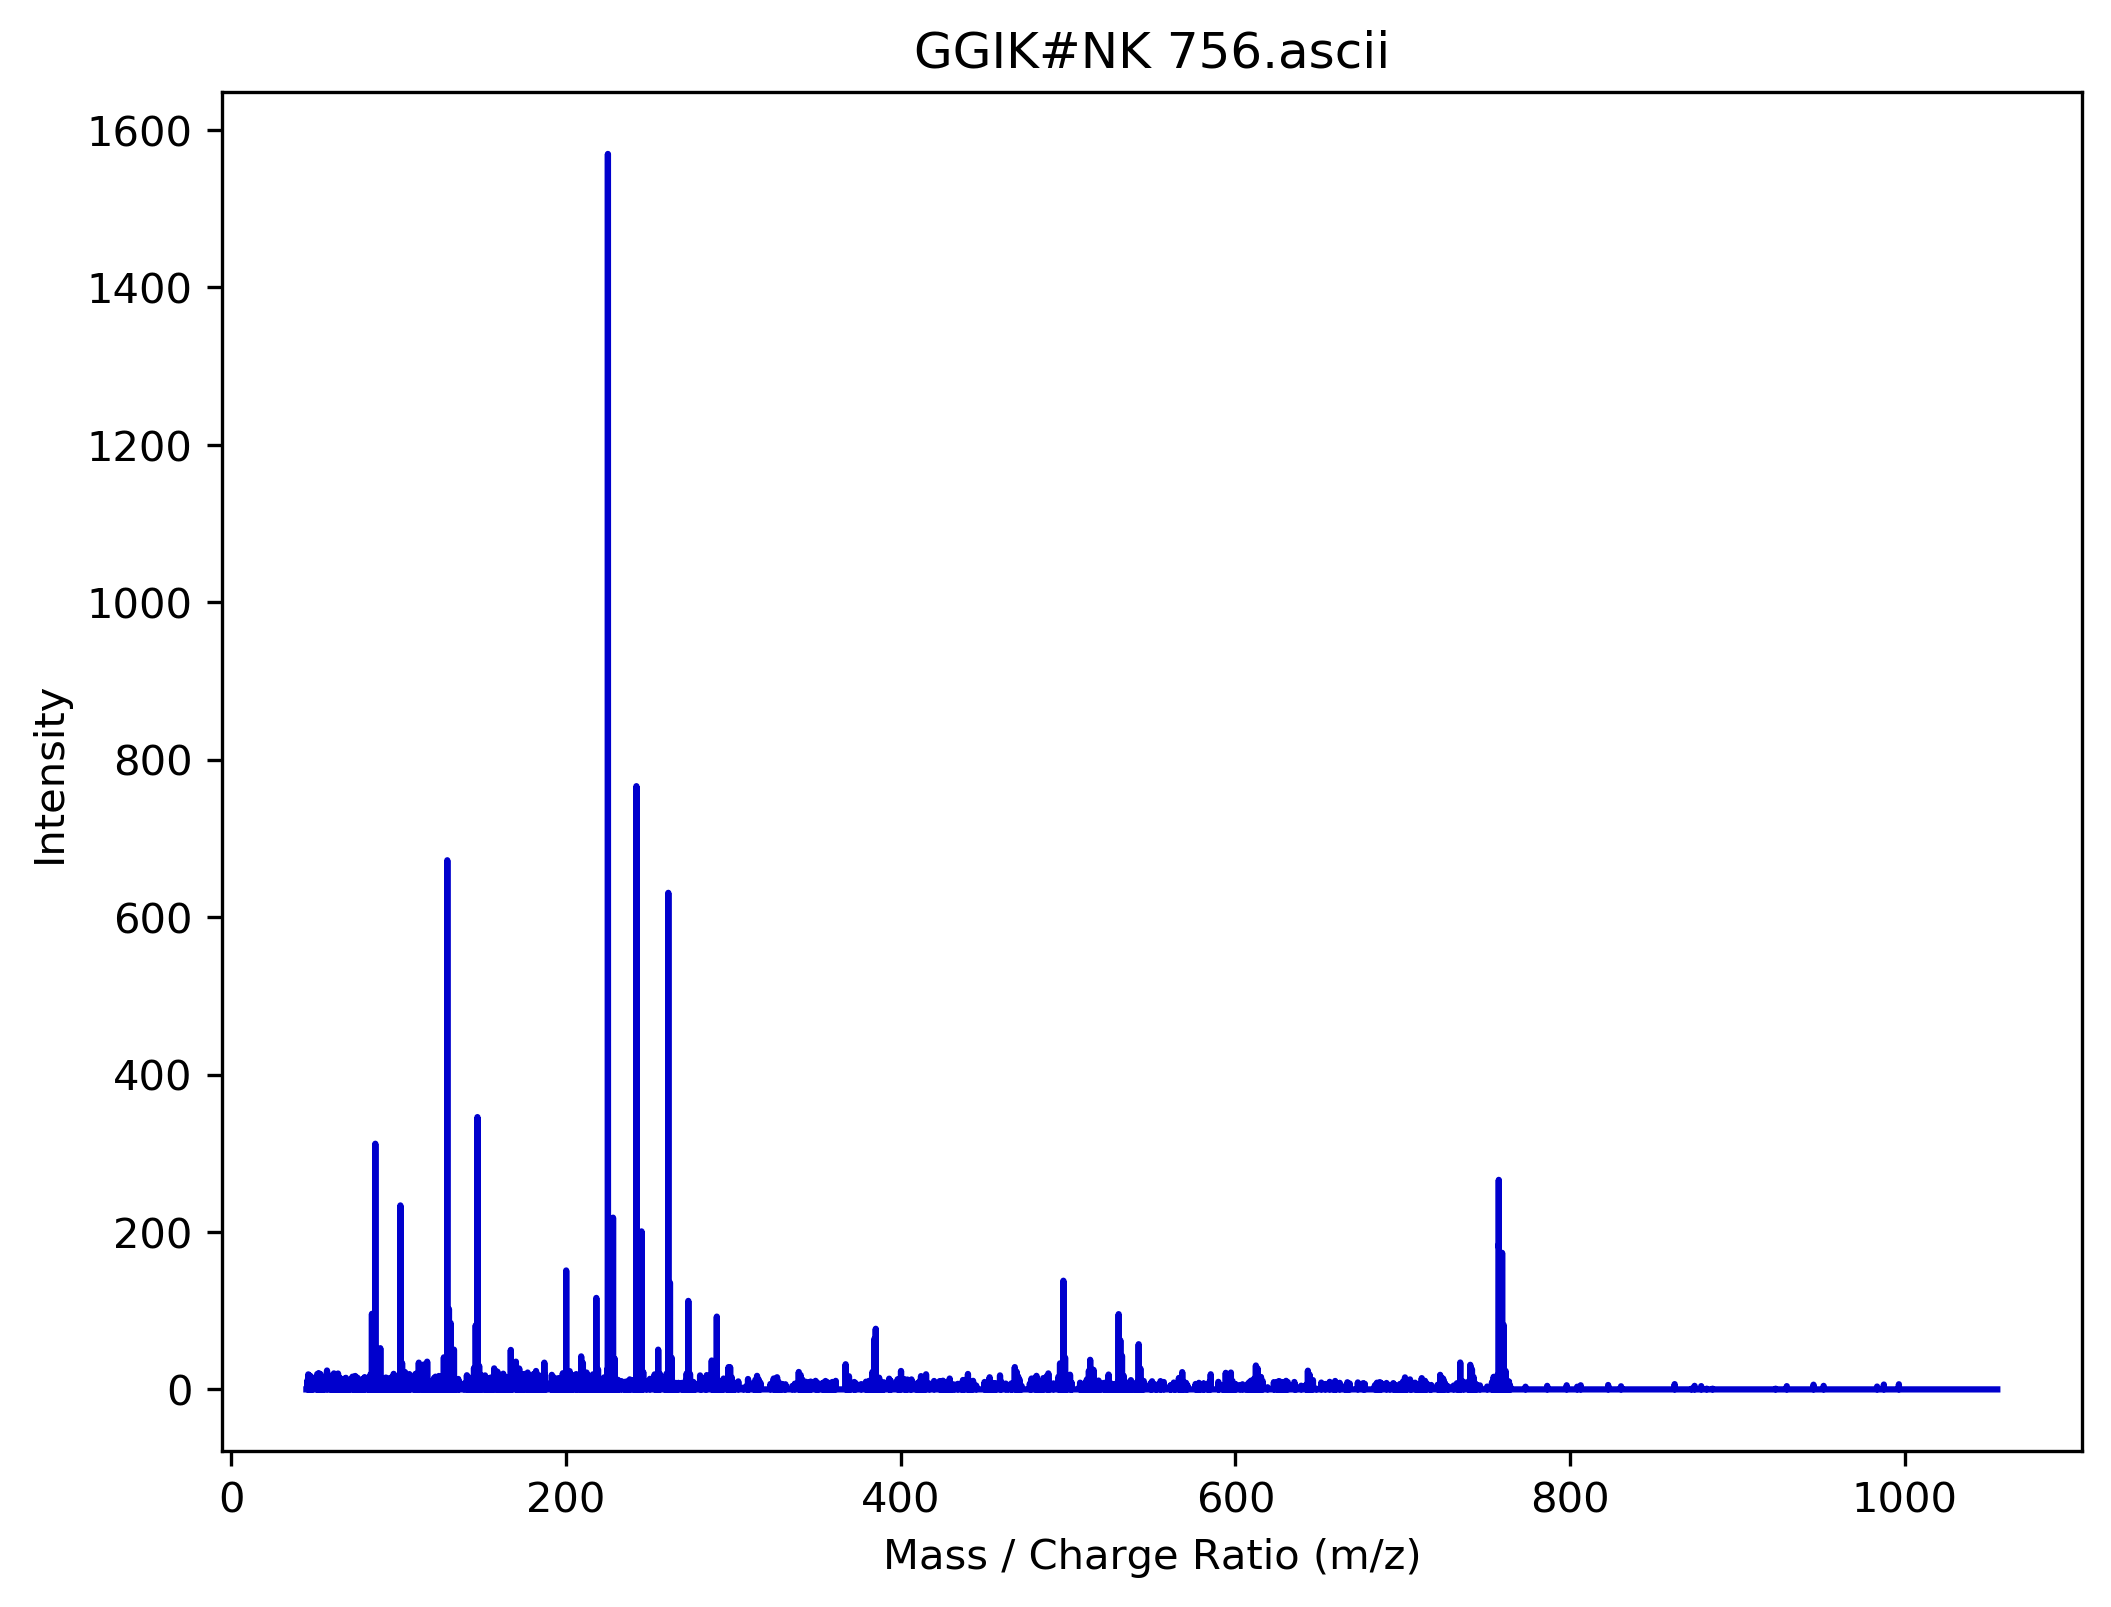

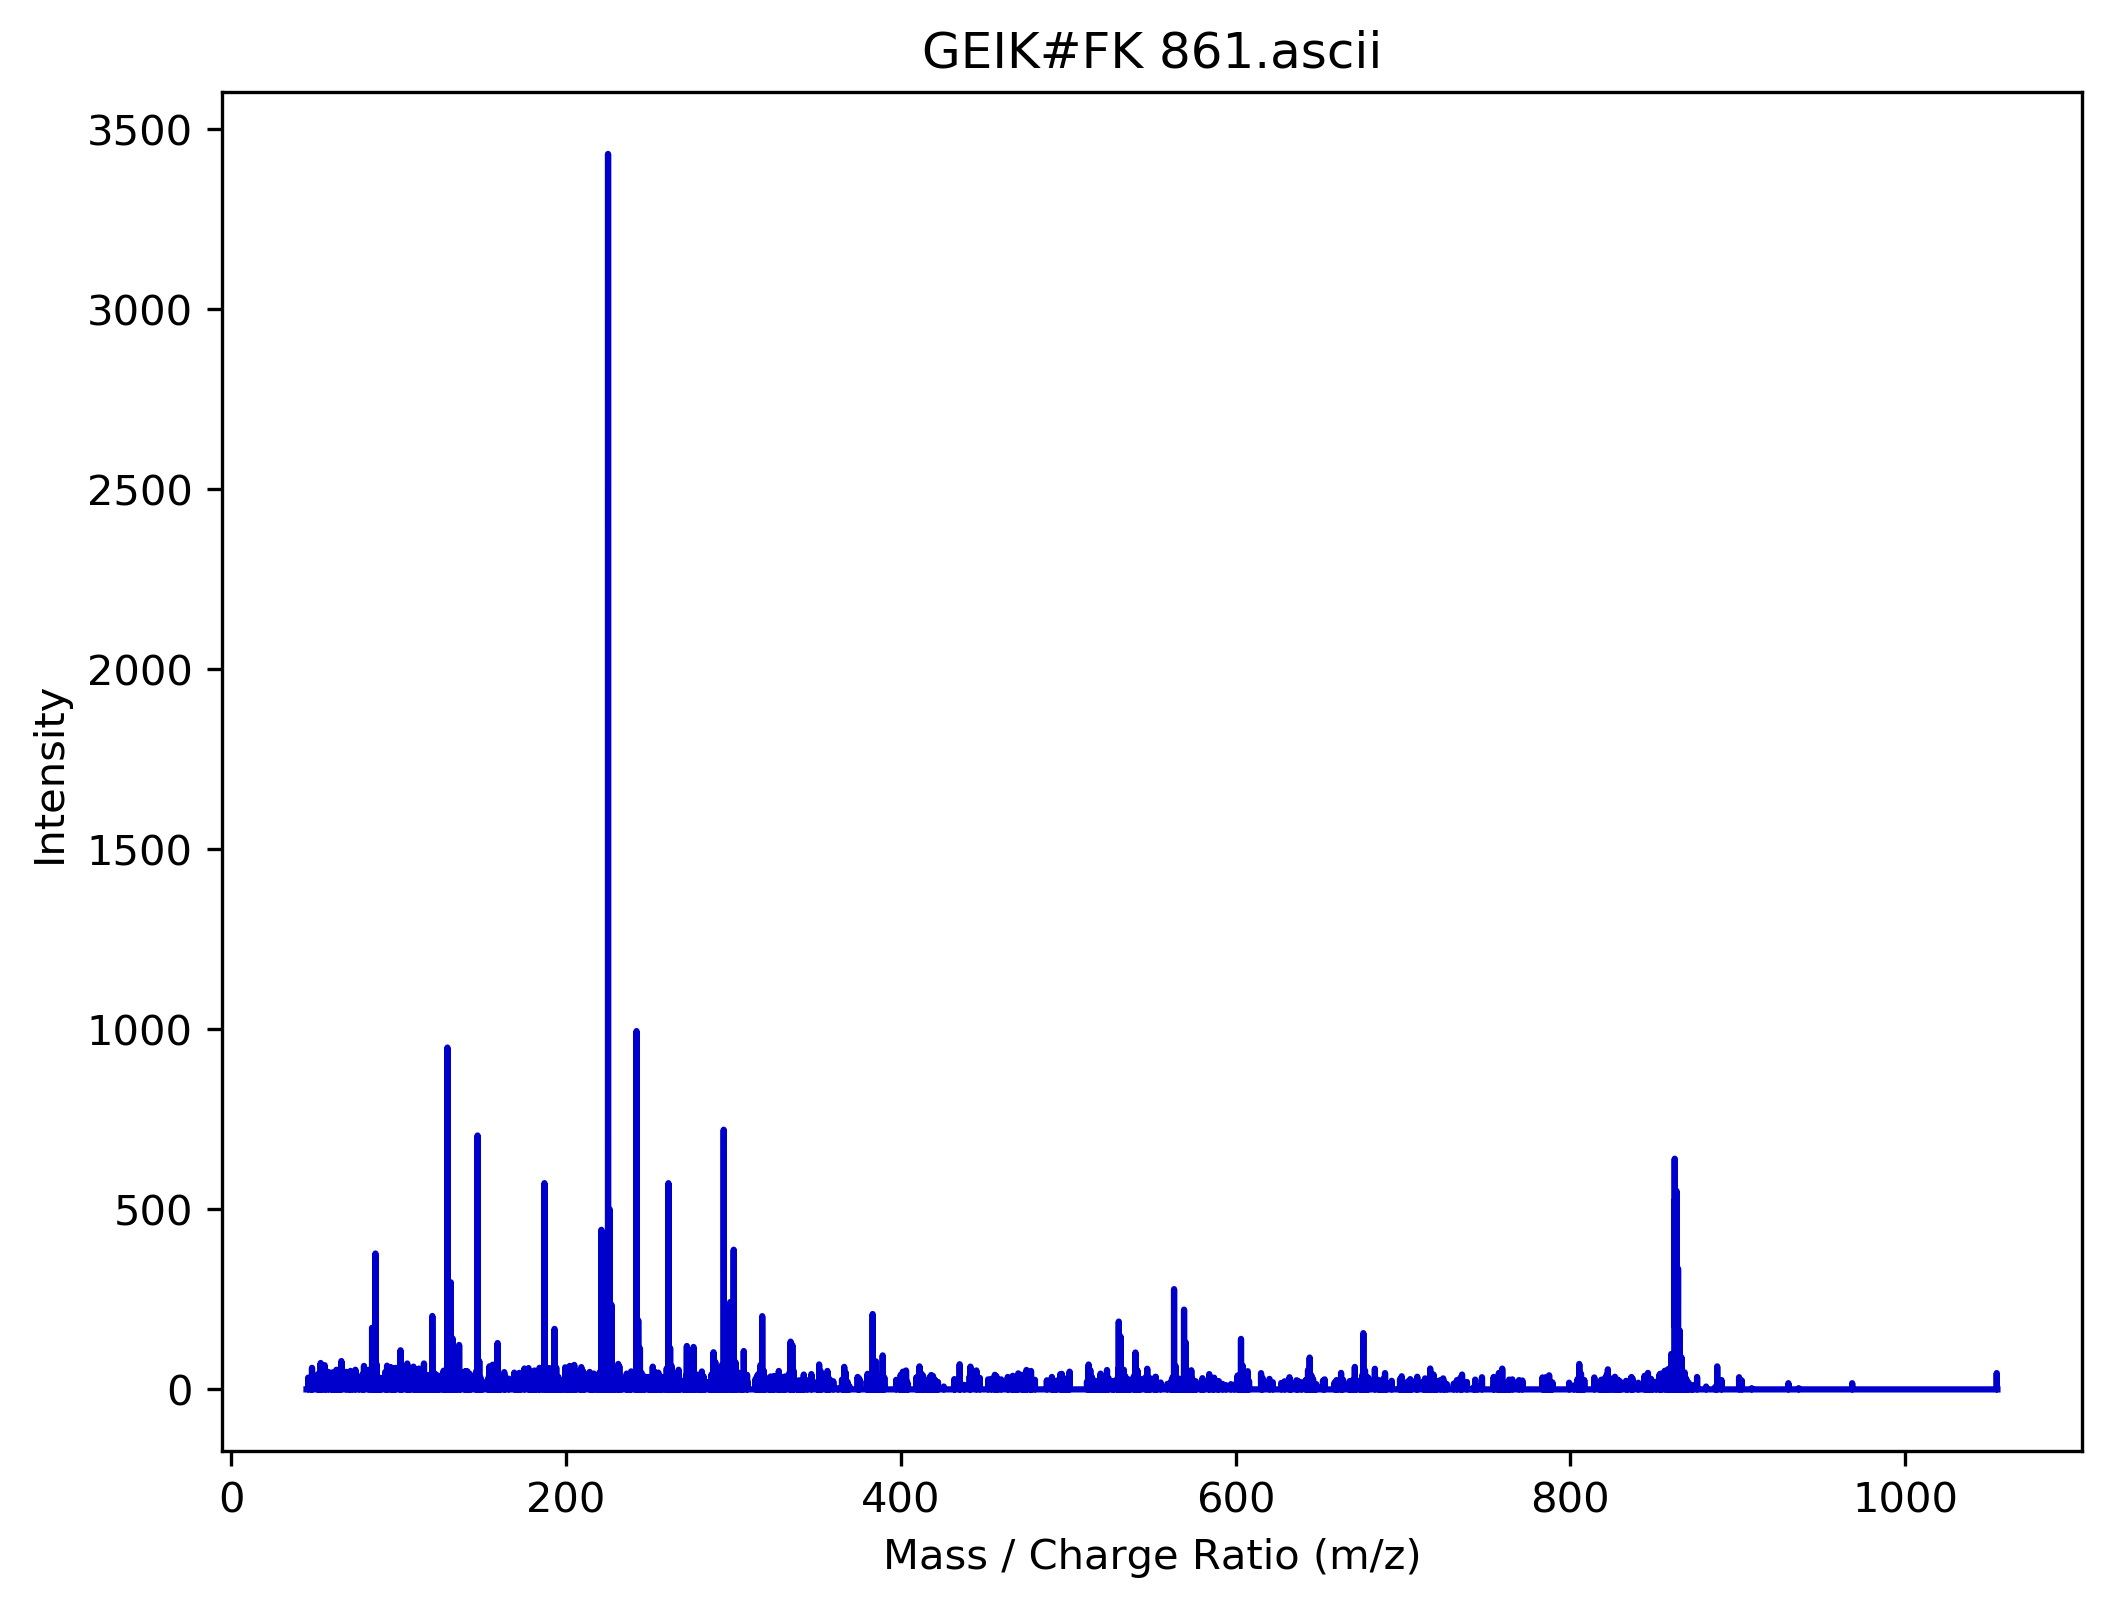

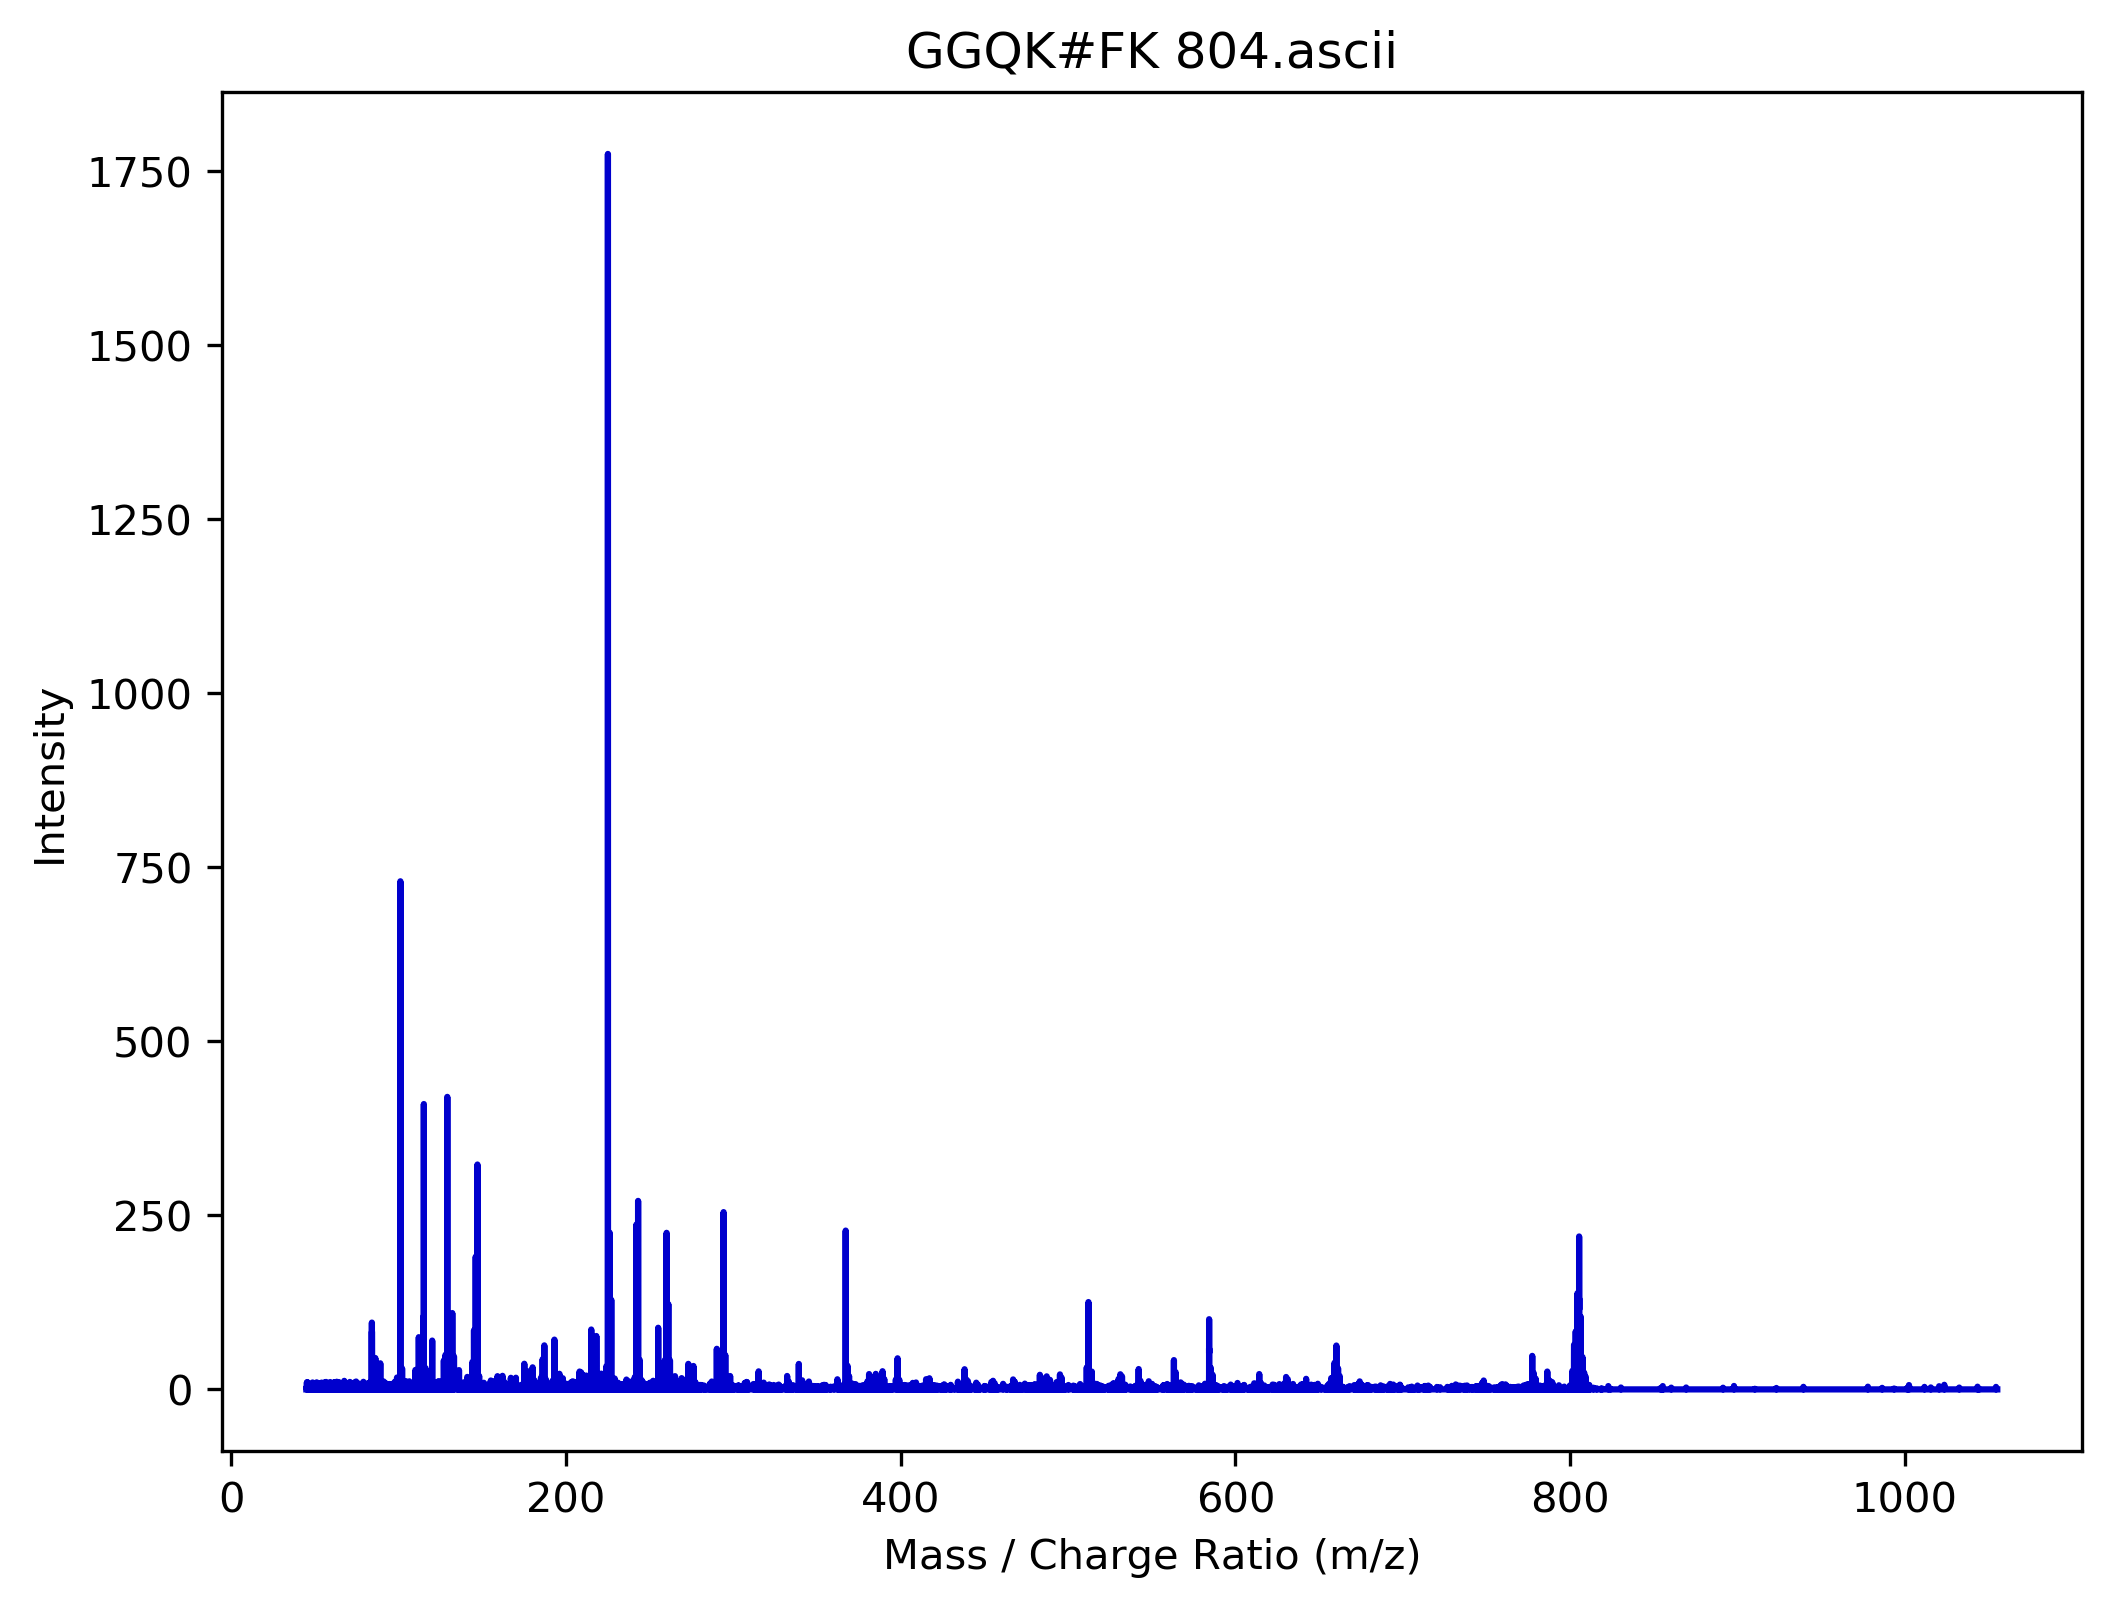

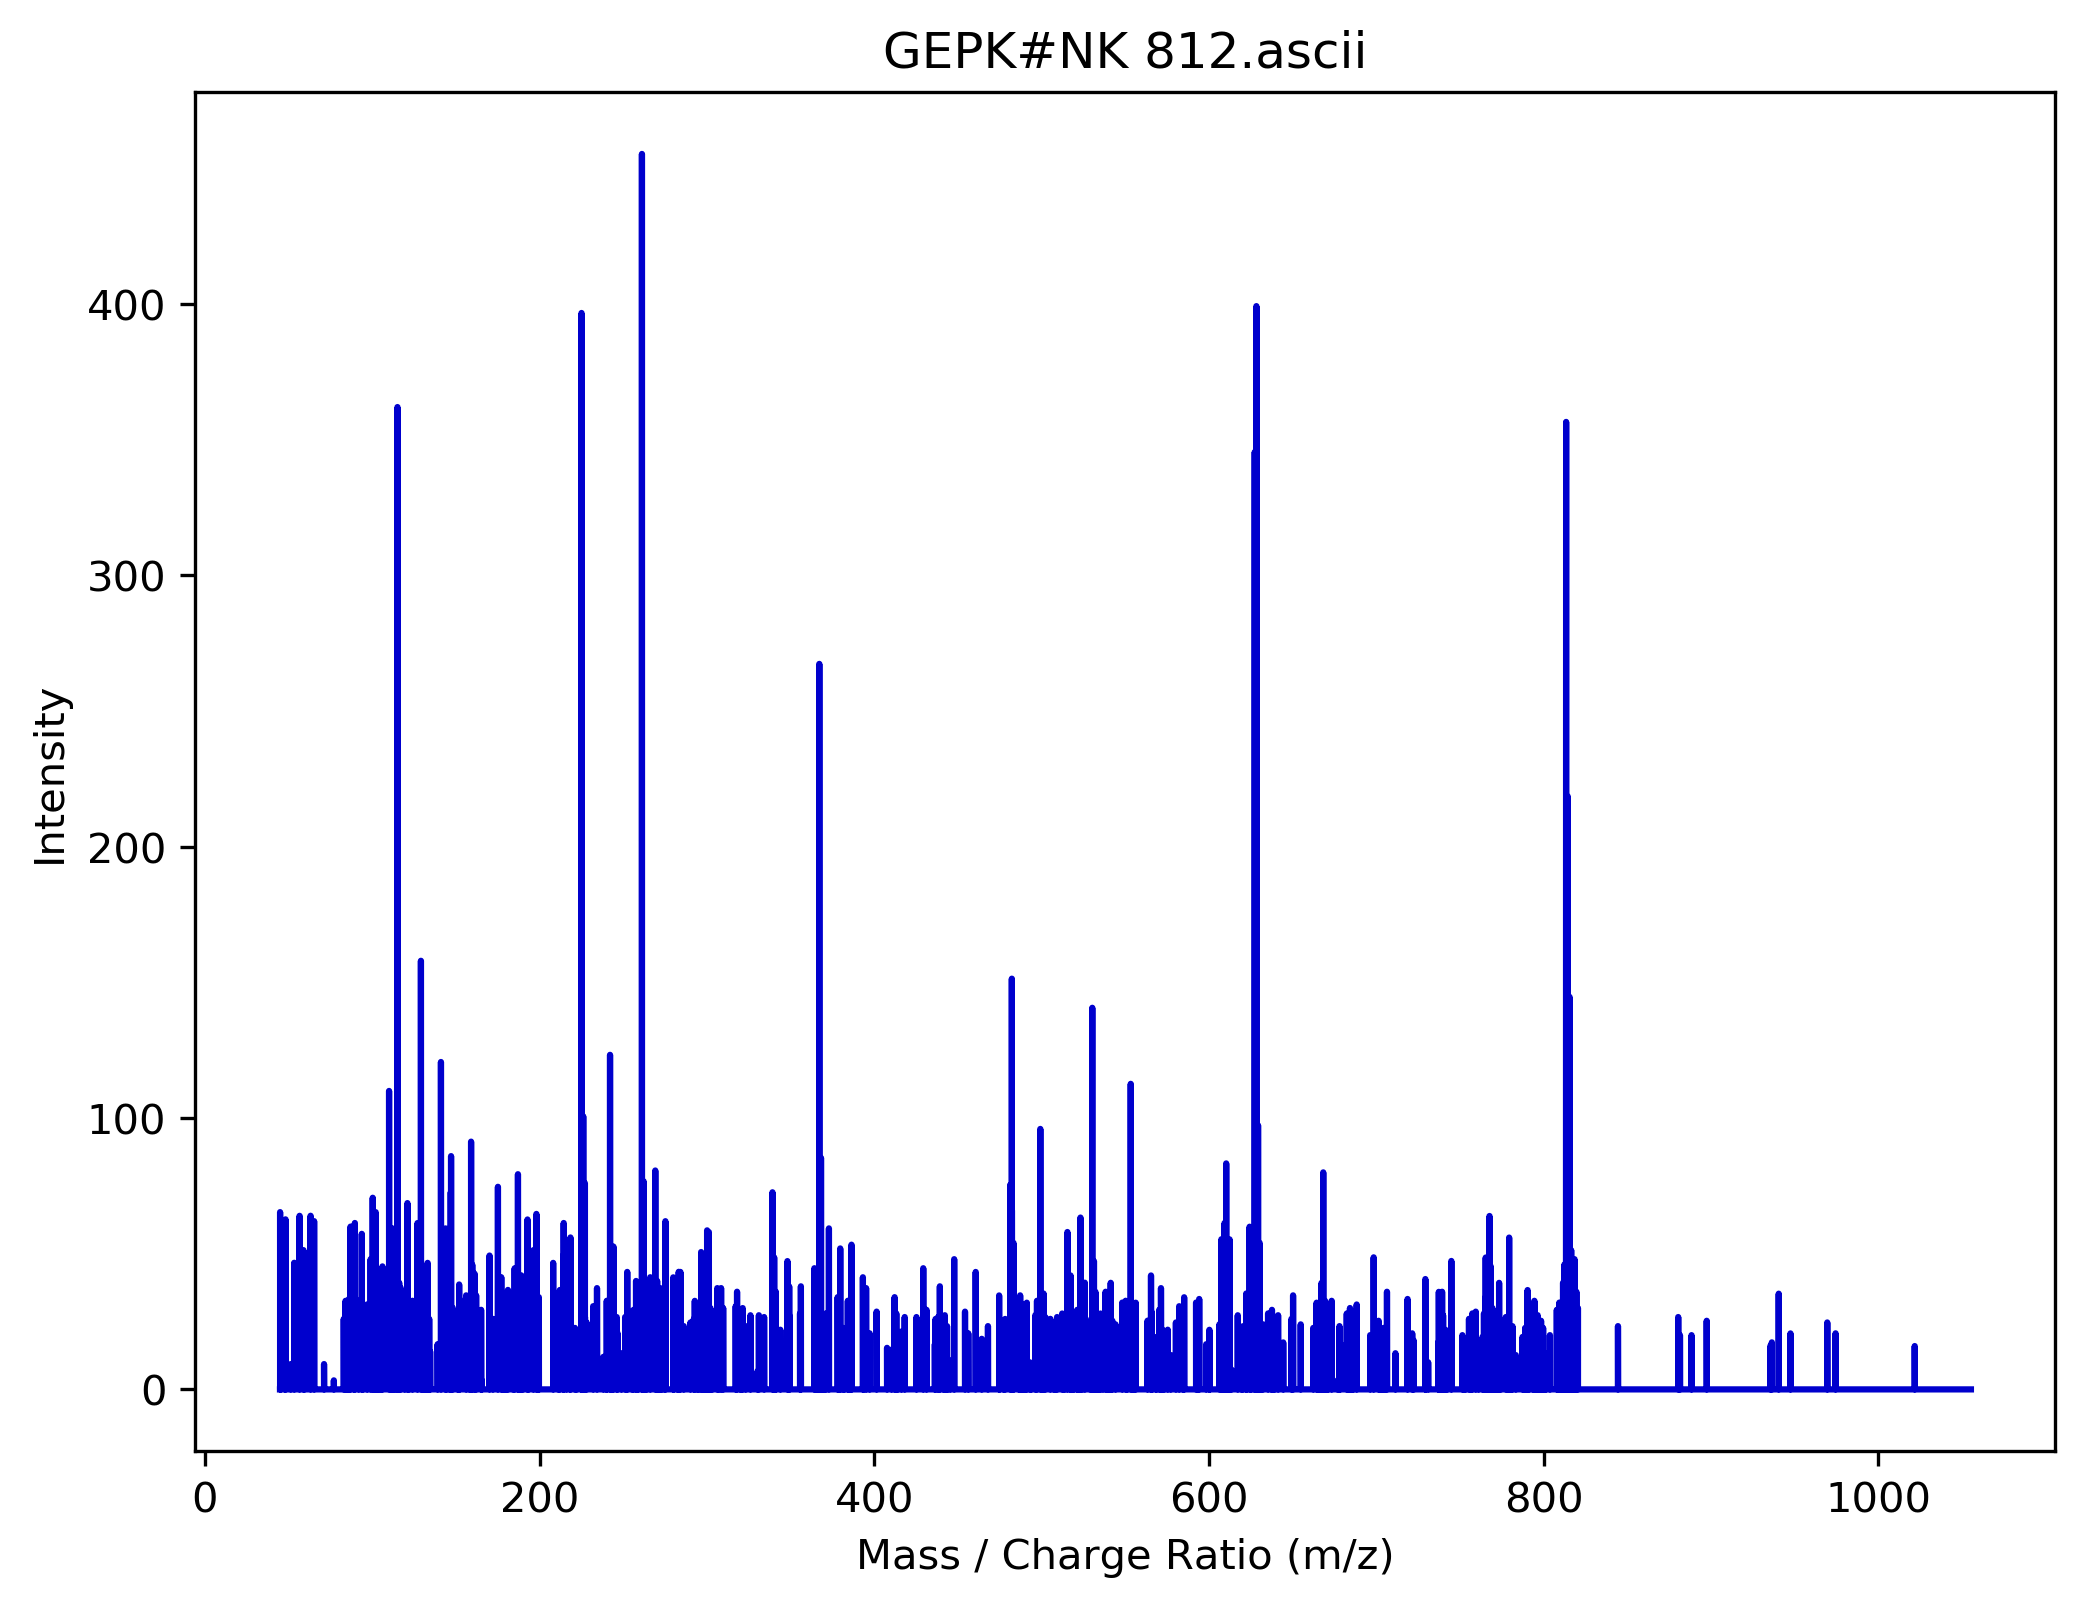

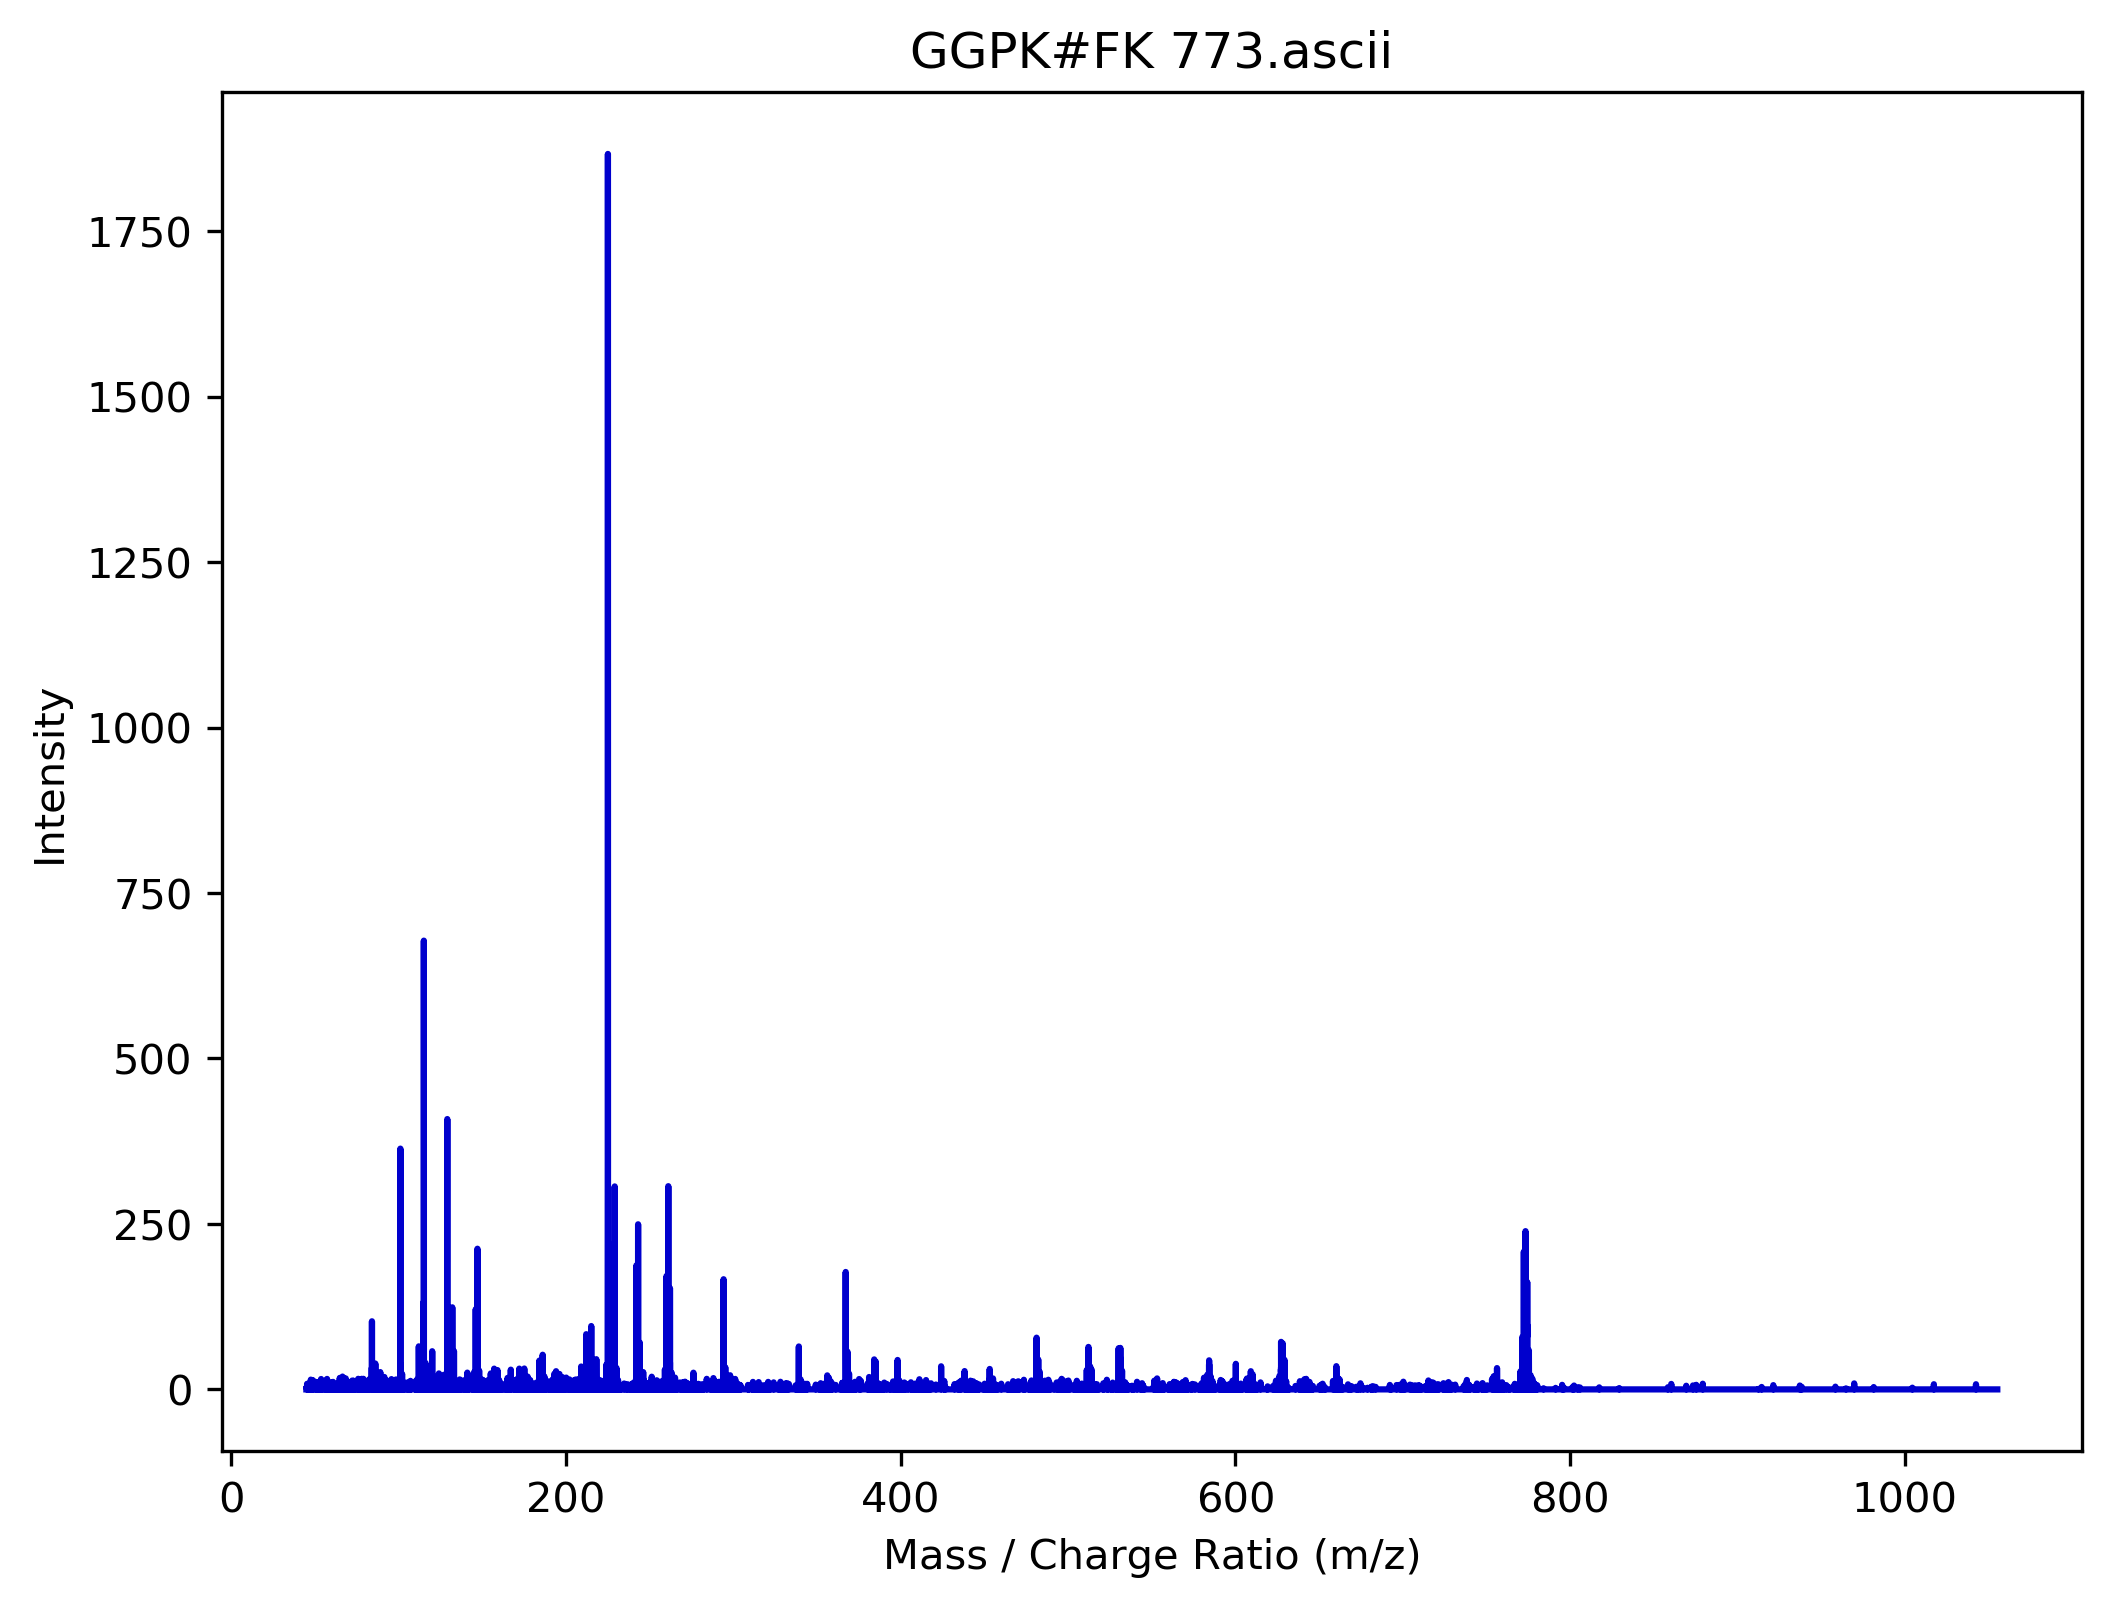

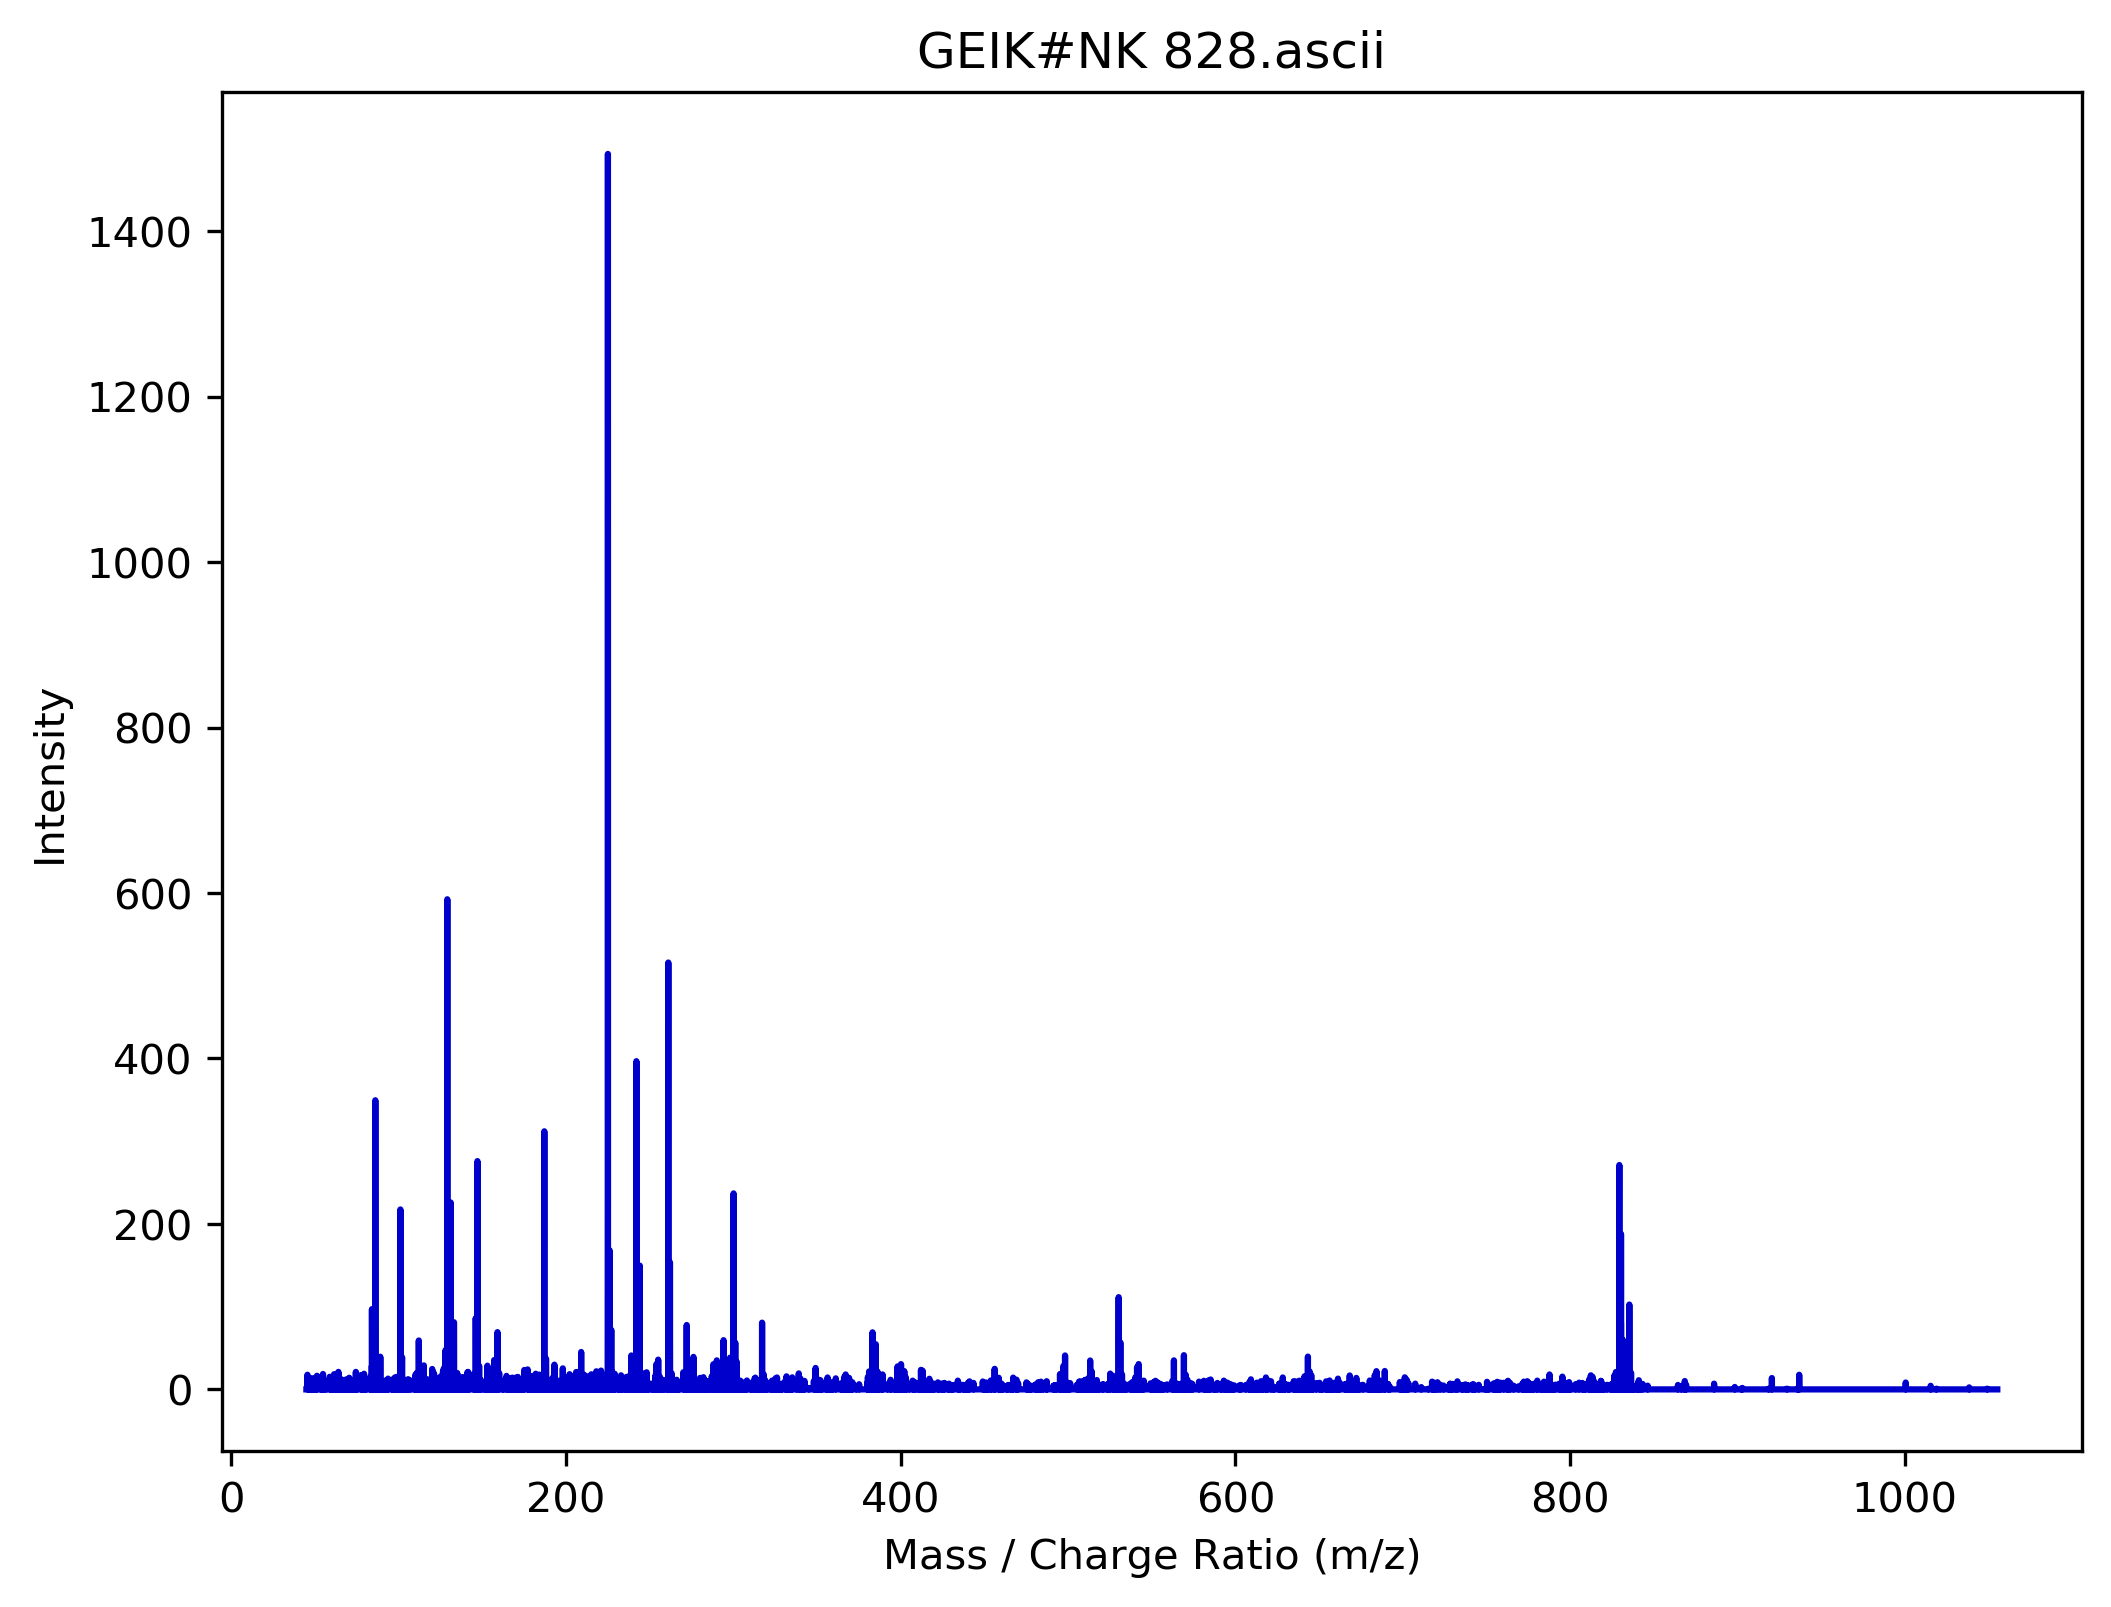

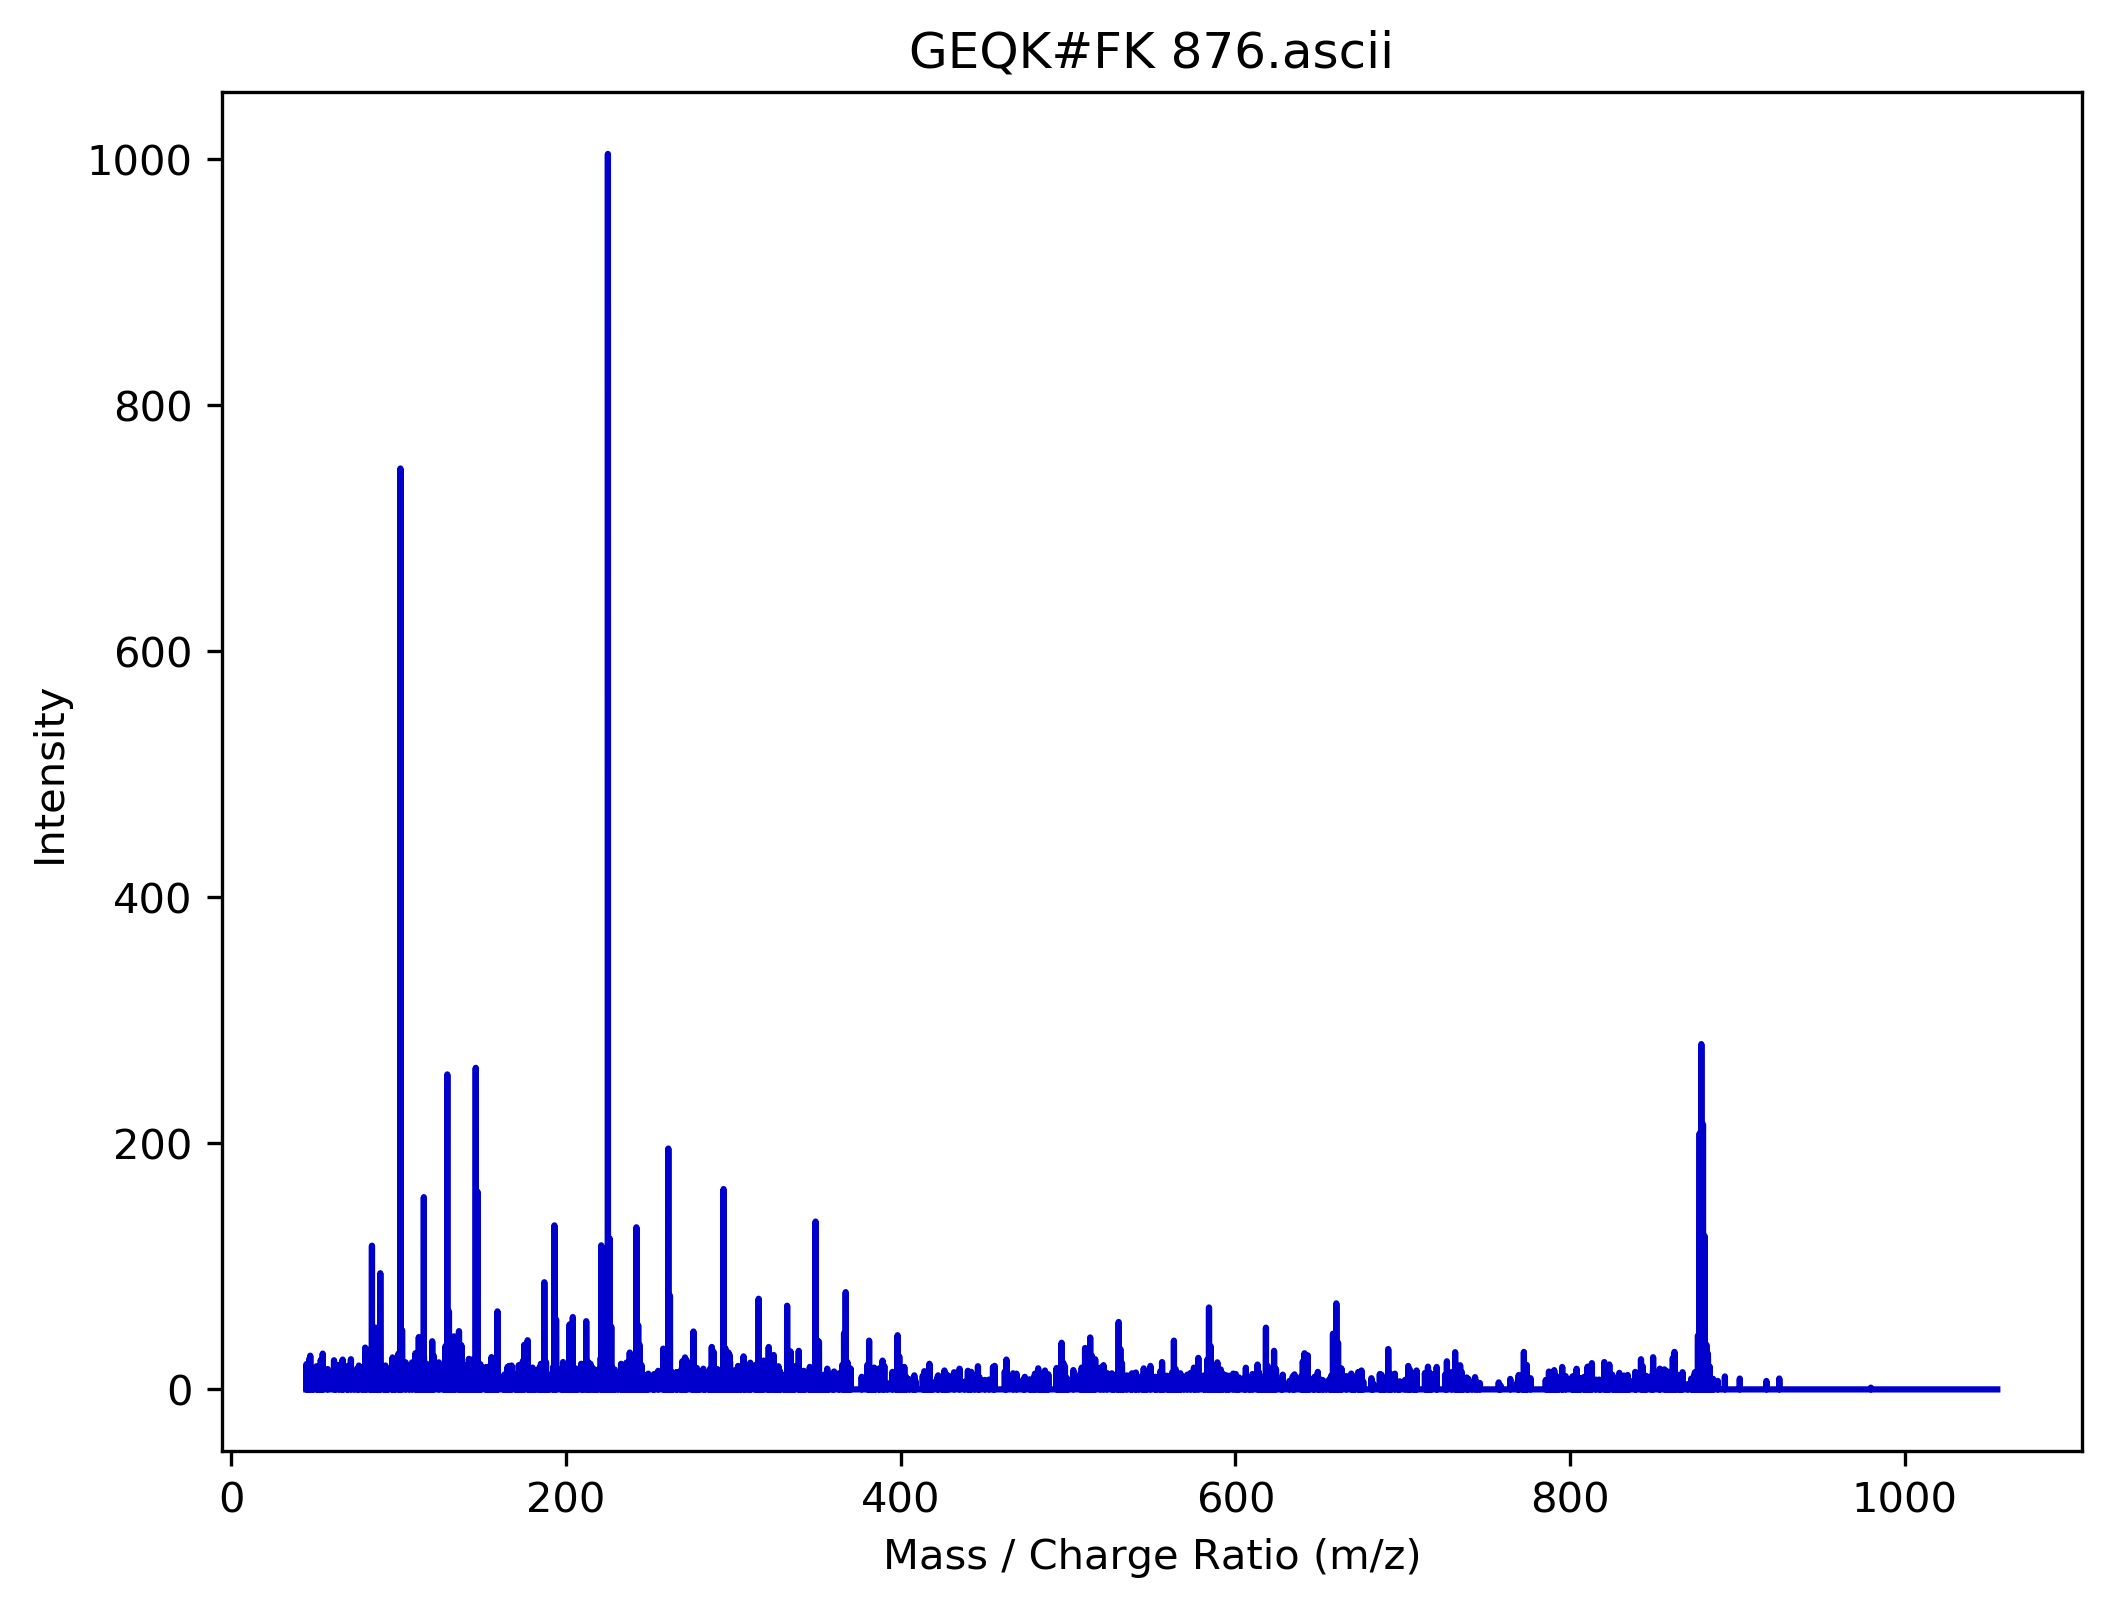

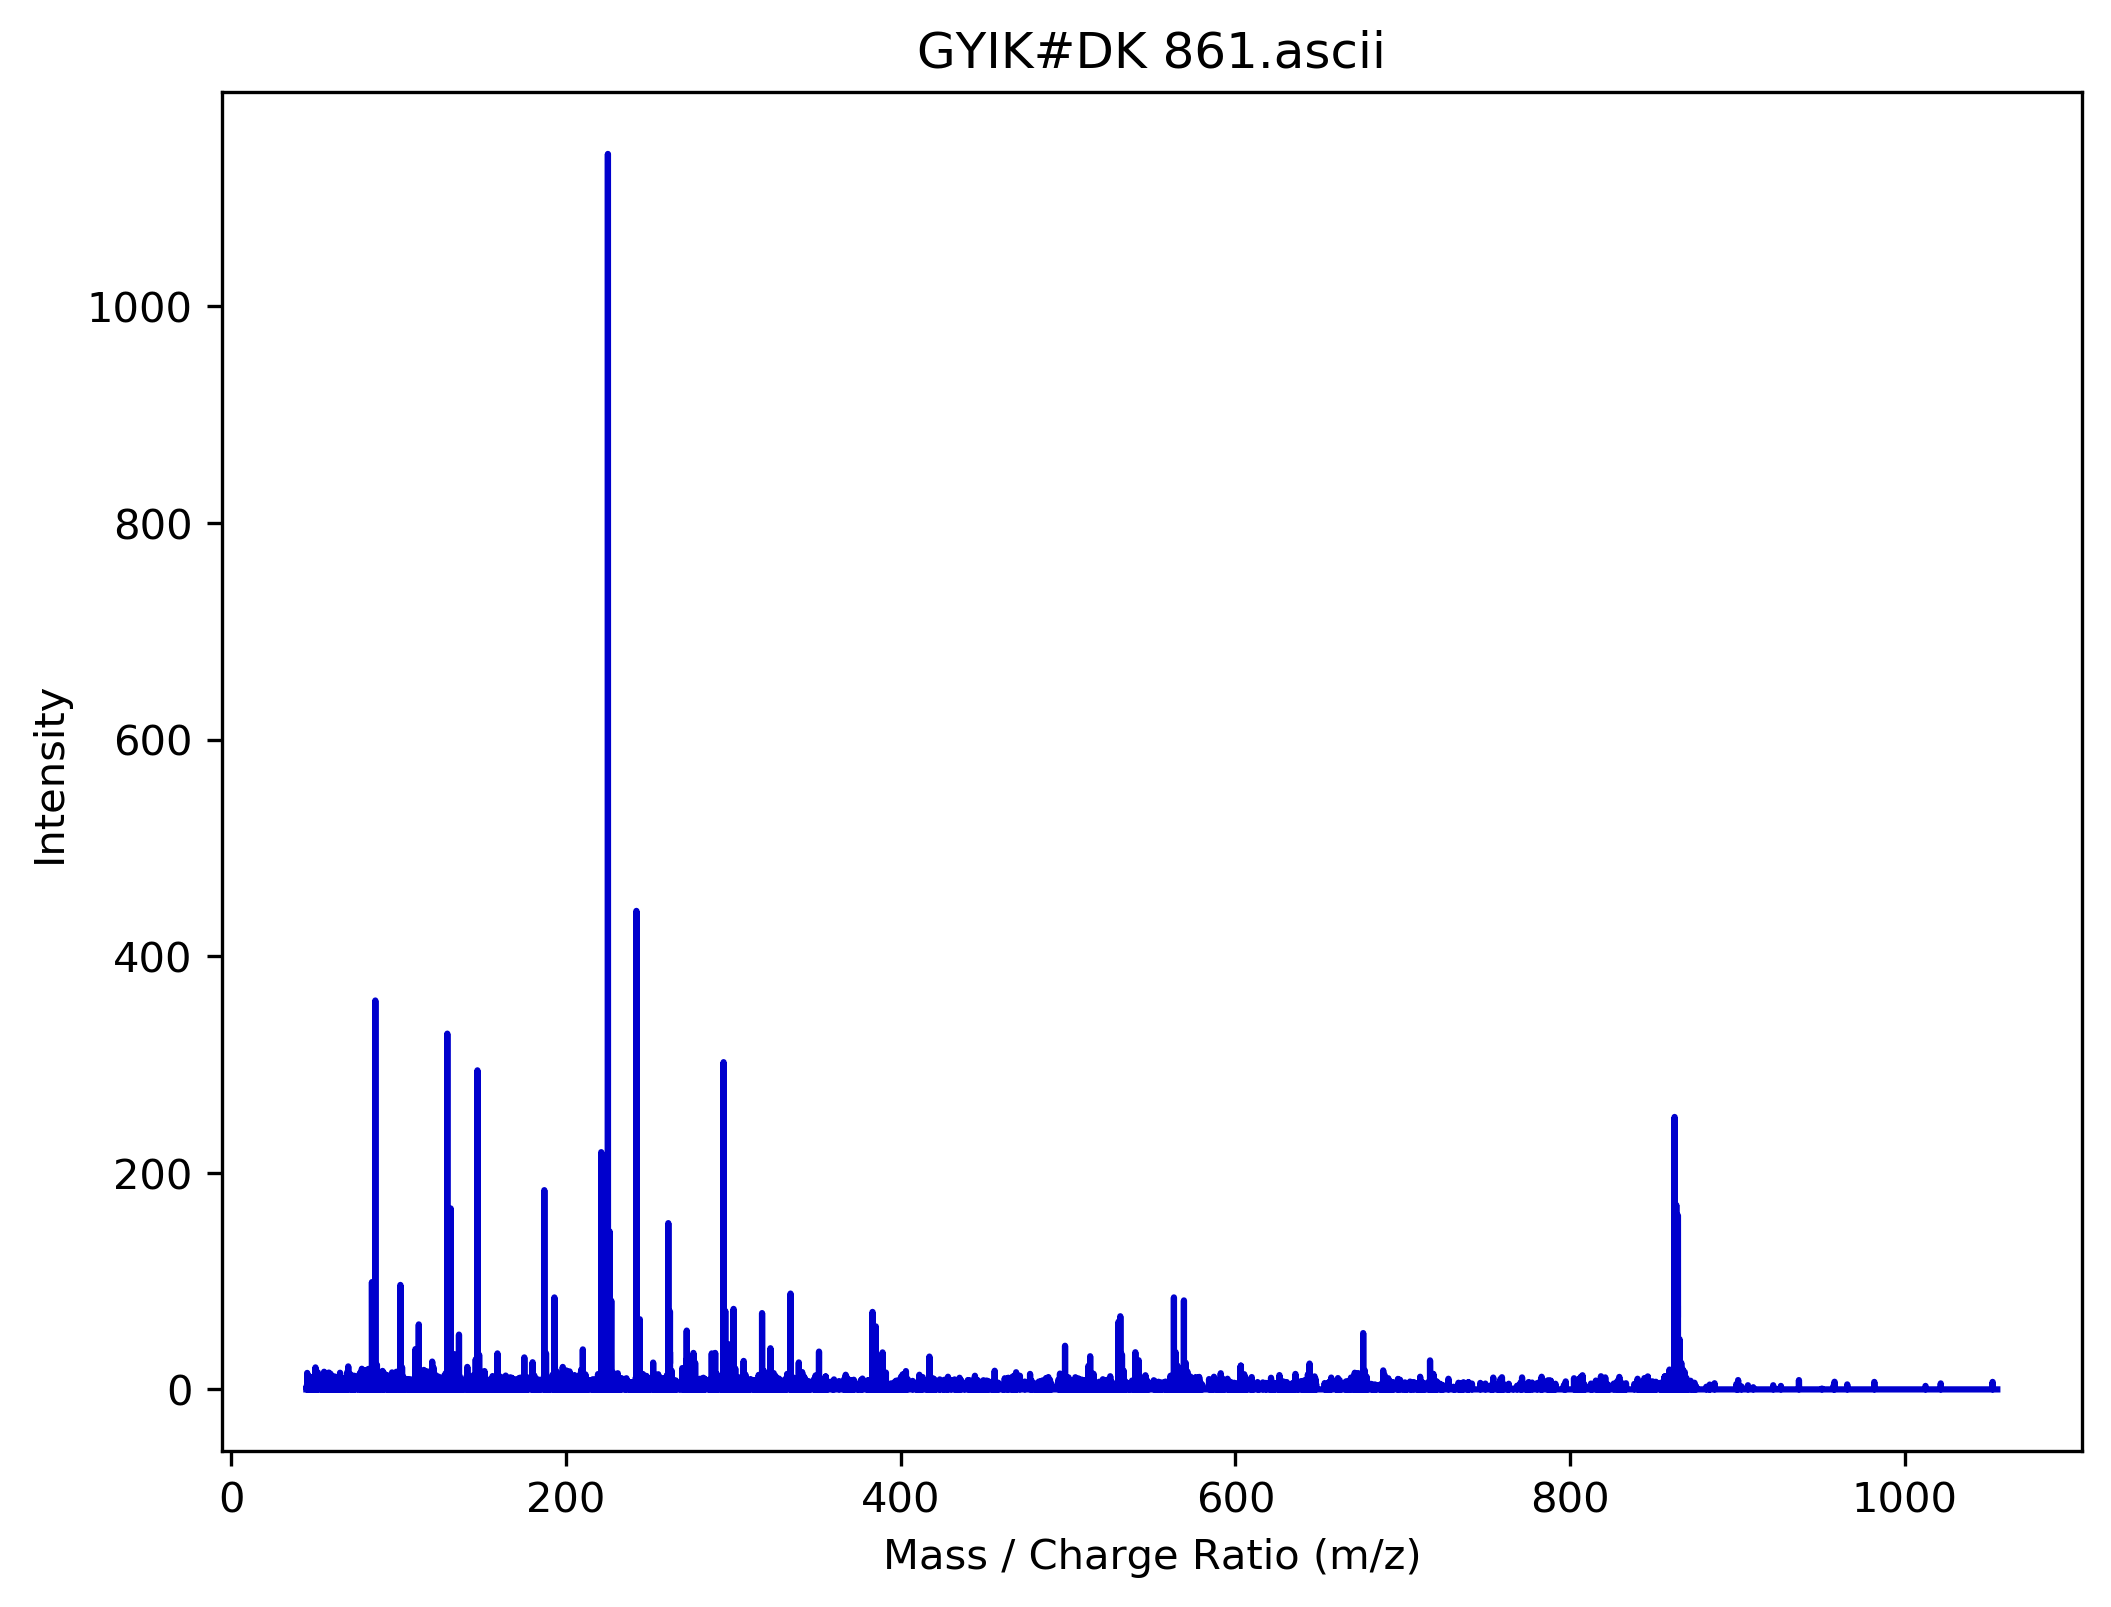

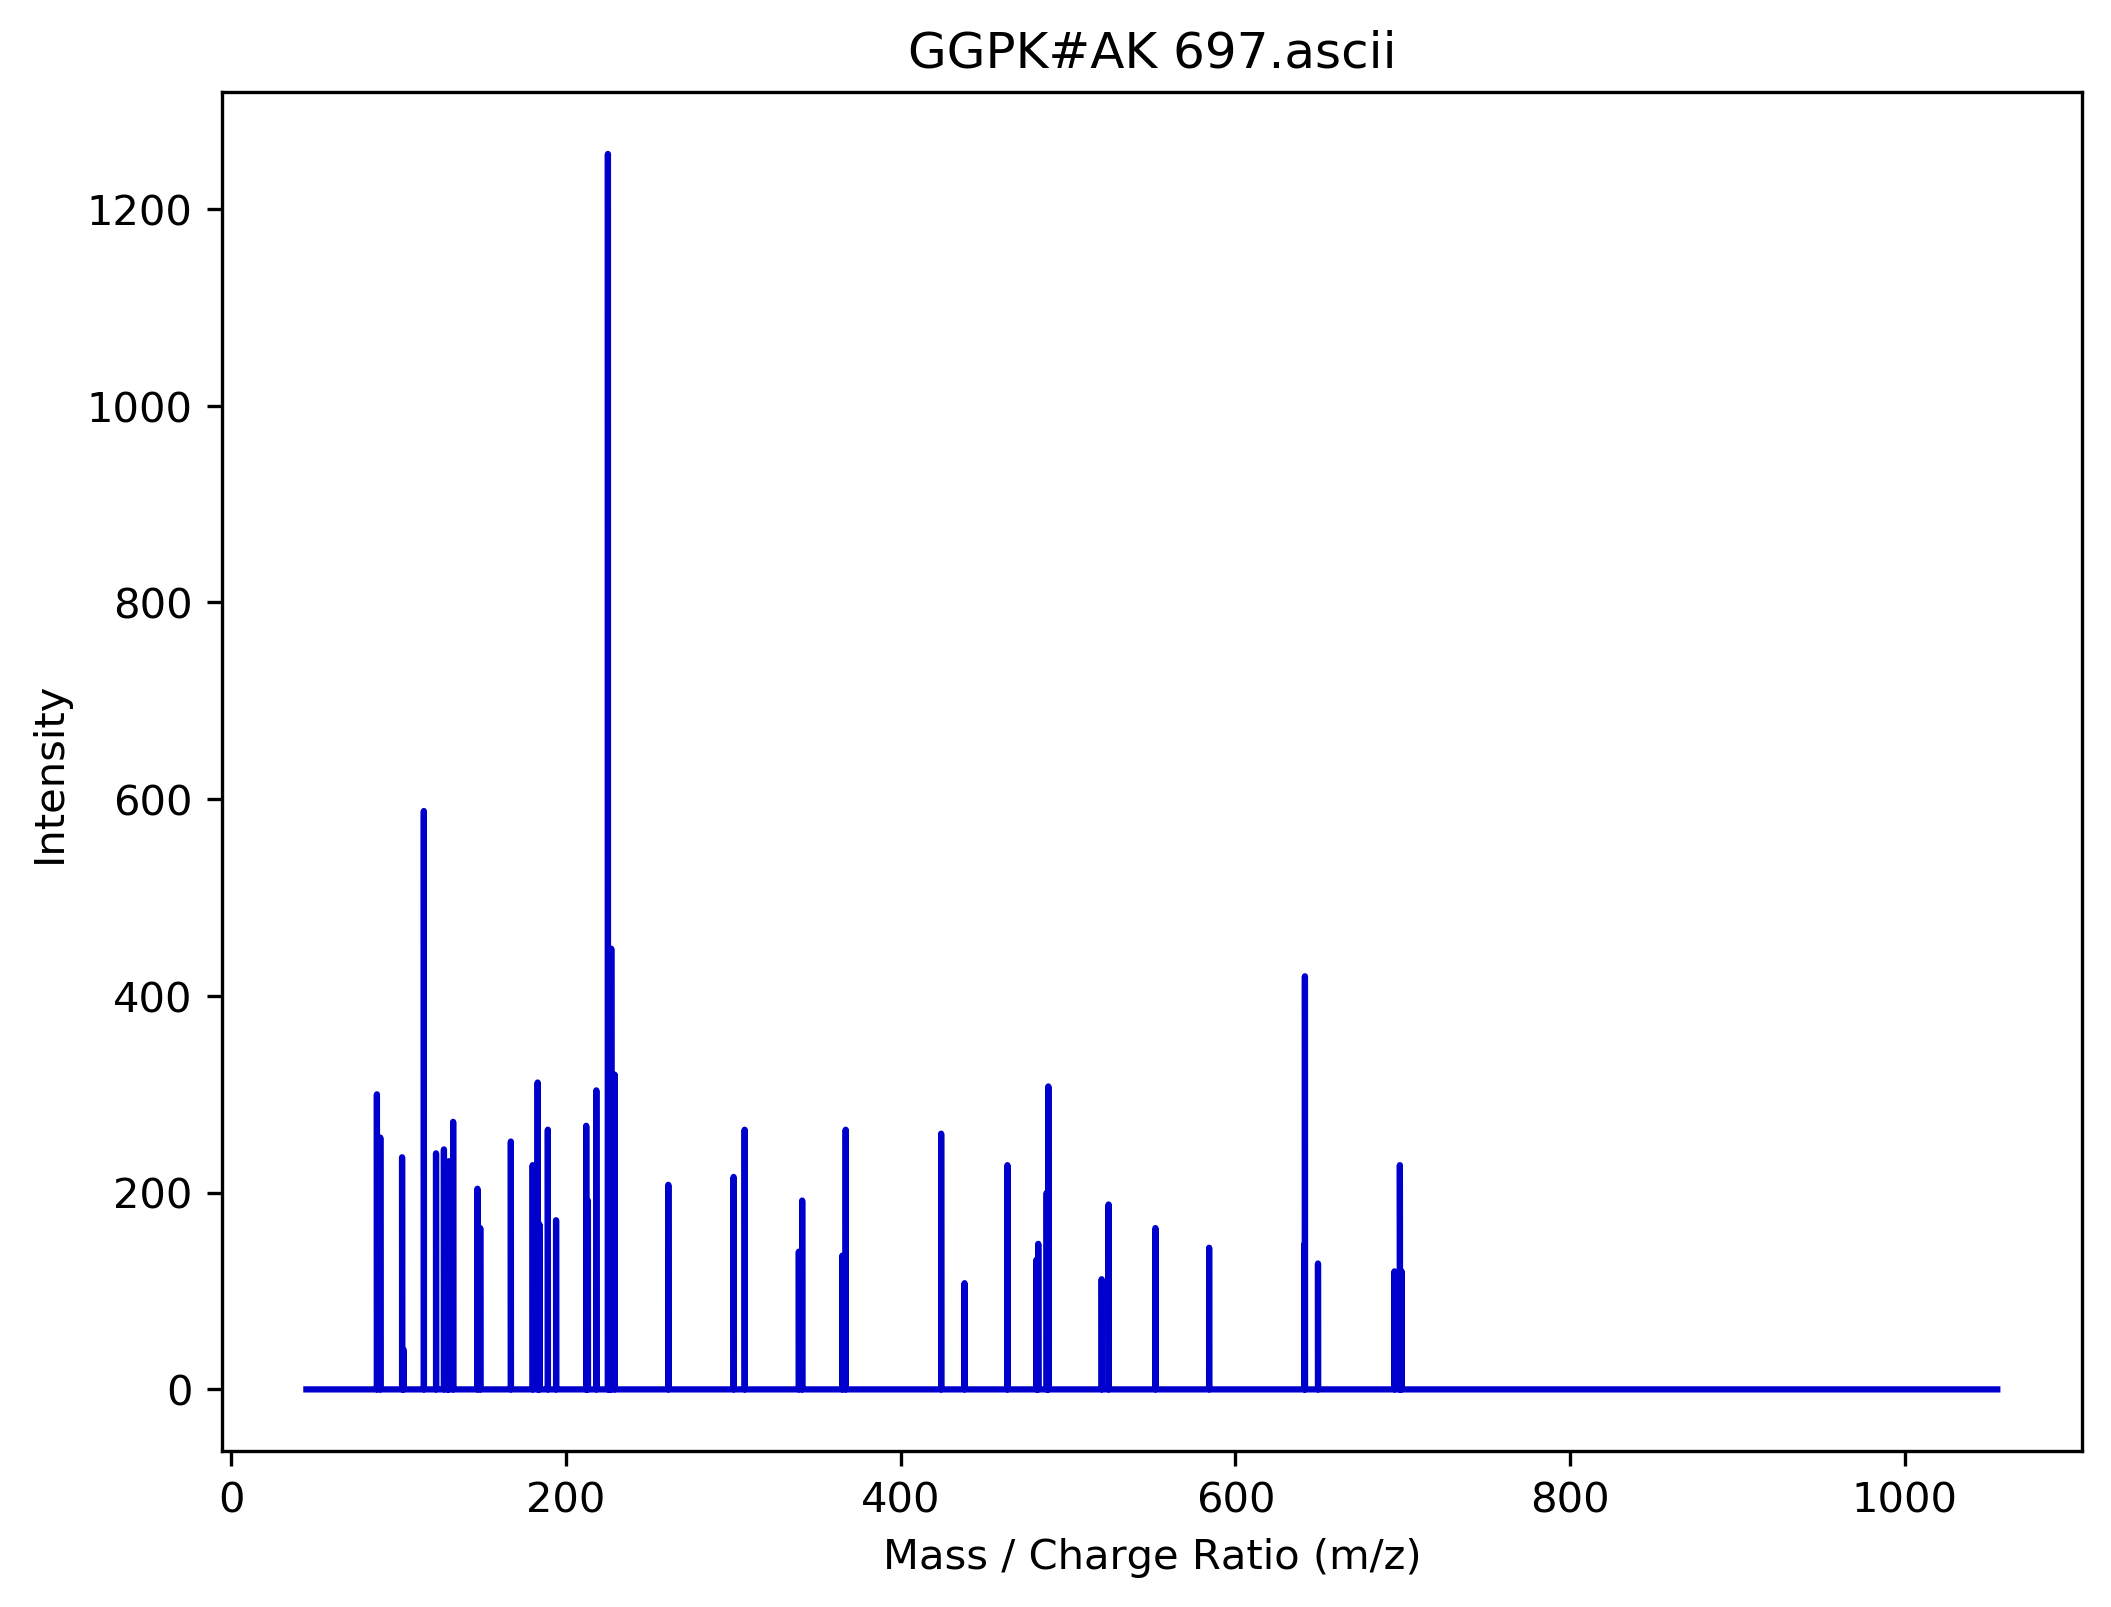

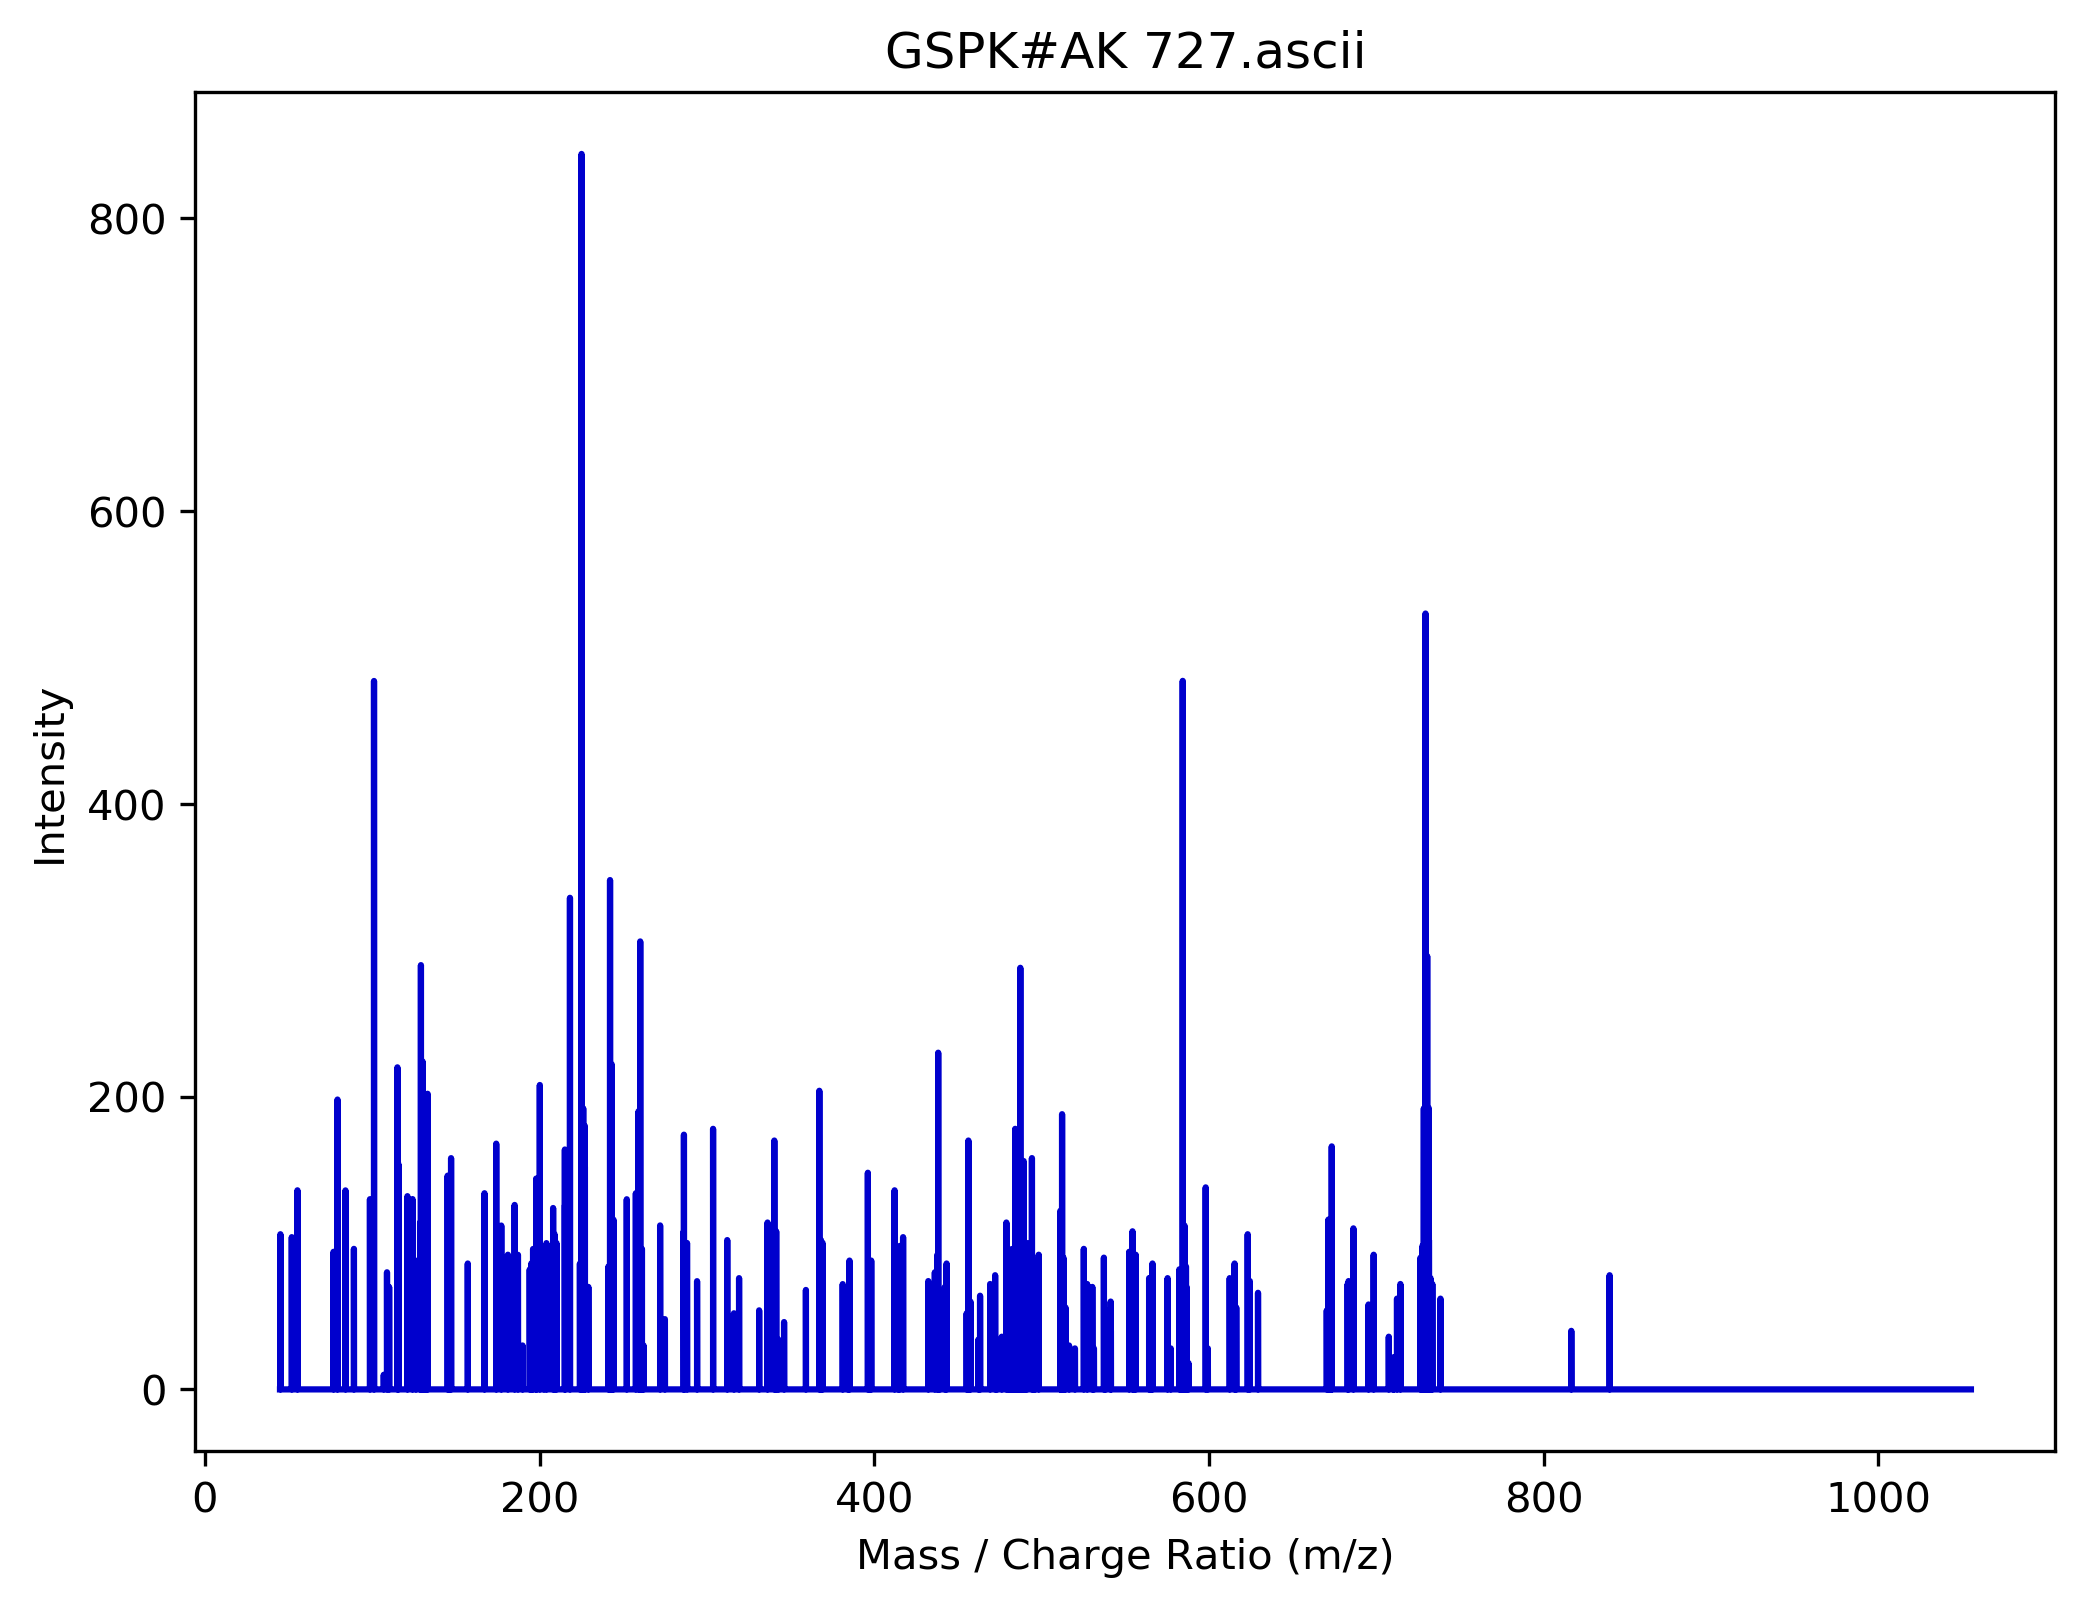

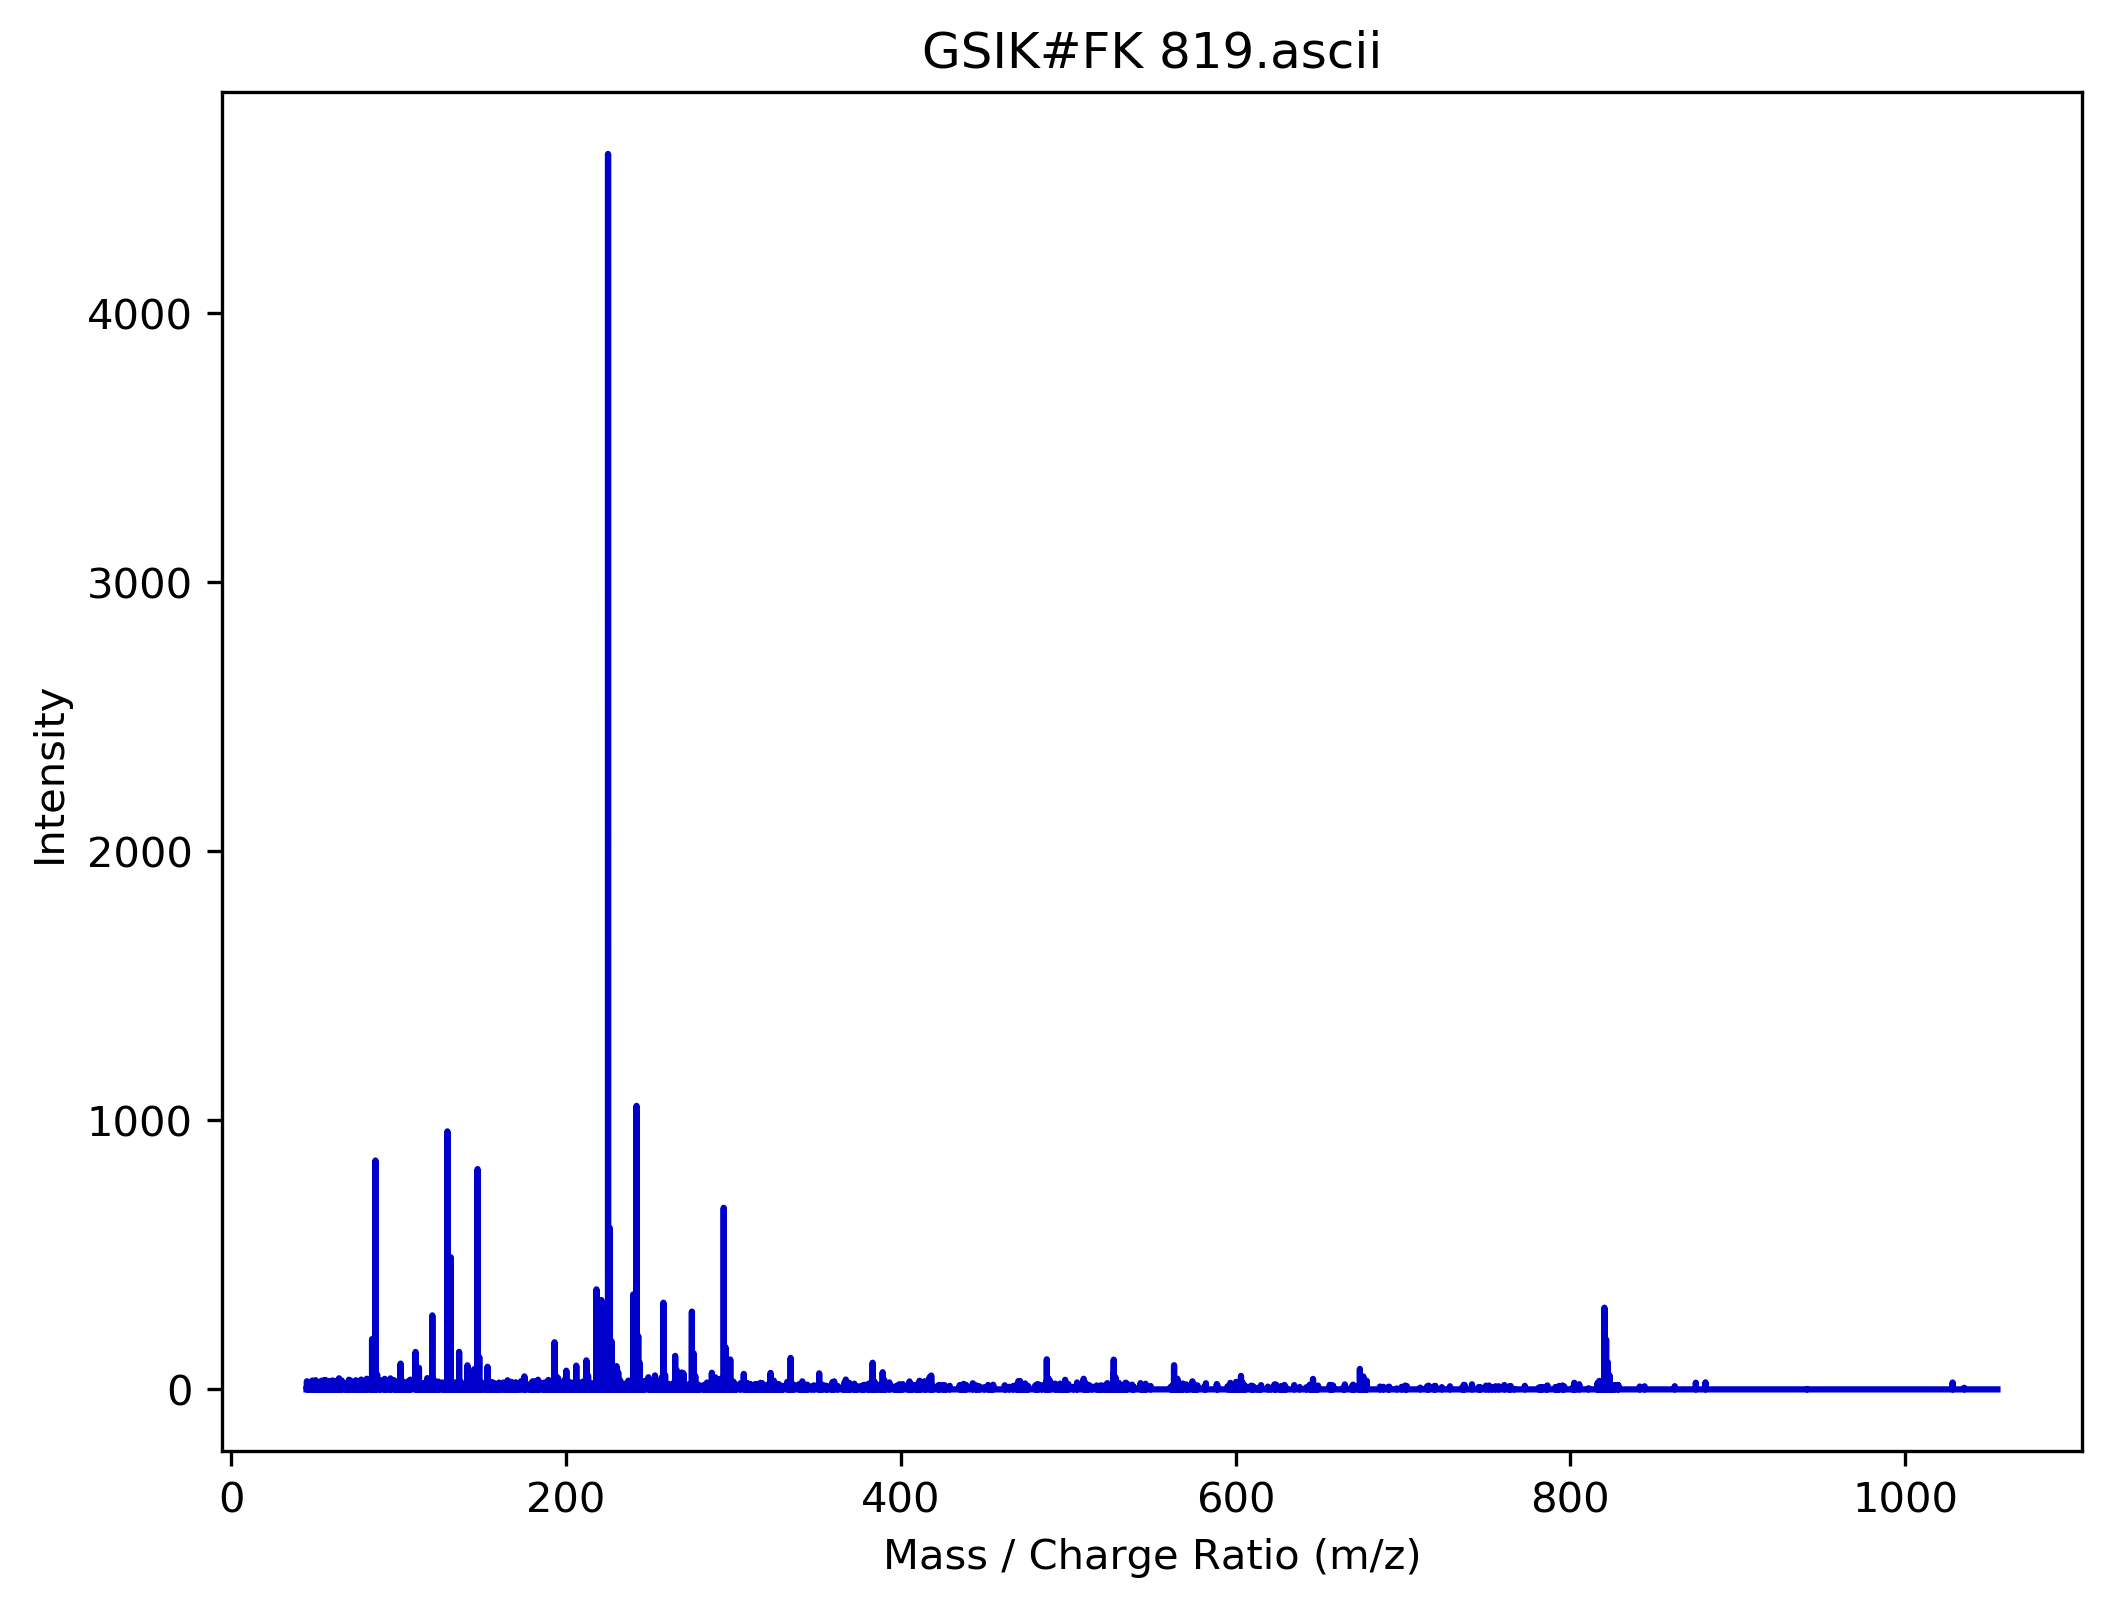

In [6]:
# give the extension for the files you are looking for
ascii_extension = '.ascii'

#for loop used to convert all ascii data files into numpy arrays with the same number of specified bins
for filename in os.listdir(directory):
    if filename.endswith(ascii_extension):
        #create new numpy array and load ascii file into it
        arr = np.loadtxt(filename, delimiter=',', dtype=str)

        #convert loaded strings into floats, skipping any uneeded data 
        ms_arr = np.array(list(np.core.defchararray.split(arr[8:])), dtype=float)
        
        #plot data to validate spectrum appearance 
        plt.figure(figsize=(8, 6), dpi=300)
        plt.title('{}'.format(filename))
        plt.xlabel("Mass / Charge Ratio (m/z)") 
        plt.ylabel("Intensity") 
        plt.plot(ms_arr[:,0],ms_arr[:,1], color=',mediumblue')
        plt.show()

## Unmodified Peptide Spectra

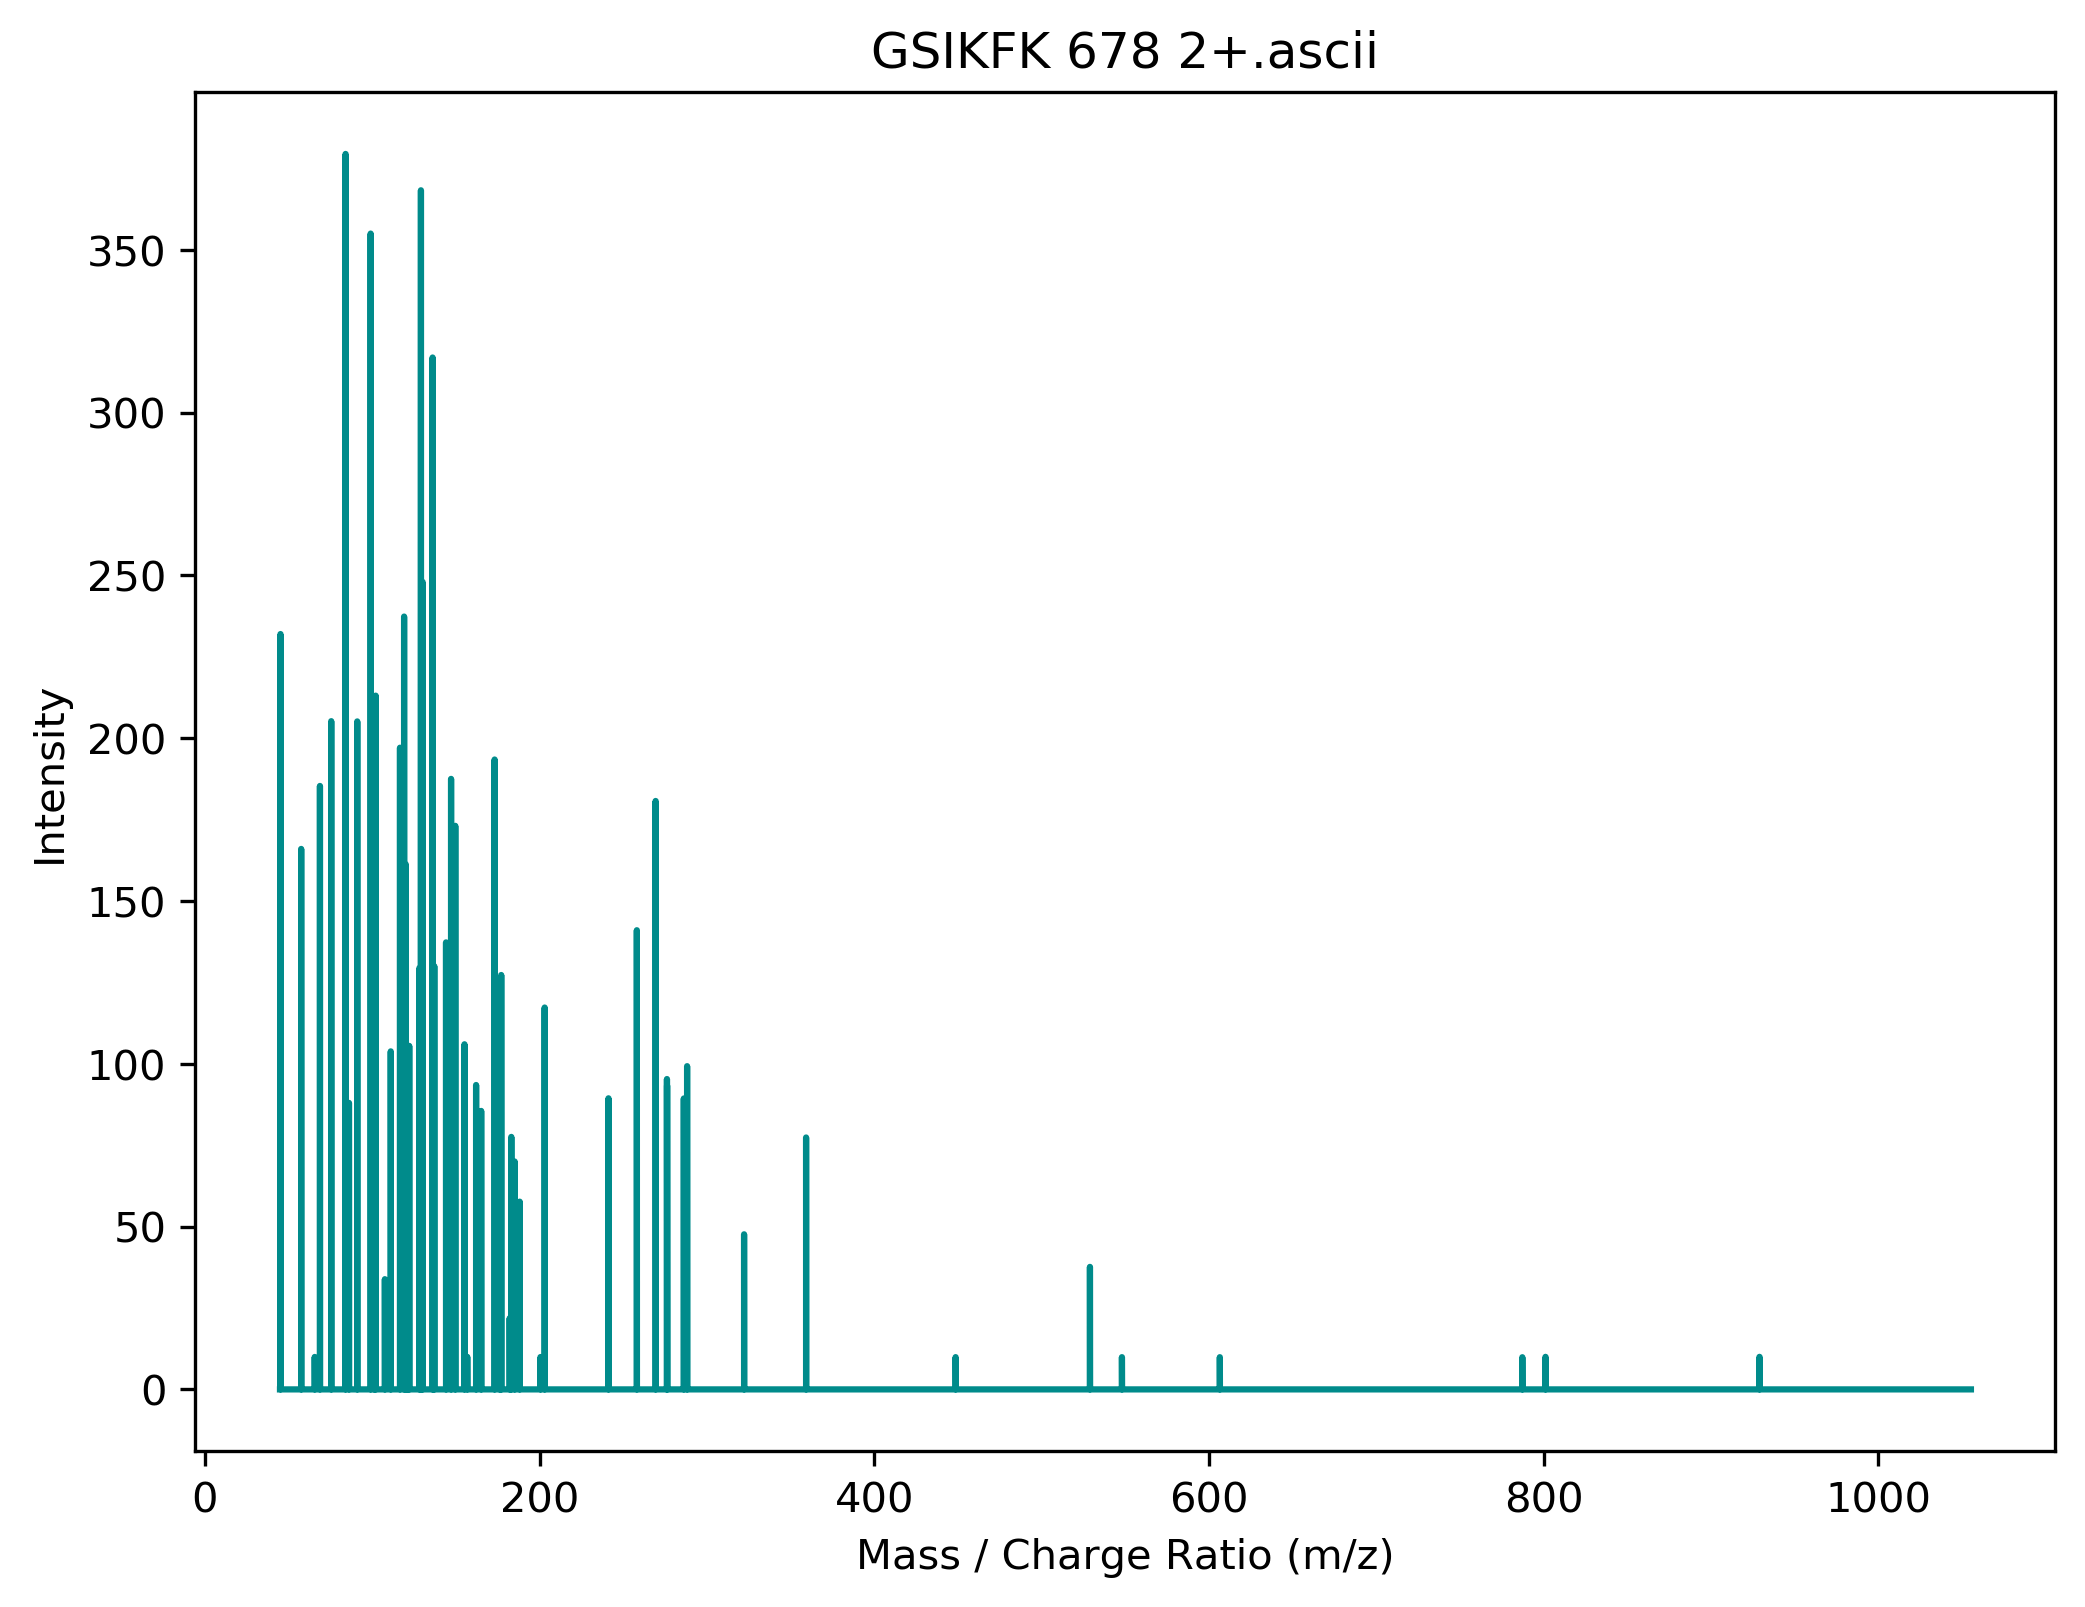

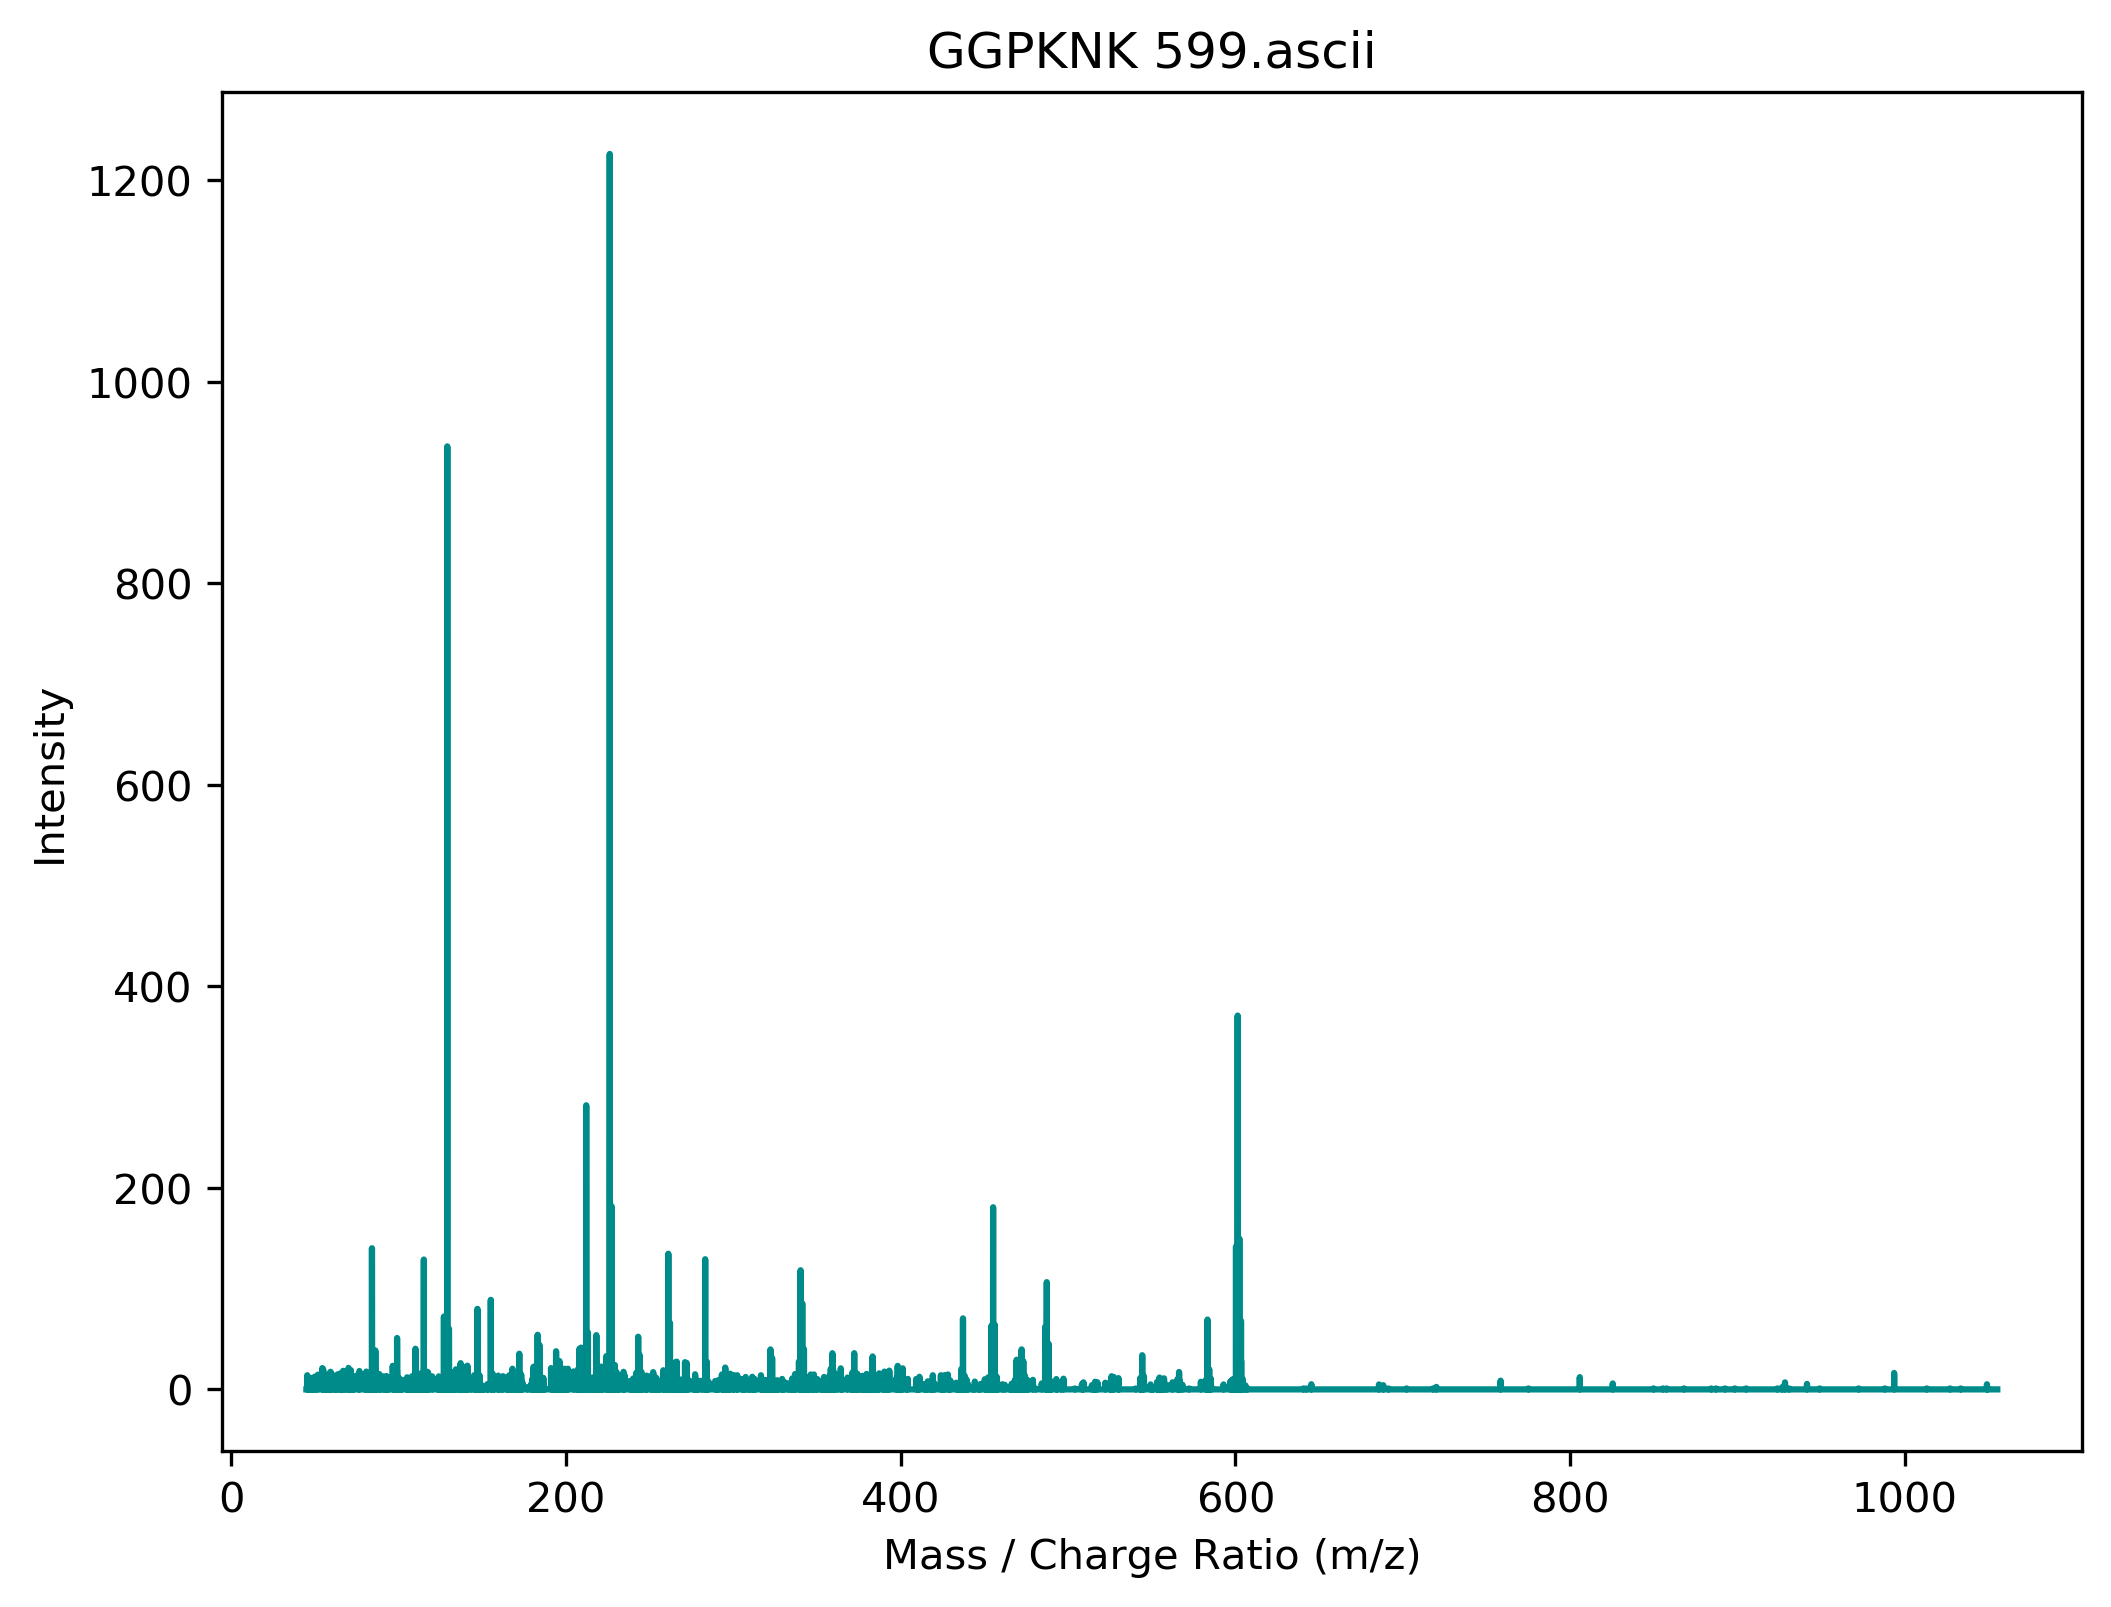

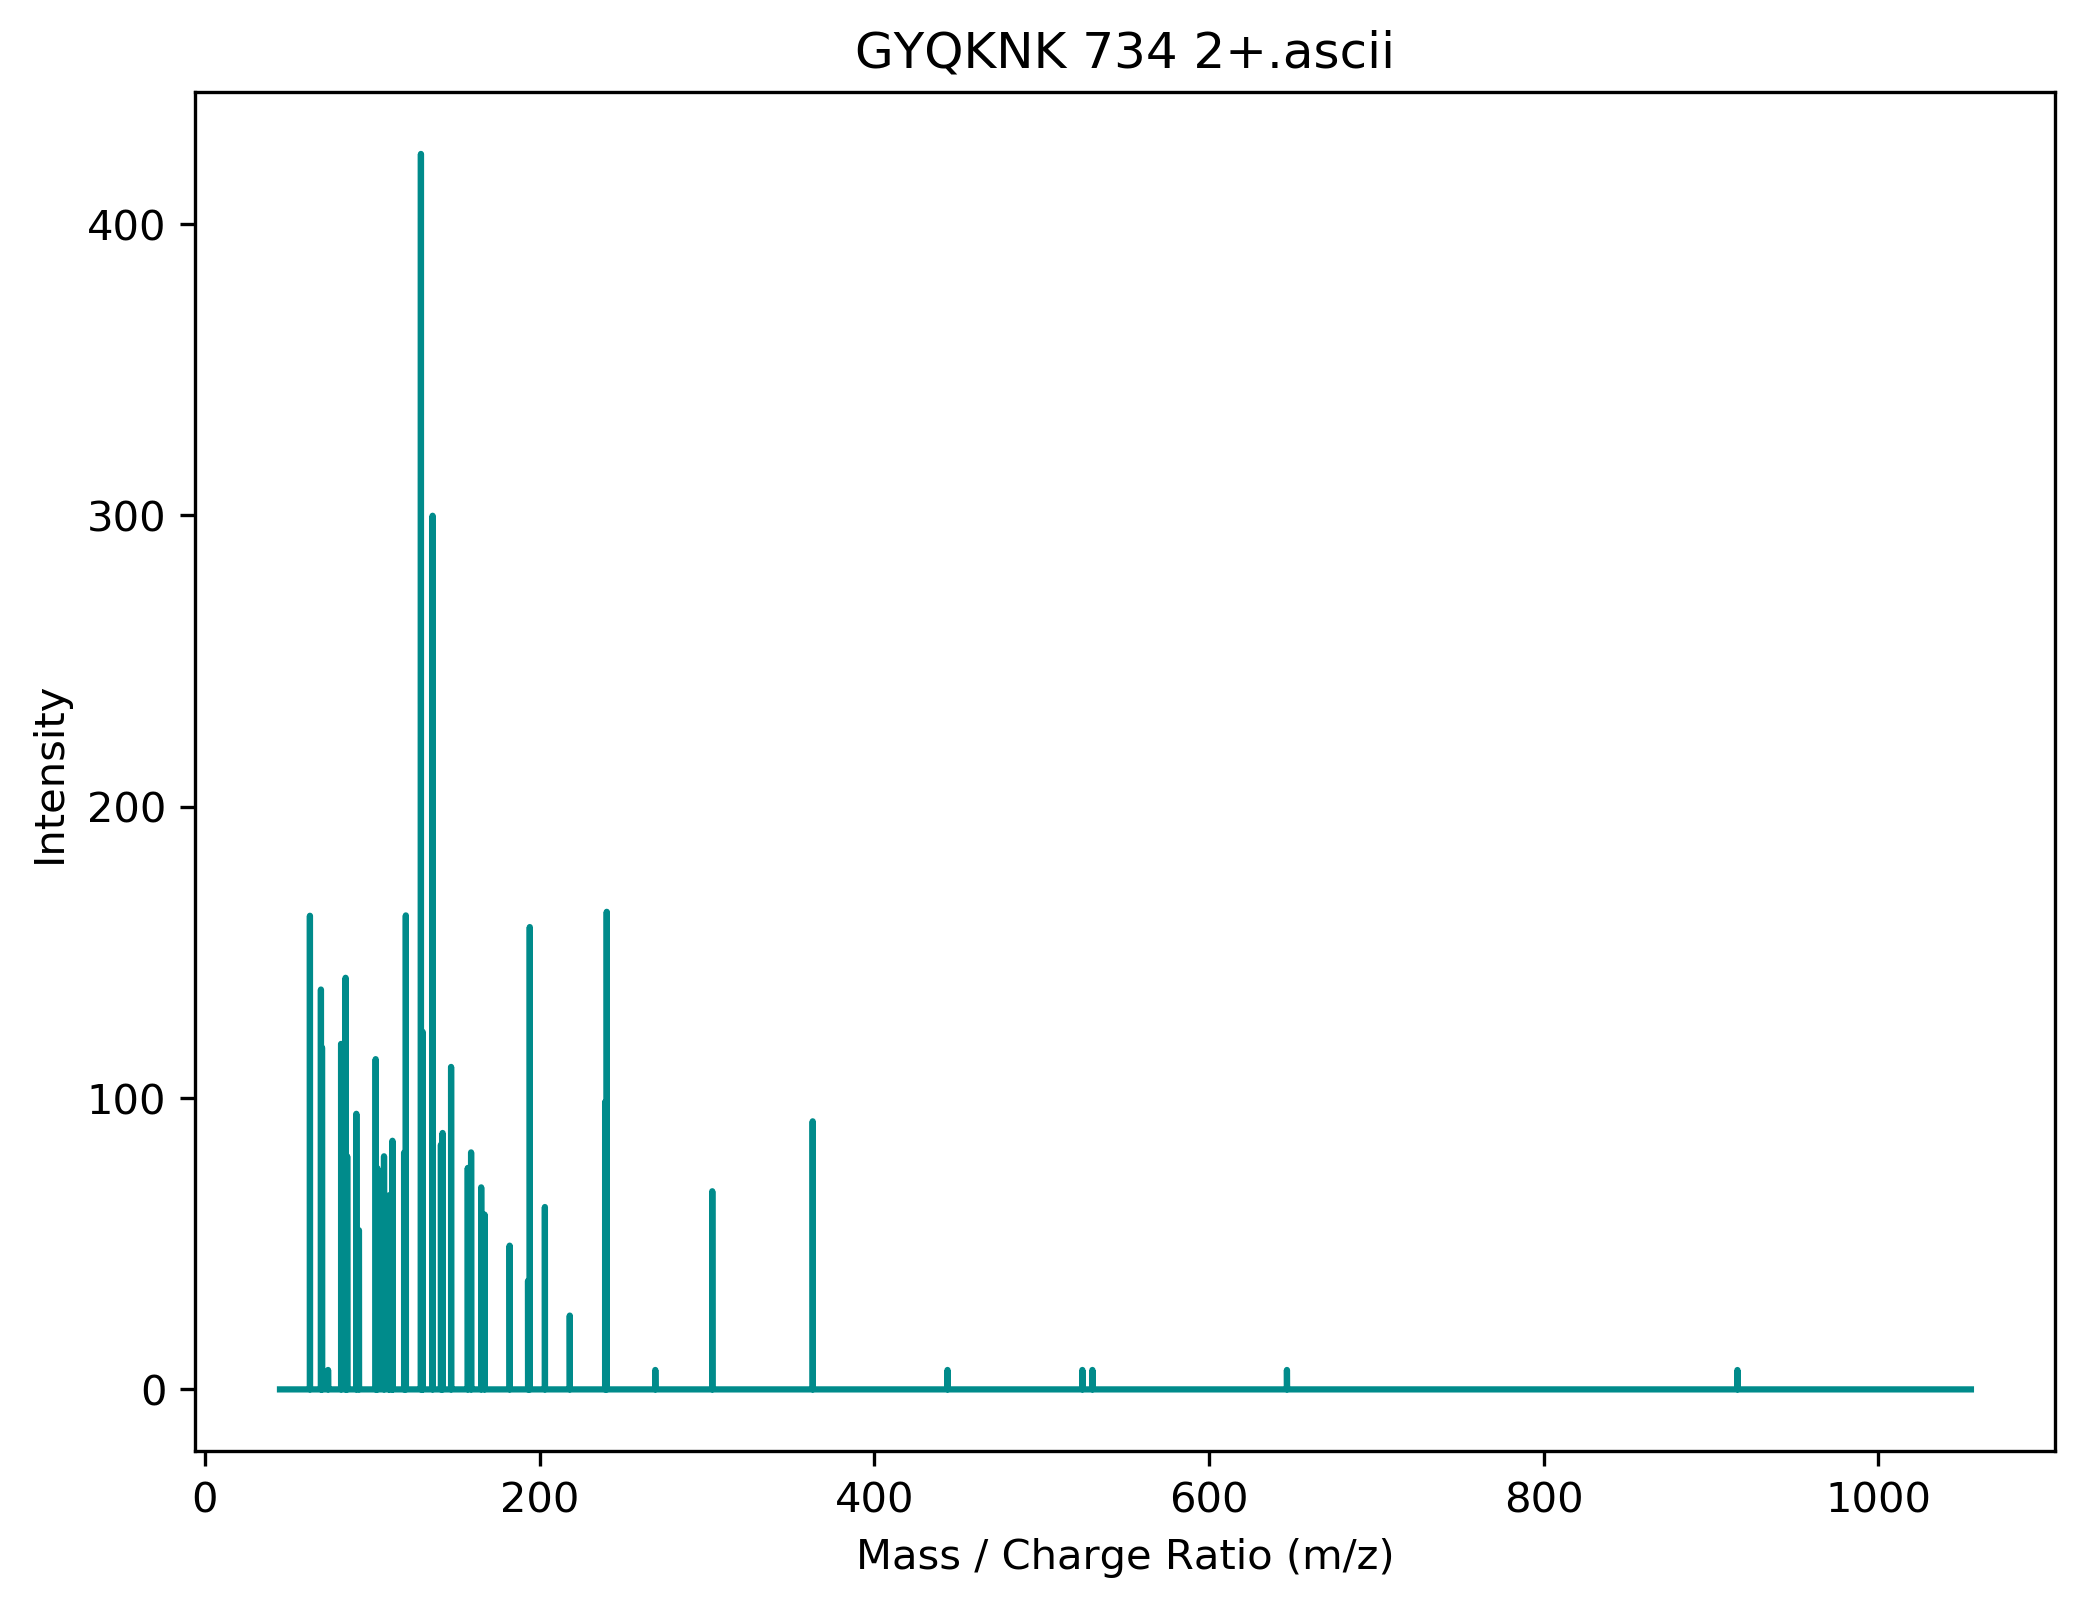

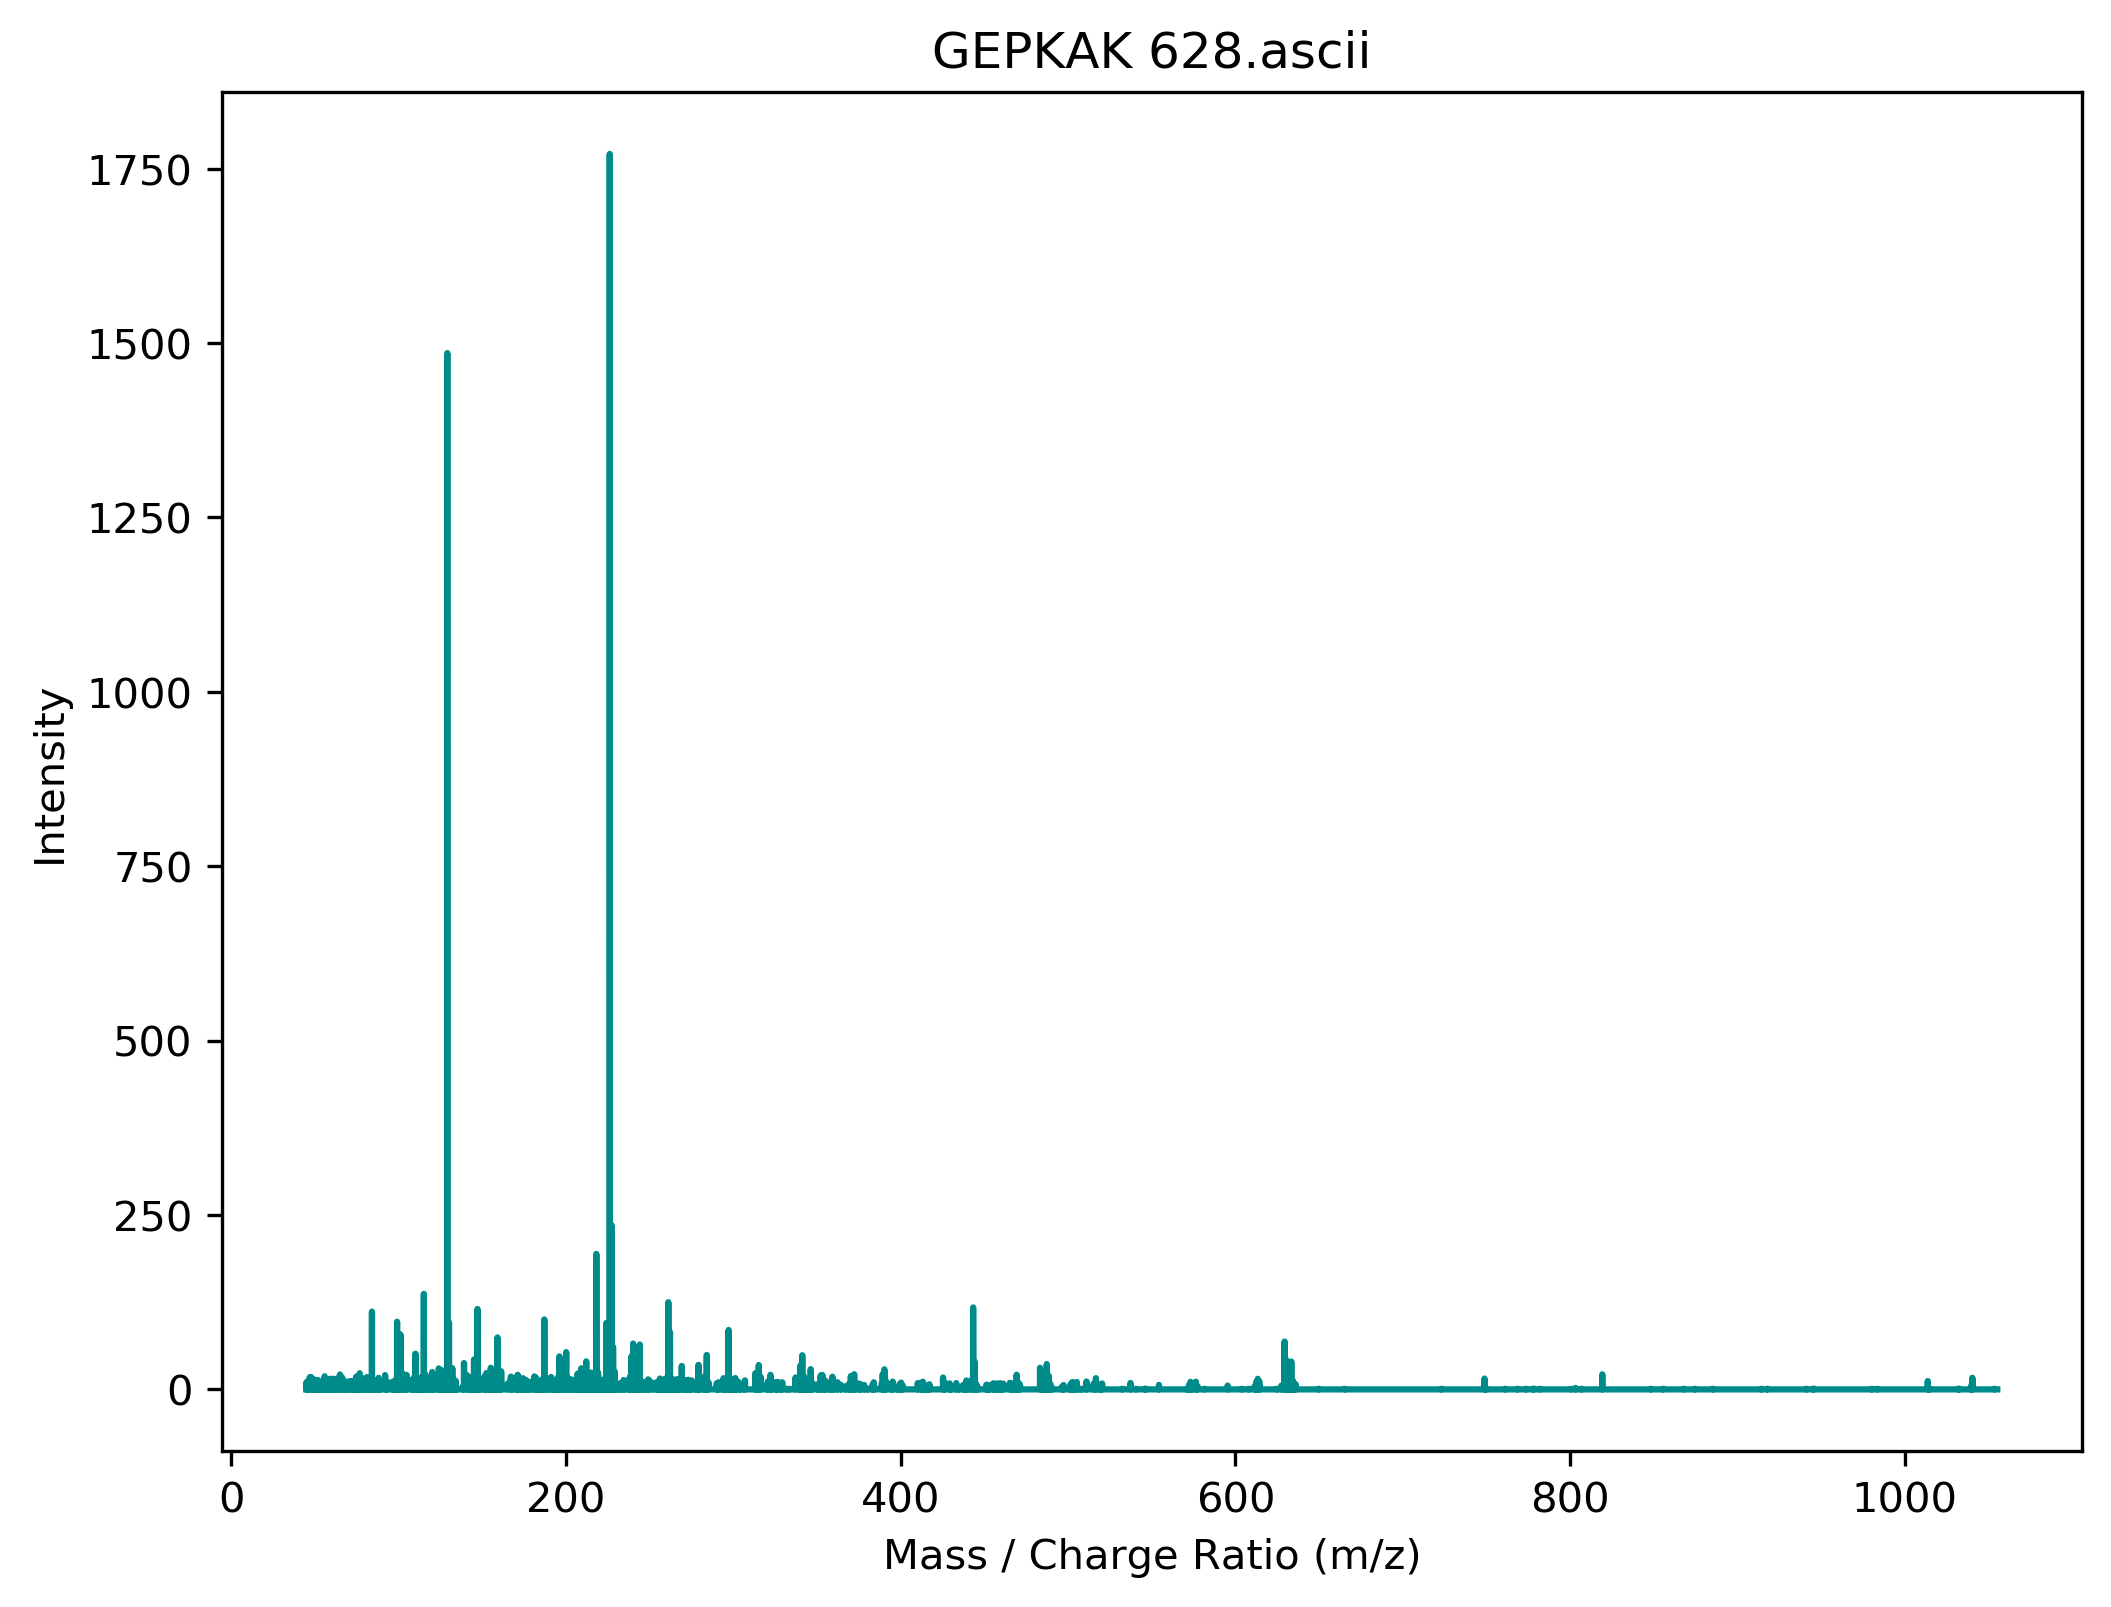

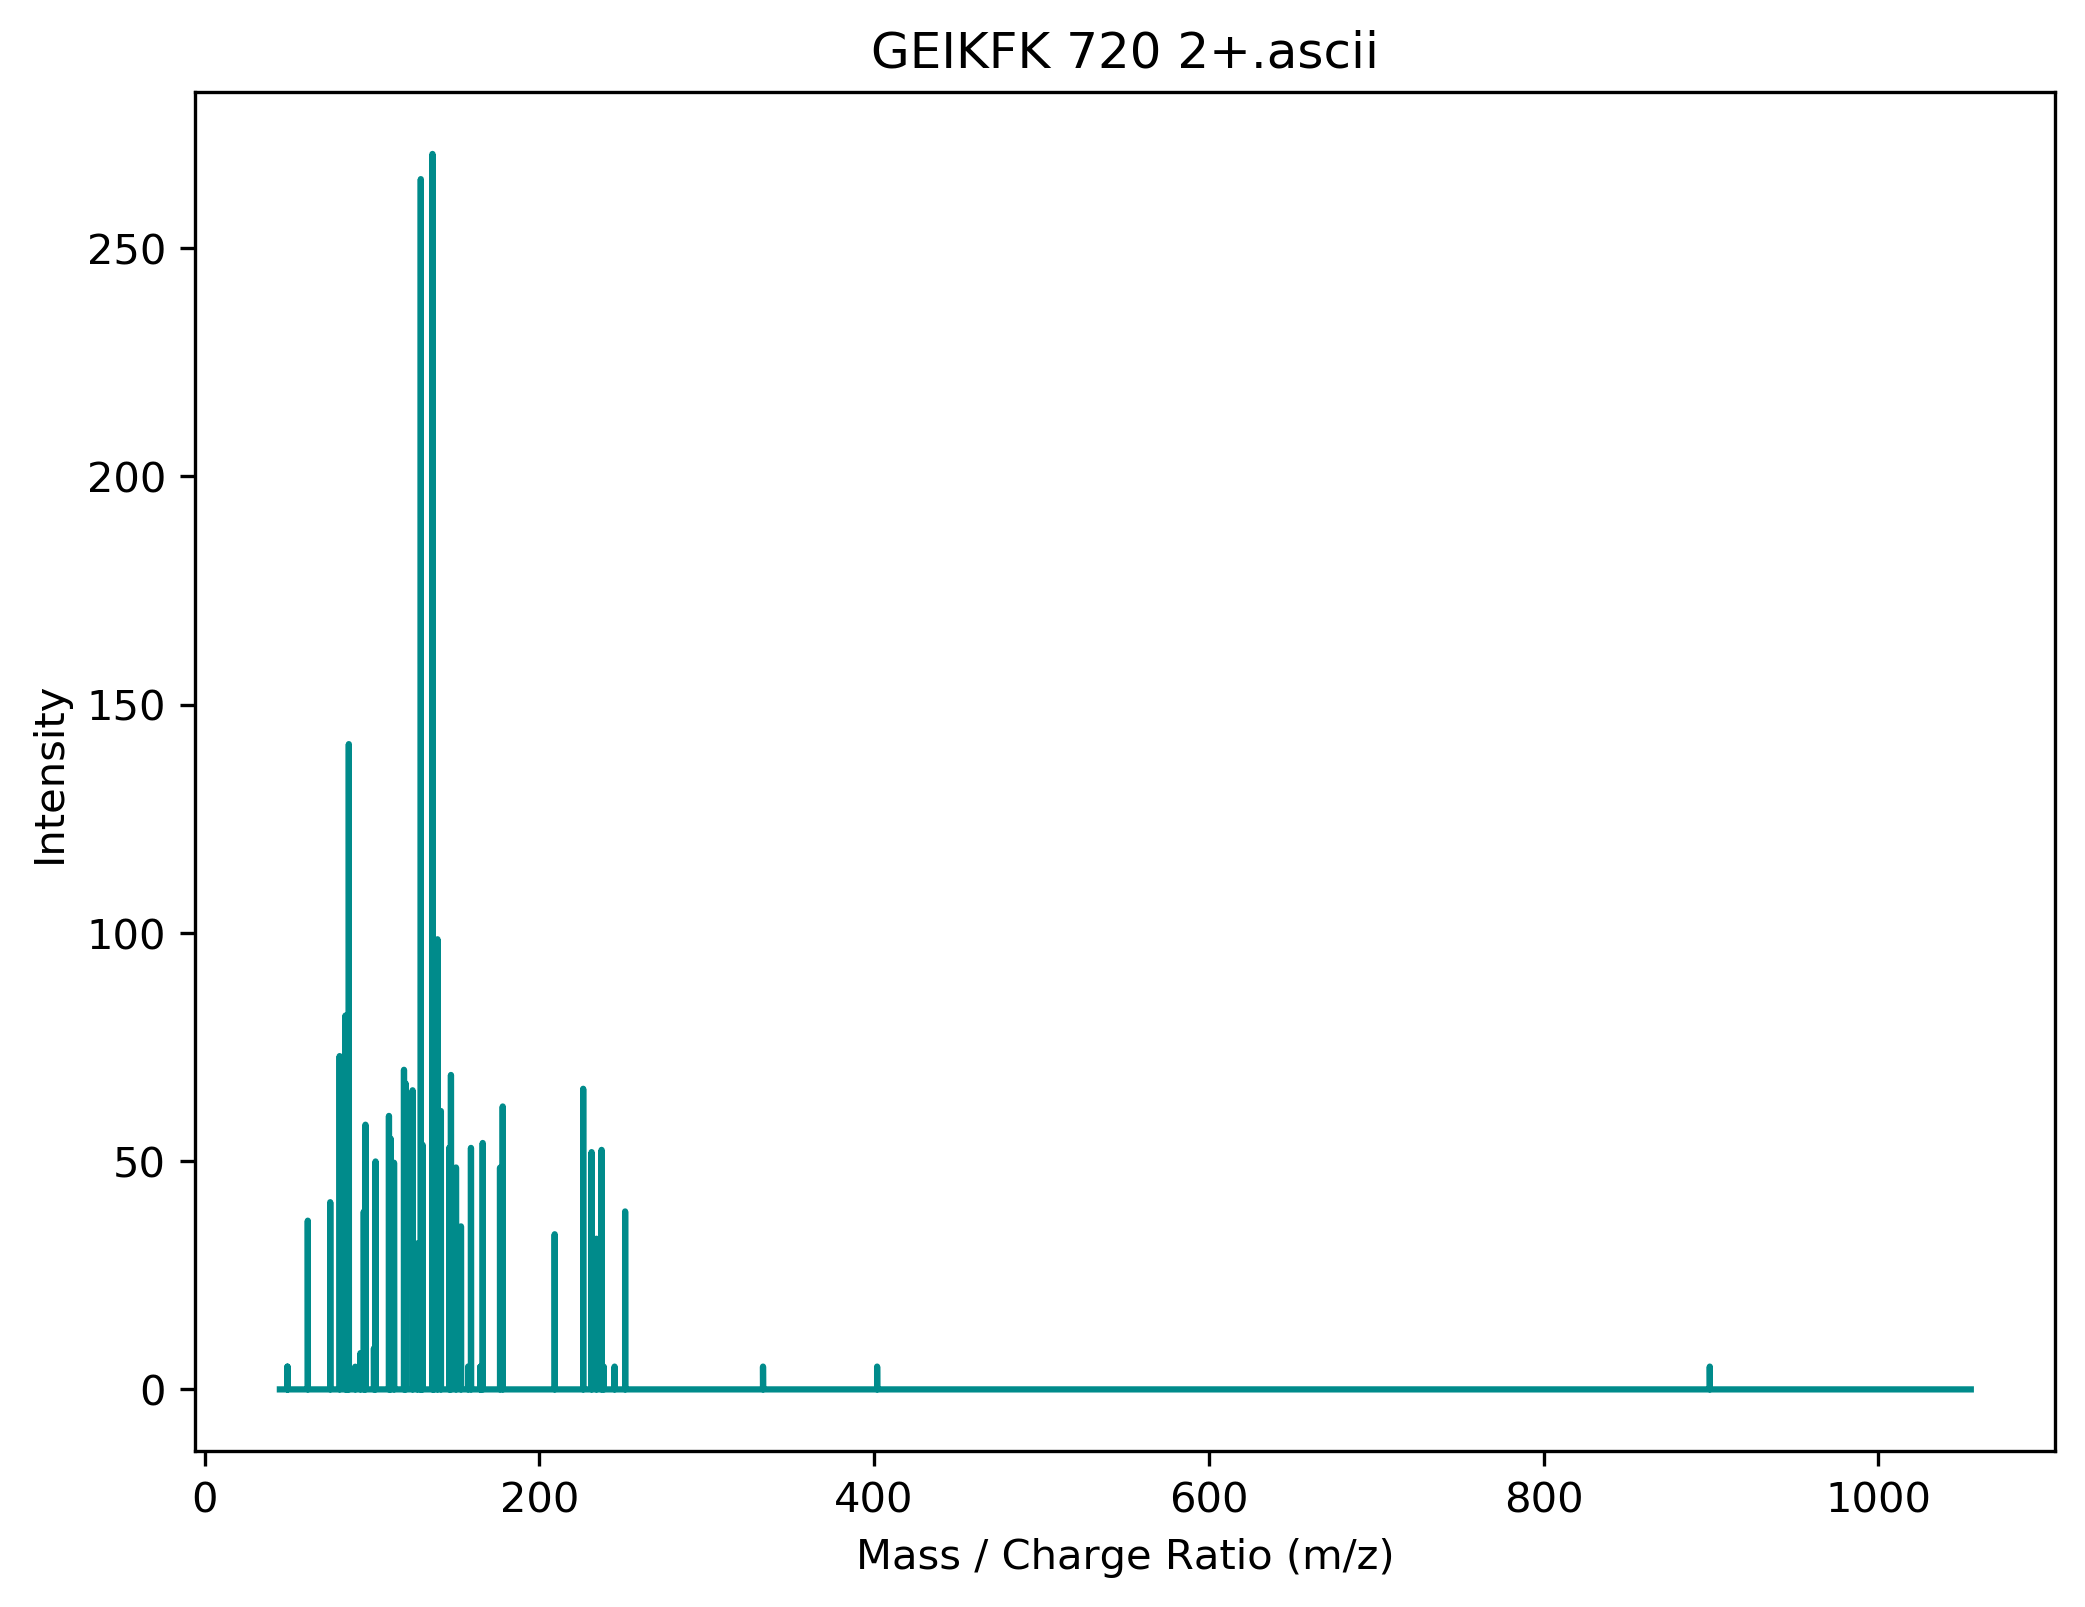

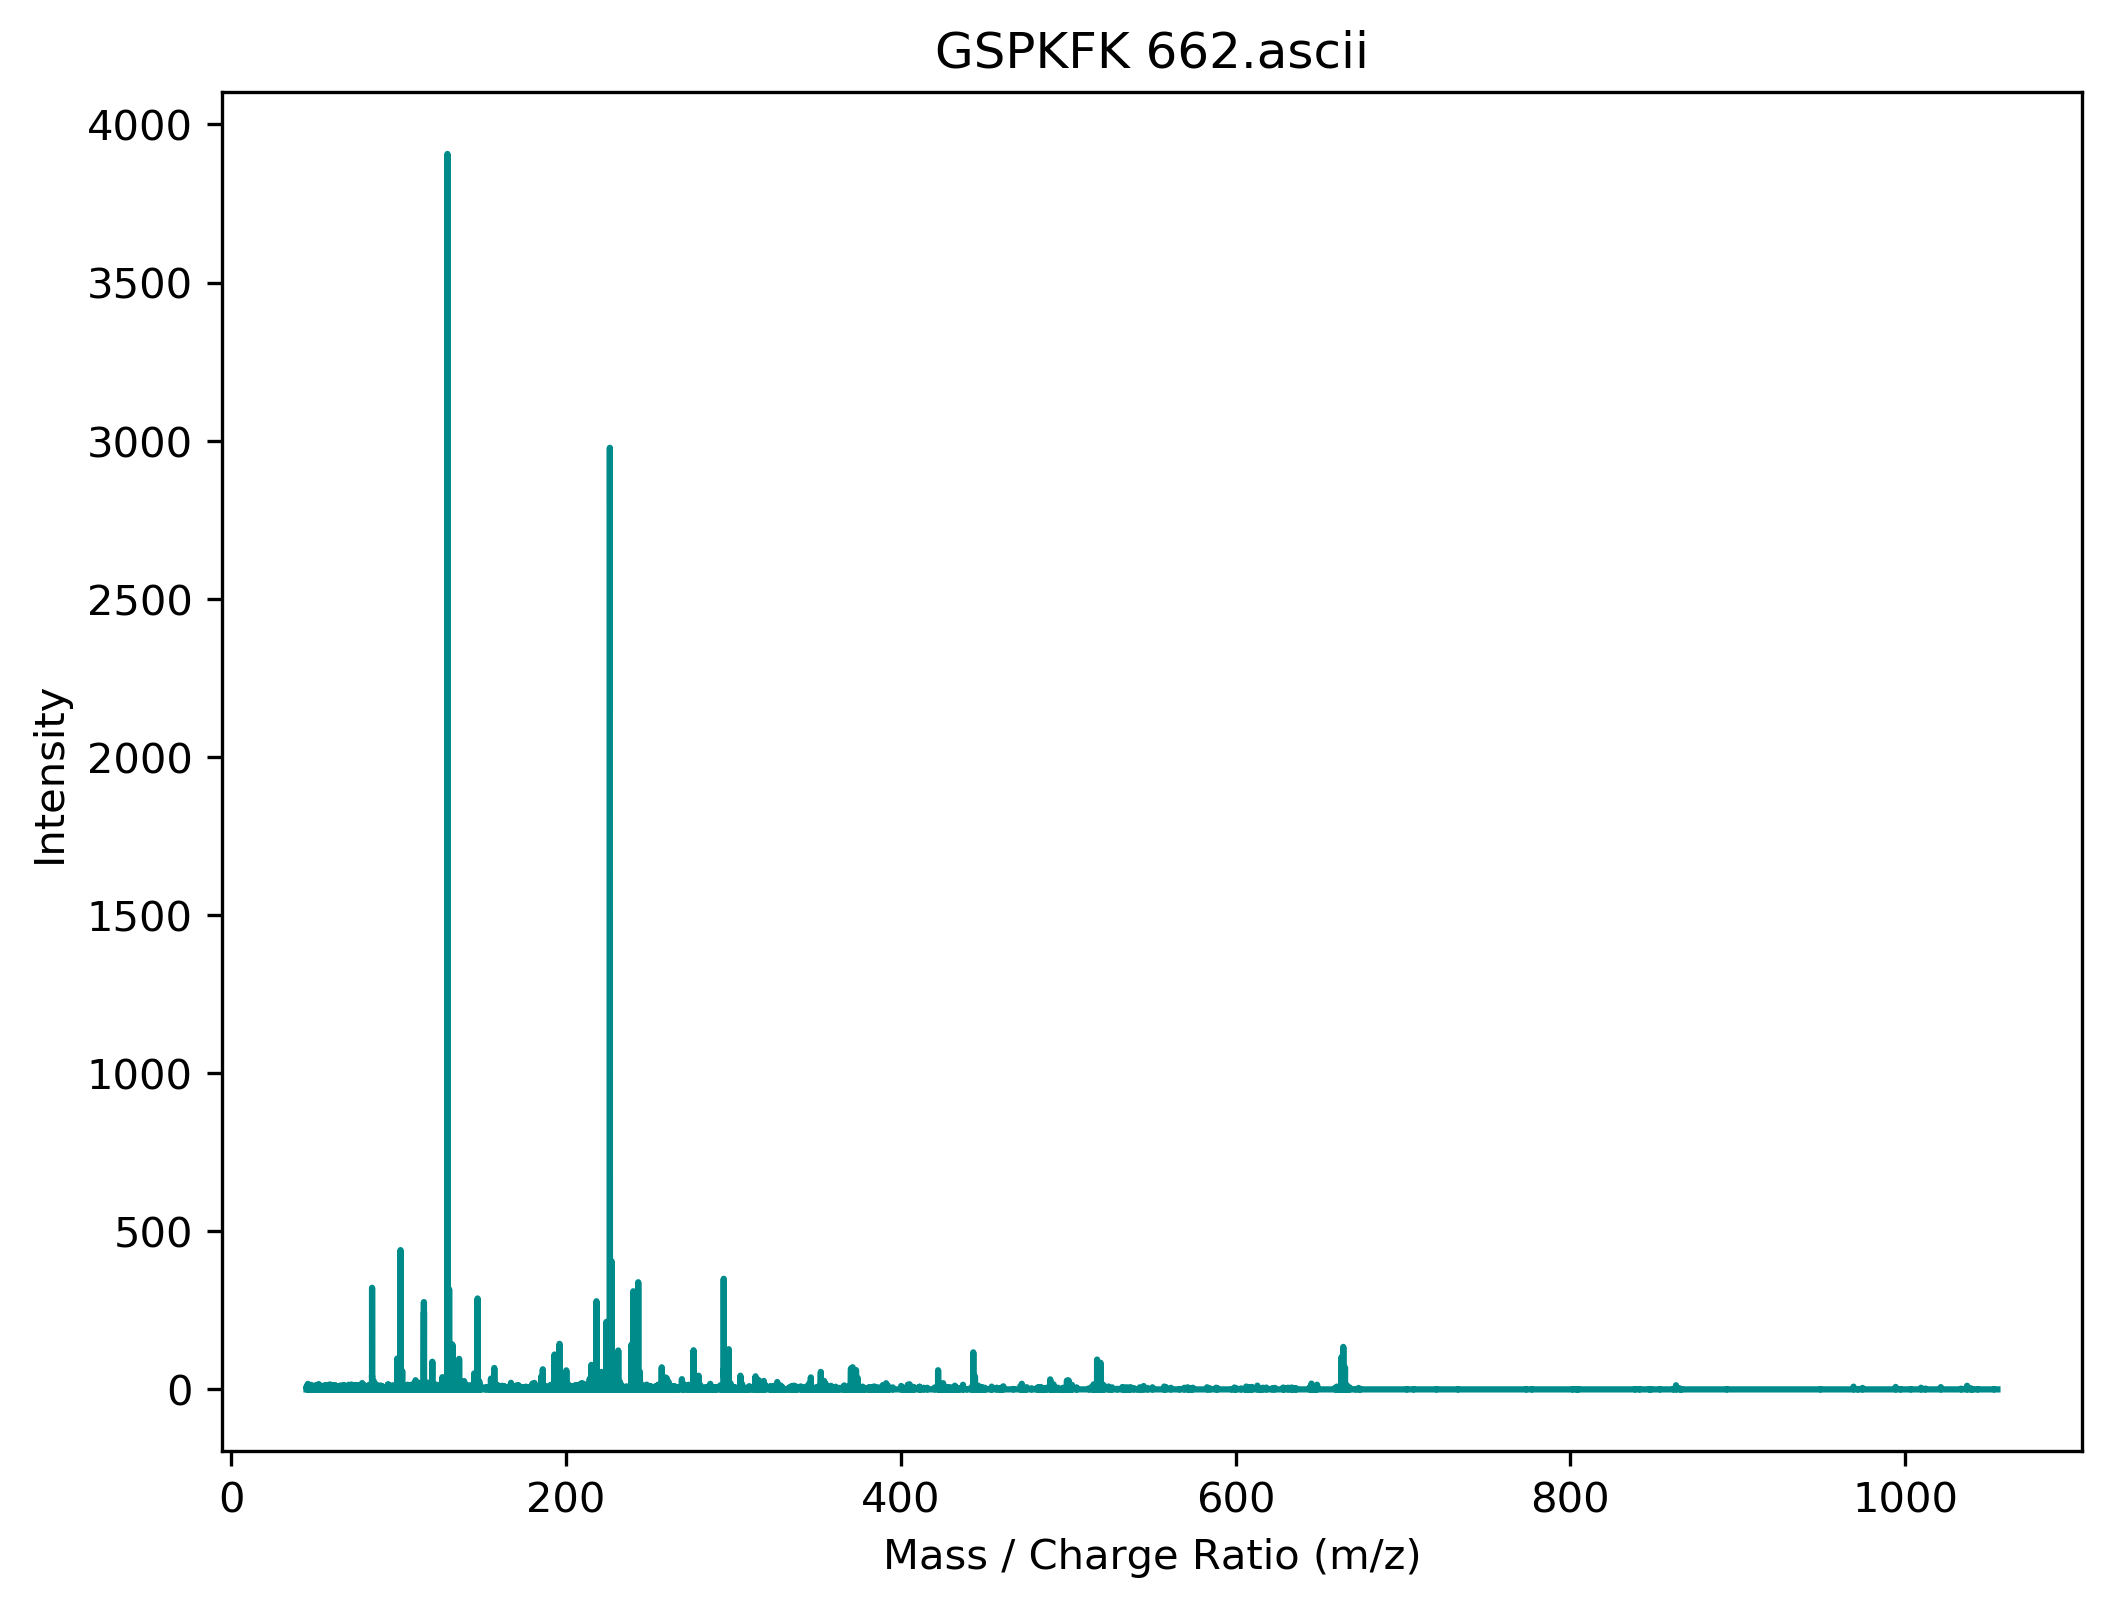

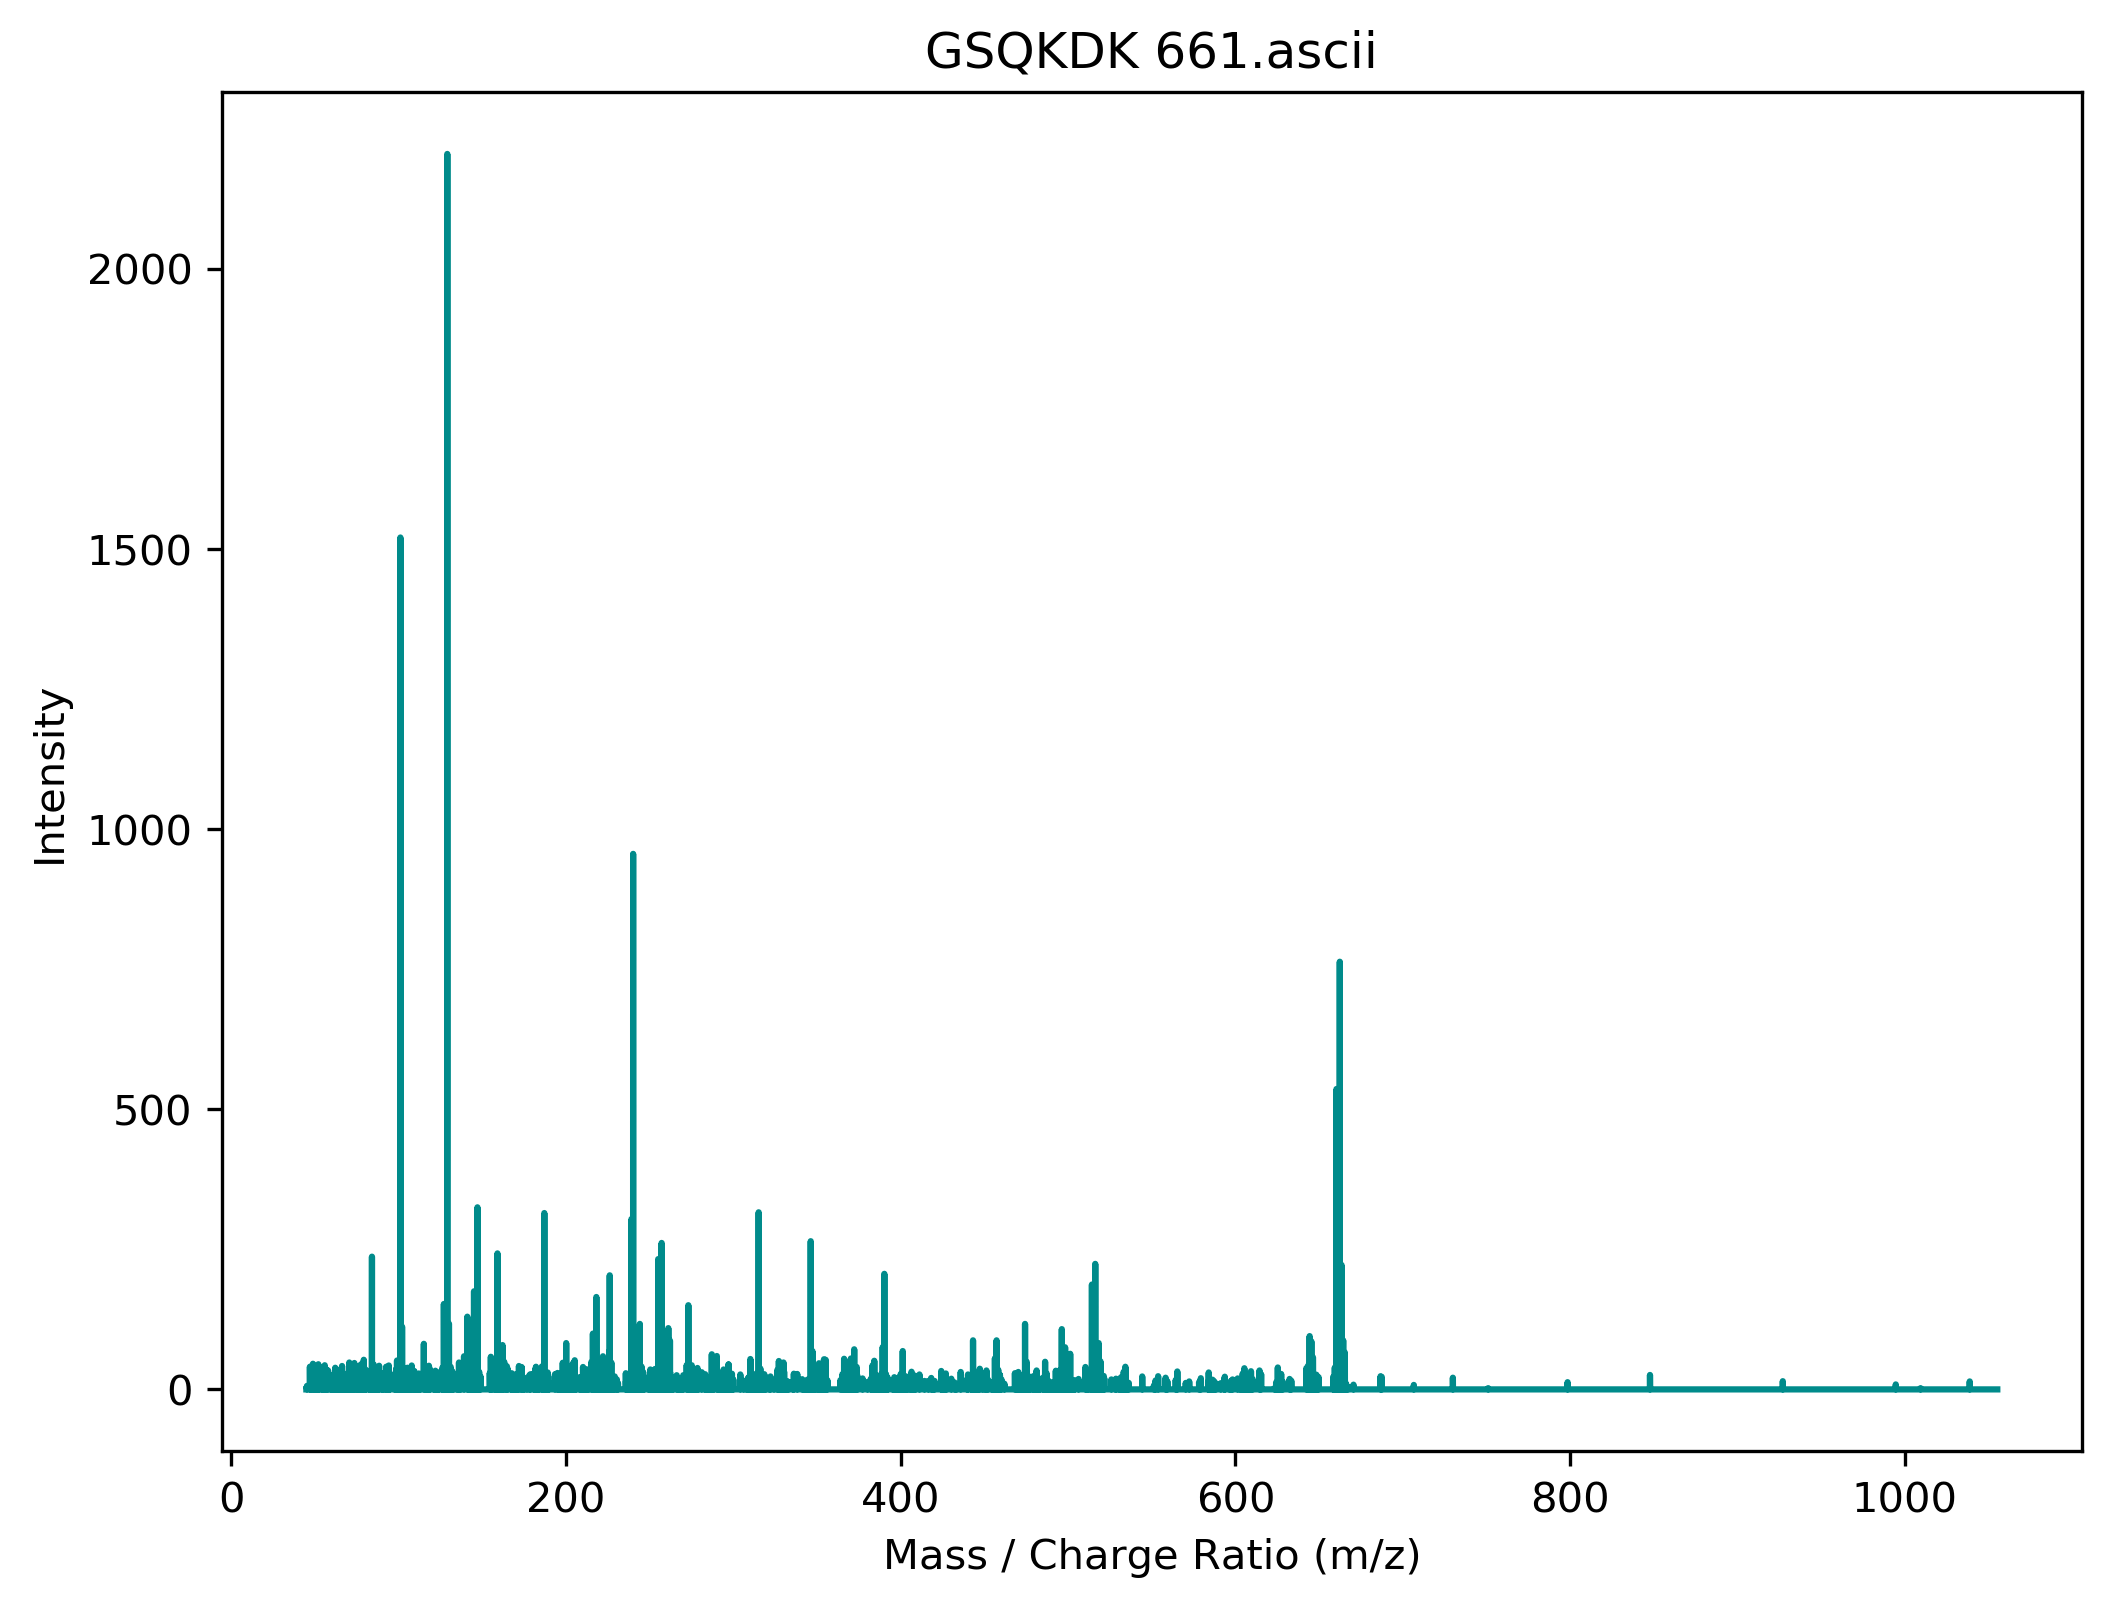

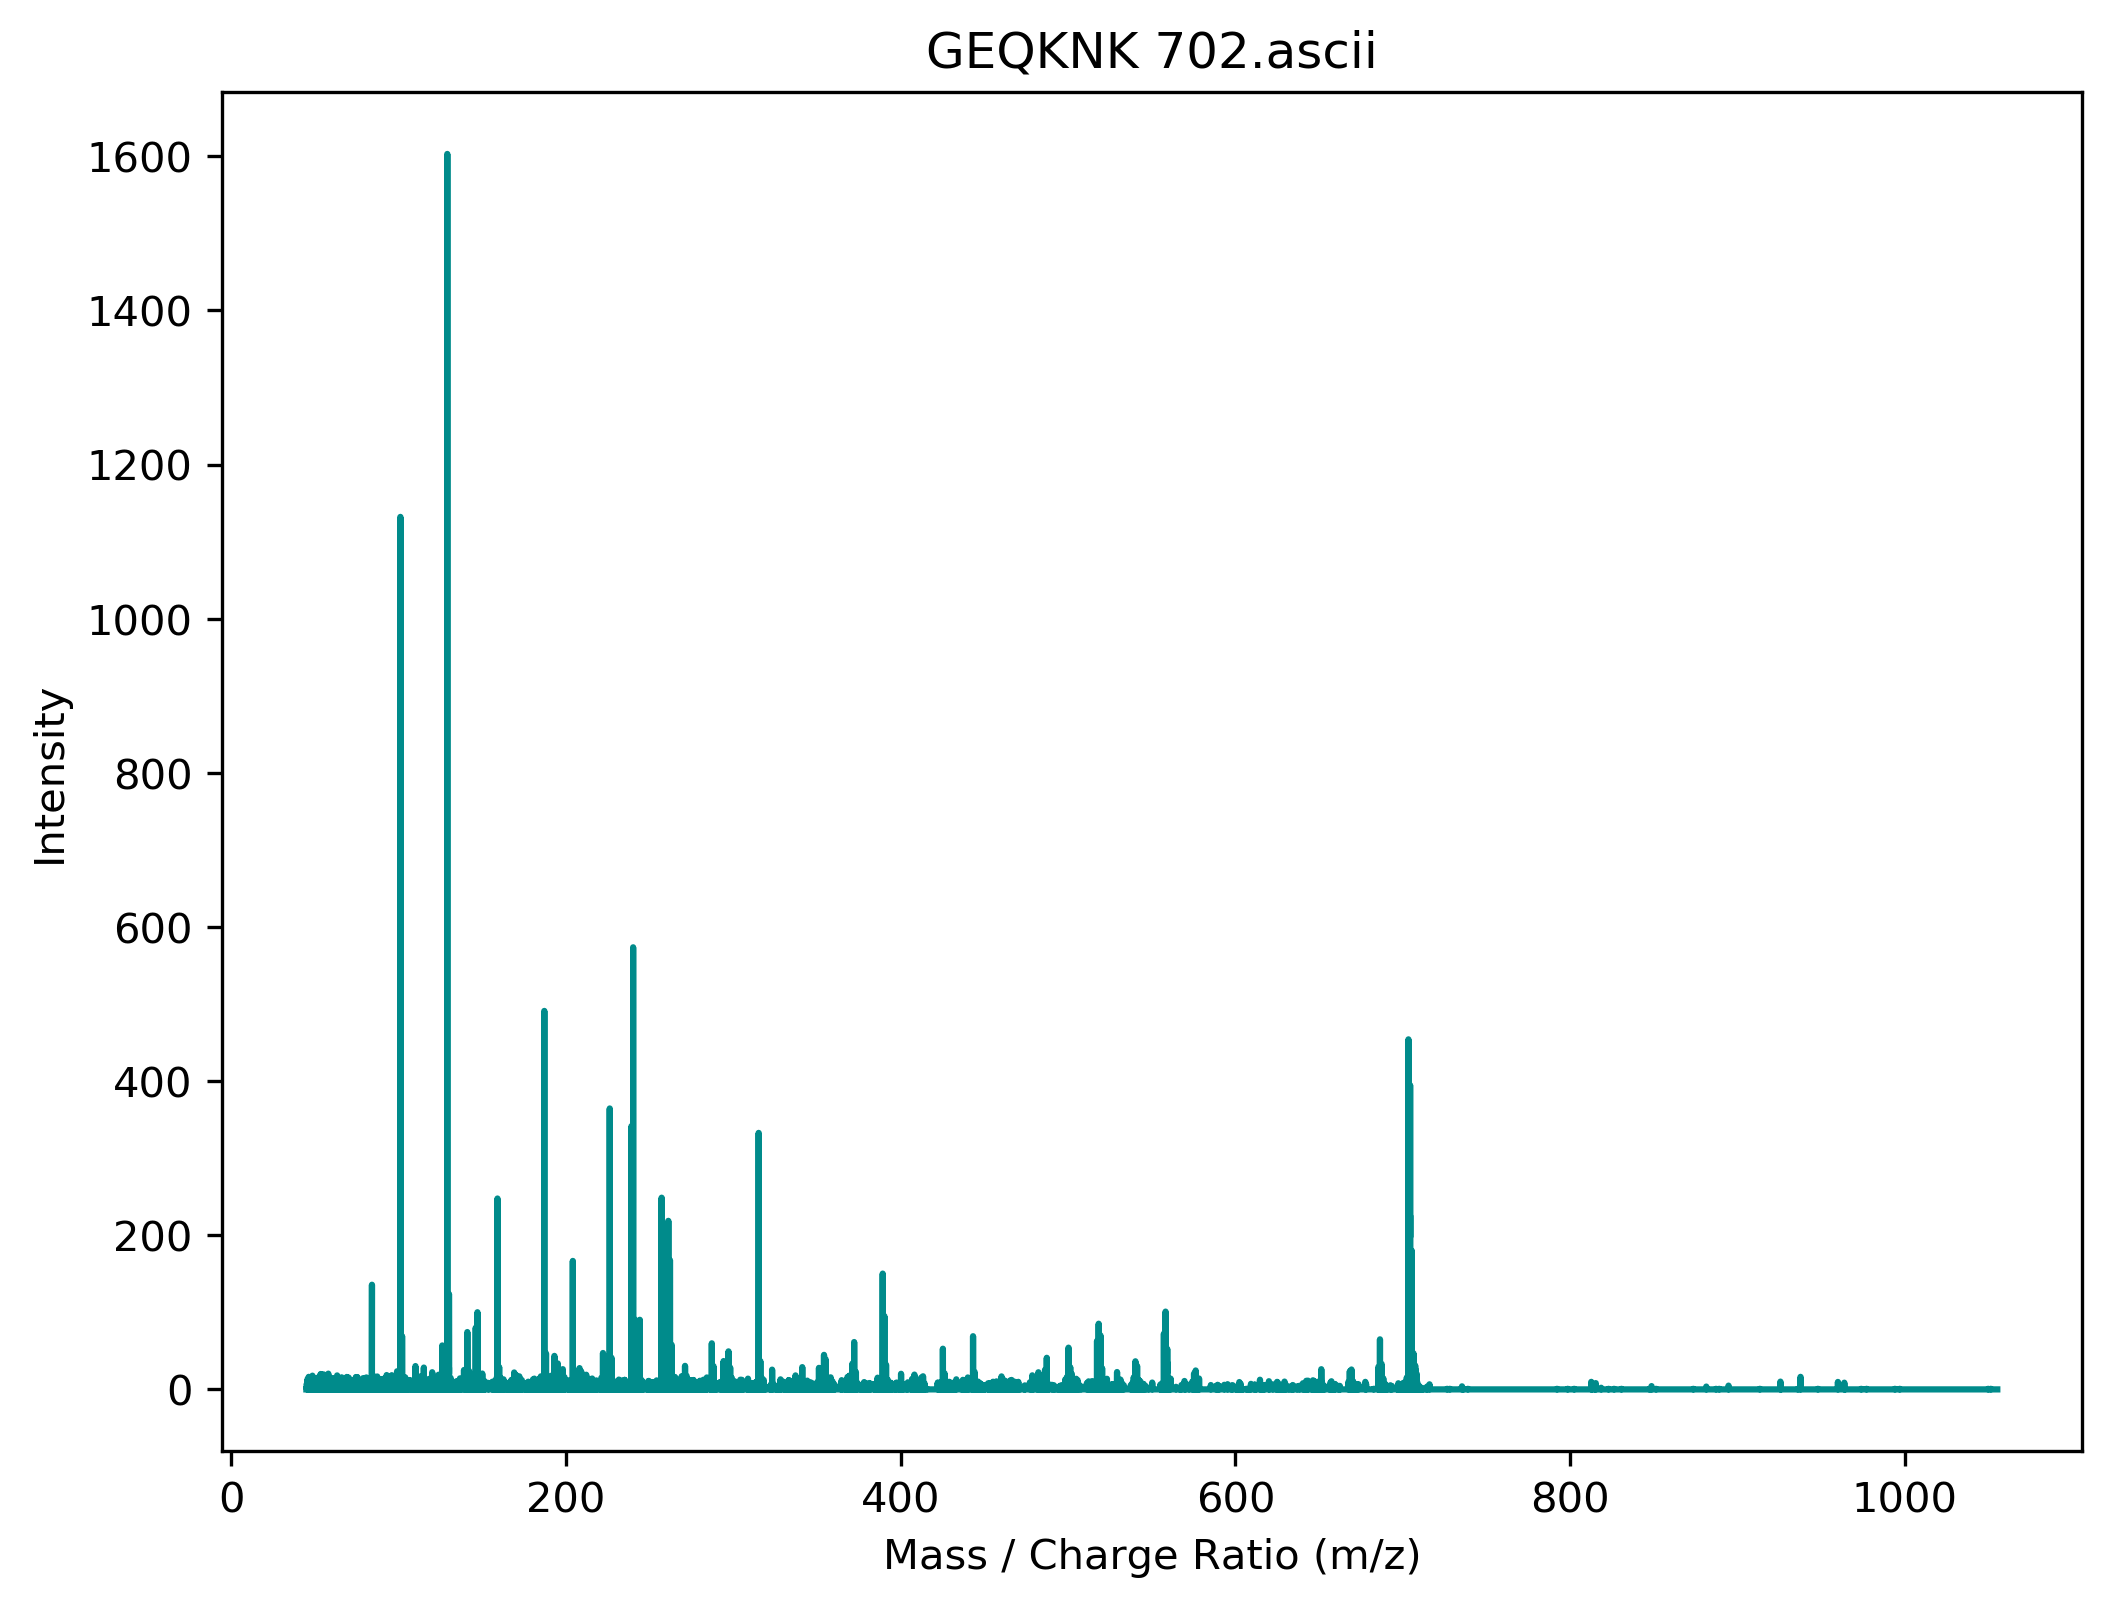

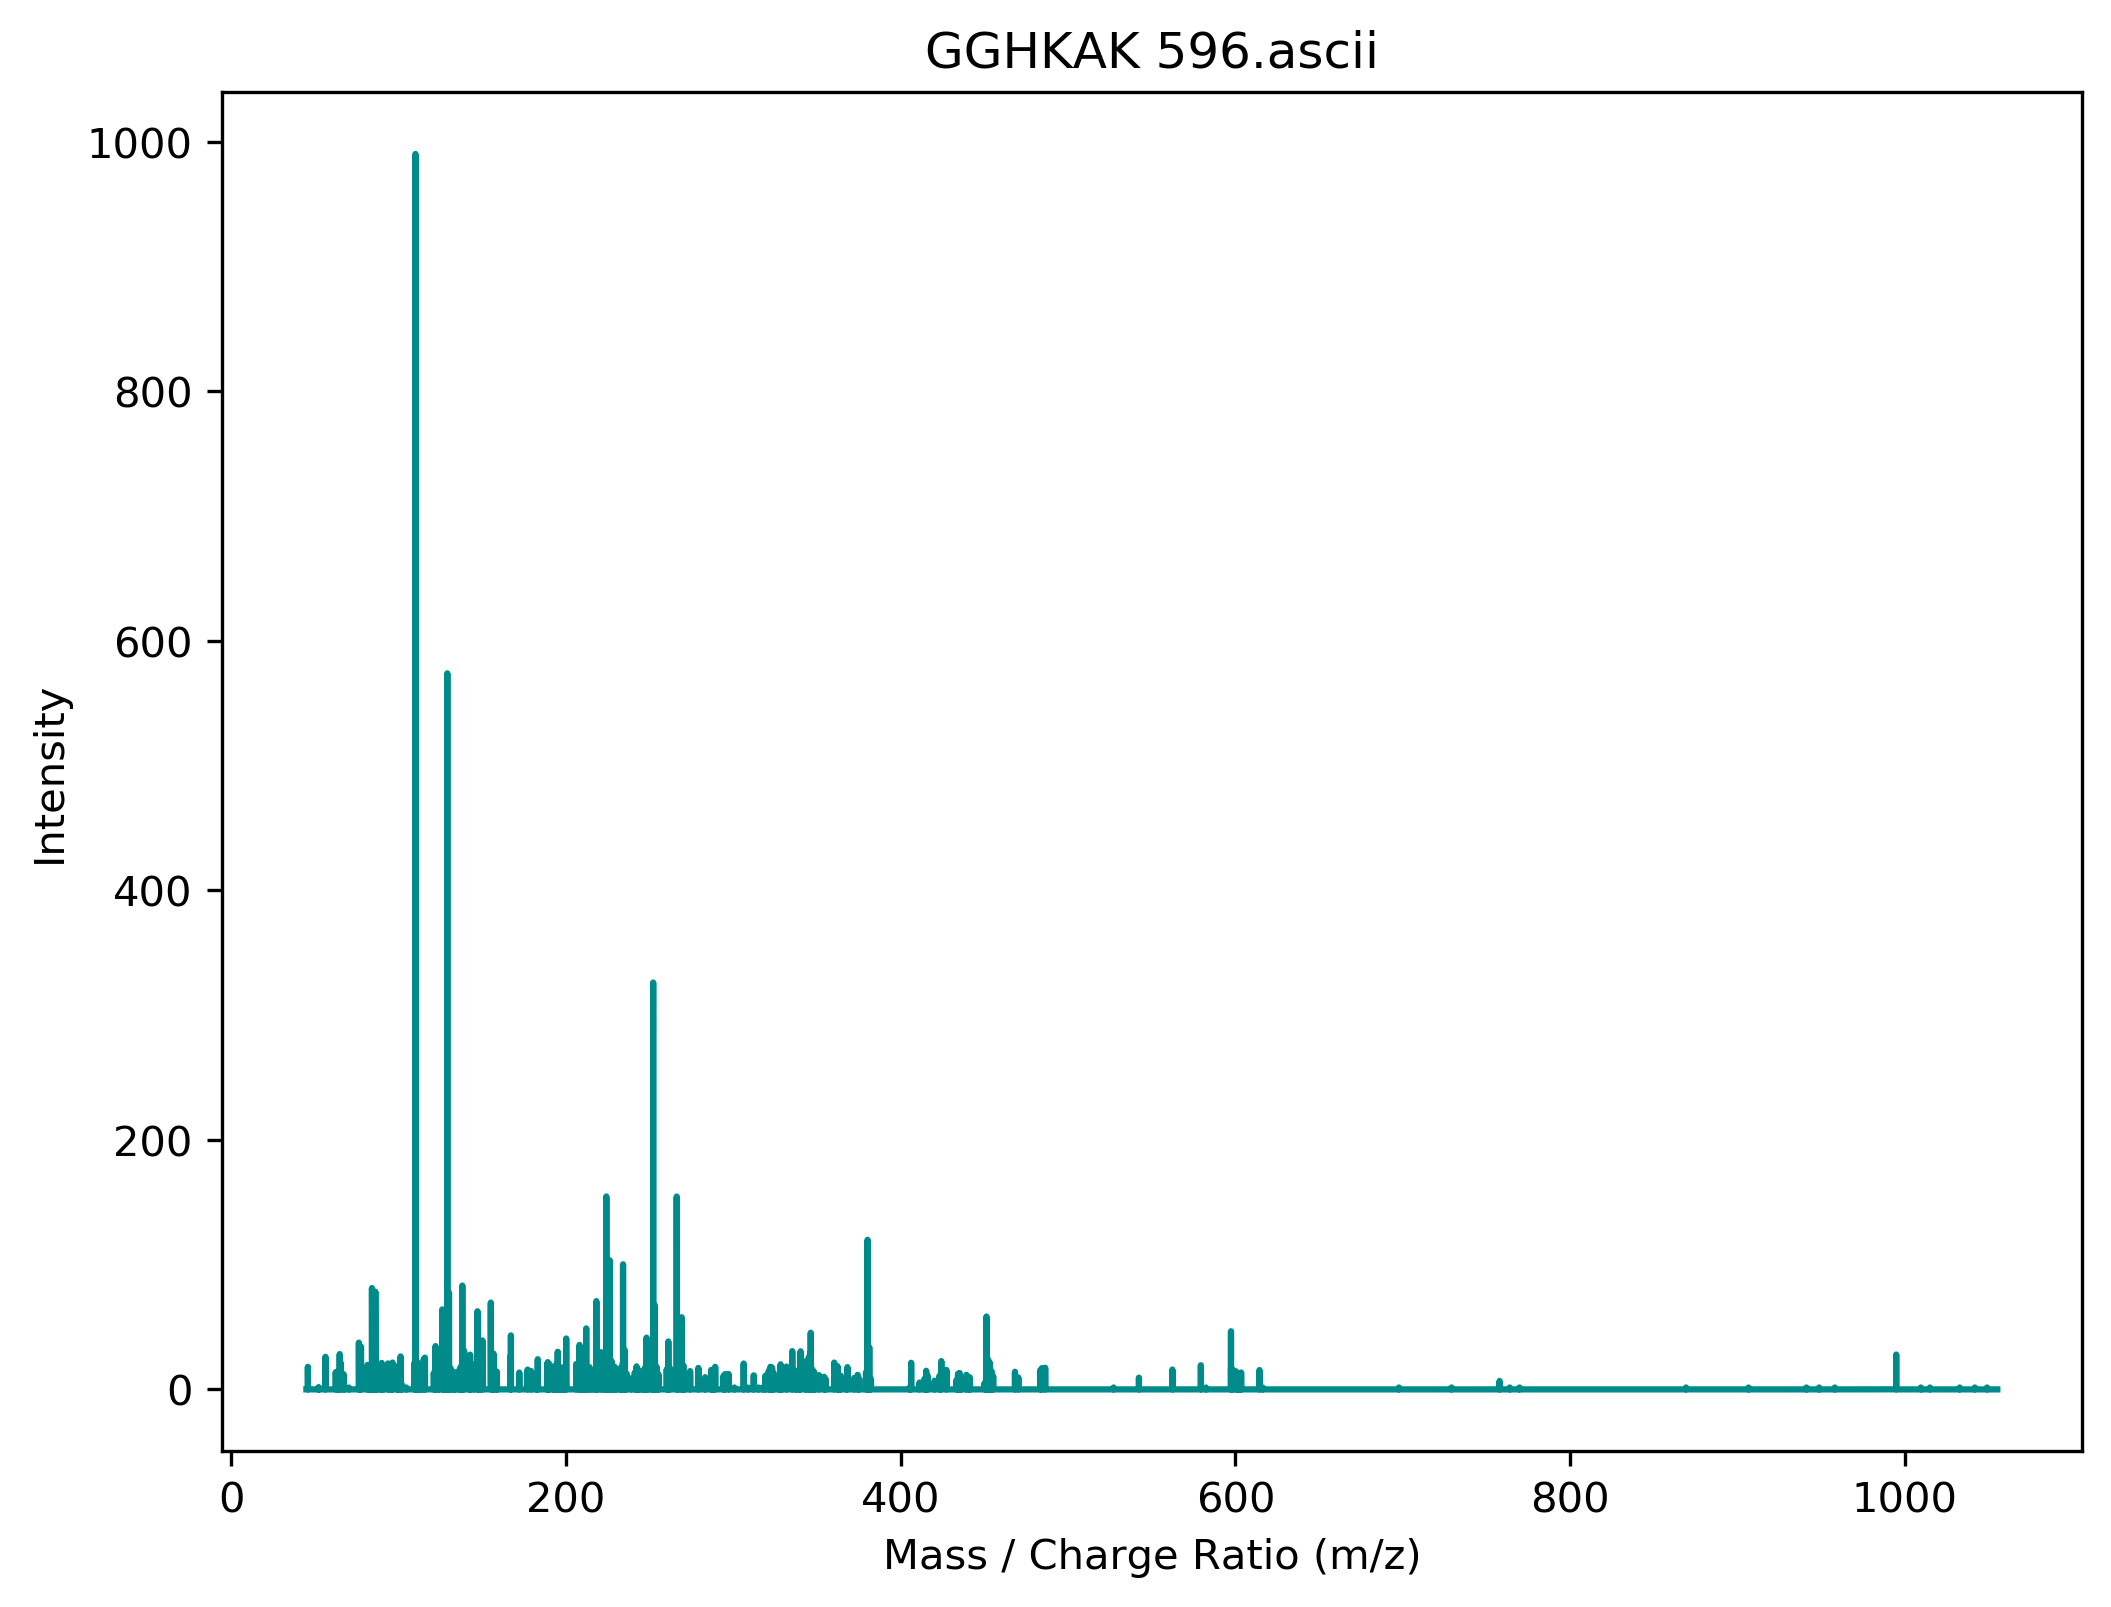

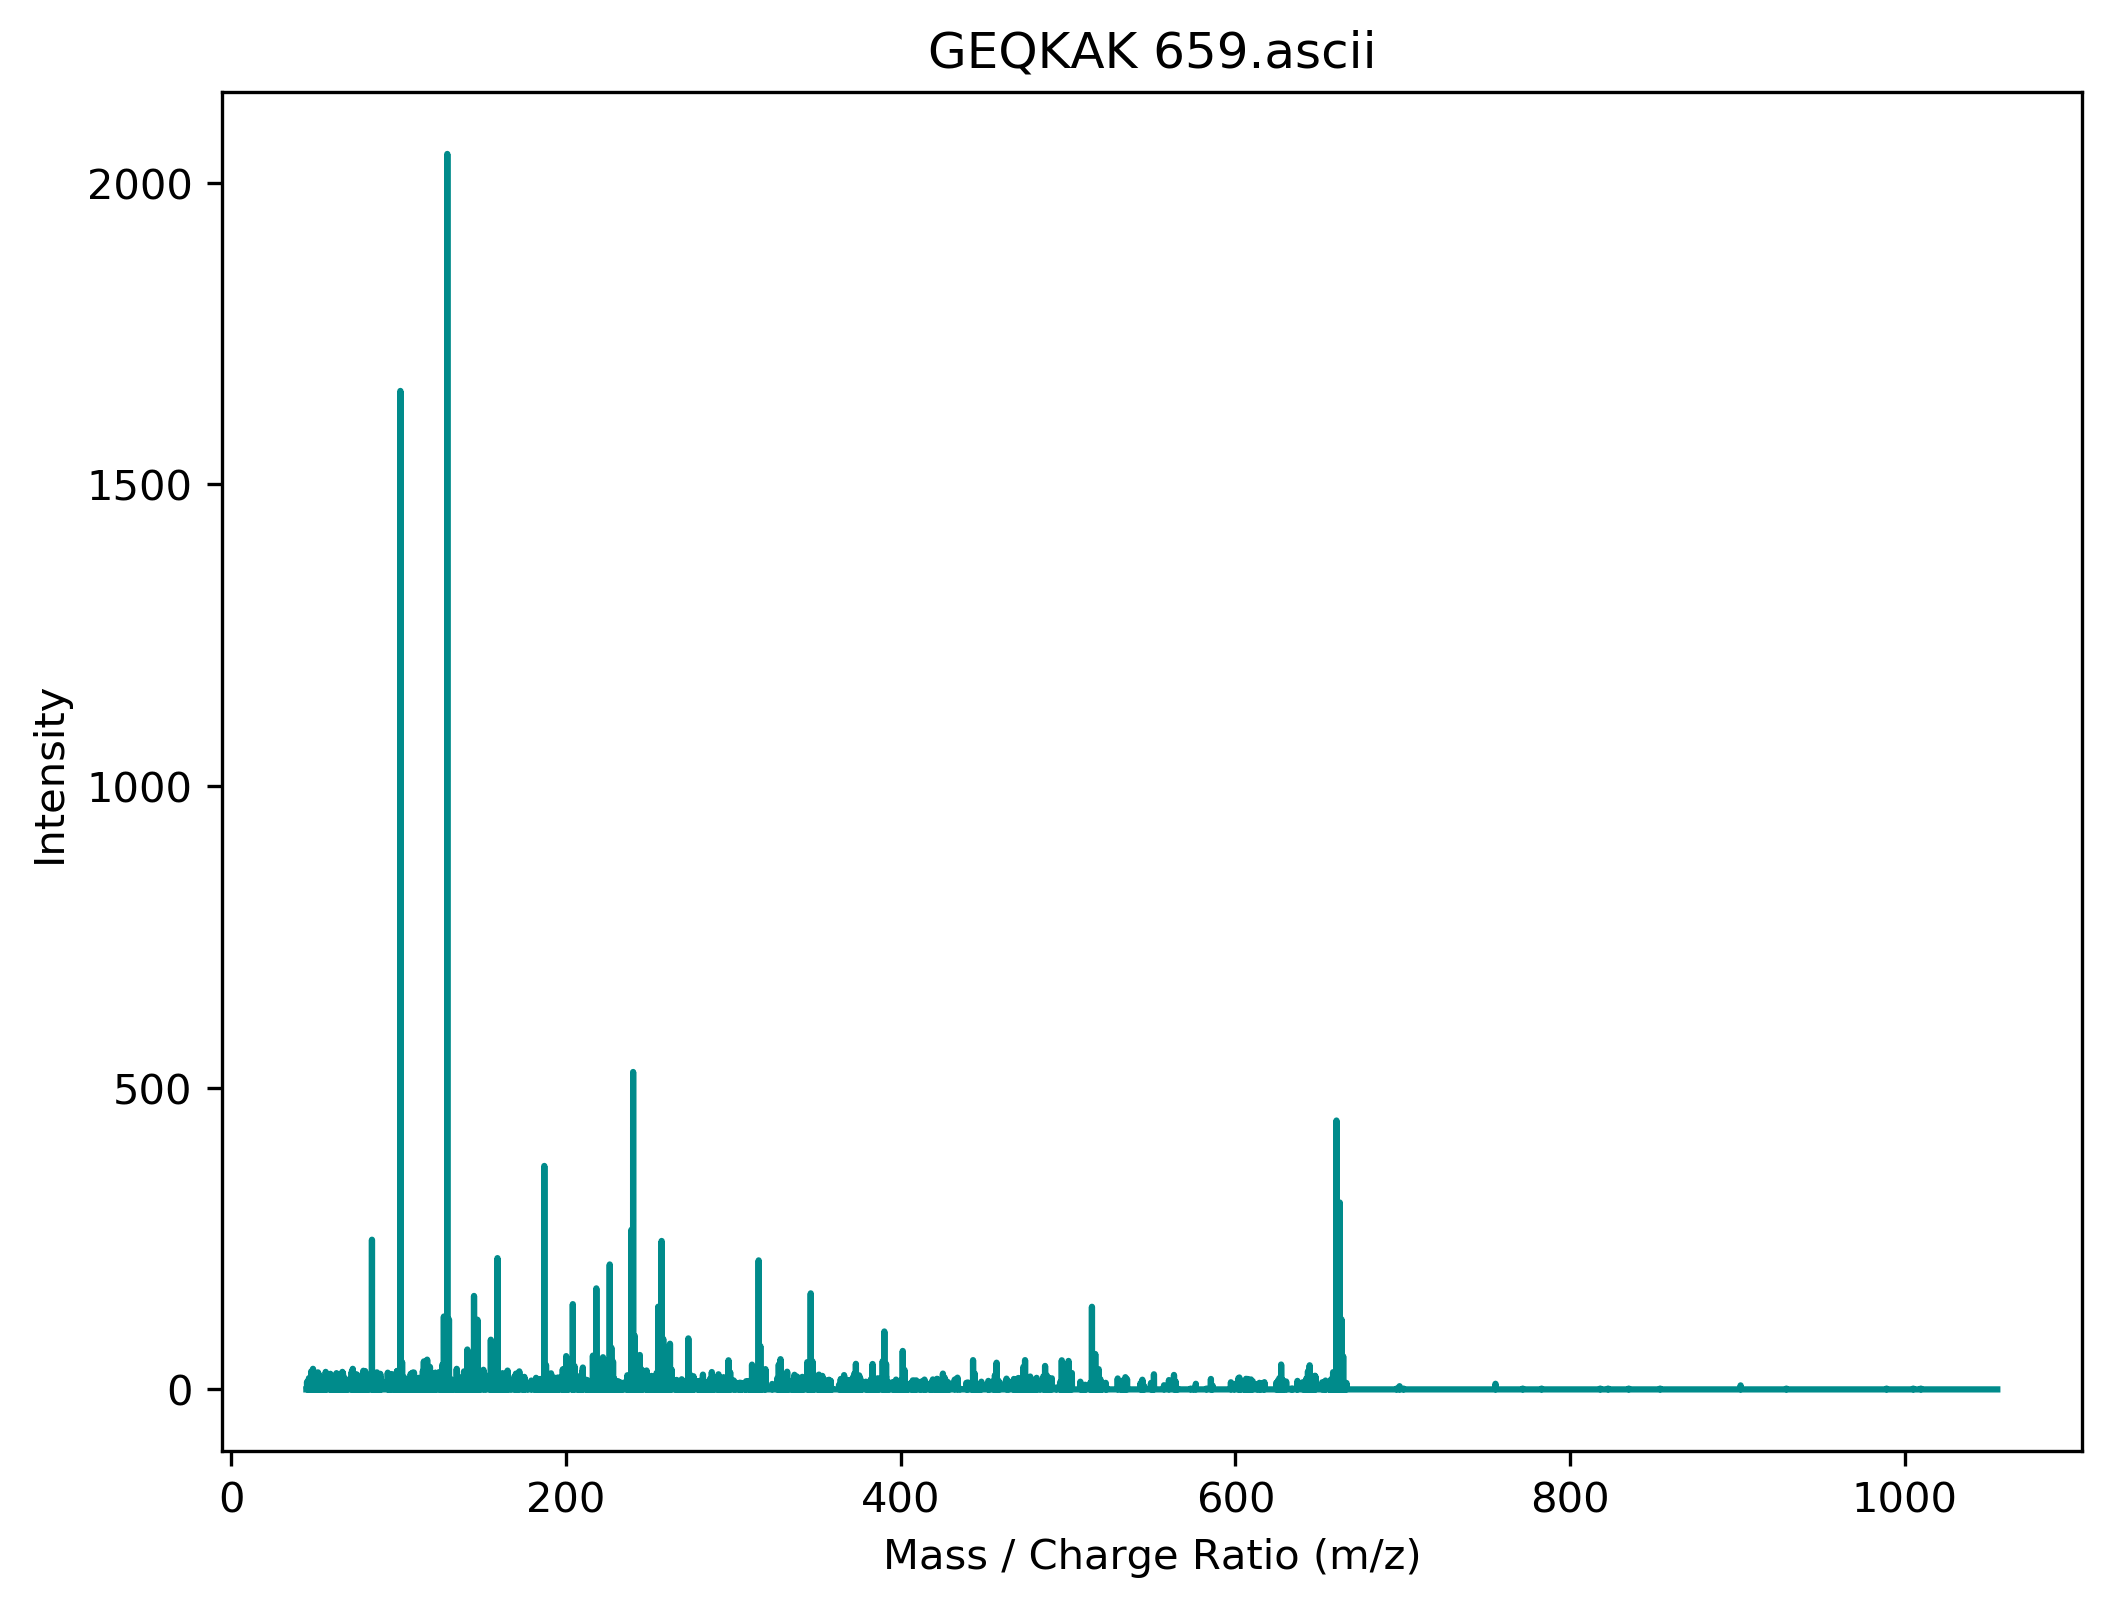

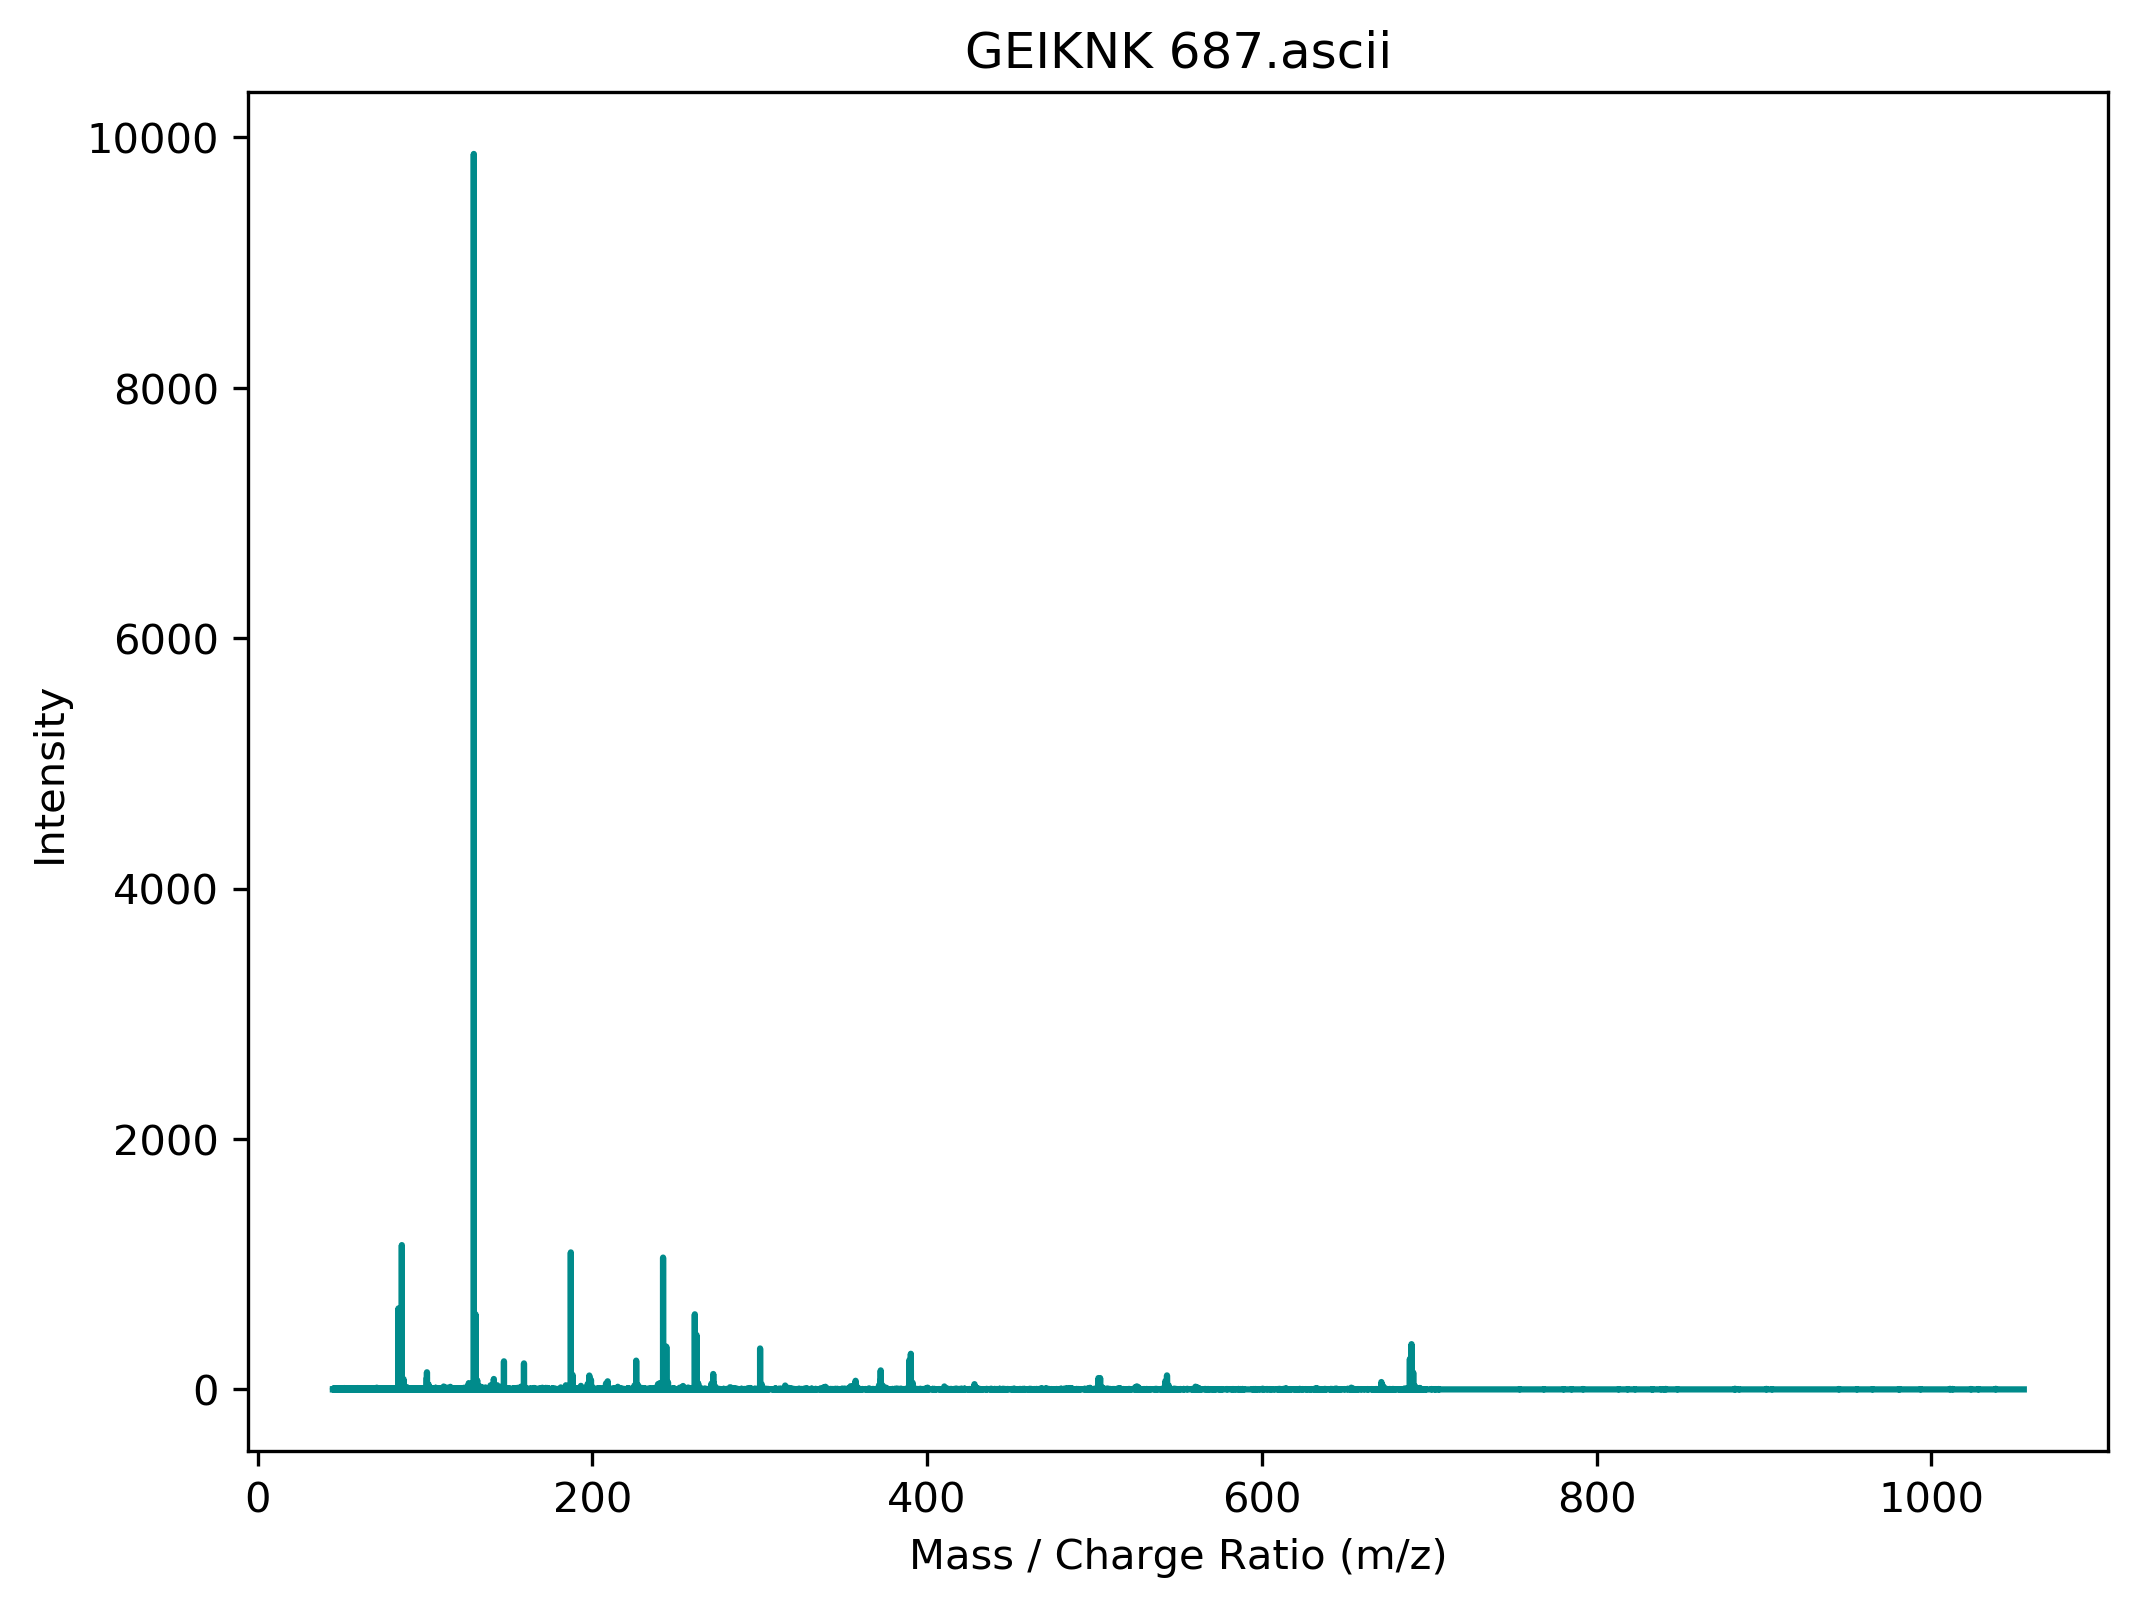

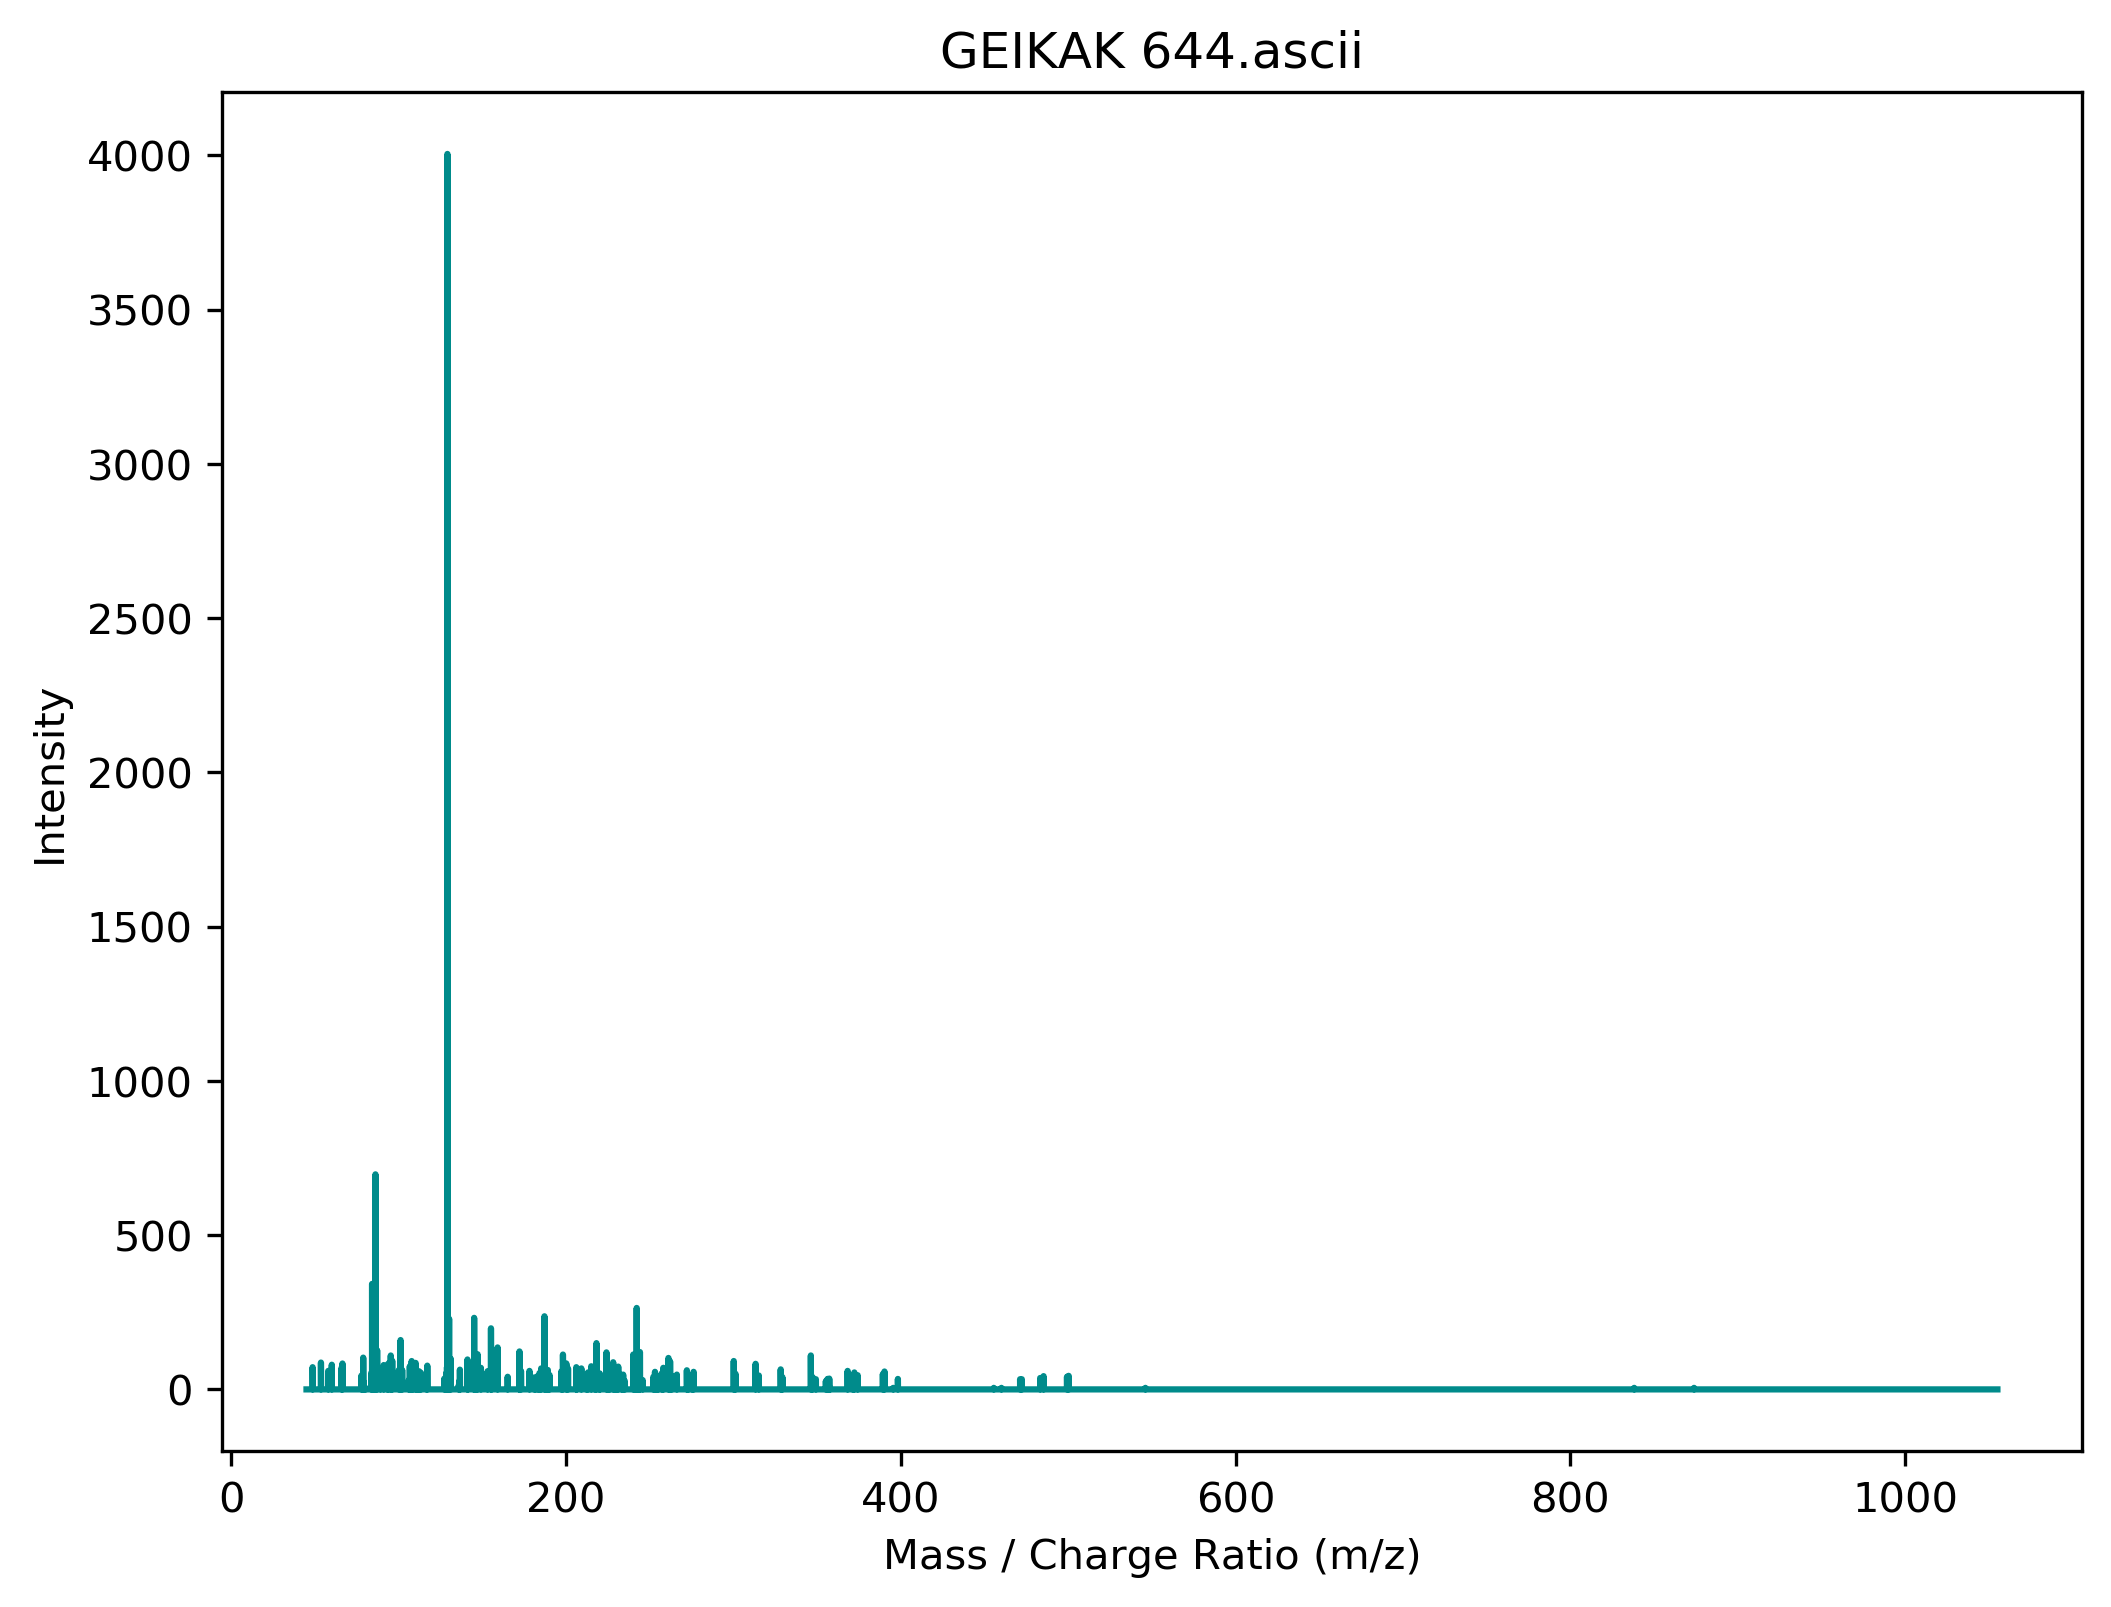

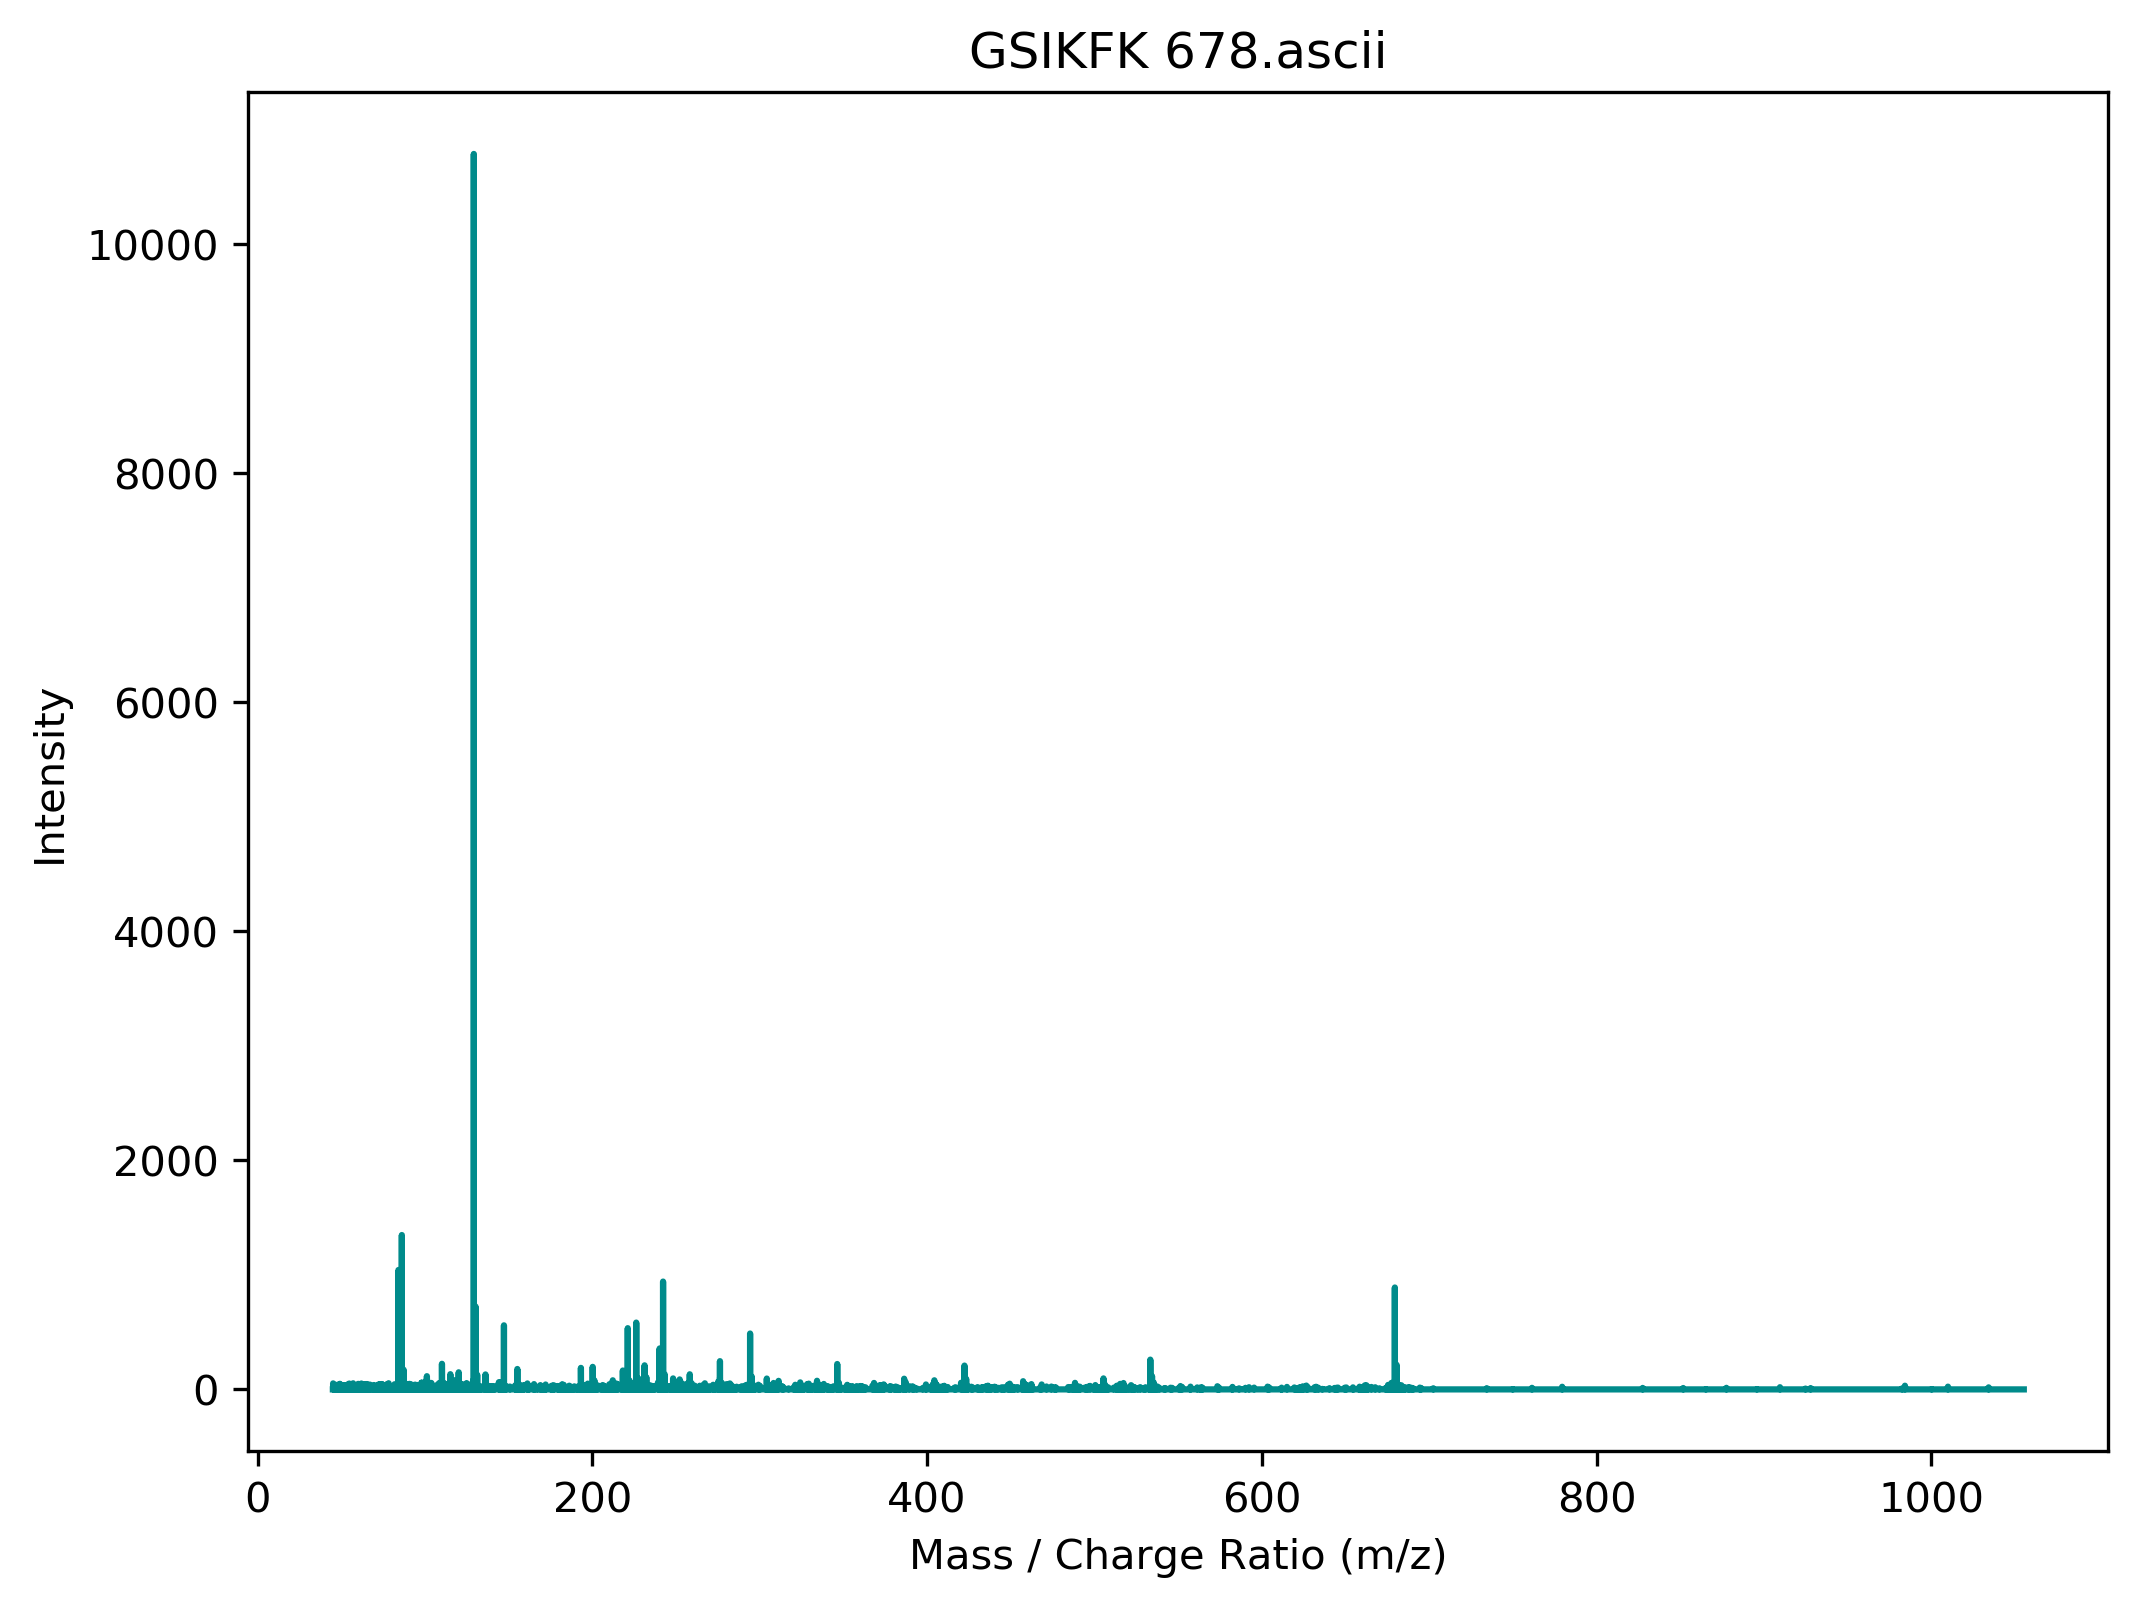

In [26]:
#insert the desired path containing ascii files in the ''. 
path = os.path.expanduser(r"~/Documents/python/identification_modified_proteins/no_mod_ascii/")

#changes current working directory to the path given 
directory = os.chdir(path)

# give the extension for the files you are looking for
ascii_extension = '.ascii'

#for loop used to convert all ascii data files into numpy arrays with the same number of specified bins
for filename in os.listdir(directory):
    if filename.endswith(ascii_extension):
        #create new numpy array and load ascii file into it
        arr = np.loadtxt(filename, delimiter=',', dtype=str)

        #convert loaded strings into floats, skipping any uneeded data 
        ms_arr = np.array(list(np.core.defchararray.split(arr[8:])), dtype=float)
        
        #plot data to validate spectrum appearance 
        plt.figure(figsize=(8, 6), dpi=300)
        plt.title('{}'.format(filename))
        plt.xlabel("Mass / Charge Ratio (m/z)") 
        plt.ylabel("Intensity") 
        plt.plot(ms_arr[:,0],ms_arr[:,1], color='darkcyan')
        plt.show()

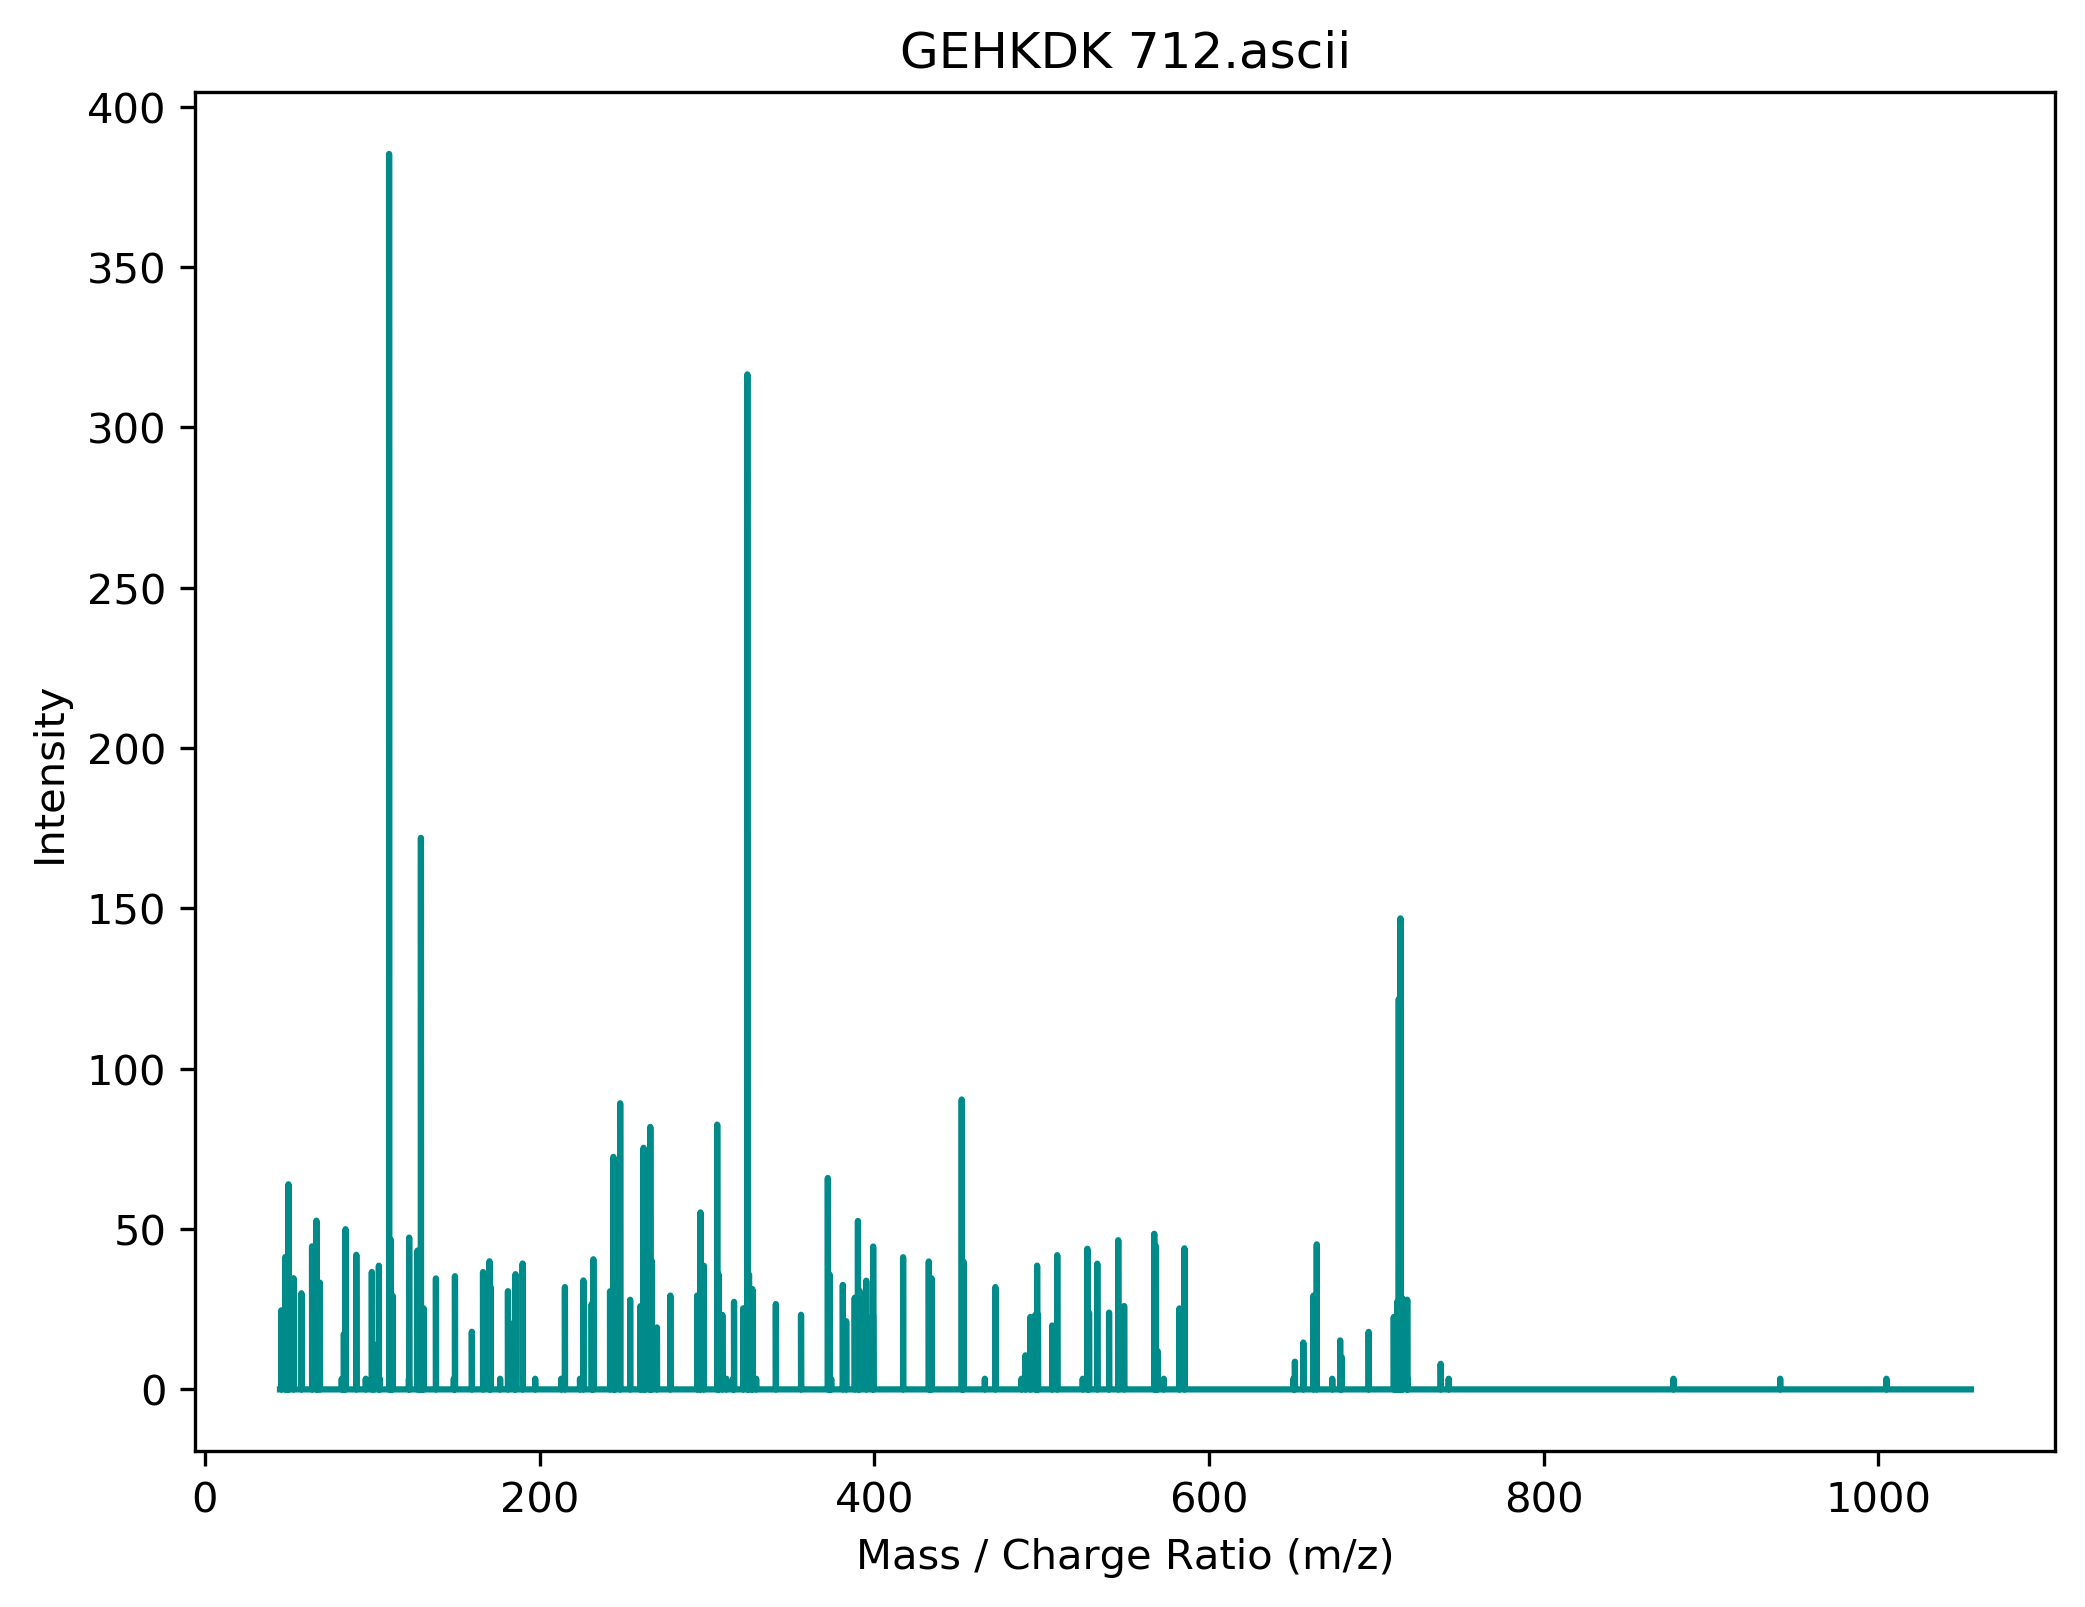

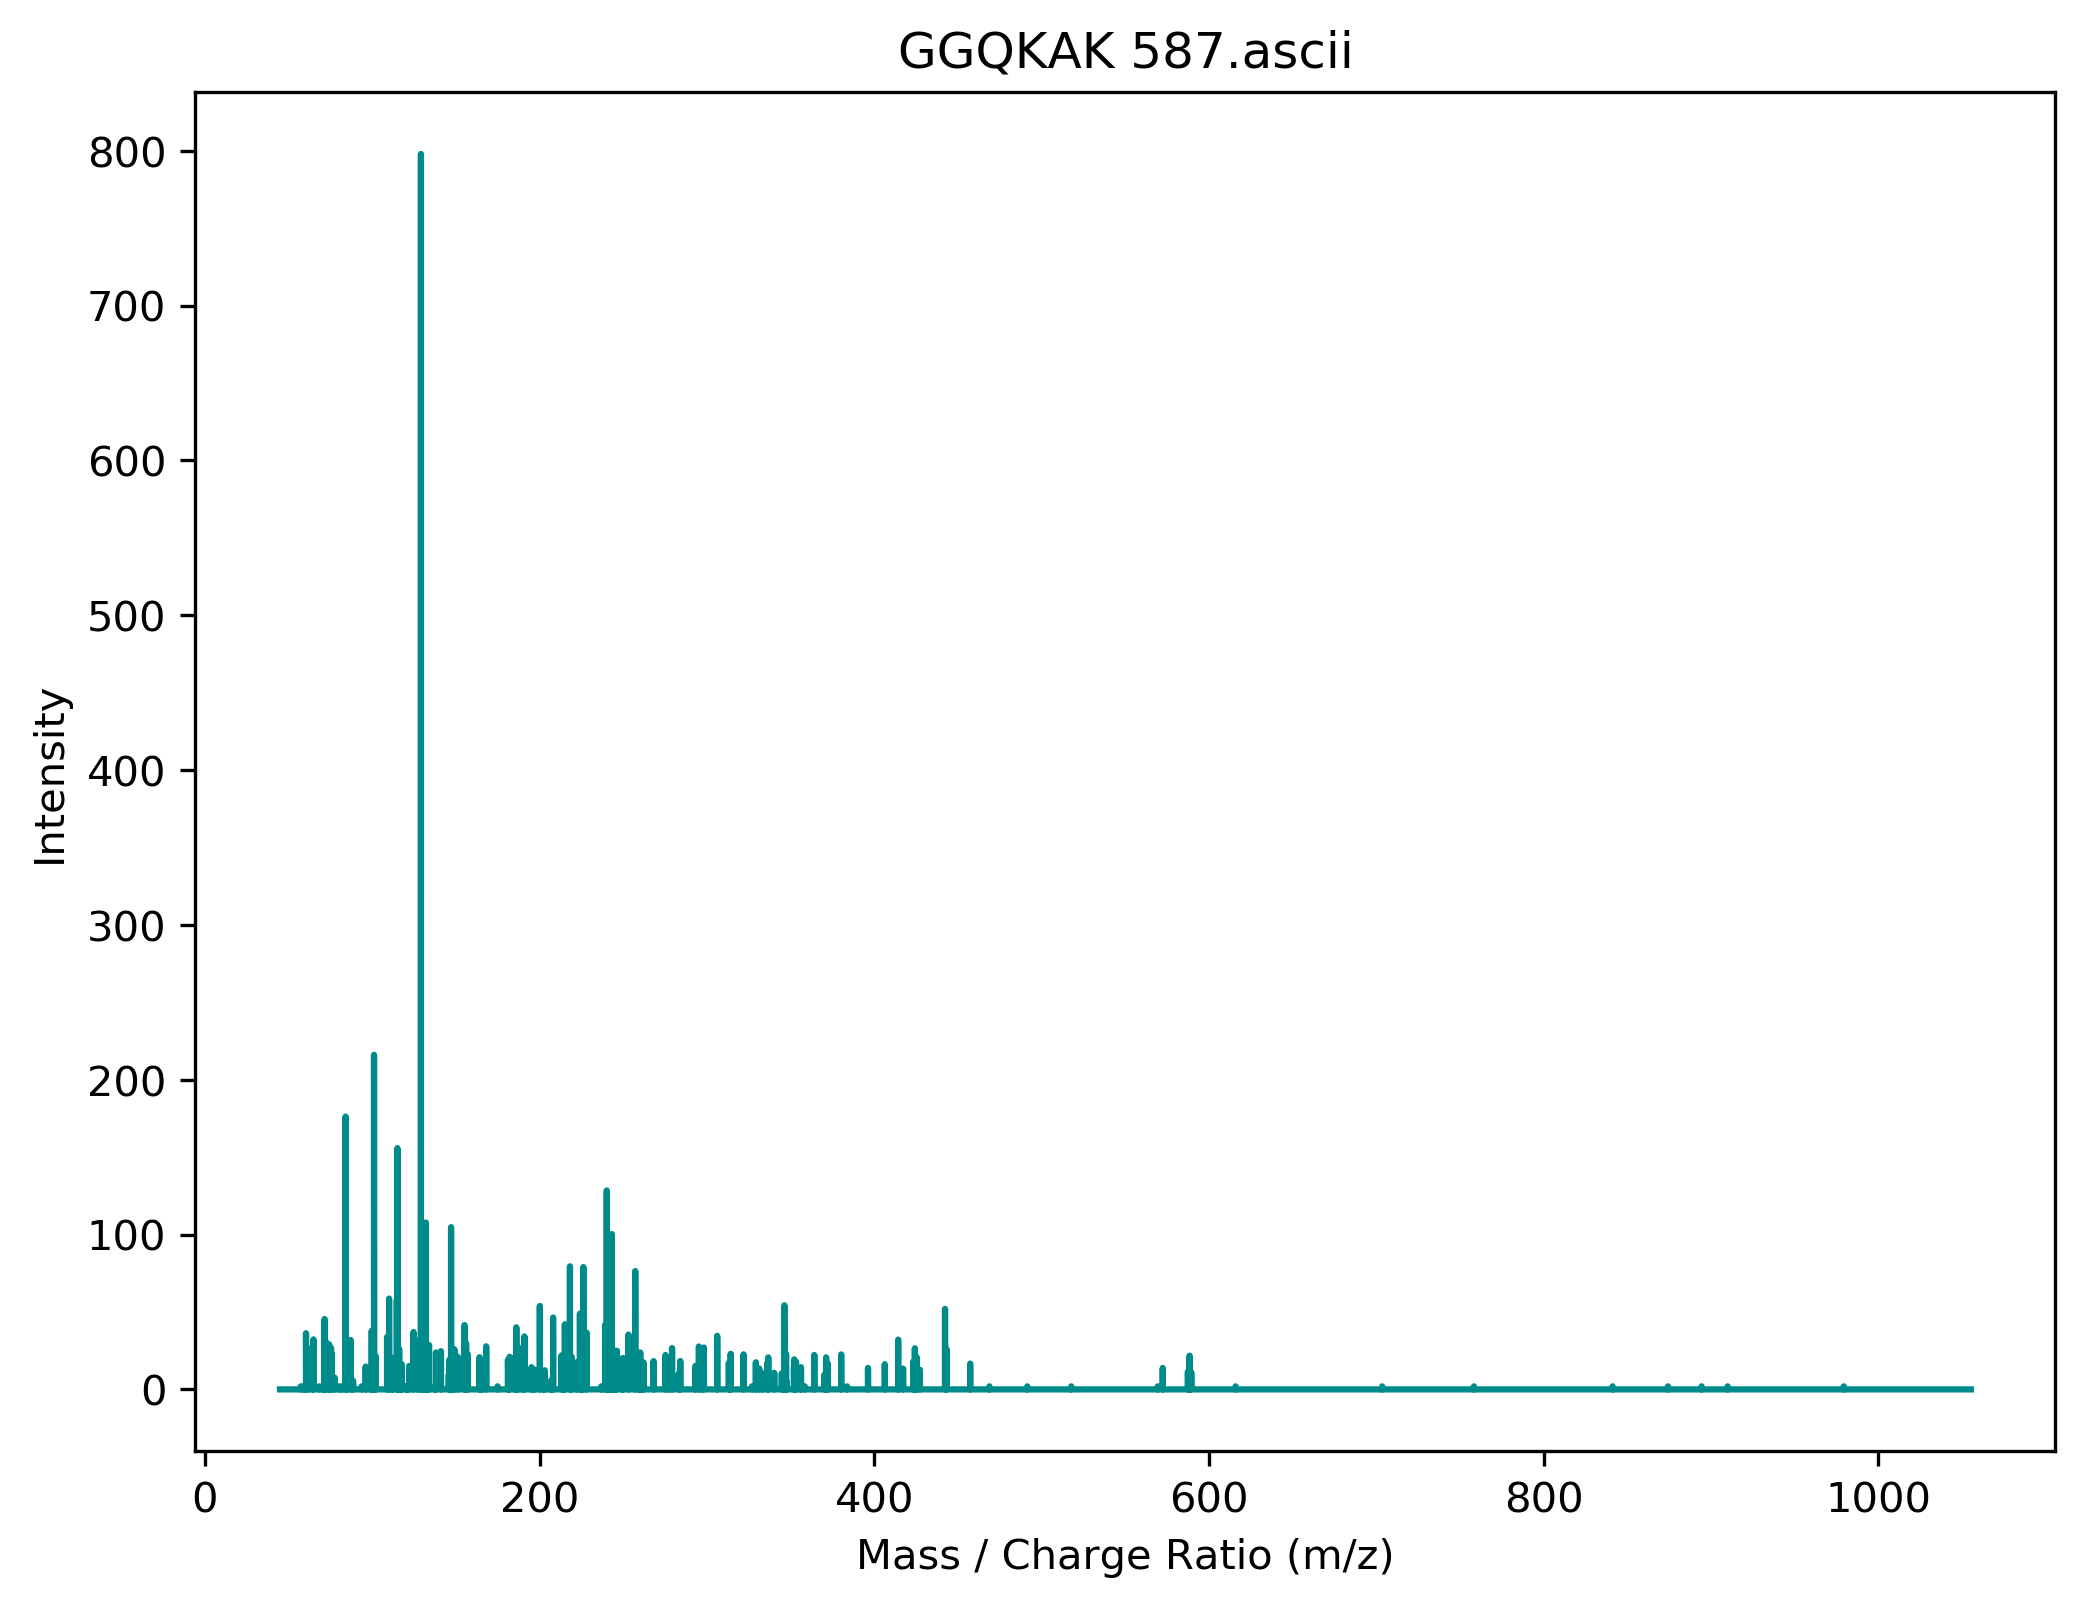

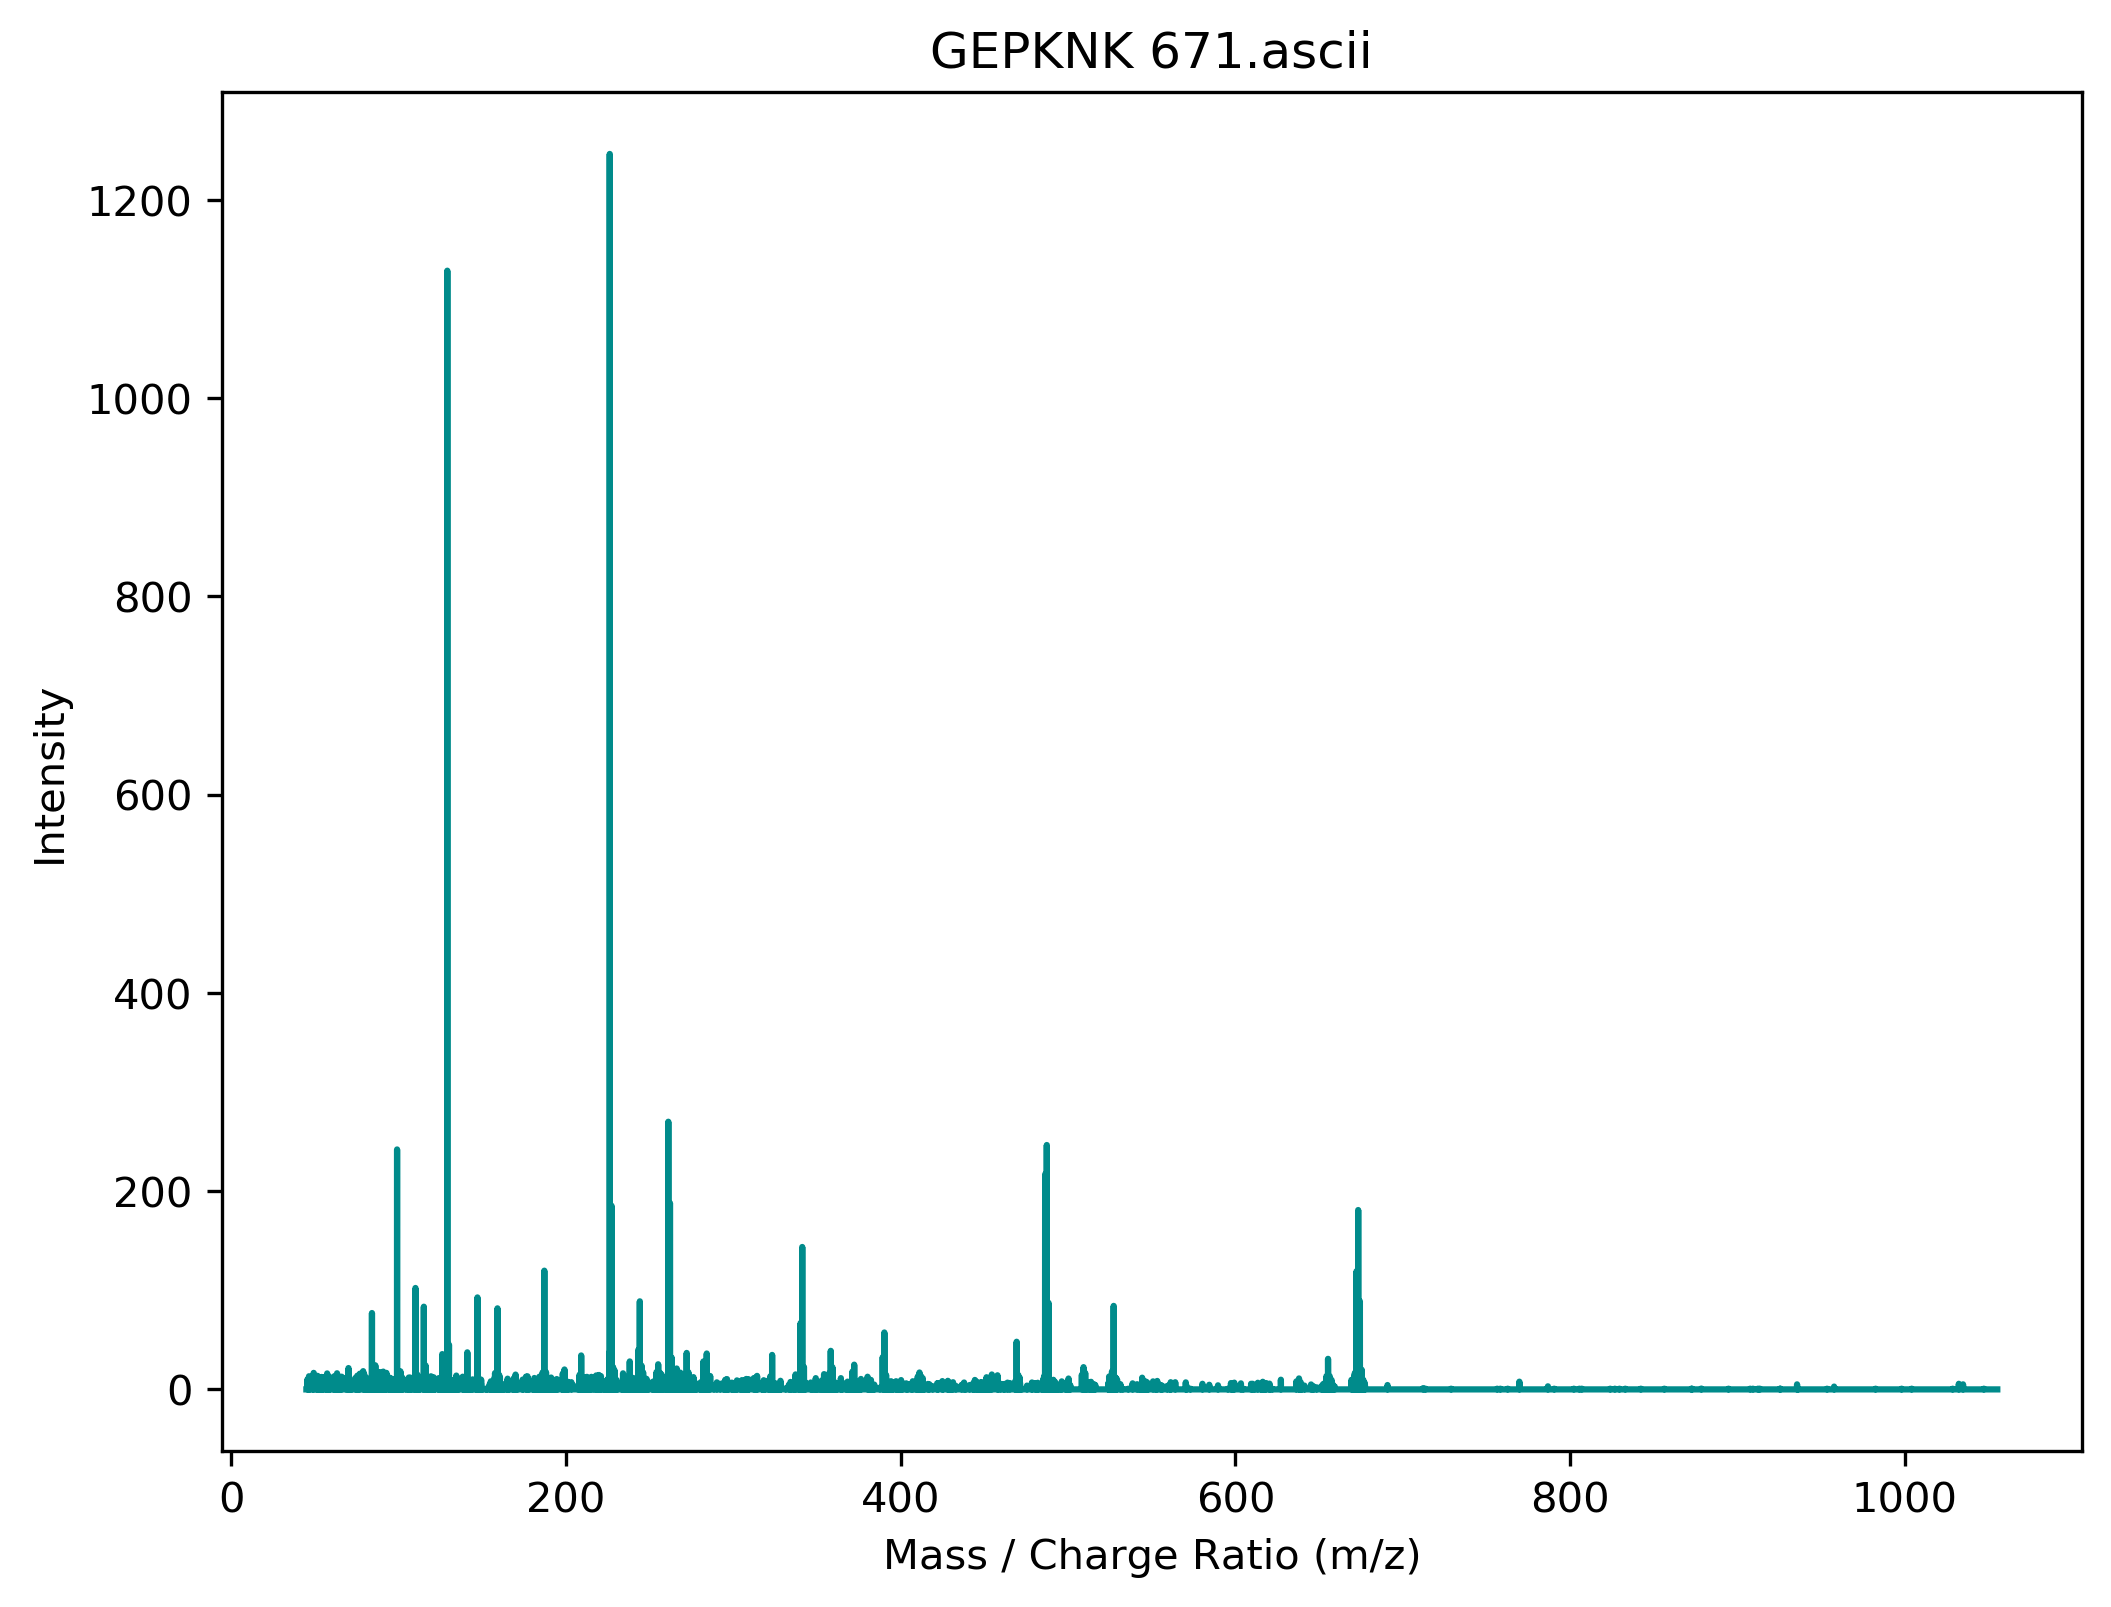

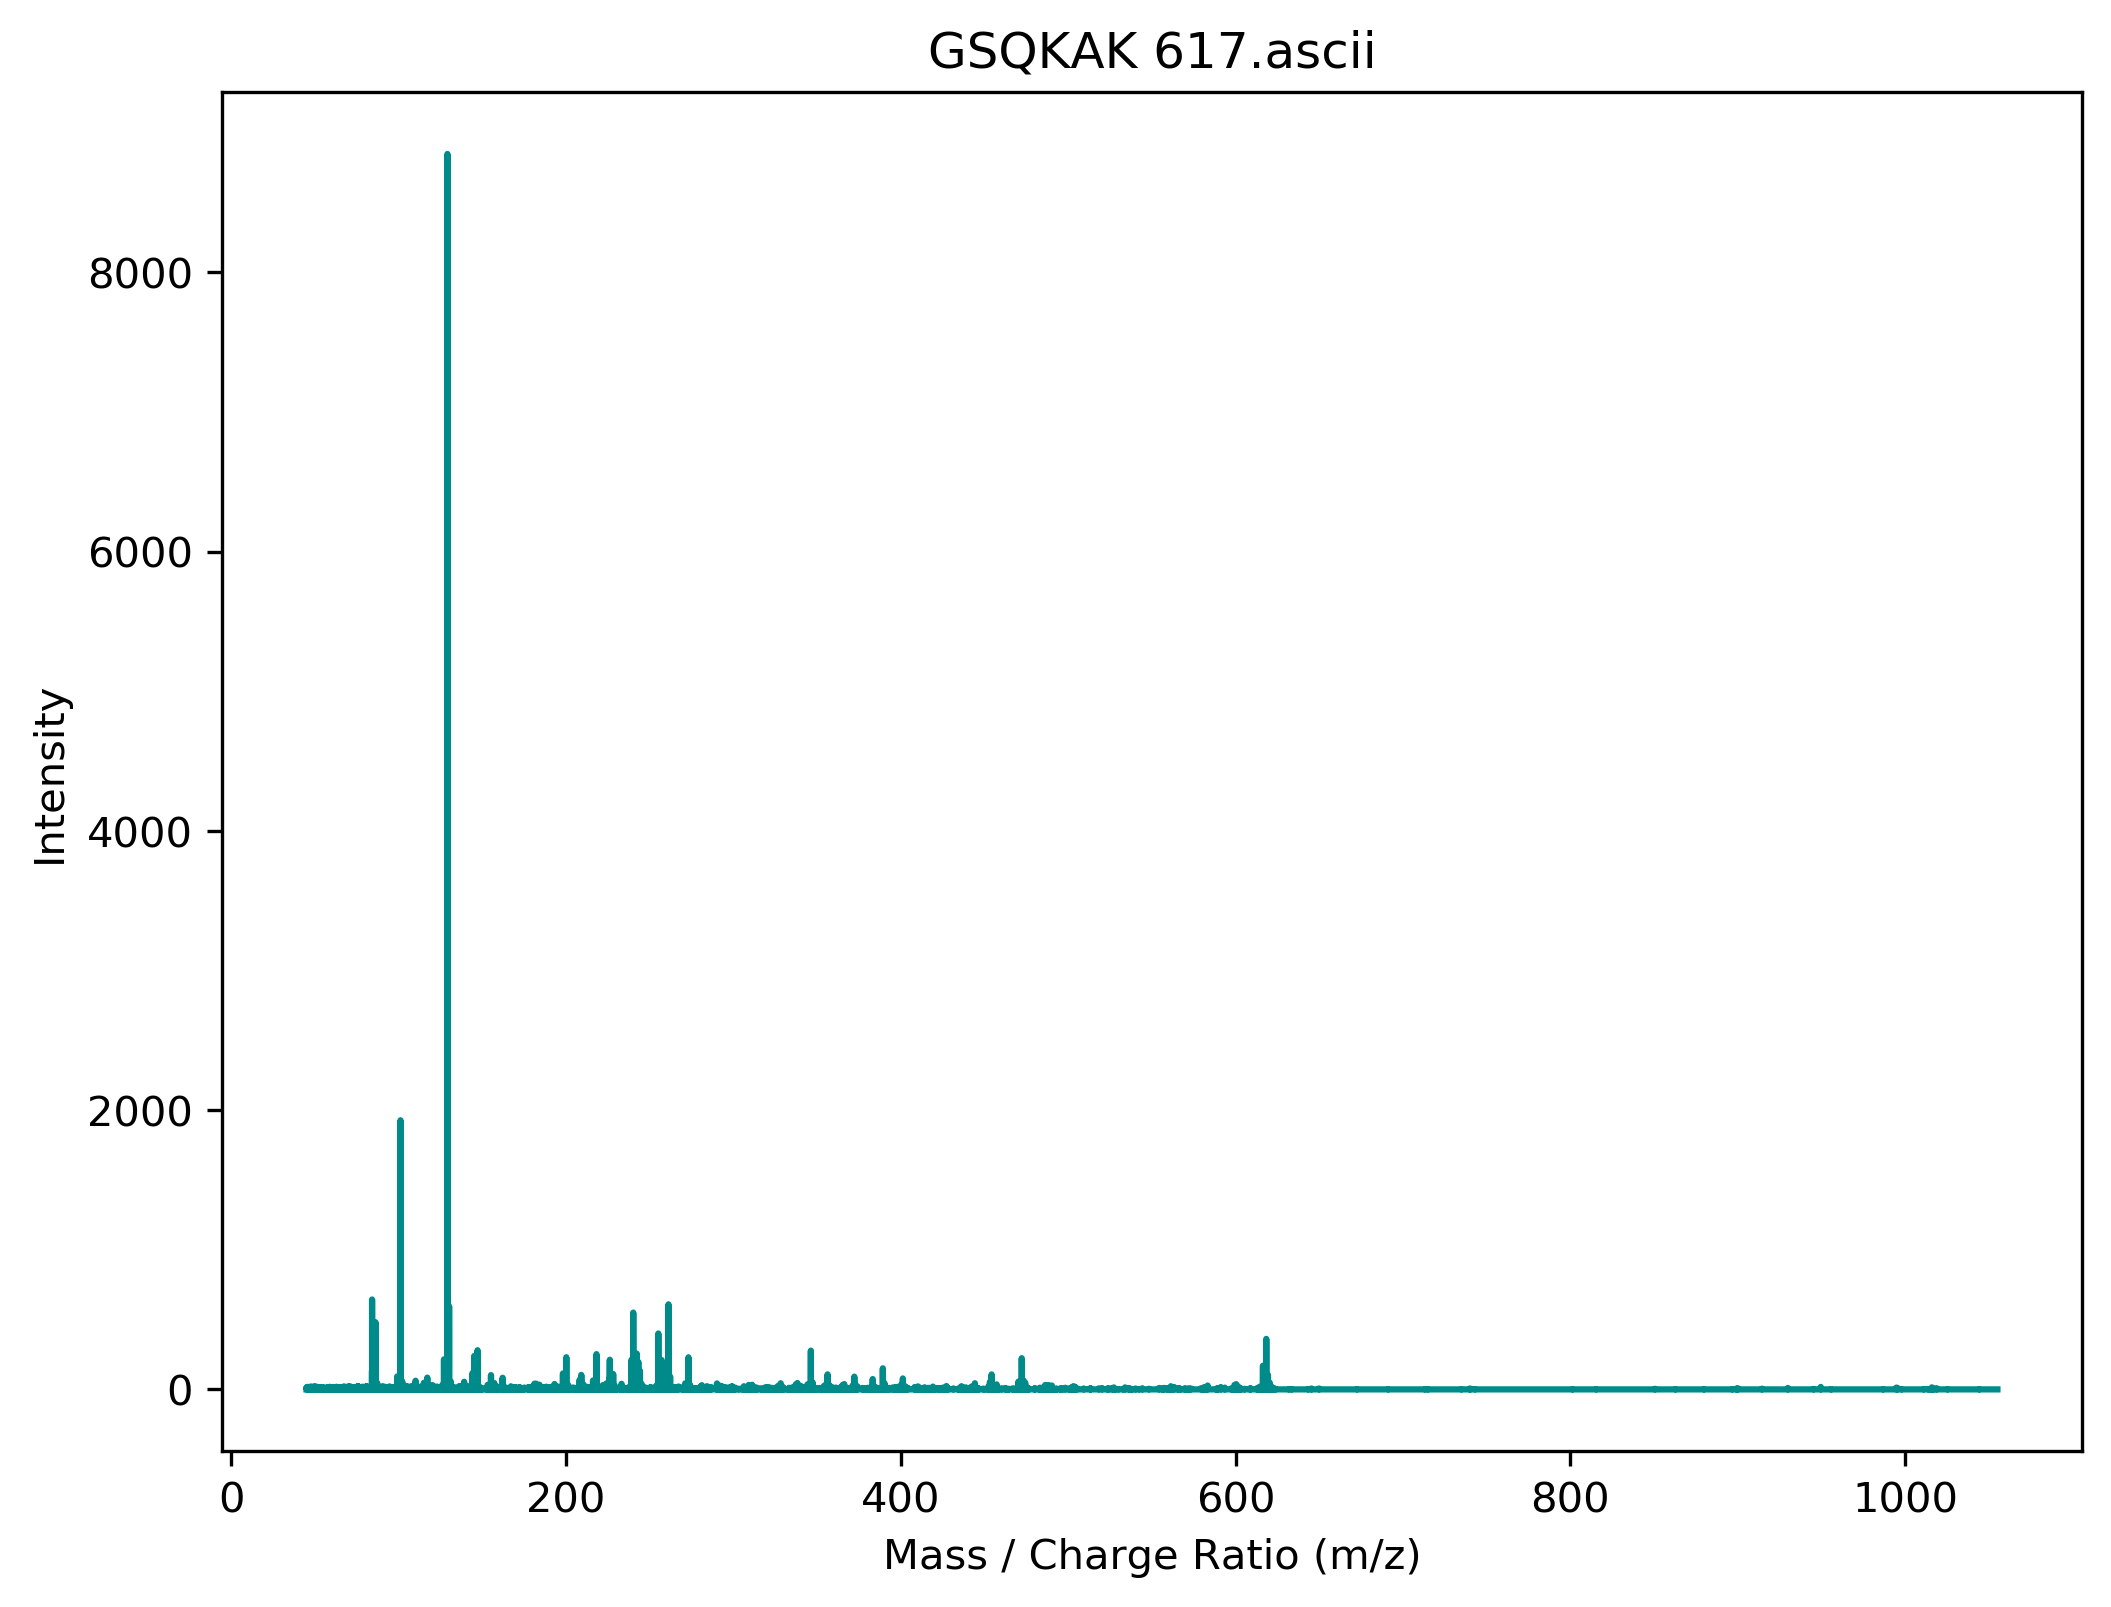

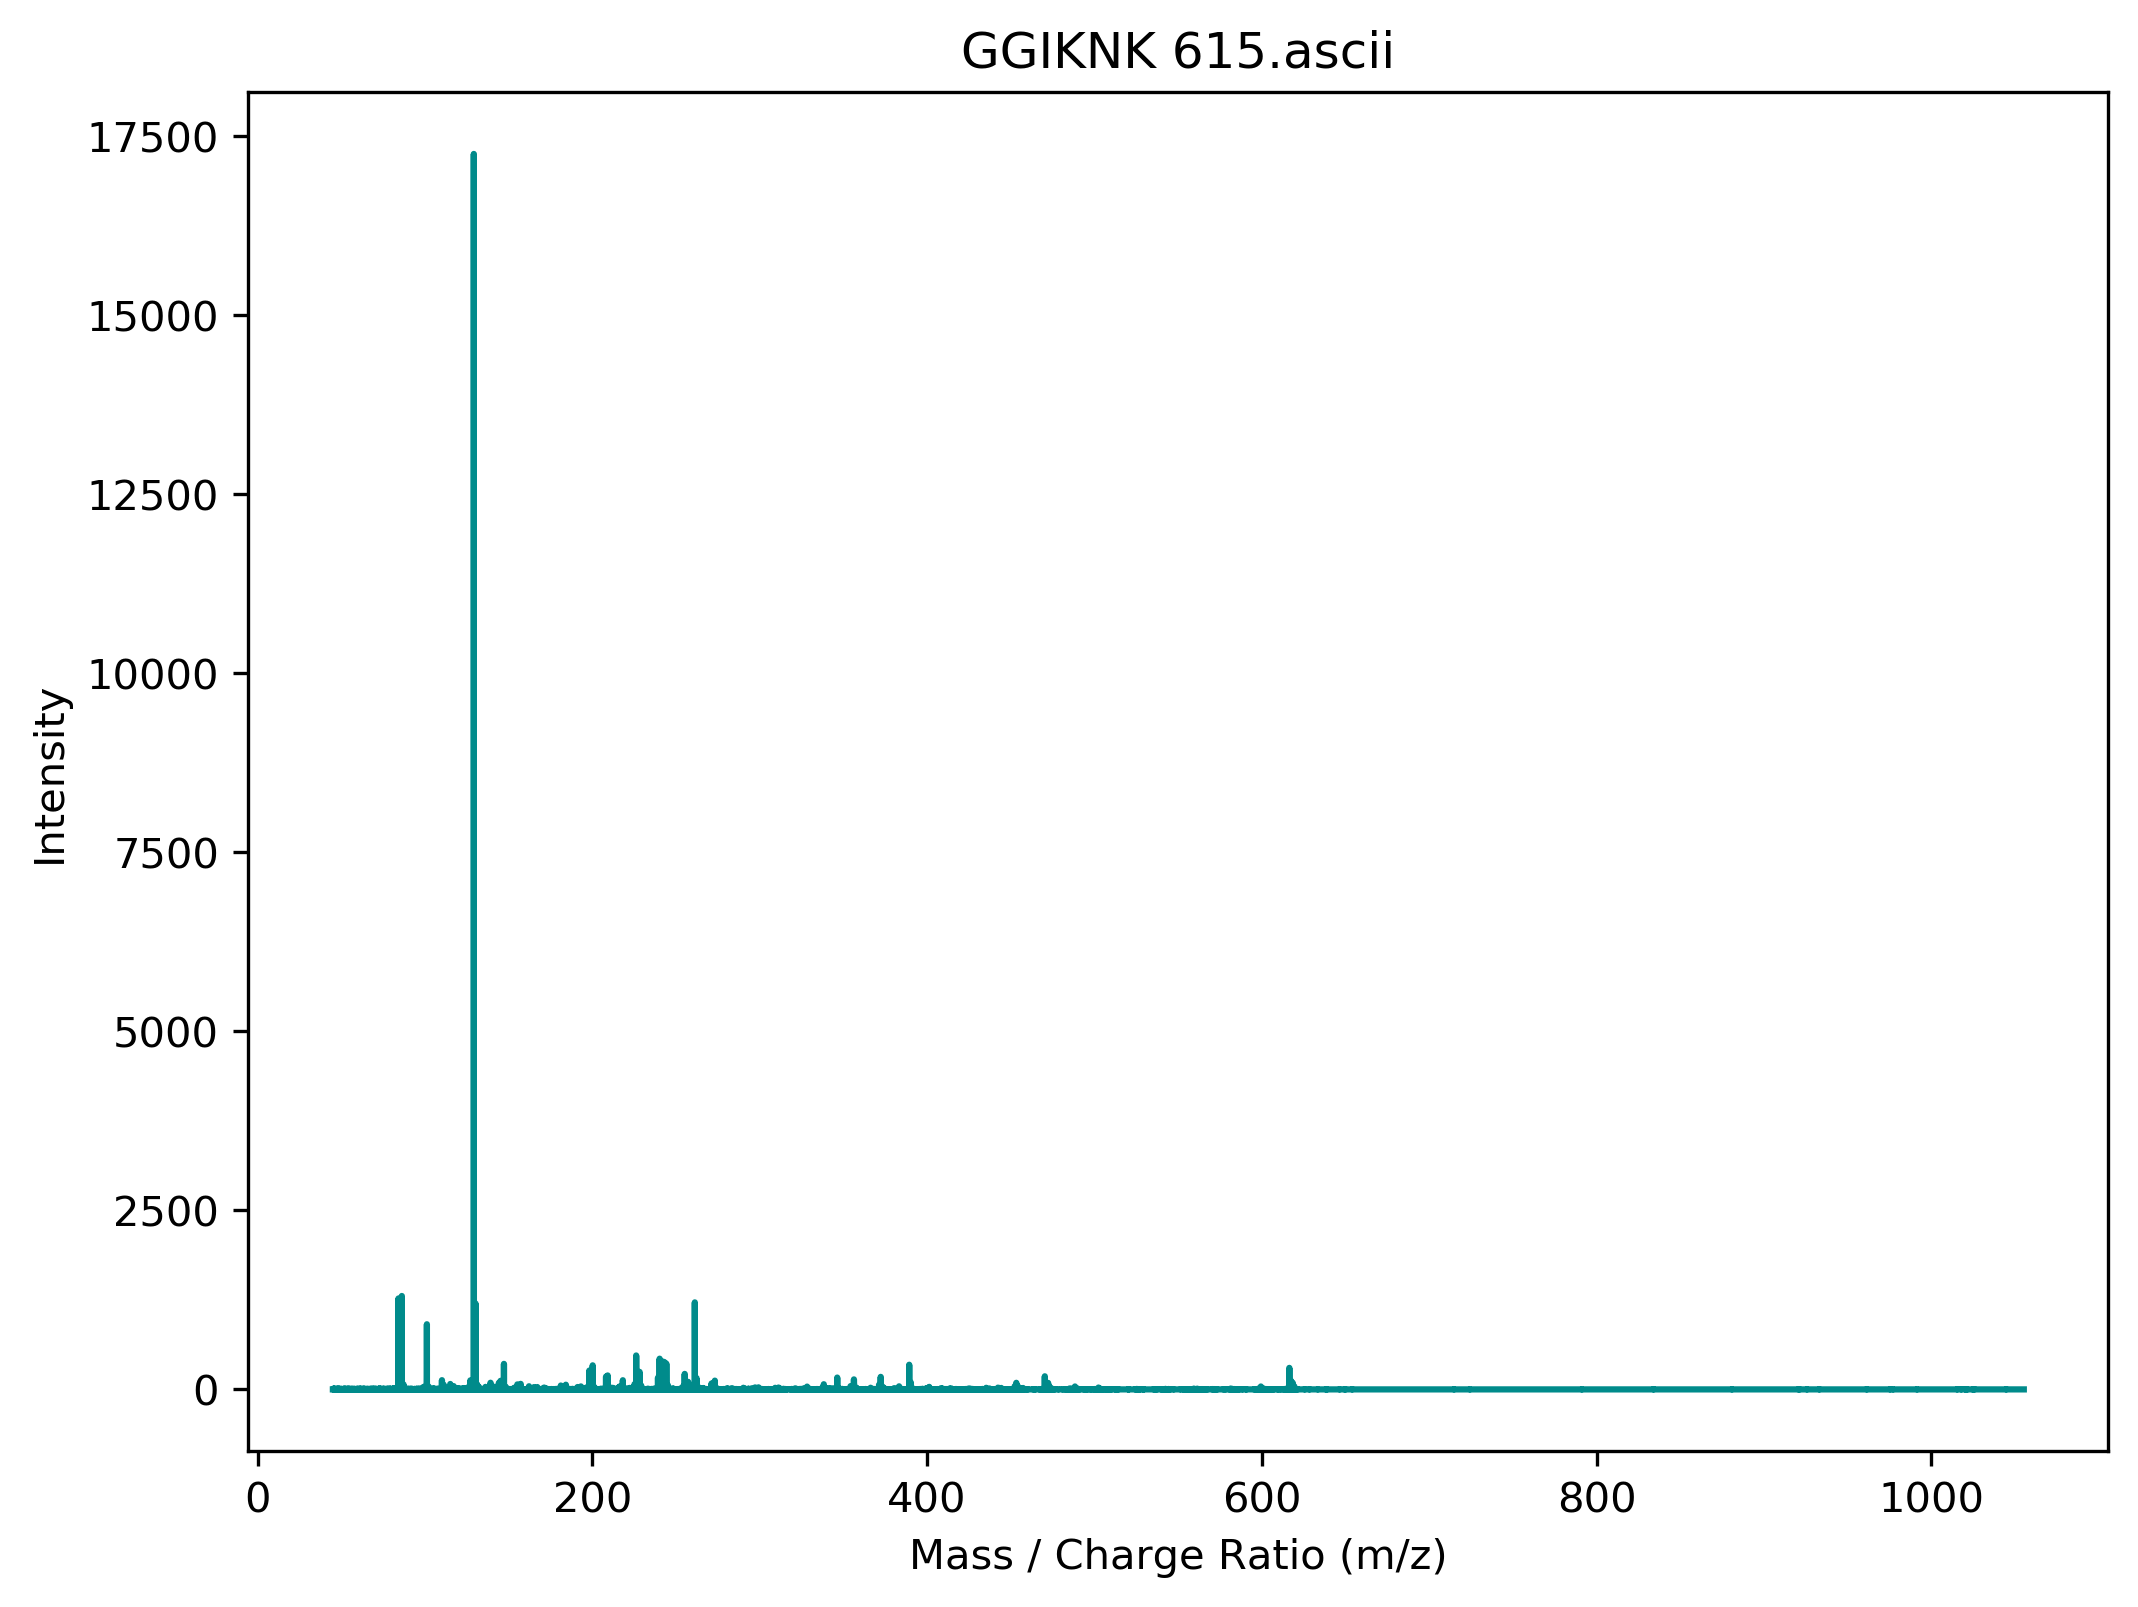

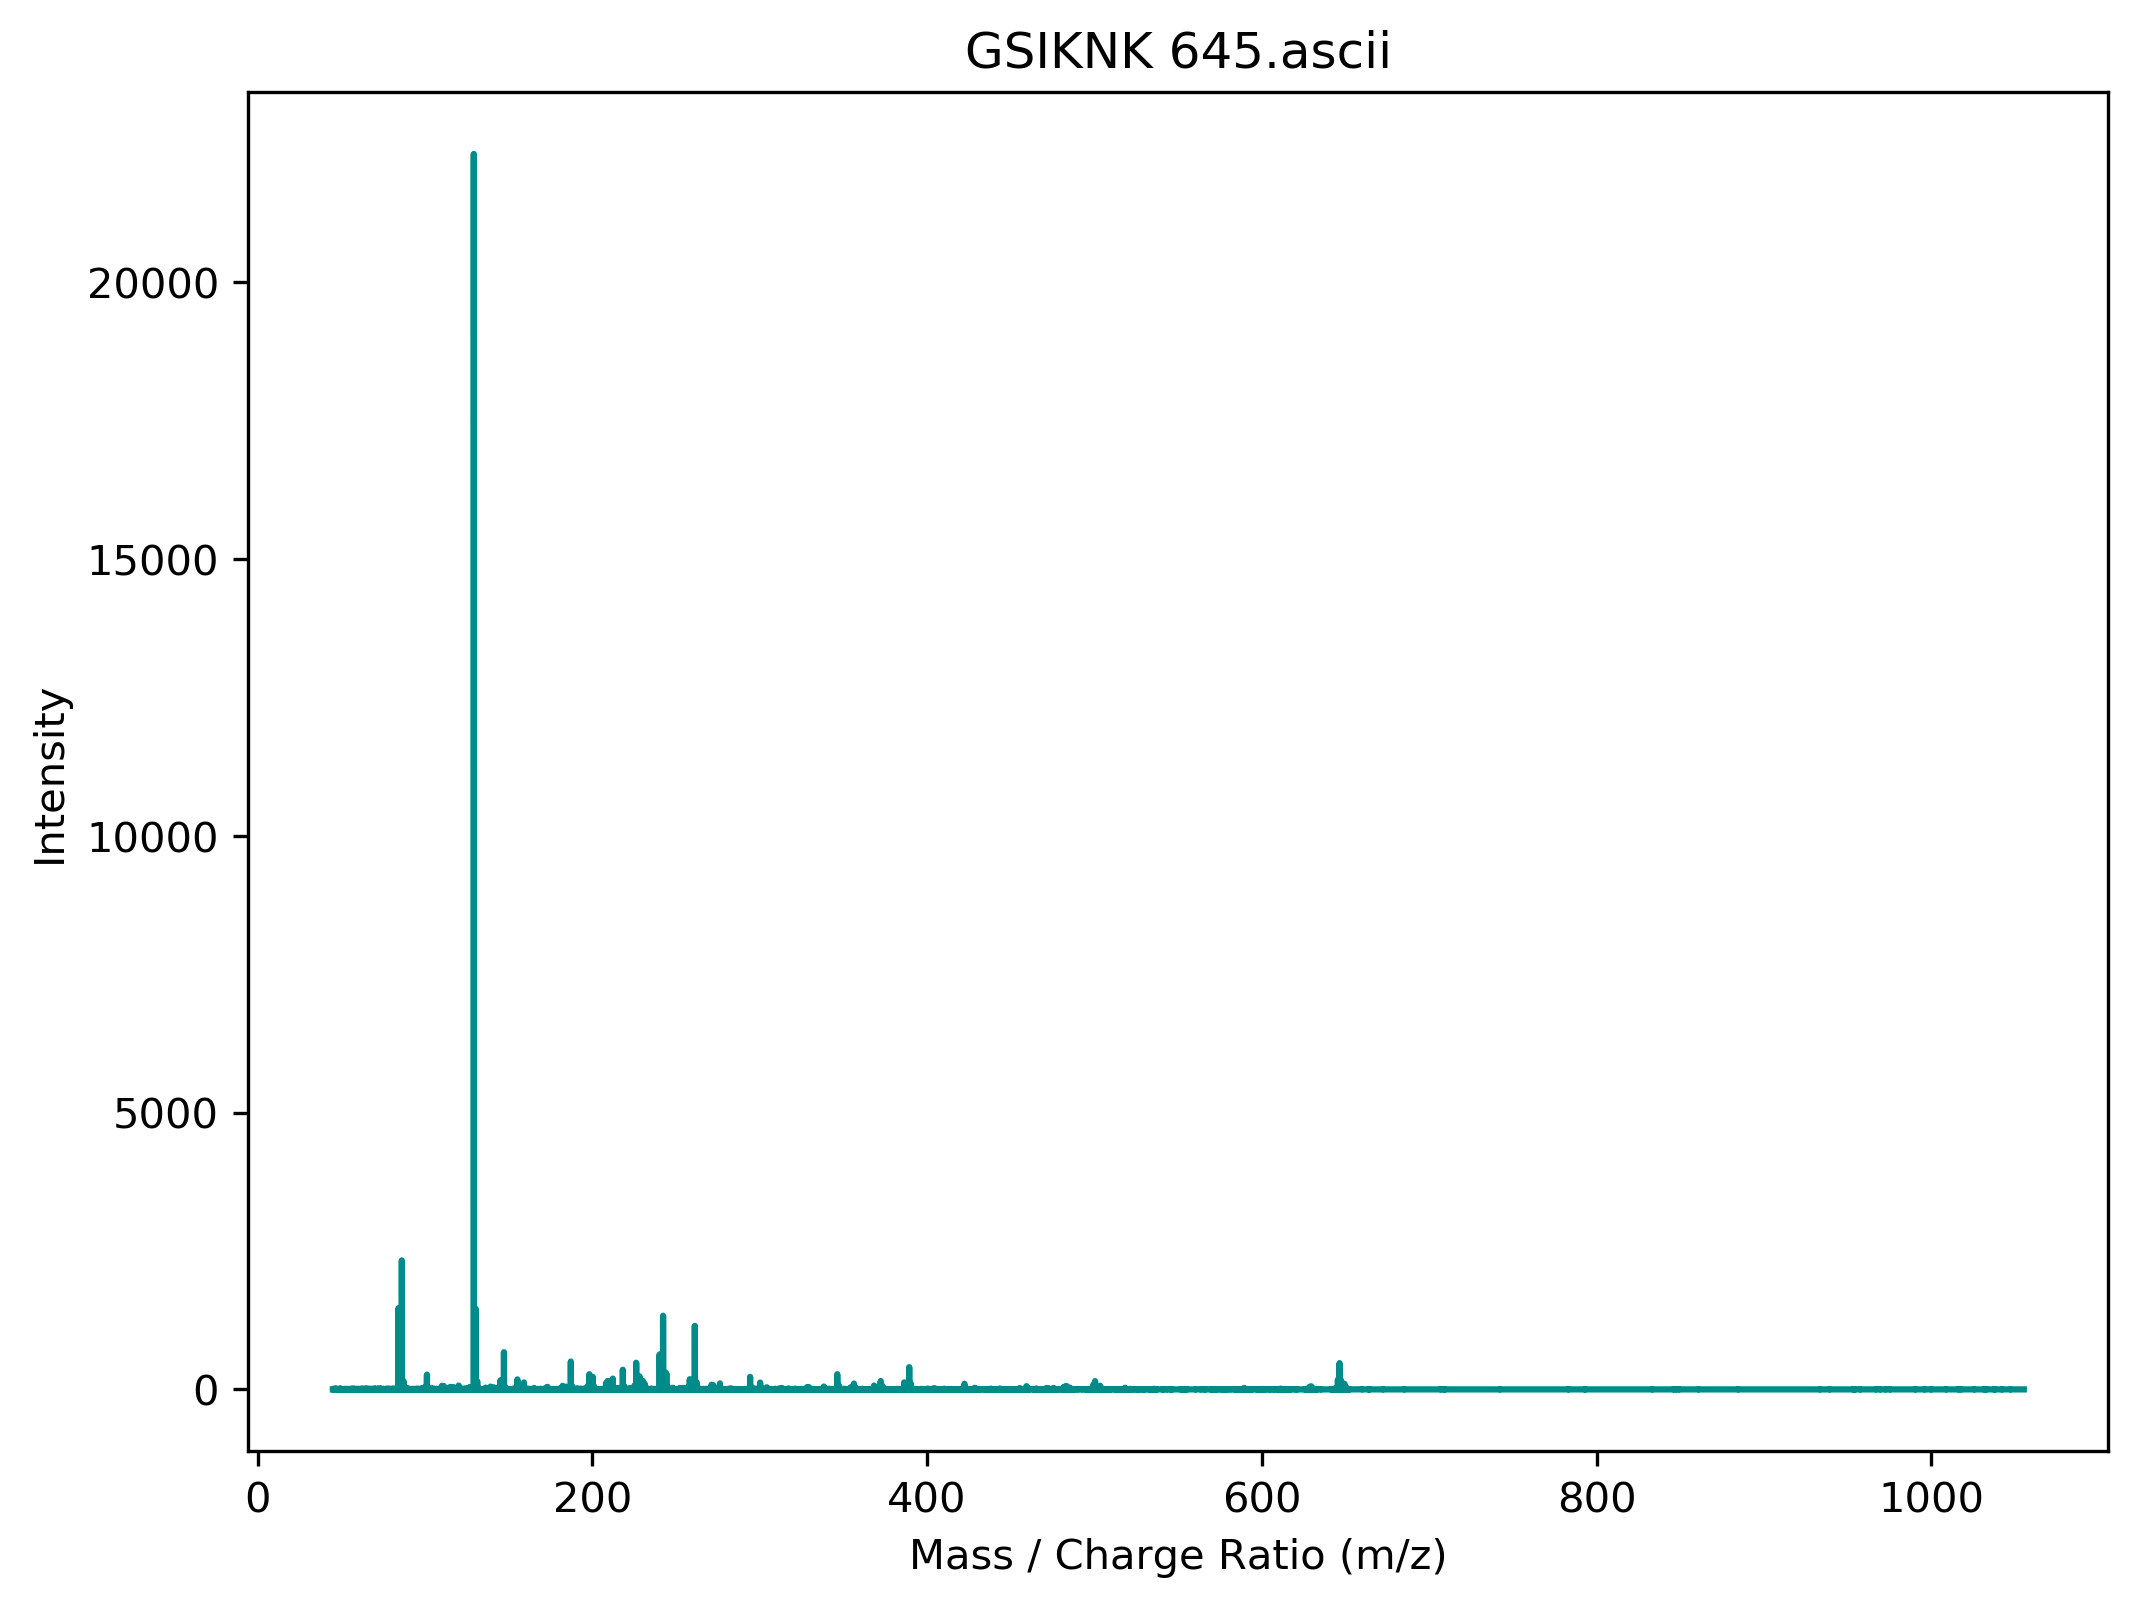

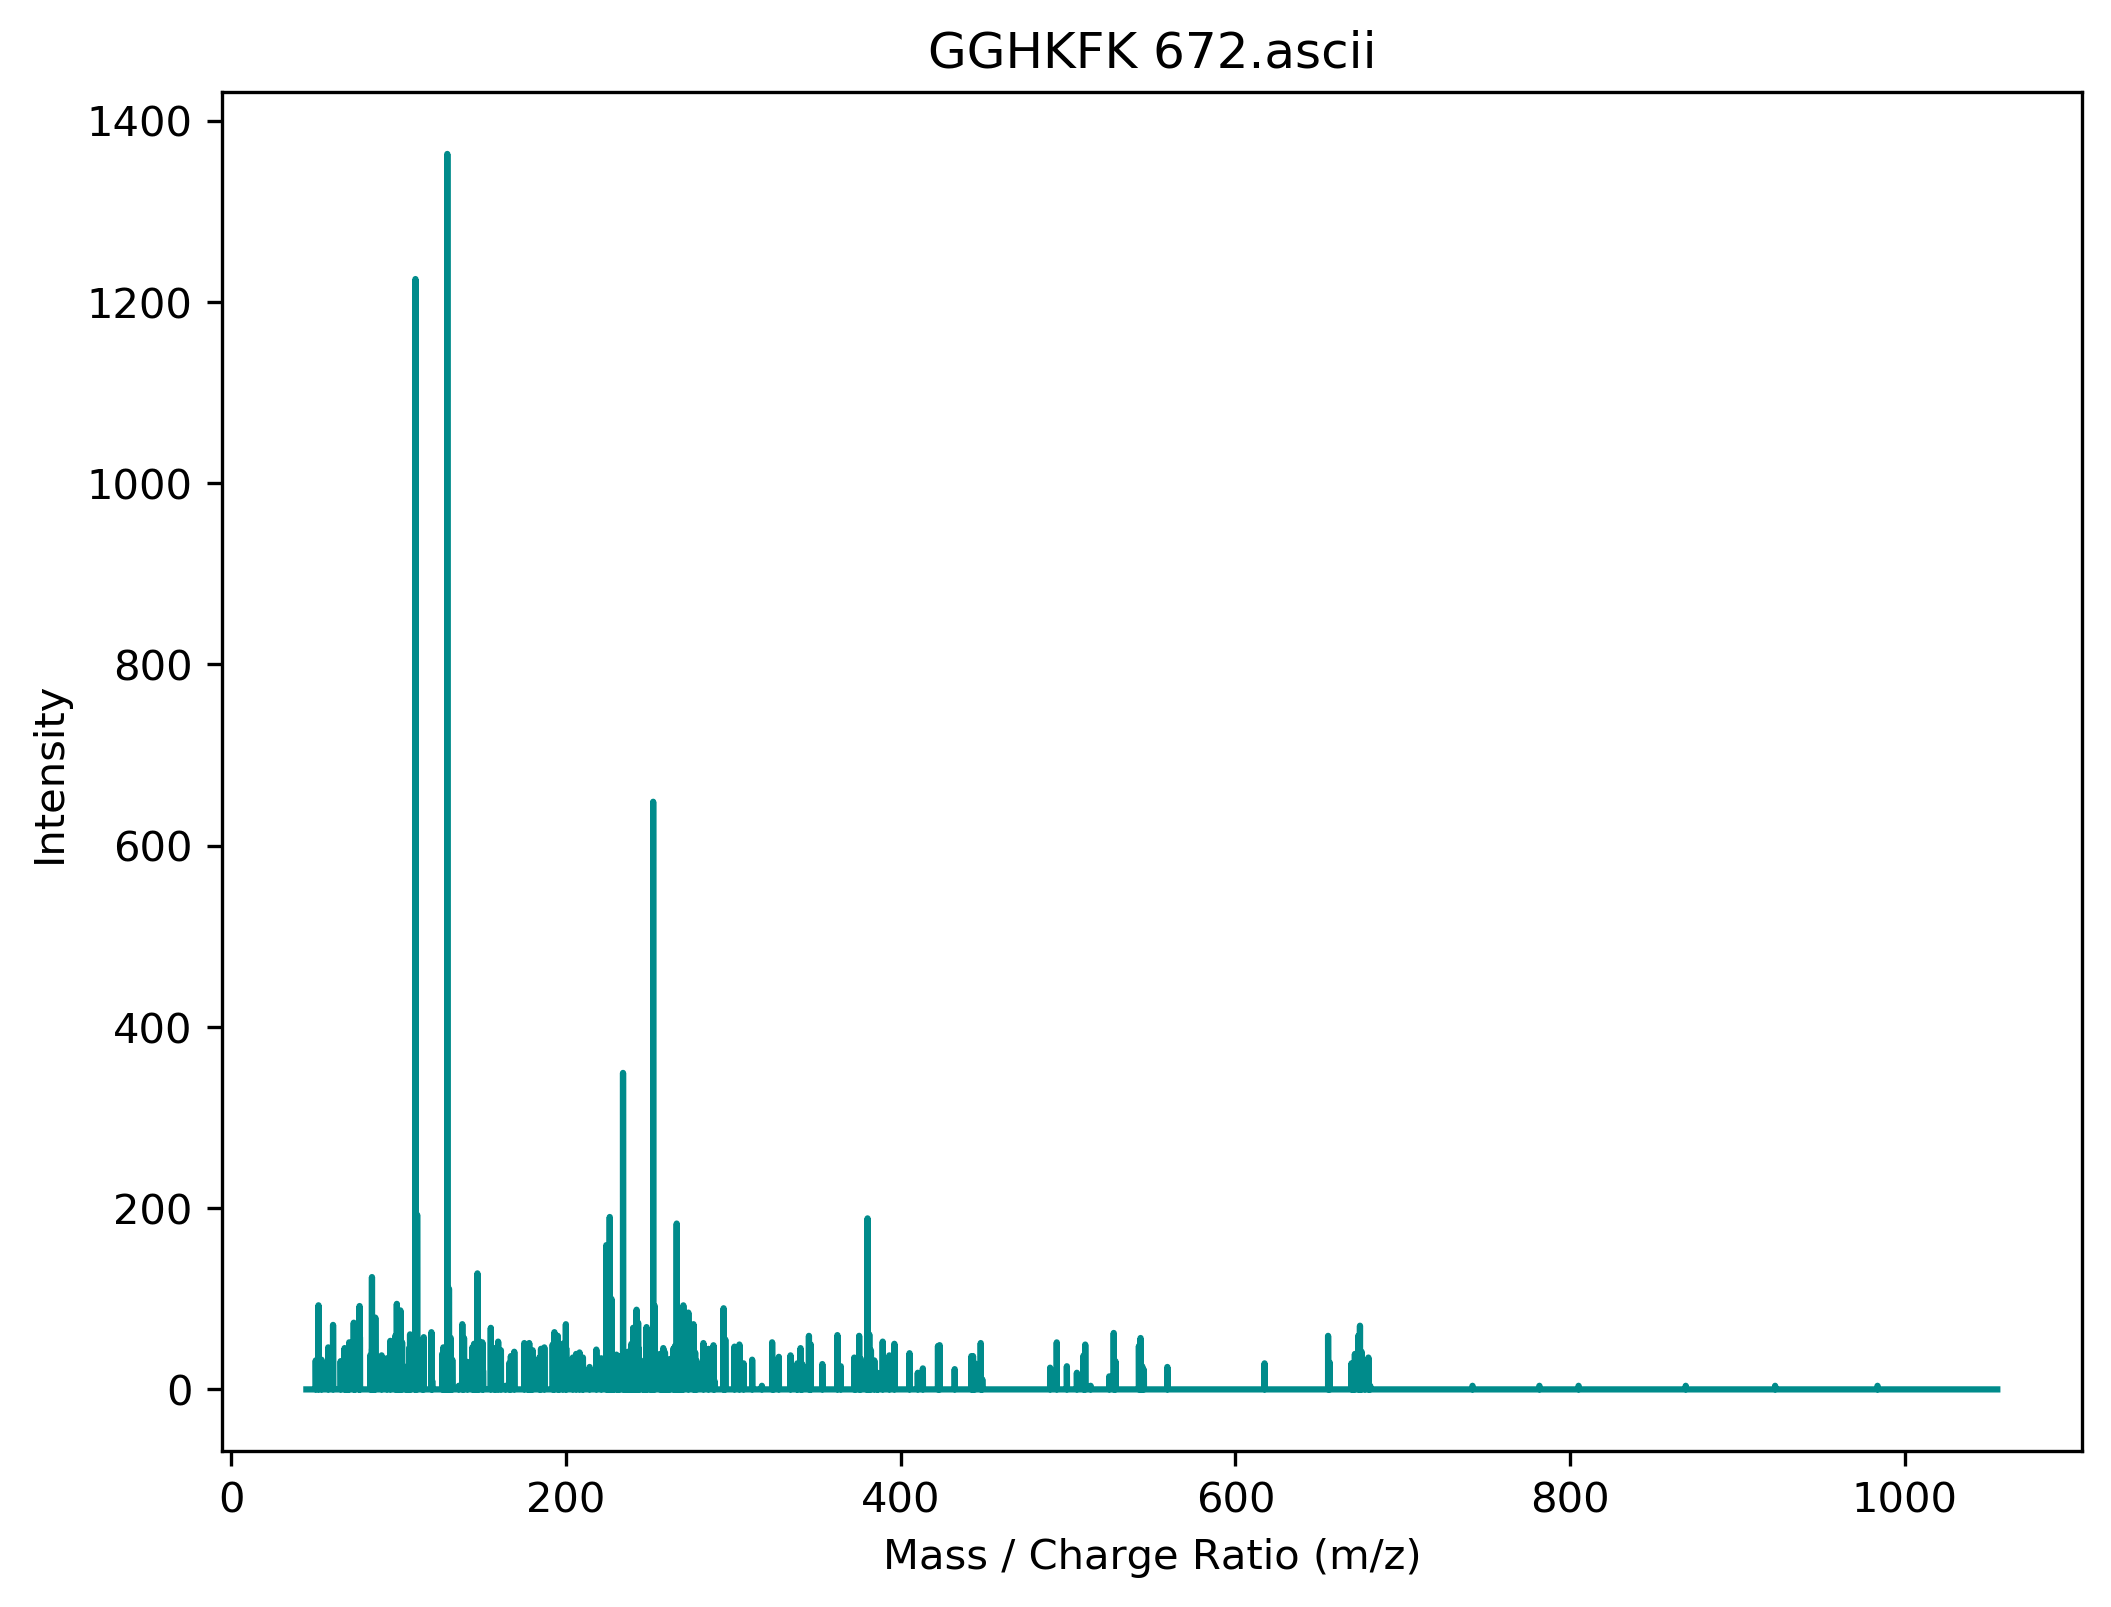

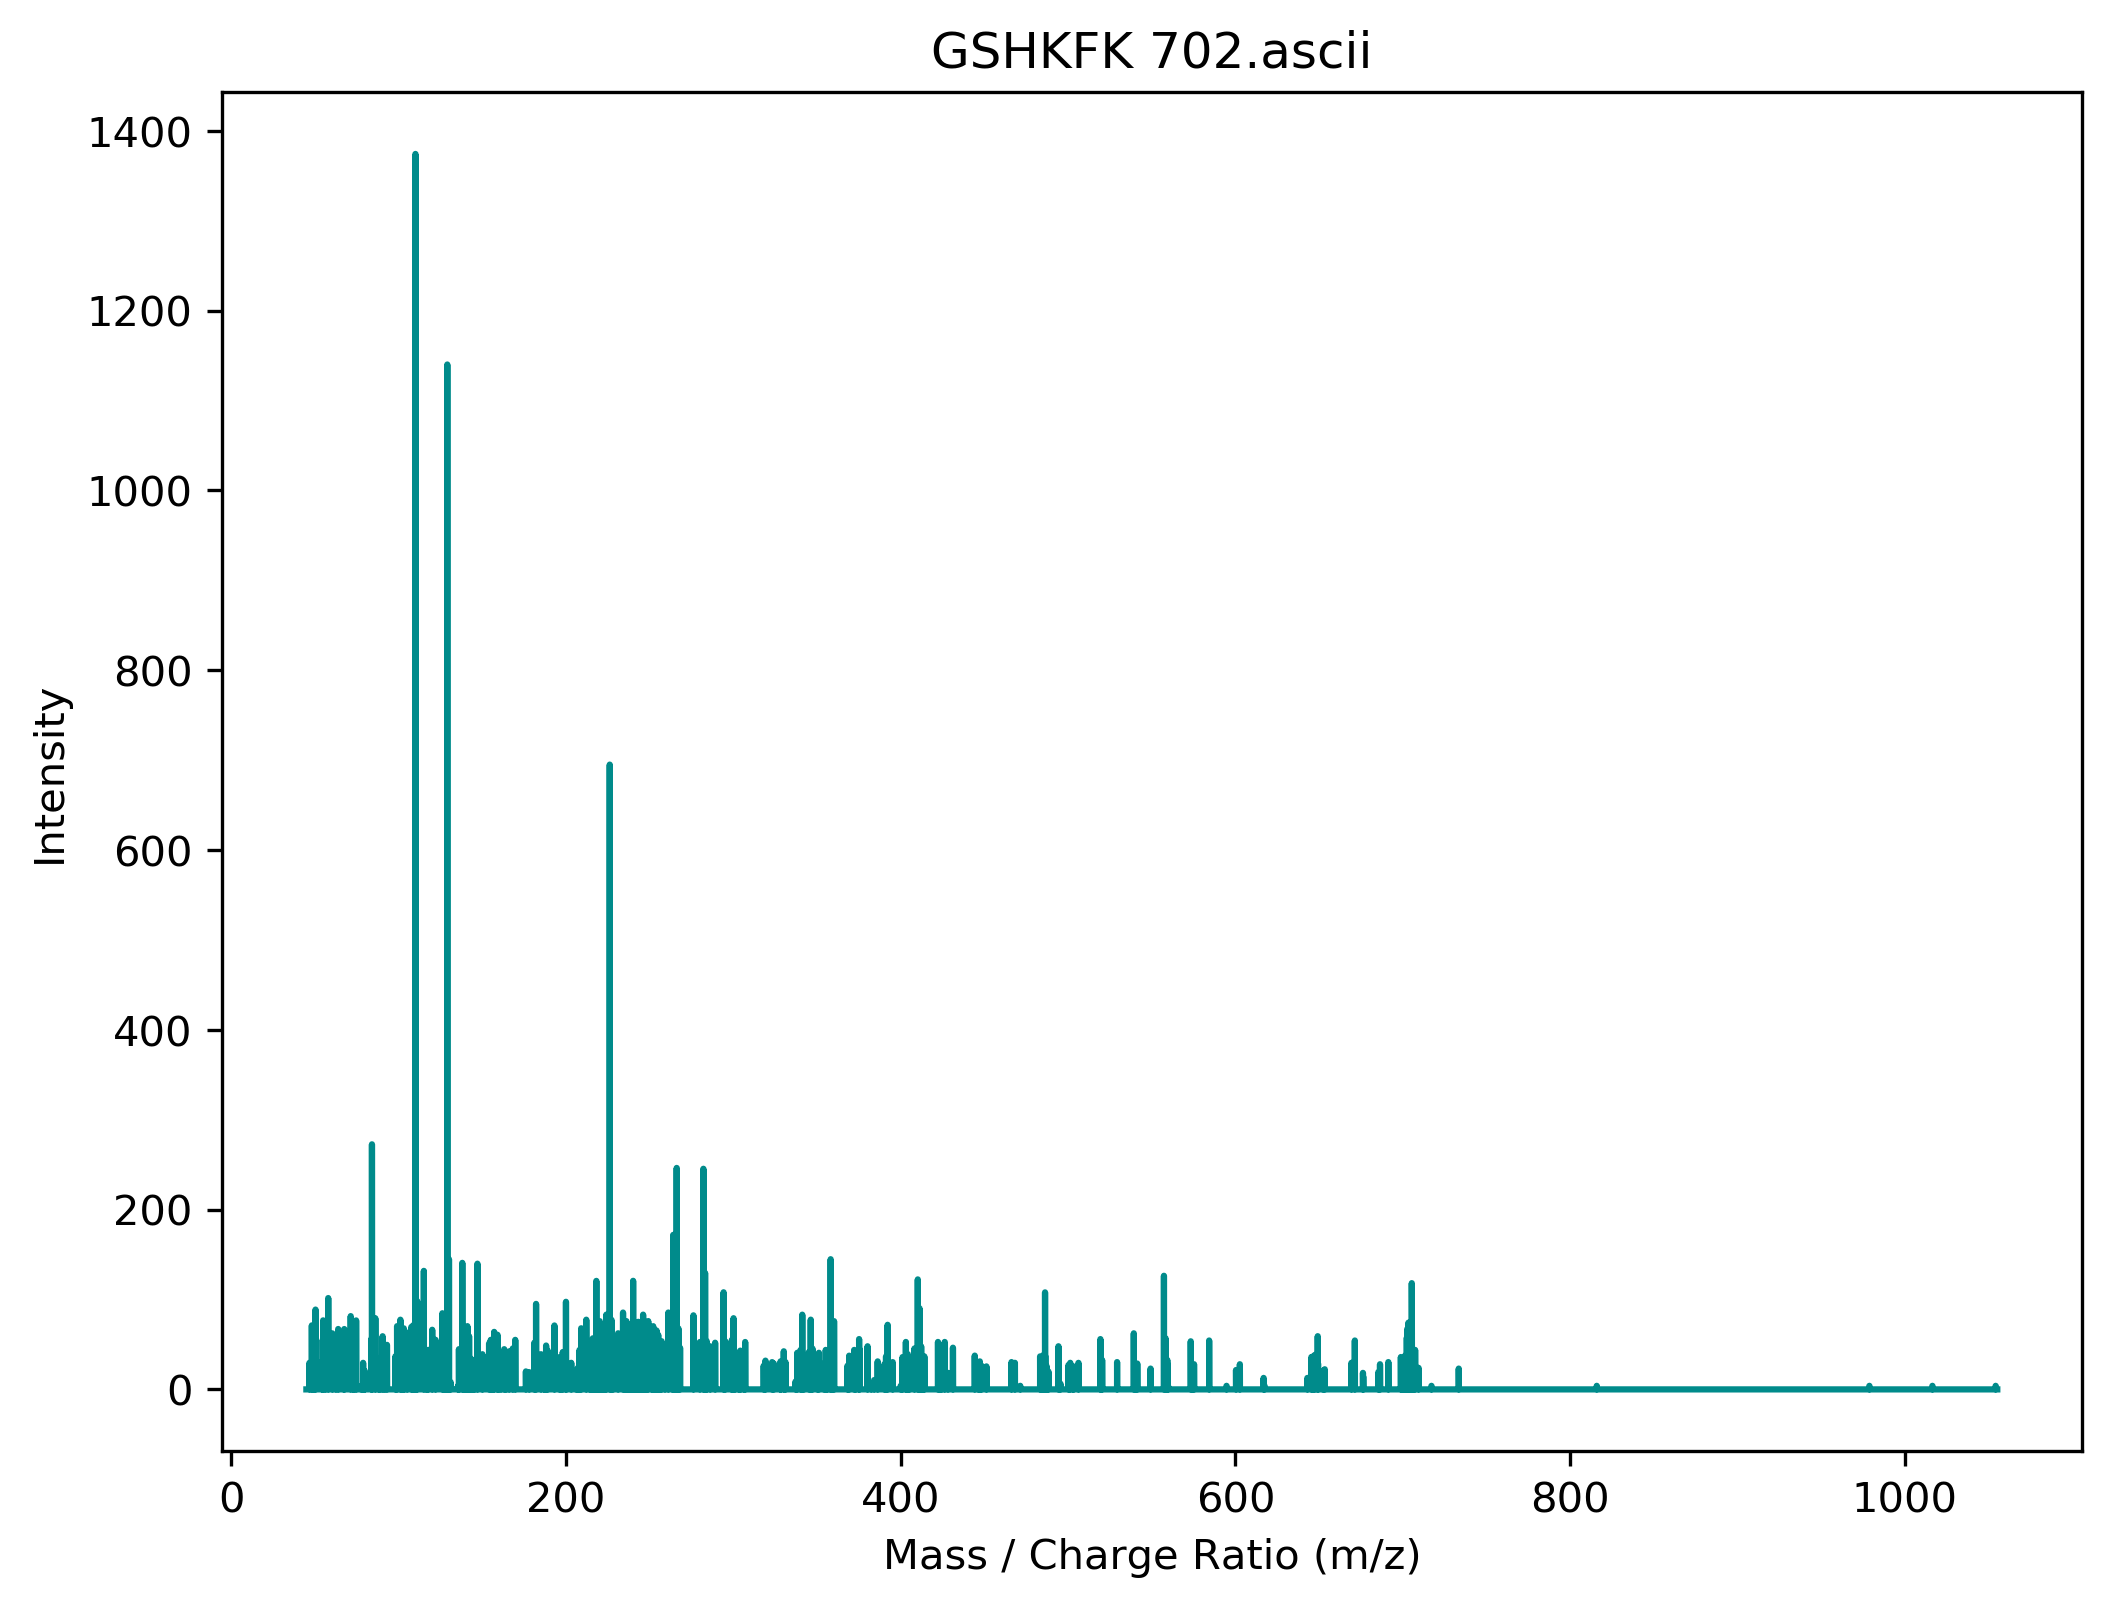

In [27]:
#insert the desired path containing ascii files in the ''. 
path = os.path.expanduser(r"~/Documents/python/identification_modified_proteins/hold_out_test_no_mod/")

#changes current working directory to the path given 
directory = os.chdir(path)

# give the extension for the files you are looking for
ascii_extension = '.ascii'

#for loop used to convert all ascii data files into numpy arrays with the same number of specified bins
for filename in os.listdir(directory):
    if filename.endswith(ascii_extension):
        #create new numpy array and load ascii file into it
        arr = np.loadtxt(filename, delimiter=',', dtype=str)

        #convert loaded strings into floats, skipping any uneeded data 
        ms_arr = np.array(list(np.core.defchararray.split(arr[8:])), dtype=float)
        
        #plot data to validate spectrum appearance 
        plt.figure(figsize=(8, 6), dpi=300)
        plt.title('{}'.format(filename))
        plt.xlabel("Mass / Charge Ratio (m/z)") 
        plt.ylabel("Intensity") 
        plt.plot(ms_arr[:,0],ms_arr[:,1], color='darkcyan')
        plt.show()

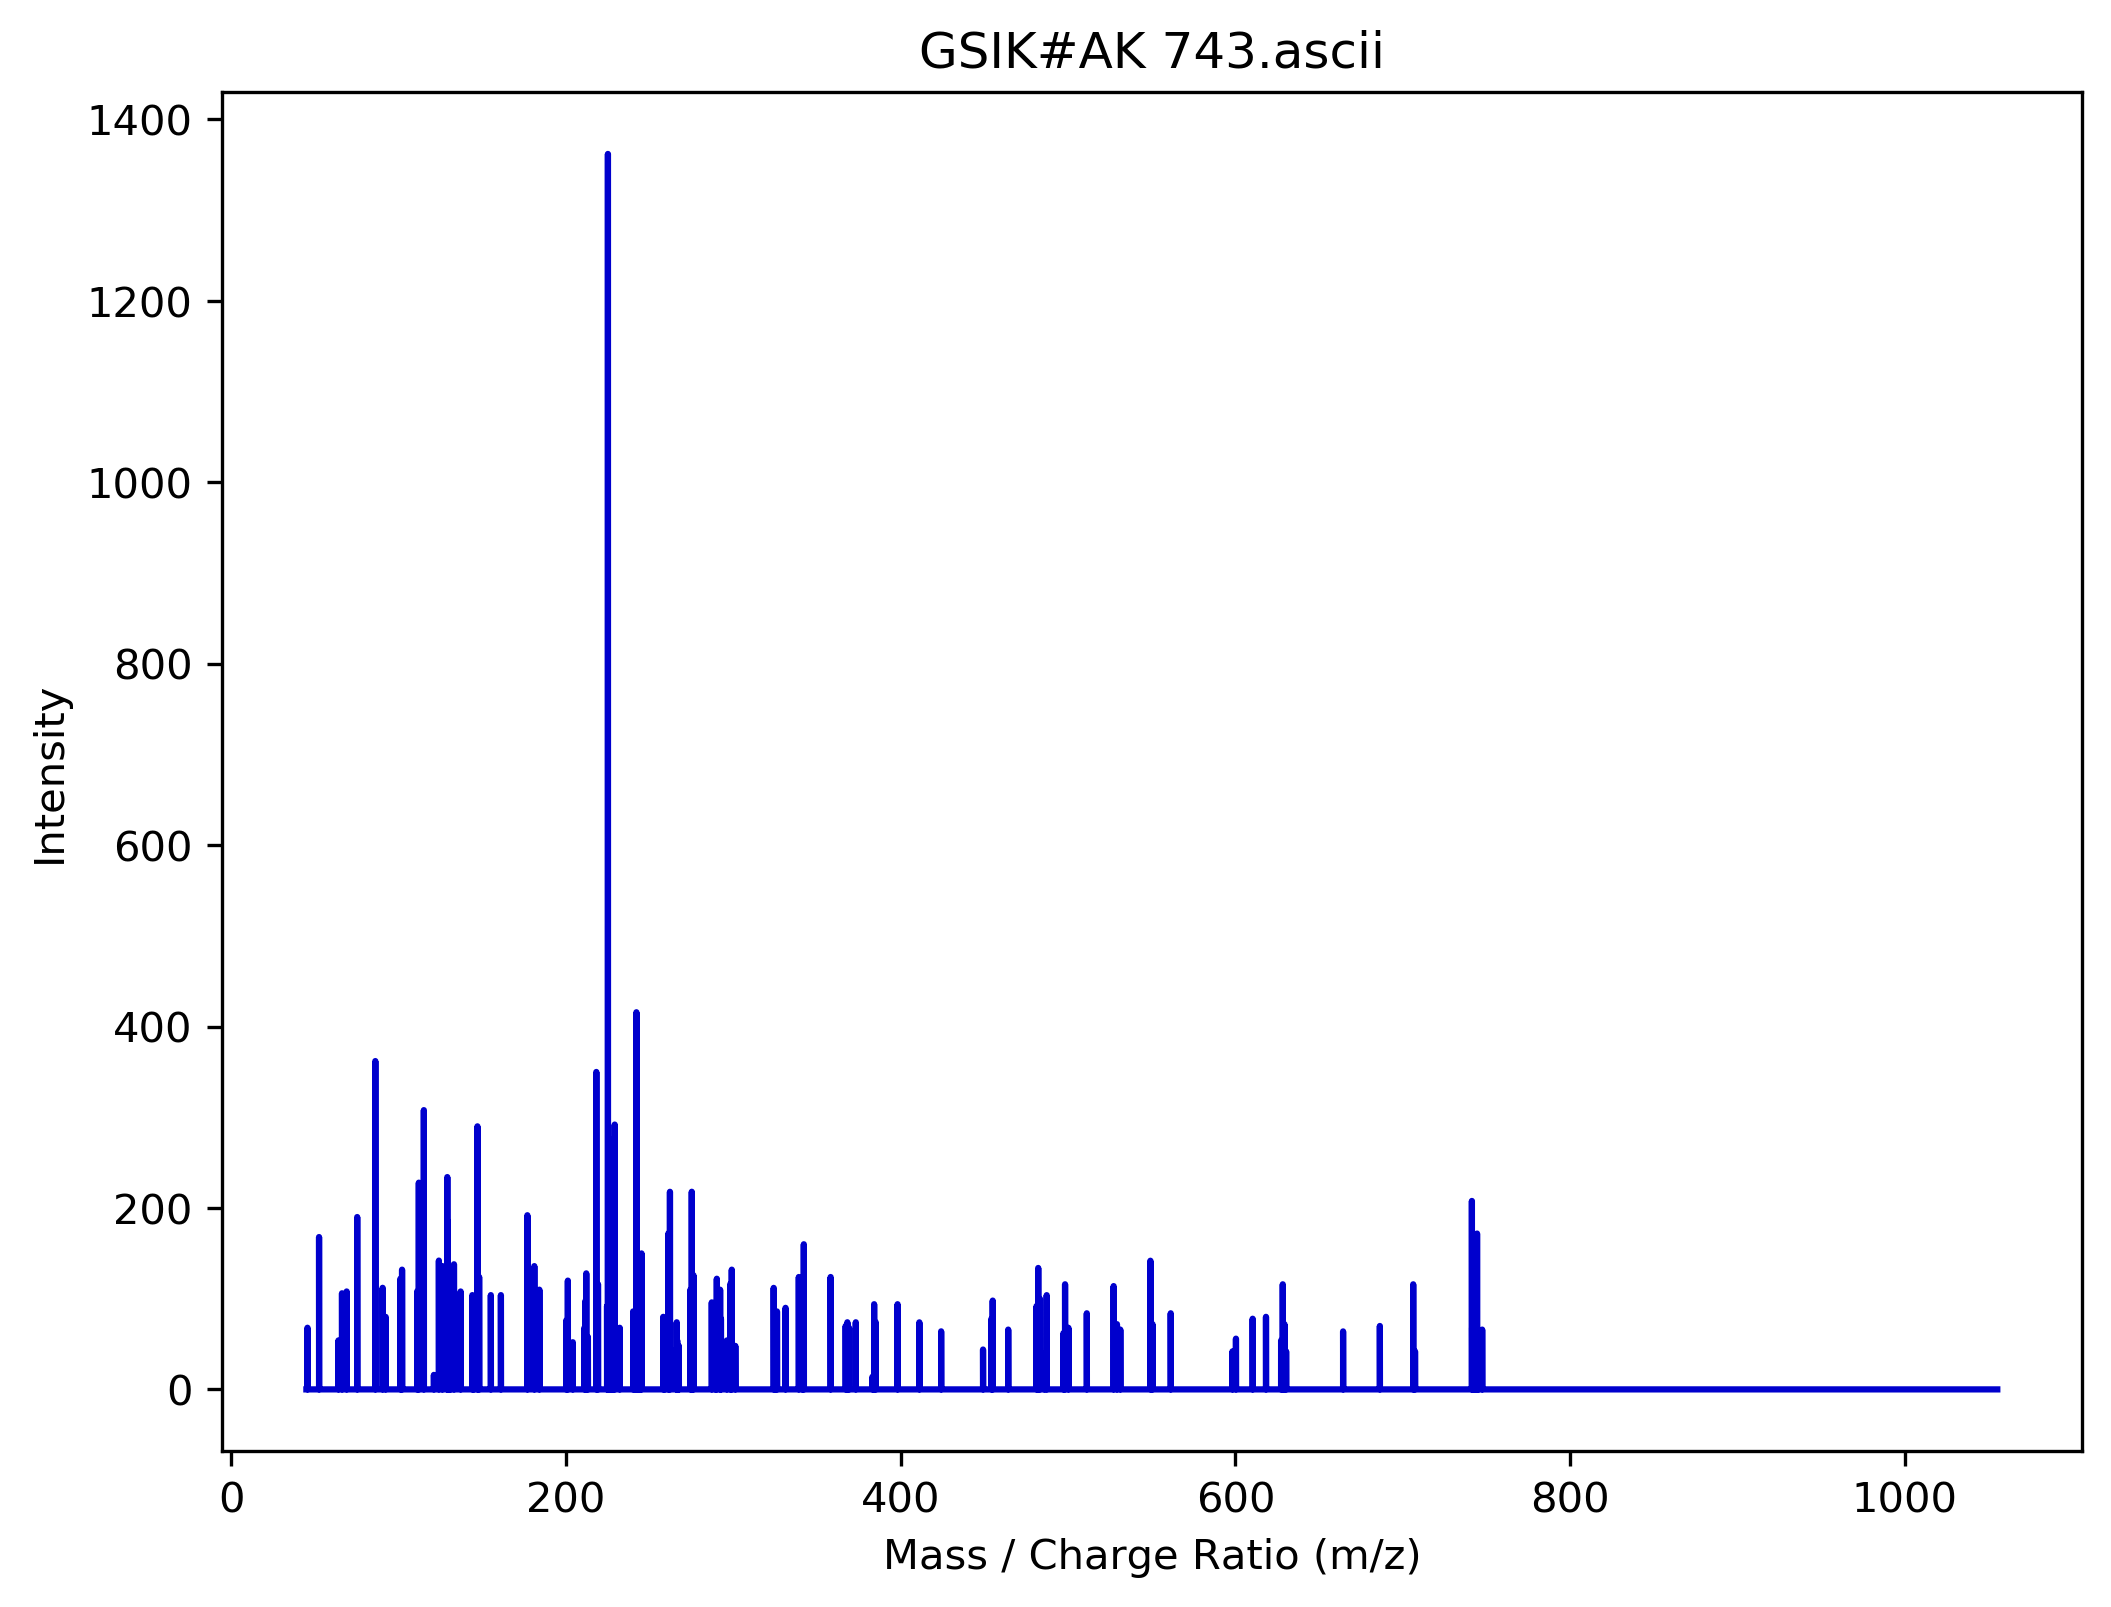

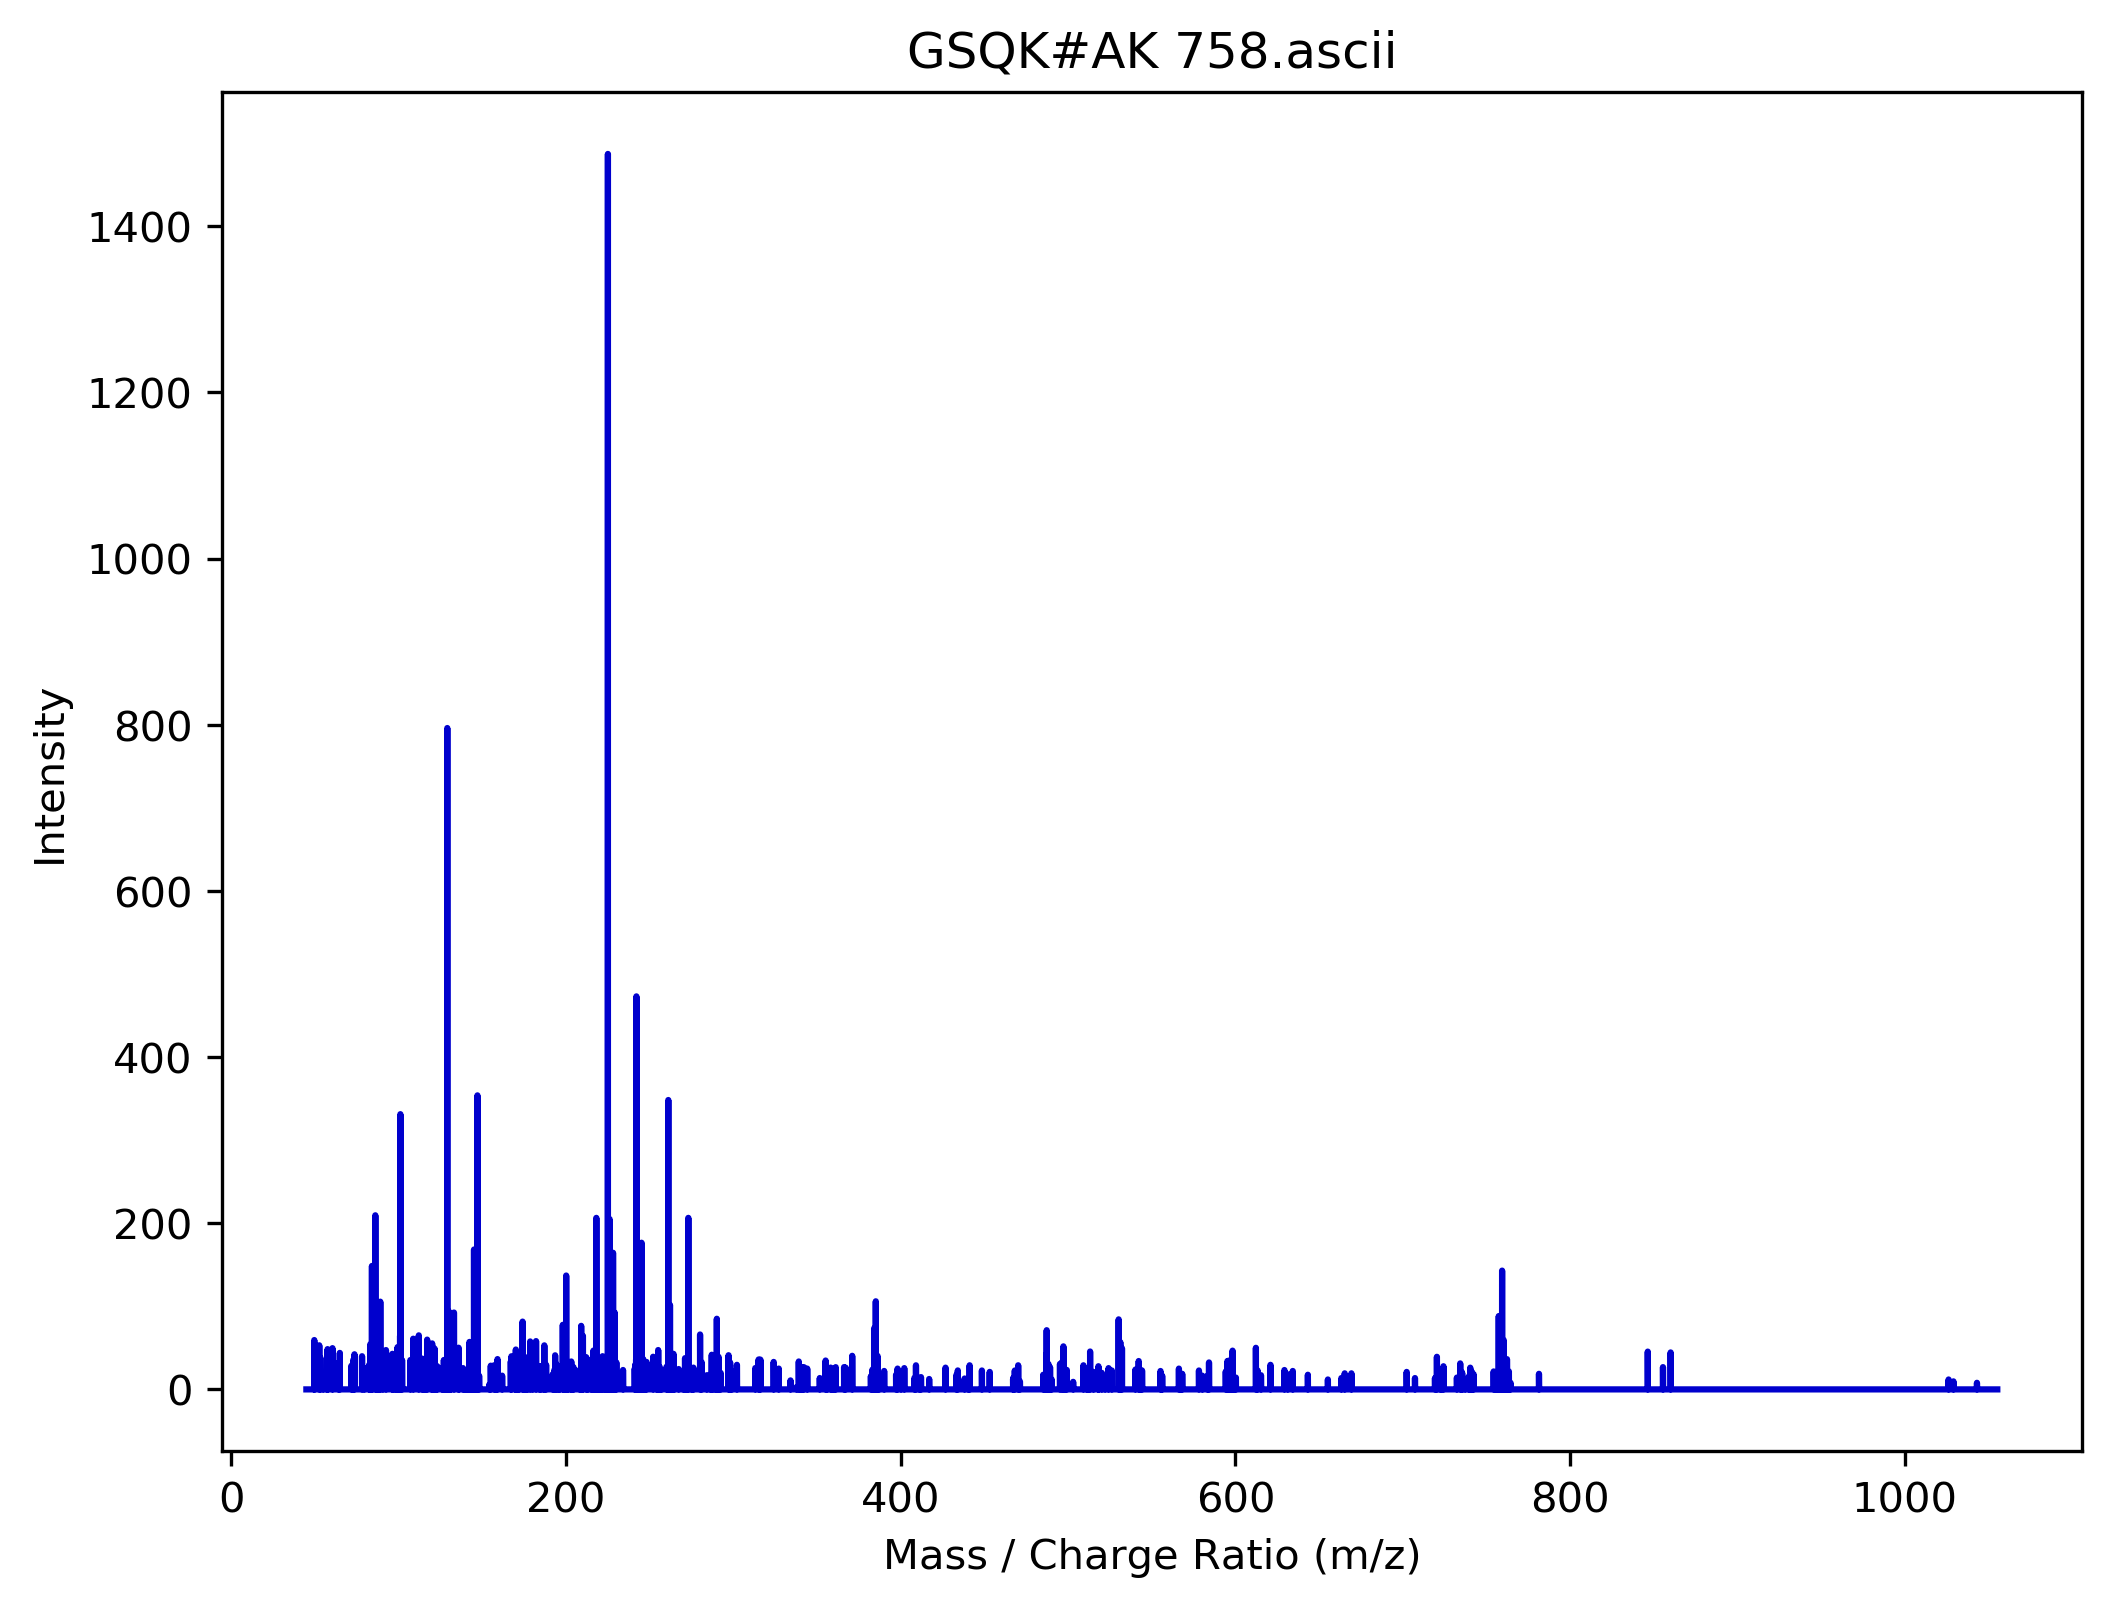

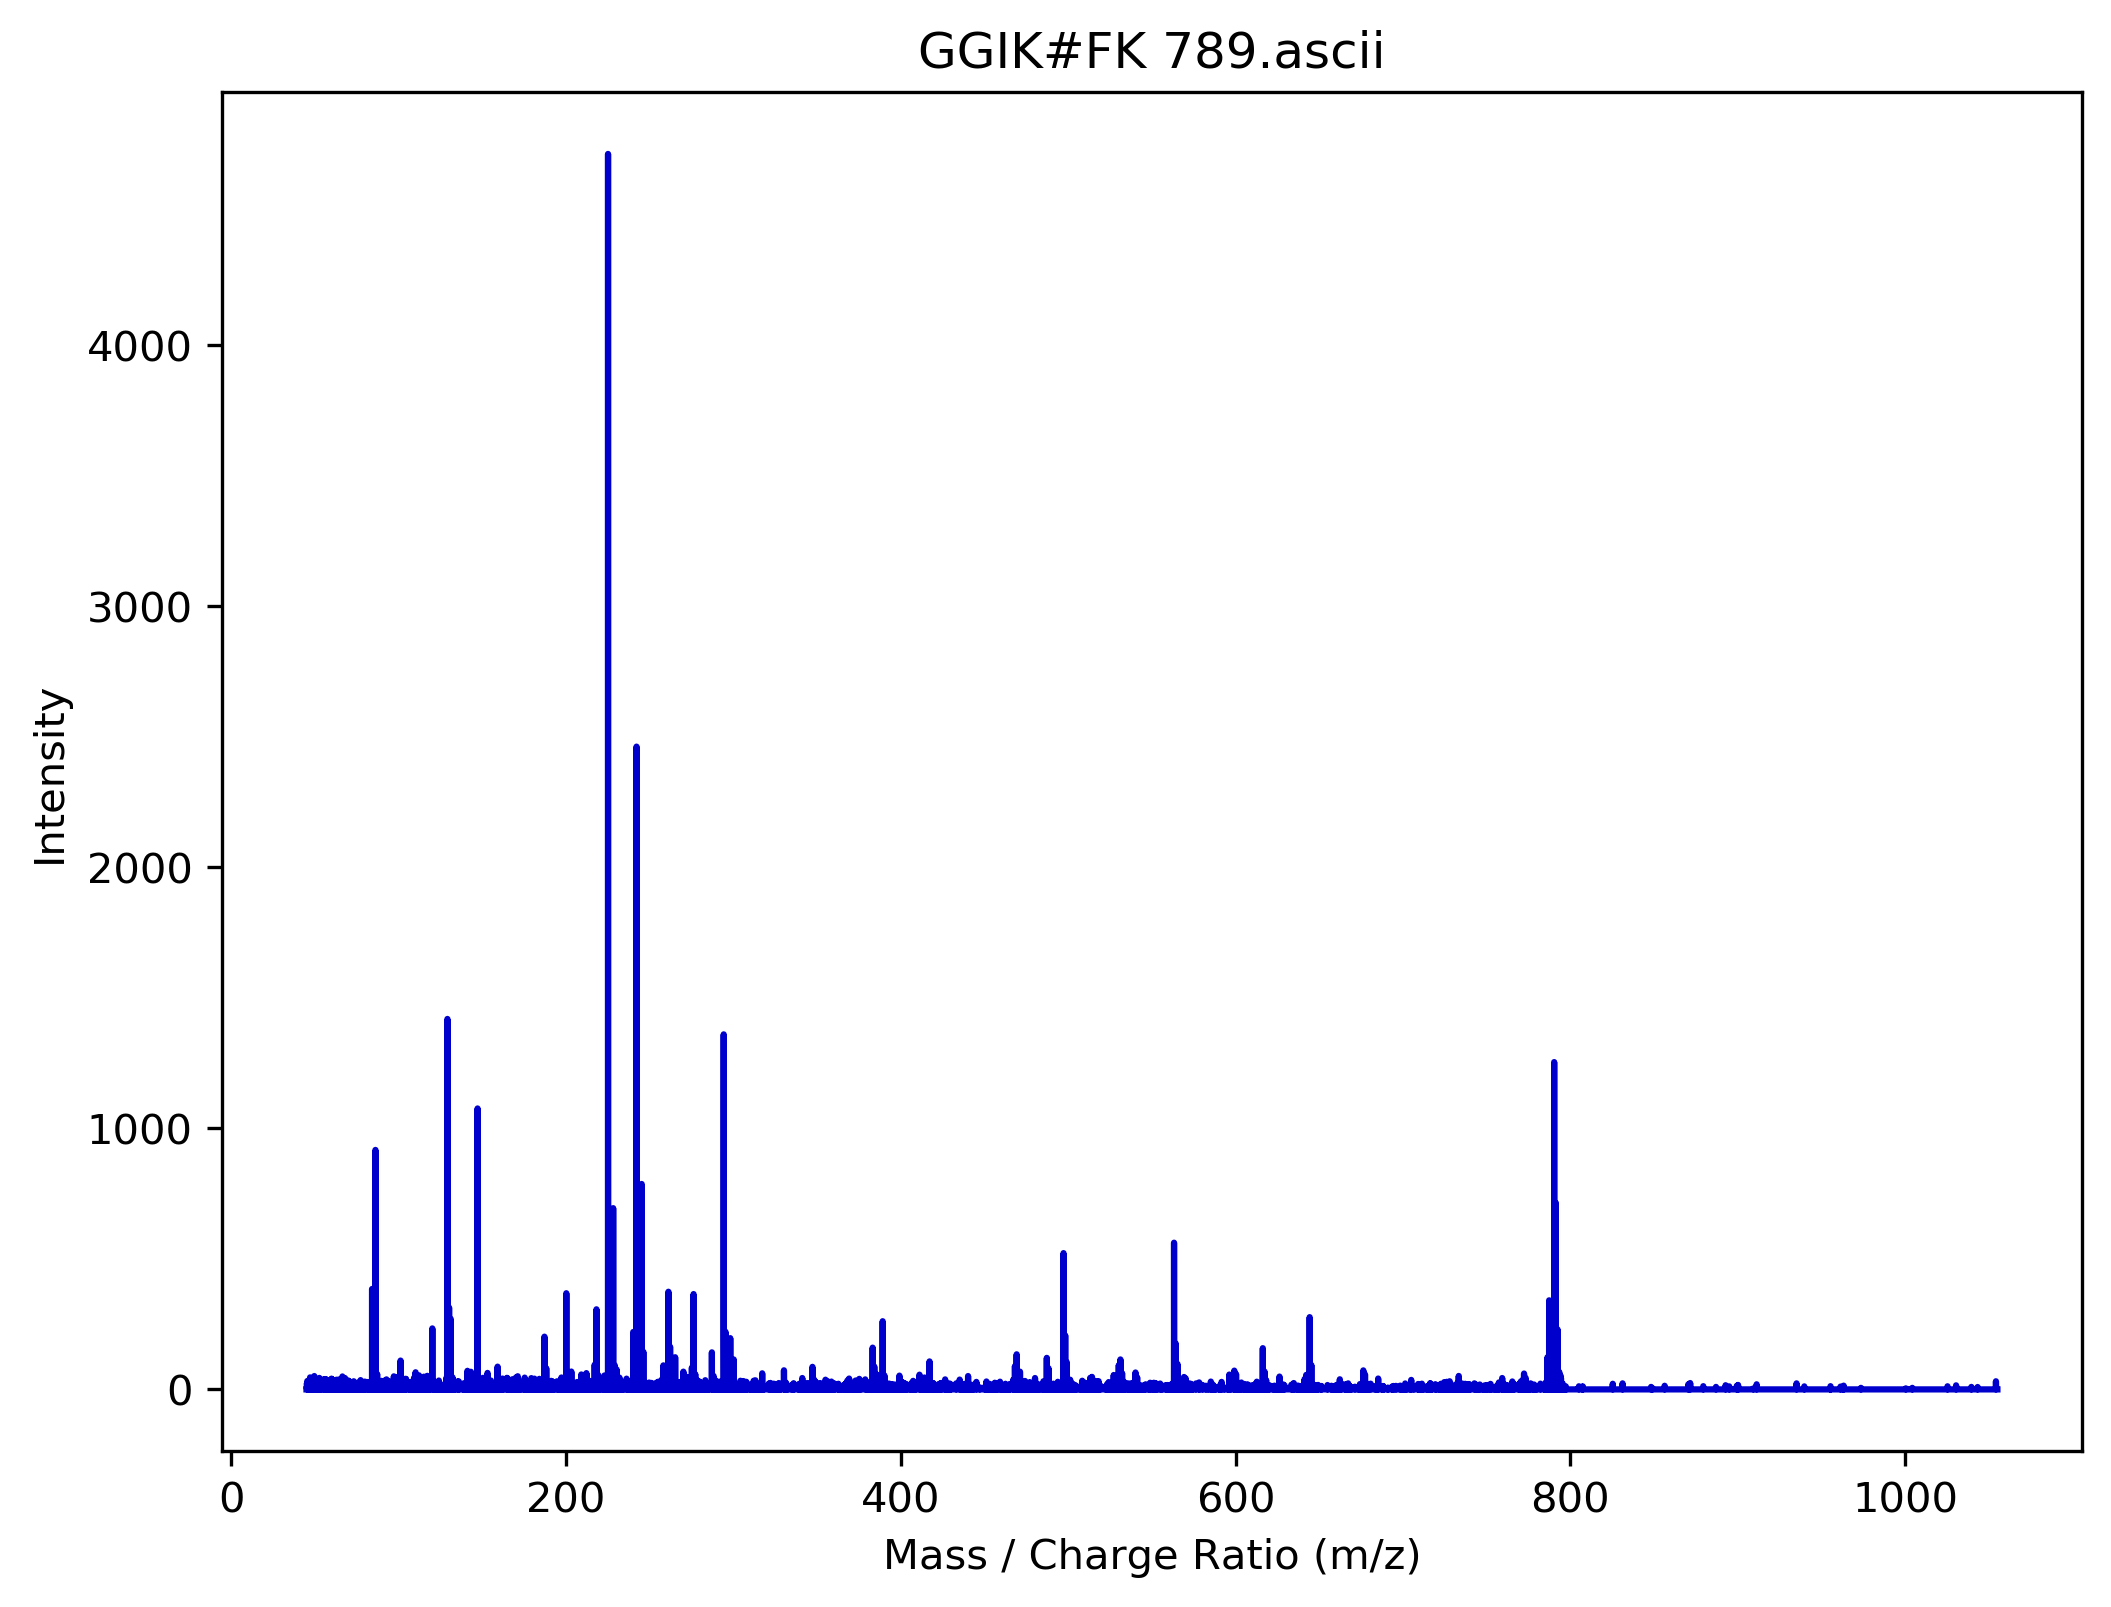

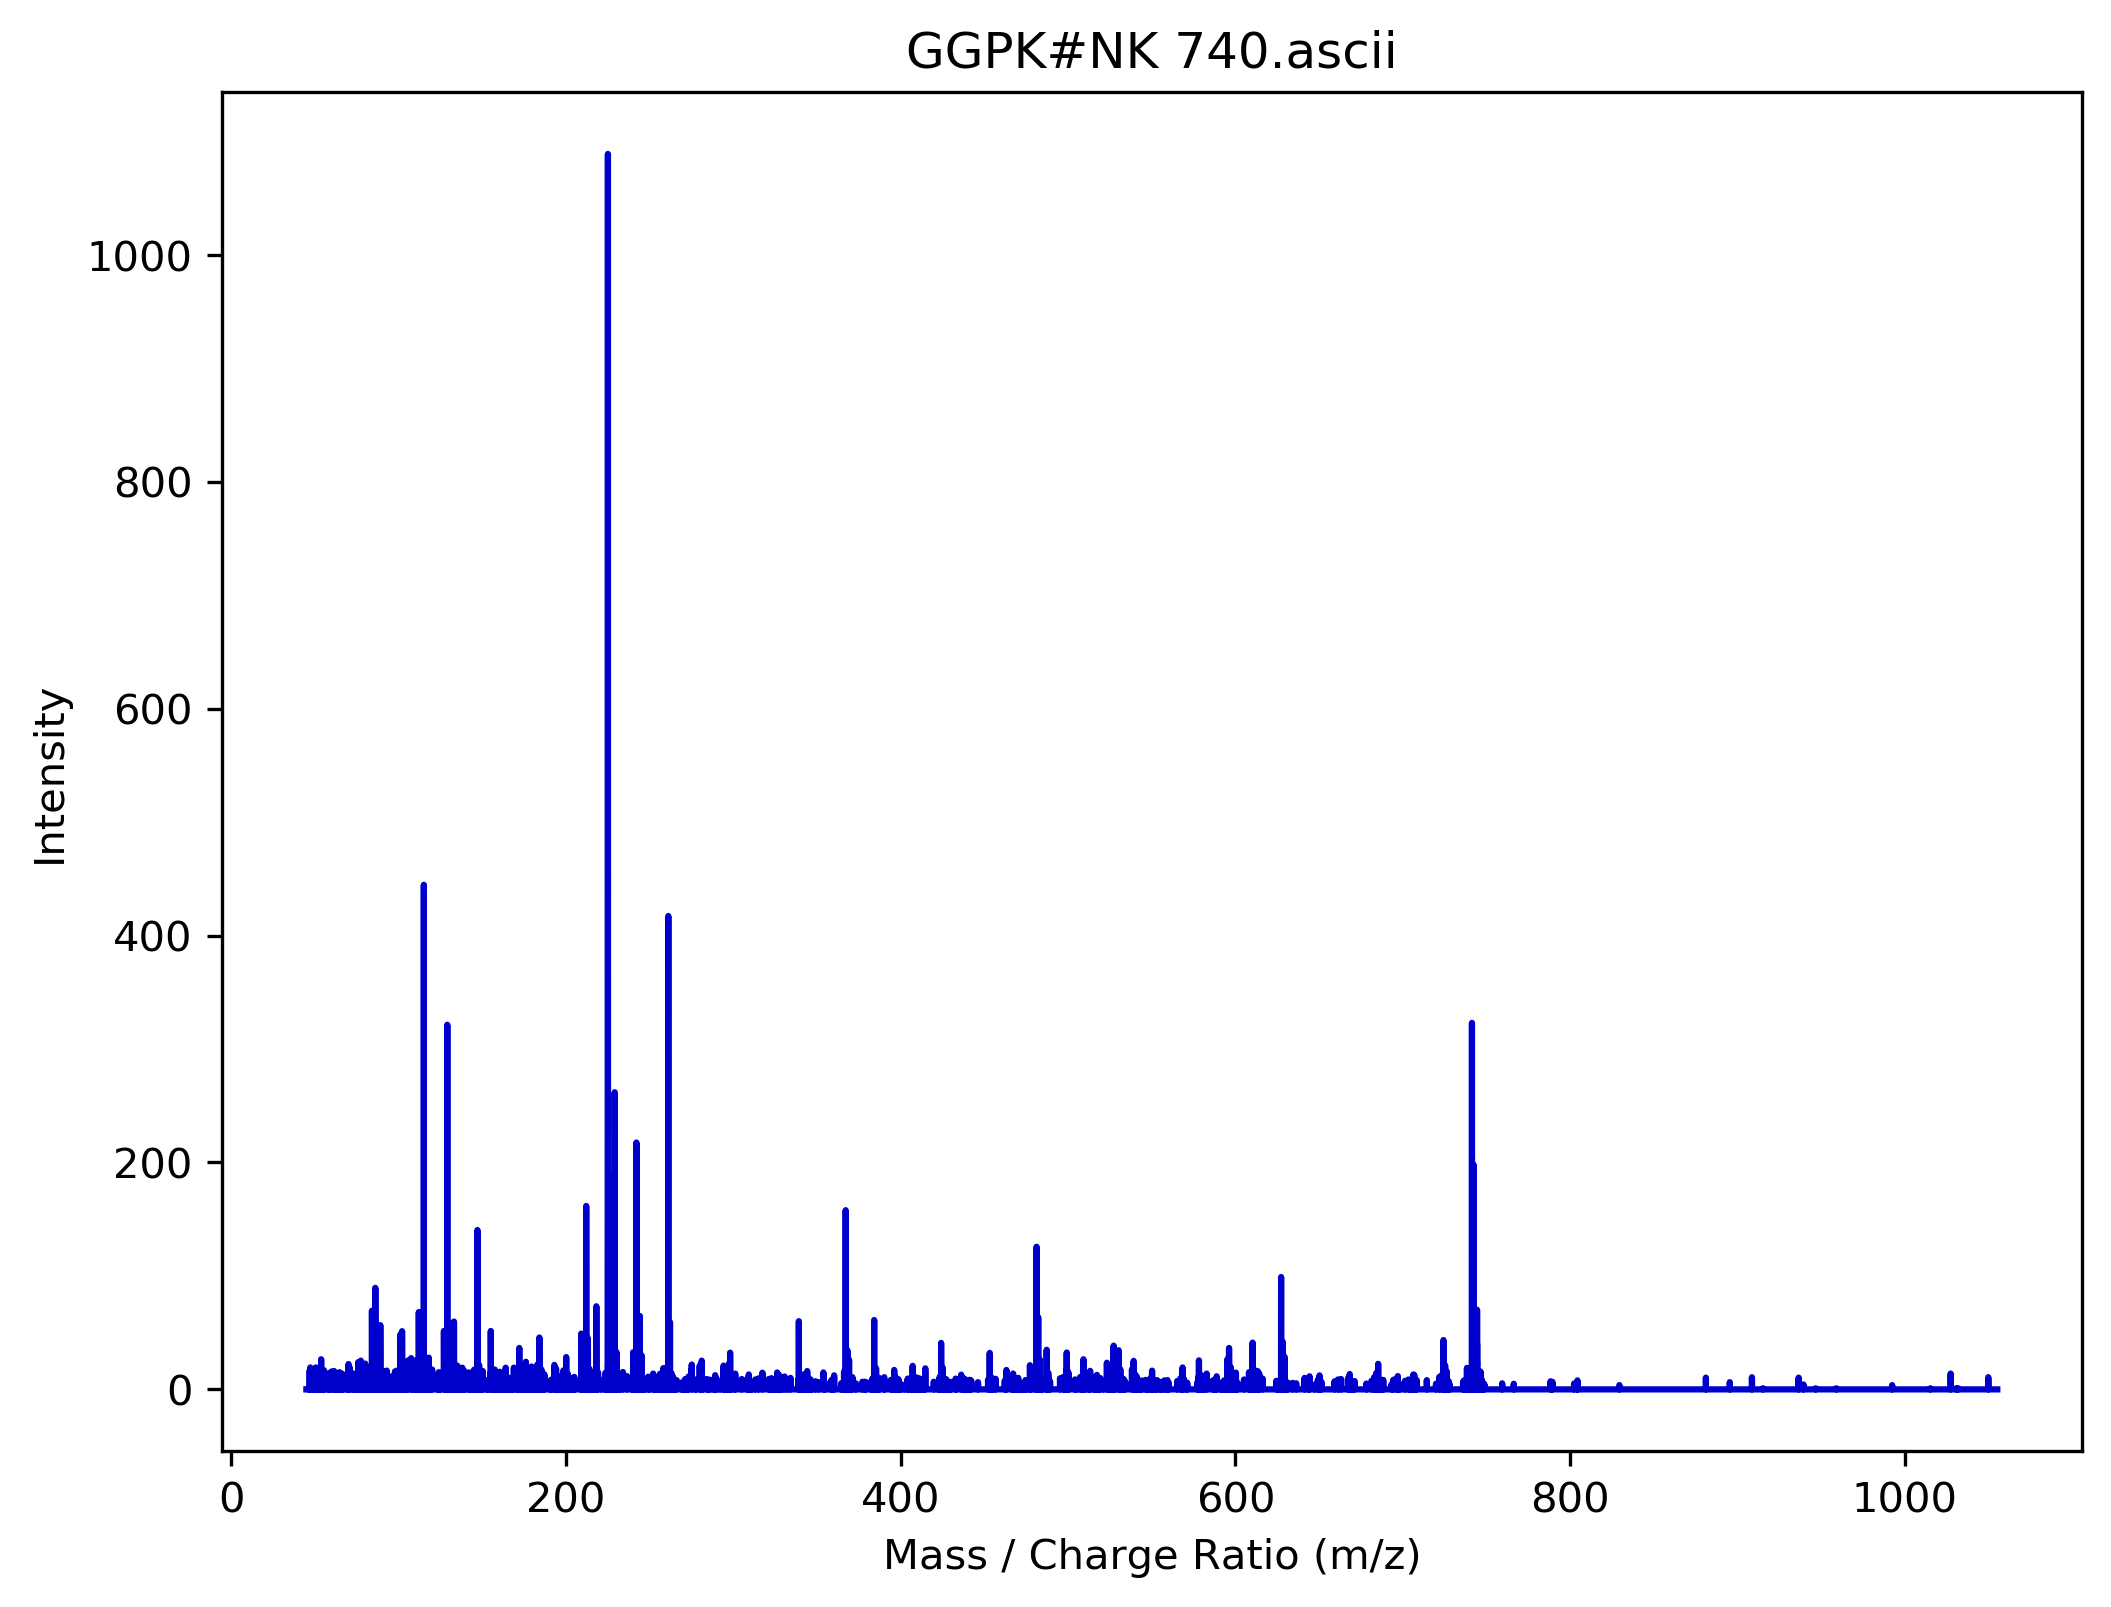

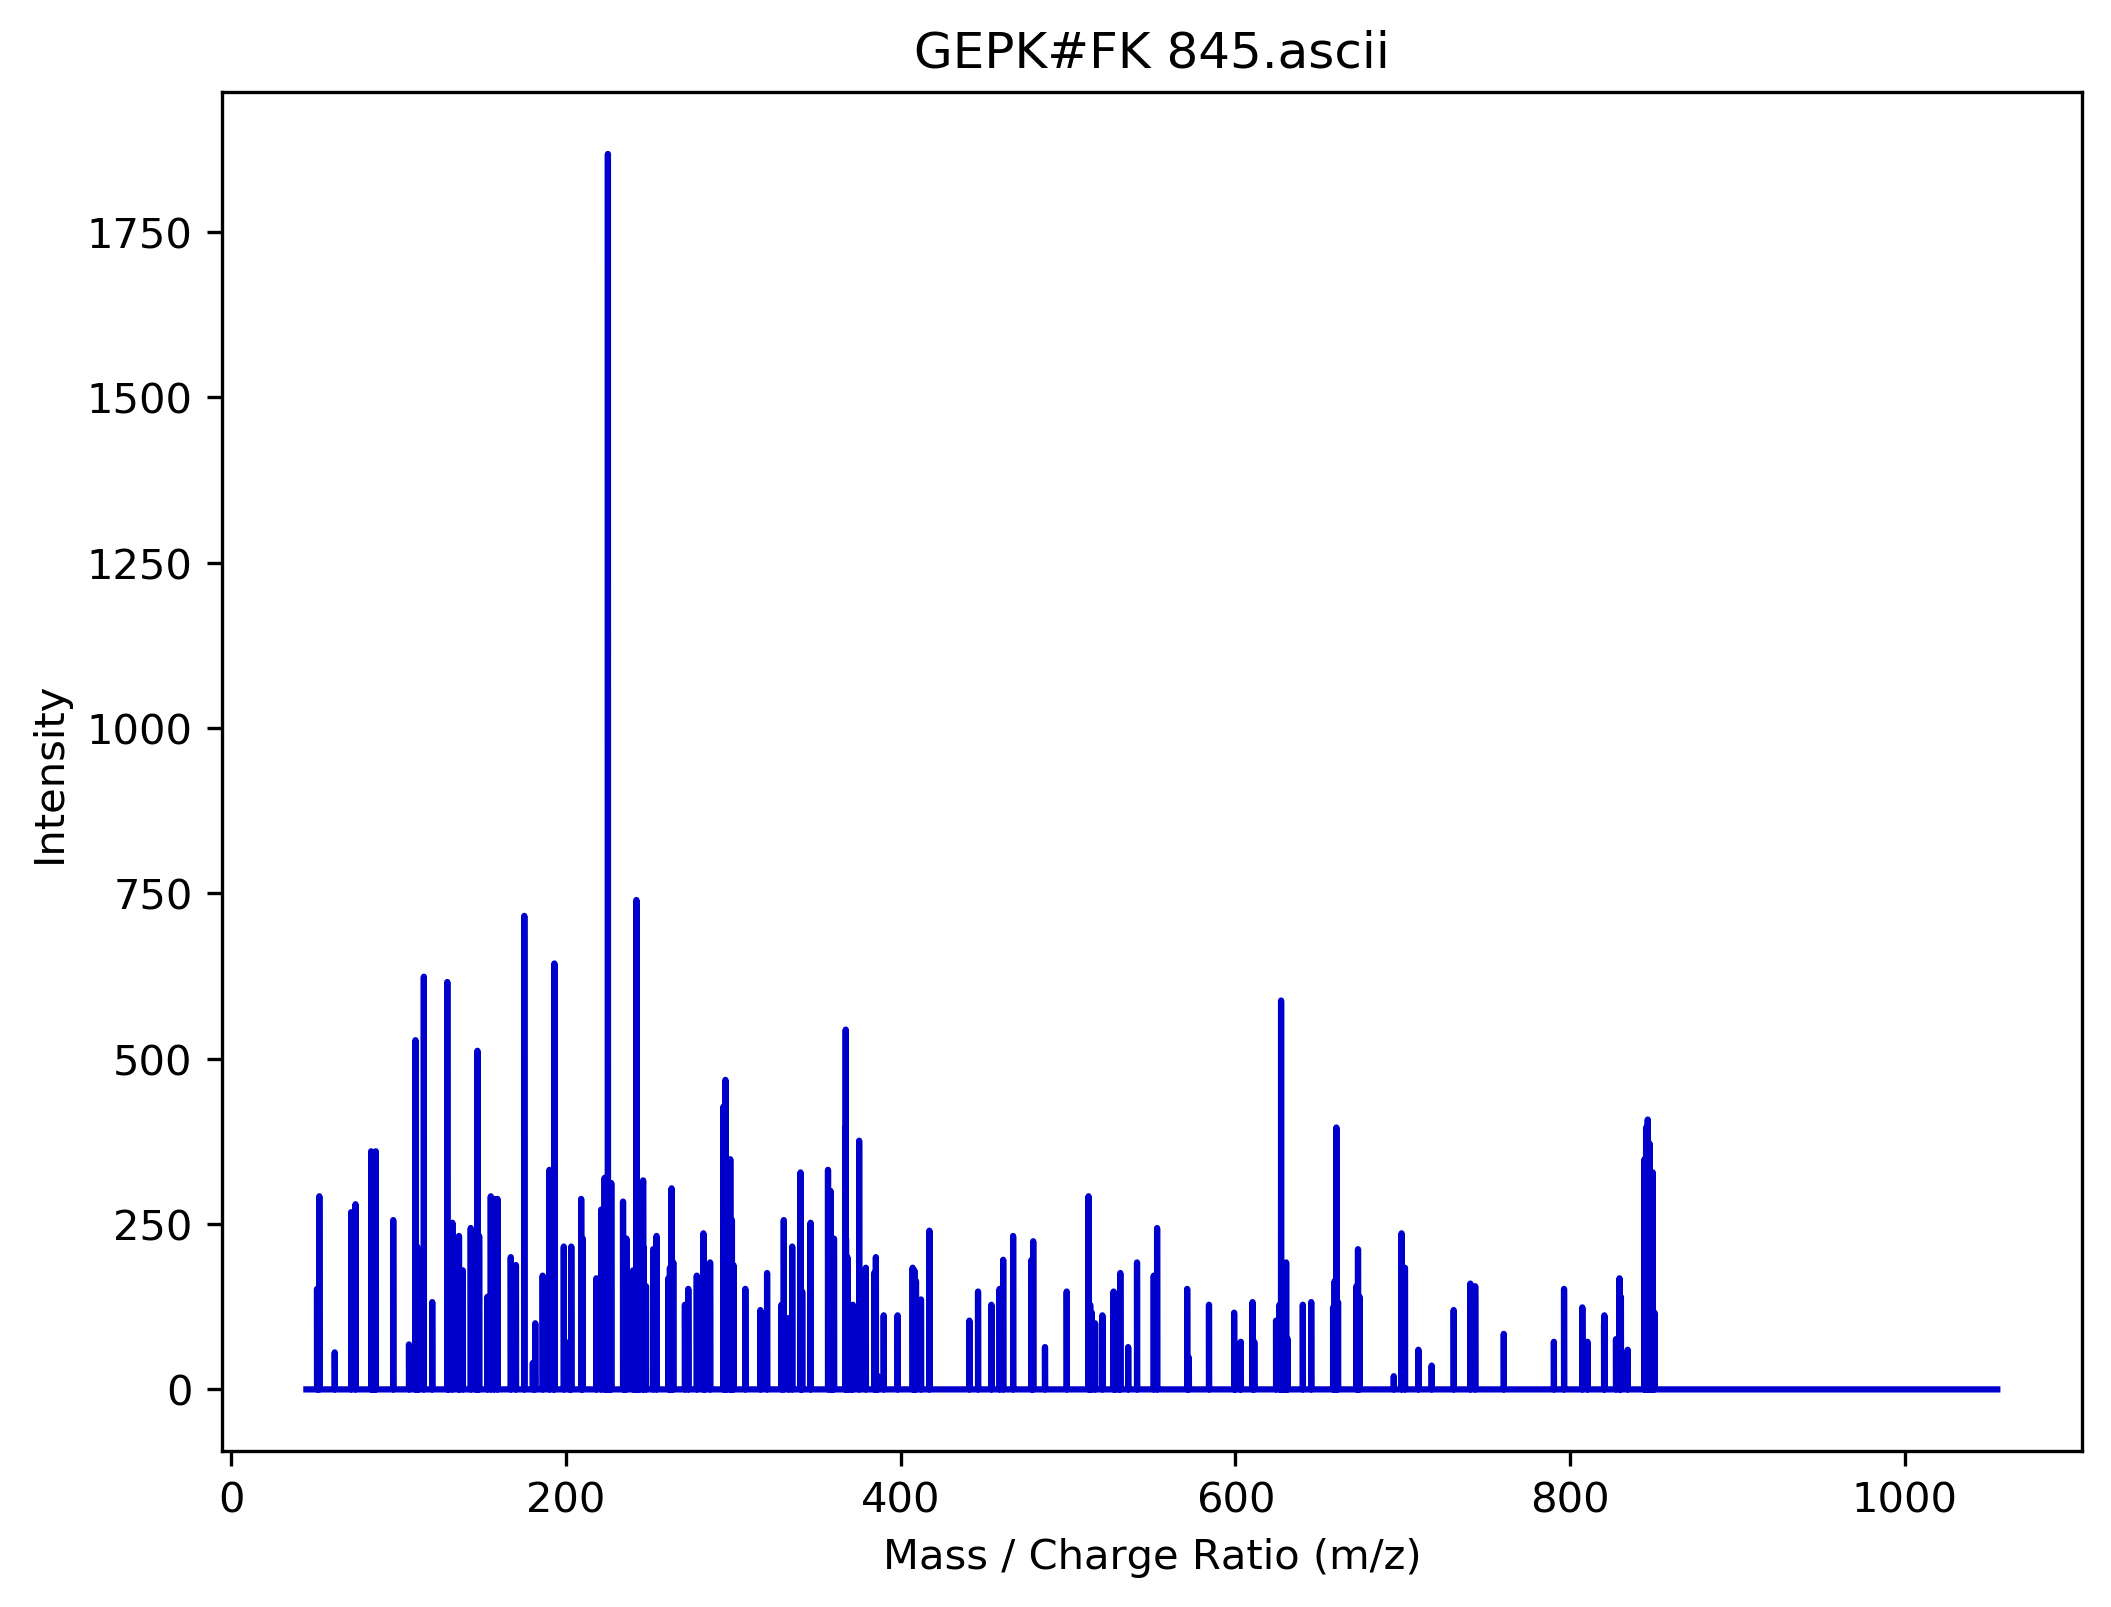

In [28]:
#insert the desired path containing ascii files in the ''. 
path = os.path.expanduser(r"~/Documents/python/identification_modified_proteins/hold_out_test_mod/")

#changes current working directory to the path given 
directory = os.chdir(path)

# give the extension for the files you are looking for
ascii_extension = '.ascii'

#for loop used to convert all ascii data files into numpy arrays with the same number of specified bins
for filename in os.listdir(directory):
    if filename.endswith(ascii_extension):
        #create new numpy array and load ascii file into it
        arr = np.loadtxt(filename, delimiter=',', dtype=str)

        #convert loaded strings into floats, skipping any uneeded data 
        ms_arr = np.array(list(np.core.defchararray.split(arr[8:])), dtype=float)
        
        #plot data to validate spectrum appearance 
        plt.figure(figsize=(8, 6), dpi=300)
        plt.title('{}'.format(filename))
        plt.xlabel("Mass / Charge Ratio (m/z)") 
        plt.ylabel("Intensity") 
        plt.plot(ms_arr[:,0],ms_arr[:,1], color='mediumblue')
        plt.show()